# CSE603: Machine Learning - II

# Assignment 3 - Clustering

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 15th Novermber 2022

# Importing libraries

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
import numpy as np  
import matplotlib.pyplot as plt
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean


import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis


import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
# from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline



# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle


from sklearn import preprocessing
from sklearn.metrics import silhouette_score

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

from sklearn.cluster import DBSCAN

from sklearn.metrics import davies_bouldin_score

from sklearn.metrics.cluster import fowlkes_mallows_score

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.neighbors import NearestNeighbors

from sklearn import metrics

from sklearn.metrics.cluster import v_measure_score

from sklearn.metrics.cluster import homogeneity_score

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import OPTICS

from sklearn.cluster import MeanShift

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import cluster

from sklearn.cluster import MiniBatchKMeans

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [2]:
df_km_clust=pd.DataFrame(columns=['clusters_km','silhoutte_km','dbi_km'])
df_km_clust

Empty DataFrame
Columns: [clusters_km, silhoutte_km, dbi_km]
Index: []

In [3]:
df_km_classification_test=pd.DataFrame(columns=['silhoutte_km','dbi_km','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_km_classification_test
        

Empty DataFrame
Columns: [silhoutte_km, dbi_km, fowlkes, ARI, Mutual_Information, V-measure, Homogeneity]
Index: []

In [4]:
df_km_classification_train=pd.DataFrame(columns=['silhoutte_km','dbi_km','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_km_classification_train

Empty DataFrame
Columns: [silhoutte_km, dbi_km, fowlkes, ARI, Mutual_Information, V-measure, Homogeneity]
Index: []

In [5]:
df_db_clust=pd.DataFrame(columns=['clusters_db','silhoutte_db','dbi_db'])
df_db_clust

Empty DataFrame
Columns: [clusters_db, silhoutte_db, dbi_db]
Index: []

In [6]:
df_db_classification_test=pd.DataFrame(columns=['silhoutte_db','dbi_db','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_db_classification_test
        

        
        
df_db_classification_train=pd.DataFrame(columns=['silhoutte_db','dbi_db','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_db_classification_train
        
        

Empty DataFrame
Columns: [silhoutte_db, dbi_db, fowlkes, ARI, Mutual_Information, V-measure, Homogeneity]
Index: []

In [7]:
df_agg_clust=pd.DataFrame(columns=['clusters_agg','silhoutte_agg','dbi_agg'])
df_agg_clust

df_agg_classification_test=pd.DataFrame(columns=[ 'silhoutte_agg','dbi_agg','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_agg_classification_test
        

df_agg_classification_train=pd.DataFrame(columns=[ 'silhoutte_agg','dbi_agg','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_agg_classification_train


df_opt_clust=pd.DataFrame(columns=['clusters_opt','silhoutte_opt','dbi_opt'])
df_opt_clust

df_opt_classification_test=pd.DataFrame(columns=[ 'silhoutte_opt','dbi_opt','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_opt_classification_test


df_opt_classification_train=pd.DataFrame(columns=[ 'silhoutte_opt','dbi_opt','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_opt_classification_train

df_ms_clust=pd.DataFrame(columns=['clusters_ms','silhoutte_ms','dbi_ms'])
df_ms_clust

df_ms_classification_test=pd.DataFrame(columns=[ 'silhoutte_ms','dbi_ms','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_ms_classification_test


df_ms_classification_train=pd.DataFrame(columns=[ 'silhoutte_ms','dbi_ms','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_ms_classification_train


df_mbkm_clust=pd.DataFrame(columns=['clusters_mbkm','silhoutte_mbkm','dbi_mbkm'])
df_mbkm_clust

df_mbkm_classification_test=pd.DataFrame(columns=[ 'silhoutte_mbkm','dbi_mbkm','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_mbkm_classification_test

df_mbkm_classification_train=pd.DataFrame(columns=[ 'silhoutte_mbkm','dbi_mbkm','fowlkes','ARI','Mutual_Information',
                                                        'V-measure','Homogeneity'])
df_mbkm_classification_train
        


Empty DataFrame
Columns: [silhoutte_mbkm, dbi_mbkm, fowlkes, ARI, Mutual_Information, V-measure, Homogeneity]
Index: []

# Making a Class for datasets

In [8]:
class dataset:
    
    dataset_count=0
    
    def __init__(self,dataset_name):
        
        
        self.df = pd.read_csv(dataset_name)
        print(self.df.shape)
        print(self.df.columns)
        self.rows=self.df.shape[0]
        self.columns=self.df.shape[1]
        self.df.head()
        
        ### datset_name = full name with .cvs example: 'online_shoppers_intention.csv'
        
        # self.data_dict ={}
        
    def data_preprocessing(self):
        
        df1=self.df
        
        self.df2=pd.DataFrame(columns=['min','max','mean','median','mode','skewness','kurtosis','standard_deviation',
                          'data_type','unique_values','null_values','percent_null_values',
                          'IQR','IQR_positive_outlier_limit','IQR_negative_outlier_limit','IQR_positive_outliers','%_IQR_positive_outliers',
                          'IQR_negative_outliers','%_IQR_negative_outliers',
                          'std_positive_outlier_limit','std_negative_outlier_limit',
                          'std_positive_outliers','%_std_positive_outliers',
                          'std_negative_outliers','%_std_negative_outliers'])
        self.df2

        # describe_original=df1.describe()

        categotical_col=[]


        for i in df1.columns:
            # print(i)
            
            try:
                min=df1[i].min()
                max=df1[i].max()
                mean=df1[i].mean()
                median=df1[i].median()
                mode=df1[i].mode()[0]
                skewness=df1[i].skew()
                kurtosis=df1[i].kurtosis()
                std_dev=df1[i].std()
                
                describe_original = df1[i].describe()
                
                q1_original = describe_original['25%']
                q3_original = describe_original['75%']
                iqr_original = q3_original-q1_original

                outlier_iqr_pos_original = q3_original +(1.5*iqr_original)
                outlier_iqr_neg_original = q1_original - (1.5*iqr_original)
                
                
                positvie_outliers= df1[i] >= outlier_iqr_pos_original
                number_positive_outliers_iqr_original=positvie_outliers[positvie_outliers== True].sum()
                # print('Total number of records which lie outside positive outlier limit :',number_positive_outliers_iqr_original)
                percent_positive_outliers_iqr_original = (number_positive_outliers_iqr_original/len(df1[i]))*100
                # print('Percentage records with positive outliers :',percent_positive_outliers_iqr_original)

                negative_outliers= df1[i] <= outlier_iqr_neg_original
                number_negative_outliers_iqr_original=negative_outliers[negative_outliers== True].sum()
                # print('Total number of records which lie outside negative outlier limit :',number_negative_outliers_iqr_original)
                percent_negative_outliers_iqr_original = (number_negative_outliers_iqr_original/len(df1[i]))*100
                # print('Percentage records with negative outliers :',percent_negative_outliers_iqr_original)

                # mean= df1[i].mean()
                # std_original=df1[i].std()
                outlier_std_pos =mean +(std_dev*4)
                outlier_std_neg =mean -(std_dev*4)

                # print('\nPositive outlier limit original with std :',outlier_std_pos)
                # print('negative outlier limit original with std :',outlier_std_neg)

                positvie_outliers_std= df1[i] >= outlier_std_pos
                number_positive_outliers_std_original=positvie_outliers_std[positvie_outliers_std== True].sum()
                # print('Total number of records which lie outside positive outlier limit with std_original :',number_positive_outliers_std_original)
                percent_positive_outliers_std_original = (number_positive_outliers_std_original/len(df1[i]))*100
                # print('Percentage records with positive outliers_std_original :',percent_positive_outliers_std_original)

                negative_outliers_std= df1[i] <= outlier_std_neg
                number_negative_outliers_std_original=negative_outliers_std[negative_outliers_std== True].sum()
                # print('Total number of records which lie outside negative outlier limit with std_original :',number_negative_outliers_std_original)
                percent_negative_outliers_std_original = (number_negative_outliers_std_original/len(df1[i]))*100
                # print('Percentage records with negative outliers_std_original :',percent_negative_outliers_std_original)
                
            except:
                print(i)
                categotical_col.append(i)
            
            data_type=df1[i].dtype
            unique_values=len(df1[i].value_counts())
            null_values=df1[i].isna().sum()
            percent_null_values=((null_values)/(df1.shape[0]))*100
            
            
            row= {'min': min,'max':max,'mean': mean,'median': median,'mode': mode,'skewness': skewness,'kurtosis': kurtosis,
                        'standard_deviation':std_dev,'data_type': data_type,'unique_values':unique_values ,'null_values': null_values,
                        'percent_null_values':percent_null_values,
                        'IQR':iqr_original ,'IQR_positive_outlier_limit': outlier_iqr_pos_original ,
                        'IQR_negative_outlier_limit': outlier_iqr_neg_original,
                        'IQR_positive_outliers': number_positive_outliers_iqr_original,
                        '%_IQR_positive_outliers': percent_positive_outliers_iqr_original,
                        'IQR_negative_outliers':number_negative_outliers_iqr_original,
                        '%_IQR_negative_outliers': percent_negative_outliers_iqr_original,
                        'std_positive_outlier_limit':  outlier_std_pos,
                        'std_negative_outlier_limit':outlier_std_neg,
                        'std_positive_outliers':number_positive_outliers_std_original,
                        '%_std_positive_outliers': percent_positive_outliers_std_original,
                        'std_negative_outliers':number_negative_outliers_std_original,
                        '%_std_negative_outliers': percent_negative_outliers_std_original}
            
            
            
            self.df2=self.df2.append(pd.DataFrame(row,index=[i],columns=self.df2.columns))
    
        # print(self.df2.head())
        # self.df2.head()
        return(self.df2.head())
    
    def normalization_scaling(self):
        
        print('Histogram before any normalization(log transformation)')
        fig = plt.figure(figsize = (20,25))
        ax = fig.gca()
        self.df.hist(ax=ax)
        
        
        ### Changing booleans into 1 and 0 also applying log transformation on highly skewd columns
        for i in self.df.columns:
    
            if self.df[i].dtype == 'bool':
                # print('yes')
                
                def verfication_condition(typ):
            
                    if typ == True:
                        return (1)
                    
                    elif typ == False:
                        return (0)
                
                
                self.df[i] = self.df[i].apply(verfication_condition)
                
                
            
            if self.df[i].dtype == float:
                # print(i)
                s=self.df[i].skew()
                if s > 0.75:
                    self.df[i] = np.log1p(self.df[i])
                    
                    
        print('Histogram after normalization(log transformation)')
        fig = plt.figure(figsize = (20,25))
        # plt.title('Histogram after normalization(log transformation)')
        ax = fig.gca()
        
        self.df.hist(ax=ax)
                    
        ### Aplying one hot encoding
        
        c=self.df2[self.df2['data_type']=='object'].index.values
        
        self.df1hc = pd.get_dummies(self.df,columns=c)
        
        ### Scaling the datset now
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        Scaled = scaler.fit_transform(self.df1hc)
        self.df1hc_sc = pd.DataFrame(Scaled)
        self.df1hc_sc.columns = self.df1hc.columns   
        
    
    def make_X(self,target_variable=1):
        
        ### Specify if we have a class label example 'Revenue'
        
        if target_variable==1:
            self.X=self.df1hc_sc
            print('Shape of X :' ,self.X.shape)
            
        else:
            self.X= self.df1hc_sc.drop(columns=[target_variable])
            self.y= self.df1hc_sc[target_variable]
            print('Shape of X :' ,self.X.shape)
            print('Shape of y :' ,self.y.shape)
            
            self.trainX, self.testX, self.trainy, self.testy = train_test_split(self.X,self.y, test_size=0.3, random_state=2)
            
            
        
    
    
    # def display_cluster(self,km=[],num_clusters=0):
    #     X=self.X
    #     color = 'brgcmyk'
    #     alpha = 0.5
    #     s = 20
    #     if num_clusters == 0:
    #         plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    #     else:
    #         for i in range(num_clusters):
    #             plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
    #             plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
    
    
    def Kmeans_find(self):
        
        
        self.df1_knn=pd.DataFrame(columns=['K','inertia','slhoutte_score'])
        self.df1_knn  
        
        Sum_of_squared_distances = []
        silhouette_avg = []
        K = range(2,11)
        for k in K:
            km = KMeans(n_clusters=k)
            km = km.fit(self.X)
            Sum_of_squared_distances.append(km.inertia_)
            inertia=km.inertia_
            
            # model = KMeans(n_clusters=2)
            # model.fit(X.values)
            kmeans_labels = km.labels_
            
            s =silhouette_score(self.X, km.labels_, metric='euclidean')
            
            silhouette_avg.append(silhouette_score(self.X, kmeans_labels))
            
            print('kmeans ', k,' : {}'.format(silhouette_score(self.X, km.labels_, 
                                                    metric='euclidean')))
            
            self.df1_knn=self.df1_knn.append({'K': k,'inertia': inertia ,'slhoutte_score':s}, ignore_index=True)
            
            
            # kmeans = KMeans(n_clusters=num_clusters)
            # kmeans.fit(X)
            # cluster_labels = kmeans.labels_
        
        # silhouette score
            # silhouette_avg.append(silhouette_score(X, kmeans_labels))

        plt.figure(figsize=(20,5))
        plt.plot(K,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.title('Silhouette analysis For Optimal k')
        plt.show()
            
            
            
        plt.figure(figsize=(20,5))
        
        plt.plot(K, Sum_of_squared_distances,marker='o',ls='-')
        # ax = plot_data.plot(marker='o',ls='-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    def kmean(self,number_clusters):
        
        k=number_clusters
        km = KMeans(n_clusters=k)
        km = km.fit(self.X)
        # Sum_of_squared_distances.append(km.inertia_)
        inertia=km.inertia_
        
        
        # df_km_clust=pd.DatFrame(columns=['clusters_km','silhoutte_km','dbi_km'])
        
        self.km_cluster_centers_clustering=km.cluster_centers_
        print('centres of cluster',self.km_cluster_centers_clustering)
        
        # model = KMeans(n_clusters=2)
        # model.fit(X.values)
        kmeans_labels = km.labels_
        
        self.km_silhoutte_cluster =silhouette_score(self.X, km.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('kmeans silhoutte score for ', k,' : {}'.format(silhouette_score(self.X, km.labels_, 
                                                metric='euclidean')))
        
        self.km_dbi_cluster = davies_bouldin_score(self.X, km.labels_)
        print('kmeans DBI score for k = ', k,' : {}'.format(self.km_dbi_cluster))
        
        global df_km_clust
        
        df_km_clust=df_km_clust.append( { 'clusters_km':k, 'silhoutte_km':self.km_silhoutte_cluster ,'dbi_km':self.km_dbi_cluster}
                                       ,ignore_index=True)
        
        
    def kmeans_classification(self,number_clusters):
        
        k=number_clusters
        km = KMeans(n_clusters=k)
        
        km = km.fit(self.trainX)
        
       
        inertia=km.inertia_
        
        self.ypred_train_km= kmeans_labels = km.labels_
        
        self.km_cluster_centers_classification=km.cluster_centers_
        print('centres of cluster',self.km_cluster_centers_classification)
    
        self.ypred_test_km= km.predict(self.testX)
        
        
        
        self.km_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_km)
        print('kmeans fowlkes score on train data for k = ', k,' : {}'.format(self.km_fowlkes_train))
        
        
        self.km_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_km)
        print('kmeans fowlkes score on test data for k = ', k,' : {}'.format(self.km_fowlkes_test))
        
        
        self.km_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_km)
        print('kmeans ARI score on train data for k = ', k,' : {}'.format(self.km_ari_train))
        
        self.km_ari_test= adjusted_rand_score(self.testy,self.ypred_test_km)
        print('kmeans ARI score on test data for k = ', k,' : {}'.format(self.km_ari_test))
        
        
        ## Mutual Information score
        self.km_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_km)
        print('kmeans Mutual Information score on train data for k = ', k,' : {}'.format(self.km_mi_train))
        
        self.km_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_km)
        print('kmeans Mutual Information on test data for k = ', k,' : {}'.format(self.km_mi_test))
        
        
        ## V-Measure score
        self.km_vm_train= v_measure_score(self.trainy,self.ypred_train_km)
        print('kmeans V-measure score on train data for k = ', k,' : {}'.format(self.km_vm_train))
        
        self.km_vm_test= v_measure_score(self.testy,self.ypred_test_km)
        print('kmeans V-measure score on test data for k = ', k,' : {}'.format(self.km_vm_test))
        
        
        ## Homogeneirty Score
        self.km_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_km)
        print('kmeans Homogeneity score on train data for k = ', k,' : {}'.format(self.km_homogeneity_train))
        
        self.km_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_km)
        print('kmeans Homogeneity score on test data for k = ', k,' : {}'.format(self.km_homogeneity_test))
        
        
        
        self.km_silhoutte_train =silhouette_score(self.trainX, km.labels_, metric='euclidean')
        
    
        
        print('kmeans silhoutte score for ', k,' : {}'.format(silhouette_score(self.trainX, km.labels_, 
                                                metric='euclidean')))
        
        self.km_dbi_train = davies_bouldin_score(self.trainX, km.labels_)
        print('kmeans DBI score for k = ', k,' : {}'.format(self.km_dbi_train))
        
        
        global df_km_classification_test
        
        df_km_classification_test=df_km_classification_test.append({'silhoutte_km':self.km_silhoutte_train,
                                                                    'dbi_km':self.km_dbi_train ,'fowlkes':self.km_fowlkes_test,
                                                                    'ARI':self.km_ari_test ,'Mutual_Information': self.km_mi_test ,
                                                                    'V-measure':self.km_vm_test ,'Homogeneity':self.km_homogeneity_test},
                                                                   ignore_index=True)
        
        global df_km_classification_train
        
        df_km_classification_train=df_km_classification_train.append({'silhoutte_km':self.km_silhoutte_train,
                                                                    'dbi_km':self.km_dbi_train ,'fowlkes':self.km_fowlkes_train,
                                                                    'ARI':self.km_ari_train ,'Mutual_Information': self.km_mi_train ,
                                                                    'V-measure':self.km_vm_train ,'Homogeneity':self.km_homogeneity_train},
                                                                   ignore_index=True)

        
        
        
    def dbscan_find(self):
        
        neighbors = NearestNeighbors(n_neighbors=6)
        neighbors_fit = neighbors.fit(self.X)
        distances, indices = neighbors_fit.kneighbors(self.X)


        distances = np.sort(distances, axis=0)
        distances = distances[:,1]
        plt.plot(distances)
        
    
    def dbscan(self,epsilon):
        # from sklearn.cluster import DBSCAN
        db = DBSCAN(eps = epsilon, min_samples = 16)
        db=db.fit(self.X)
        print(db.labels_)
        
        


        ypred=db.labels_
        self.dbscan_clusters_clustering=np.unique(ypred, return_counts = True)
        
        self.db_silhoutte_cluster =silhouette_score(self.X, db.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('DBscan silhoutte score for espislon = ', epsilon,' : {}'.format(self.db_silhoutte_cluster))
        
        
        self.db_dbi_cluster = davies_bouldin_score(self.X, db.labels_)
        print('DBI score for espislon = ', epsilon,' : {}'.format(self.db_dbi_cluster))
        
        global df_db_clust
        
        df_db_clust=df_db_clust.append( { 'clusters_db':self.dbscan_clusters_clustering,
                                         'silhoutte_db':self.db_silhoutte_cluster ,'dbi_db':self.db_dbi_cluster}
                                       ,ignore_index=True)
        
        # df_db_clust=df_db_clust.append( { 'clusters_km':self.dbscan_clusters_clustering, 'silhoutte_km':self.db_silhoutte_cluster ,
        #                                  'dbi_km':self.db_dbi_cluster},ignore_index=True)
        
        
    def dbscan_clustering(self,epsilon):
        
        db = DBSCAN(eps = epsilon, min_samples = 16)
        db=db.fit(self.trainX)
        print(db.labels_)


        self.ypred_train_db=db.labels_
        self.dbscan_clusters=np.unique(self.ypred_train_db, return_counts = True)
        
        self.db_silhoutte_train =silhouette_score(self.trainX, db.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('DBscan silhoutte score for espislon = ', epsilon,' : {}'.format(self.db_silhoutte_train))
        
        
        self.db_dbi_train = davies_bouldin_score(self.trainX, db.labels_)
        print('DBscan DBI score for espislon = ', epsilon,' : {}'.format(self.db_dbi_train))
        
        
        
        self.ypred_test_db=db.fit_predict(self.testX)
        
        
        self.db_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_db)
        print('DBscan fowlkes score on train data for espislon = ', epsilon,'  : {}'.format(self.db_fowlkes_train))
        
        
        self.db_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_db)
        print('DBscan fowlkes score on test data for espislon = ', epsilon,'  : {}'.format(self.db_fowlkes_test))
        
        
        self.db_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_db)
        print('DBscan ARI score on train data for espislon = ', epsilon,'  : {}'.format(self.db_ari_train))
        
        self.db_ari_test= adjusted_rand_score(self.testy,self.ypred_test_db)
        print('DBscan ARI score on test data for espislon = ', epsilon,'  : {}'.format(self.db_ari_test))
        
        
        ## Mutual Information score
        self.db_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_db)
        print('DBscan Mutual Information score on train data for espislon = ', epsilon,'  : {}'.format(self.db_mi_train))
        
        self.db_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_db)
        print('DBscan Mutual Information on test data for espislon = ', epsilon,'  : {}'.format(self.db_mi_test))
        
        
        ## V-Measure score
        self.db_vm_train= v_measure_score(self.trainy,self.ypred_train_db)
        print('DBscan V-measure score on train data for espislon = ', epsilon,'  : {}'.format(self.db_vm_train))
        
        self.db_vm_test= v_measure_score(self.testy,self.ypred_test_db)
        print('DBscan V-measure score on test data for espislon = ', epsilon,'  : {}'.format(self.db_vm_test))
        
        
        ## Homogeneirty Score
        self.db_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_db)
        print('DBscan Homogeneity score on train data for espislon = ', epsilon,'  : {}'.format(self.db_homogeneity_train))
        
        self.db_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_db)
        print('DBscan Homogeneity score on test data for espislon = ', epsilon,'  : {}'.format(self.db_homogeneity_test))
        
        
     
        
        global df_db_classification_test
        
        df_db_classification_test=df_db_classification_test.append({'silhoutte_db':self.db_silhoutte_train,
                                                                    'dbi_db':self.db_dbi_train ,'fowlkes':self.db_fowlkes_test,
                                                                    'ARI':self.db_ari_test ,'Mutual_Information': self.db_mi_test ,
                                                                    'V-measure':self.db_vm_test ,'Homogeneity':self.db_homogeneity_test},
                                                                   ignore_index=True)
        
        
        
        
        global df_db_classification_train
        
        df_db_classification_train=df_db_classification_train.append({'silhoutte_db':self.db_silhoutte_train,
                                                                    'dbi_db':self.db_dbi_train ,'fowlkes':self.db_fowlkes_train,
                                                                    'ARI':self.db_ari_train ,'Mutual_Information': self.db_mi_train ,
                                                                    'V-measure':self.db_vm_train ,'Homogeneity':self.db_homogeneity_train},
                                                                   ignore_index=True)
        
        
    # def metric_clustering(self):
        
    #     self.dbscan_silhoutte =silhouette_score(self.X, db.labels_, metric='euclidean')
        
    #     # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
    #     print('DBscan silhoutte score for espislon = ', epsilon,' : {}'.format(self.dbscan_silhoutte))
        
        
    #     self.dscan_dbi = davies_bouldin_score(self.X, db.labels_)
    #     print('DBI score for espislon = ', epsilon,' : {}'.format(self.dscan_dbi))
        
        
    def agglomerative(self,number_clusters):
        
        n=number_clusters
        
        ag = AgglomerativeClustering(n_clusters=n, linkage='ward', compute_full_tree=True)
        ag = ag.fit(self.X)
        # dfpc['agglom'] = ag.fit_predict(X)
        
        ypred_ag=ag.fit_predict(self.X)
        
        
        self.agg_silhoutte_cluster =silhouette_score(self.X, ypred_ag, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('agglomerative silhoutte score for  : {}'.format(self.agg_silhoutte_cluster))
        
        
        self.agg_dbi_cluster = davies_bouldin_score(self.X, ypred_ag)
        print('agglomerative DBI score for  : {}'.format(self.agg_dbi_cluster))
        
        
        global df_agg_clust
        
        df_agg_clust=df_agg_clust.append( { 'clusters_agg':n, 'silhoutte_agg':self.agg_silhoutte_cluster,
                                           'dbi_agg':self.agg_dbi_cluster},ignore_index=True)


        # First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
        from scipy.cluster import hierarchy

        Z = hierarchy.linkage(self.X, method='ward')

        fig, ax = plt.subplots(figsize=(15,5))



        den = hierarchy.dendrogram(Z, orientation='top', 
                                p=30, truncate_mode='lastp',
                                show_leaf_counts=True, ax=ax)
        
        
        
        
    def agglomerative_classification(self,number_clusters):
        
        n=number_clusters
        
       
        ag = AgglomerativeClustering(n_clusters=n, linkage='ward', compute_full_tree=True)
        ag = ag.fit(self.trainX)
        # dfpc['agglom'] = ag.fit_predict(X)
        
        self.ypred_train_agg=ag.fit_predict(self.trainX)
        
        
        self.agg_silhoutte_train =silhouette_score(self.trainX, self.ypred_train_agg, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('agglomerative silhoutte score for  : {}'.format(self.agg_silhoutte_train))
        
        
        self.agg_dbi_train = davies_bouldin_score(self.trainX, self.ypred_train_agg)
        print('agglomerative DBI score for  : {}'.format(self.agg_dbi_train))
        
        
        self.ypred_test_agg=ag.fit_predict(self.testX)
        
        self.agg_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_agg)
        print('Agglomerative fowlkes score on train data for clusters = ', n,'  : {}'.format(self.agg_fowlkes_train))
        
        
        self.agg_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_agg)
        print('Agglomerative fowlkes score on test data for clusters = ', n,'  : {}'.format(self.agg_fowlkes_test))
        
        
        self.agg_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_agg)
        print('Agglomerative ARI score on train data for clusters = ', n,'  : {}'.format(self.agg_ari_train))
        
        self.agg_ari_test= adjusted_rand_score(self.testy,self.ypred_test_agg)
        print('Agglomerative ARI score on test data for clusters = ', n,'  : {}'.format(self.agg_ari_test))
        
        
        ## Mutual Information score
        self.agg_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_agg)
        print('Agglomerative Mutual Information score on train data for clusters = ', n,'  : {}'.format(self.agg_mi_train))
        
        self.agg_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_agg)
        print('Agglomerative Mutual Information on test data for clusters = ', n,'  : {}'.format(self.agg_mi_test))
        
        
        ## V-Measure score
        self.agg_vm_train= v_measure_score(self.trainy,self.ypred_train_agg)
        print('Agglomerative V-measure score on train data for clusters = ', n,'  : {}'.format(self.agg_vm_train))
        
        self.agg_vm_test= v_measure_score(self.testy,self.ypred_test_agg)
        print('Agglomerative V-measure score on test data for clusters = ', n,'  : {}'.format(self.agg_vm_test))
        
        
        ## Homogeneirty Score
        self.agg_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_agg)
        print('Agglomerative Homogeneity score on train data for clusters = ', n,'  : {}'.format(self.agg_homogeneity_train))
        
        self.agg_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_agg)
        print('Agglomerative Homogeneity score on test data for clusters = ', n,'  : {}'.format(self.agg_homogeneity_test))
        
        
        
        global df_agg_classification_test
        
        df_agg_classification_test=df_agg_classification_test.append({ 'silhoutte_agg':self.agg_silhoutte_train,
                                                                    'dbi_agg':self.agg_dbi_train ,'fowlkes':self.agg_fowlkes_test,
                                                                    'ARI':self.agg_ari_test ,'Mutual_Information': self.agg_mi_test ,
                                                                    'V-measure':self.agg_vm_test ,'Homogeneity':self.agg_homogeneity_test},
                                                                   ignore_index=True)
        
        
        
        
        global df_agg_classification_train
        
        df_agg_classification_train=df_agg_classification_train.append({ 'silhoutte_agg':self.agg_silhoutte_train,
                                                                    'dbi_agg':self.agg_dbi_train ,'fowlkes':self.agg_fowlkes_train,
                                                                    'ARI':self.agg_ari_train ,'Mutual_Information': self.agg_mi_train ,
                                                                    'V-measure':self.agg_vm_train ,'Homogeneity':self.agg_homogeneity_train},
                                                                   ignore_index=True)
        
        


        # First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
        from scipy.cluster import hierarchy

        Z = hierarchy.linkage(self.trainX, method='ward')

        fig, ax = plt.subplots(figsize=(15,5))



        den = hierarchy.dendrogram(Z, orientation='top', 
                                p=30, truncate_mode='lastp',
                                show_leaf_counts=True, ax=ax)
        
        
        
    def optics(self):
        # from sklearn.cluster import optics
        opt = OPTICS(min_samples = 16)
        opt=opt.fit(self.X)
        print(opt.labels_)


        ypred=opt.labels_
        self.opt_clusters_clustering=np.unique(ypred, return_counts = True)
        
        self.opt_silhoutte_cluster =silhouette_score(self.X, opt.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('optics silhoutte score for espislon = ',' : {}'.format(self.opt_silhoutte_cluster))
        
        
        self.opt_dbi_cluster = davies_bouldin_score(self.X, opt.labels_)
        print('optI score for espislon = ',' : {}'.format(self.opt_dbi_cluster))
        
        
        global df_opt_clust
        
        df_opt_clust=df_opt_clust.append( { 'clusters_opt':self.opt_clusters_clustering, 'silhoutte_opt':self.opt_silhoutte_cluster ,
                                           'dbi_opt':self.opt_dbi_cluster},ignore_index=True)
        
        
    def optics_clustering(self):
        
        opt = OPTICS(min_samples = 16)
        opt=opt.fit(self.trainX)
        print(opt.labels_)


        self.ypred_train_opt=opt.labels_
        self.optics_clusters=np.unique(self.ypred_train_opt, return_counts = True)
        
        self.opt_silhoutte_train =silhouette_score(self.trainX, opt.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('optics silhoutte score for espislon = ',' : {}'.format(self.opt_silhoutte_train))
        
        
        self.opt_dbi_train = davies_bouldin_score(self.trainX, opt.labels_)
        print('optics optI score for espislon = ',' : {}'.format(self.opt_dbi_train))
        
        
        
        self.ypred_test_opt=opt.fit_predict(self.testX)
        
        
        self.opt_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_opt)
        print('optics fowlkes score on train data for espislon = ','  : {}'.format(self.opt_fowlkes_train))
        
        
        self.opt_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_opt)
        print('optics fowlkes score on test data for espislon = ','  : {}'.format(self.opt_fowlkes_test))
        
        
        self.opt_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_opt)
        print('optics ARI score on train data for espislon = ','  : {}'.format(self.opt_ari_train))
        
        self.opt_ari_test= adjusted_rand_score(self.testy,self.ypred_test_opt)
        print('optics ARI score on test data for espislon = ','  : {}'.format(self.opt_ari_test))
        
        
        ## Mutual Information score
        self.opt_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_opt)
        print('optics Mutual Information score on train data for espislon = ','  : {}'.format(self.opt_mi_train))
        
        self.opt_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_opt)
        print('optics Mutual Information on test data for espislon = ','  : {}'.format(self.opt_mi_test))
        
        
        ## V-Measure score
        self.opt_vm_train= v_measure_score(self.trainy,self.ypred_train_opt)
        print('optics V-measure score on train data for espislon = ','  : {}'.format(self.opt_vm_train))
        
        self.opt_vm_test= v_measure_score(self.testy,self.ypred_test_opt)
        print('optics V-measure score on test data for espislon = ','  : {}'.format(self.opt_vm_test))
        
        
        ## Homogeneirty Score
        self.opt_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_opt)
        print('optics Homogeneity score on train data for espislon = ','  : {}'.format(self.opt_homogeneity_train))
        
        self.opt_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_opt)
        print('optics Homogeneity score on test data for espislon = ','  : {}'.format(self.opt_homogeneity_test))
        
        
        
        
        global df_opt_classification_test
        
        df_opt_classification_test=df_opt_classification_test.append({ 'silhoutte_opt':self.opt_silhoutte_train,
                                                                    'dbi_opt':self.opt_dbi_train ,'fowlkes':self.opt_fowlkes_test,
                                                                    'ARI':self.opt_ari_test ,'Mutual_Information': self.opt_mi_test ,
                                                                    'V-measure':self.opt_vm_test ,'Homogeneity':self.opt_homogeneity_test},
                                                                   ignore_index=True)
        
        
        
        global df_opt_classification_train
        
        df_opt_classification_train=df_opt_classification_train.append({ 'silhoutte_opt':self.opt_silhoutte_train,
                                                                    'dbi_opt':self.opt_dbi_train ,'fowlkes':self.opt_fowlkes_train,
                                                                    'ARI':self.opt_ari_train ,'Mutual_Information': self.opt_mi_train ,
                                                                    'V-measure':self.opt_vm_train ,'Homogeneity':self.opt_homogeneity_train},
                                                                   ignore_index=True)
        
       
    
   
    def MeanShift(self,band=100):
        # from sklearn.cluster import MeanShift
        # ms = MeanShift(bandwidth= 16)
        
        # bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.3)
        
        # bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.7)
        
        if band==100:
            
            self.bandwidth=band
            
            self.bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.1)
            
            print(self.bandwidth)
            
        else:
            self.bandwidth=band
        
        ms = MeanShift(bandwidth= self.bandwidth)
        
        ms=ms.fit(self.X)
        print(ms.labels_)


        ypred=ms.labels_
        self.ms_clusters_clustering=np.unique(ypred, return_counts = True)
        
        try:
        
            self.ms_silhoutte_cluster =silhouette_score(self.X, ms.labels_, metric='euclidean')
            
            print('MeanShift silhoutte score for   = ',' : {}'.format(self.ms_silhoutte_cluster))
            
        except:
            print('cannot implement mean shift')
            self.ms_silhoutte_cluster='Not-Applicable'
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        
        
        try:
            self.ms_dbi_cluster = davies_bouldin_score(self.X, ms.labels_)
            print('msI score for   = ',' : {}'.format(self.ms_dbi_cluster))
            
        except:
            print('cannot implement mean shift')
            self.ms_dbi_cluster='Not-Applicable'
            
        
        
        
        global df_ms_clust
        
        df_ms_clust=df_ms_clust.append( { 'clusters_ms':self.ms_clusters_clustering, 'silhoutte_ms':self.ms_silhoutte_cluster ,
                                         'dbi_ms':self.ms_dbi_cluster},ignore_index=True)
        
        
    def MeanShift_clustering(self,band=100):
        
        
        if band==100:
            
            
            self.bandwidth=band
            
            self.bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.1)
            
            print(self.bandwidth)
            
        else:
            self.bandwidth=band
        
        # self.bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.1)
        
        # # self.bandwidth=estimate_bandwidth(self.df1hc_sc, quantile=0.1)
        
        # print(self.bandwidth)
        
        ms = MeanShift(bandwidth= self.bandwidth)
        ms=ms.fit(self.trainX)
        print(ms.labels_)


        self.ypred_train_ms=ms.labels_
        self.MeanShift_clusters=np.unique(self.ypred_train_ms, return_counts = True)
        
        
        try:
        
            self.ms_silhoutte_train =silhouette_score(self.trainX, ms.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
            print('MeanShift silhoutte score for   = ',' : {}'.format(self.ms_silhoutte_train))
            
        except:
            print('cannot implement mean shift')
            self.ms_silhoutte_train='Not-Applicable'
        
        try:
            self.ms_dbi_train = davies_bouldin_score(self.trainX, ms.labels_)
            print('MeanShift msI score for   = ',' : {}'.format(self.ms_dbi_train))
            
        except:
            print('cannot implement mean shift')
            self.ms_dbi_train='Not-Applicable'
        
        
        self.ypred_test_ms=ms.fit_predict(self.testX)
        
        
        self.ms_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_ms)
        print('MeanShift fowlkes score on train data for   = ','  : {}'.format(self.ms_fowlkes_train))
        
        
        self.ms_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_ms)
        print('MeanShift fowlkes score on test data for   = ','  : {}'.format(self.ms_fowlkes_test))
        
        
        self.ms_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_ms)
        print('MeanShift ARI score on train data for   = ','  : {}'.format(self.ms_ari_train))
        
        self.ms_ari_test= adjusted_rand_score(self.testy,self.ypred_test_ms)
        print('MeanShift ARI score on test data for   = ','  : {}'.format(self.ms_ari_test))
        
        
        ## Mutual Information score
        self.ms_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_ms)
        print('MeanShift Mutual Information score on train data for   = ','  : {}'.format(self.ms_mi_train))
        
        self.ms_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_ms)
        print('MeanShift Mutual Information on test data for   = ','  : {}'.format(self.ms_mi_test))
        
        
        ## V-Measure score
        self.ms_vm_train= v_measure_score(self.trainy,self.ypred_train_ms)
        print('MeanShift V-measure score on train data for   = ','  : {}'.format(self.ms_vm_train))
        
        self.ms_vm_test= v_measure_score(self.testy,self.ypred_test_ms)
        print('MeanShift V-measure score on test data for   = ','  : {}'.format(self.ms_vm_test))
        
        
        ## Homogeneirty Score
        self.ms_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_ms)
        print('MeanShift Homogeneity score on train data for   = ','  : {}'.format(self.ms_homogeneity_train))
        
        self.ms_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_ms)
        print('MeanShift Homogeneity score on test data for   = ','  : {}'.format(self.ms_homogeneity_test))
        
        
        
        
        
        global df_ms_classification_test
        
        df_ms_classification_test=df_ms_classification_test.append({ 'silhoutte_ms':self.ms_silhoutte_train,
                                                                    'dbi_ms':self.ms_dbi_train ,'fowlkes':self.ms_fowlkes_test,
                                                                    'ARI':self.ms_ari_test ,'Mutual_Information': self.ms_mi_test ,
                                                                    'V-measure':self.ms_vm_test ,'Homogeneity':self.ms_homogeneity_test},
                                                                   ignore_index=True)
        
        
        global df_ms_classification_train
        
        df_ms_classification_train=df_ms_classification_train.append({ 'silhoutte_ms':self.ms_silhoutte_train,
                                                                    'dbi_ms':self.ms_dbi_train ,'fowlkes':self.ms_fowlkes_train,
                                                                    'ARI':self.ms_ari_train ,'Mutual_Information': self.ms_mi_train ,
                                                                    'V-measure':self.ms_vm_train ,'Homogeneity':self.ms_homogeneity_train},
                                                                   ignore_index=True)
        
        
        
    
    def minibatch_Kmeans_find(self):
        
        
        self.df1_knn=pd.DataFrame(columns=['K','inertia','slhoutte_score'])
        self.df1_knn  
        
        Sum_of_squared_distances = []
        silhouette_avg = []
        K = range(2,11)
        for k in K:
            km = MiniBatchKMeans(n_clusters=k)
            km = km.fit(self.X)
            Sum_of_squared_distances.append(km.inertia_)
            inertia=km.inertia_
            
            # model = KMeans(n_clusters=2)
            # model.fit(X.values)
            kmeans_labels = km.labels_
            
            s =silhouette_score(self.X, km.labels_, metric='euclidean')
            
            silhouette_avg.append(silhouette_score(self.X, kmeans_labels))
            
            print('kmeans ', k,' : {}'.format(silhouette_score(self.X, km.labels_, 
                                                    metric='euclidean')))
            
            self.df1_knn=self.df1_knn.append({'K': k,'inertia': inertia ,'slhoutte_score':s}, ignore_index=True)
            
            
            # kmeans = KMeans(n_clusters=num_clusters)
            # kmeans.fit(X)
            # cluster_labels = kmeans.labels_
        
        # silhouette score
            # silhouette_avg.append(silhouette_score(X, kmeans_labels))

        plt.figure(figsize=(20,5))
        plt.plot(K,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.title('Silhouette analysis For Optimal k')
        plt.show()
            
            
            
        plt.figure(figsize=(20,5))
        
        plt.plot(K, Sum_of_squared_distances,marker='o',ls='-')
        # ax = plot_data.plot(marker='o',ls='-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    def minibatch_kmean(self,number_clusters):
        
        k=number_clusters
        km = MiniBatchKMeans(n_clusters=k)
        km = km.fit(self.X)
        # Sum_of_squared_distances.append(km.inertia_)
        inertia=km.inertia_
        
        # model = KMeans(n_clusters=2)
        # model.fit(X.values)
        kmeans_labels = km.labels_
        
        self.mbkm_cluster_centers_clustering=km.cluster_centers_
        
        print('Centere of clusters',self.mbkm_cluster_centers_clustering)
        
        self.mbkm_silhoutte_cluster =silhouette_score(self.X, km.labels_, metric='euclidean')
        
        # silhouette_avg.append(silhouette_score(X, kmeans_labels))
        
        print('Mini Batch kmeans silhoutte score for ', k,' : {}'.format(silhouette_score(self.X, km.labels_, 
                                                metric='euclidean')))
        
        self.mbkm_dbi_cluster = davies_bouldin_score(self.X, km.labels_)
        print('Mini Batch kmeans DBI score for k = ', k,' : {}'.format(self.mbkm_dbi_cluster))
        
        global df_mbkm_clust
        
        df_mbkm_clust=df_mbkm_clust.append( { 'clusters_mbkm':k, 'silhoutte_mbkm':self.mbkm_silhoutte_cluster ,
                                             'dbi_mbkm':self.mbkm_dbi_cluster},ignore_index=True)
        
        
    def minibatch_kmeans_classification(self,number_clusters):
        
        k=number_clusters
        km = MiniBatchKMeans(n_clusters=k)
        
        km = km.fit(self.trainX)
        
       
        inertia=km.inertia_
        
        
        self.mbkm_cluster_centers_classifciation=km.cluster_centers_
        
        print('Centere of clusters',self.mbkm_cluster_centers_classifciation)
        
        self.ypred_train_km= kmeans_labels = km.labels_
    
        self.ypred_test_km= km.predict(self.testX)
        
        
        
        self.mbkm_fowlkes_train= fowlkes_mallows_score(self.trainy,self.ypred_train_km)
        print('kmeans fowlkes score on train data for k = ', k,' : {}'.format(self.mbkm_fowlkes_train))
        
        
        self.mbkm_fowlkes_test= fowlkes_mallows_score(self.testy,self.ypred_test_km)
        print('kmeans fowlkes score on test data for k = ', k,' : {}'.format(self.mbkm_fowlkes_test))
        
        
        self.mbkm_ari_train= adjusted_rand_score(self.trainy,self.ypred_train_km)
        print('kmeans ARI score on train data for k = ', k,' : {}'.format(self.mbkm_ari_train))
        
        self.mbkm_ari_test= adjusted_rand_score(self.testy,self.ypred_test_km)
        print('kmeans ARI score on test data for k = ', k,' : {}'.format(self.mbkm_ari_test))
        
        
        ## Mutual Information score
        self.mbkm_mi_train= metrics.mutual_info_score(self.trainy,self.ypred_train_km)
        print('kmeans Mutual Information score on train data for k = ', k,' : {}'.format(self.mbkm_mi_train))
        
        self.mbkm_mi_test= metrics.mutual_info_score(self.testy,self.ypred_test_km)
        print('kmeans Mutual Information on test data for k = ', k,' : {}'.format(self.mbkm_mi_test))
        
        
        ## V-Measure score
        self.mbkm_vm_train= v_measure_score(self.trainy,self.ypred_train_km)
        print('kmeans V-measure score on train data for k = ', k,' : {}'.format(self.mbkm_vm_train))
        
        self.mbkm_vm_test= v_measure_score(self.testy,self.ypred_test_km)
        print('kmeans V-measure score on test data for k = ', k,' : {}'.format(self.mbkm_vm_test))
        
        
        ## Homogeneirty Score
        self.mbkm_homogeneity_train= homogeneity_score(self.trainy,self.ypred_train_km)
        print('kmeans Homogeneity score on train data for k = ', k,' : {}'.format(self.mbkm_homogeneity_train))
        
        self.mbkm_homogeneity_test= homogeneity_score(self.testy,self.ypred_test_km)
        print('kmeans Homogeneity score on test data for k = ', k,' : {}'.format(self.mbkm_homogeneity_test))
        
        
        
        self.mbkm_silhoutte_train =silhouette_score(self.trainX, km.labels_, metric='euclidean')
        
    
        
        print('kmeans silhoutte score for ', k,' : {}'.format(silhouette_score(self.trainX, km.labels_, 
                                                metric='euclidean')))
        
        self.mbkm_dbi_train = davies_bouldin_score(self.trainX, km.labels_)
        print('kmeans DBI score for k = ', k,' : {}'.format(self.mbkm_dbi_train))
        
        
        
        
        global df_mbkm_classification_test
        
        df_mbkm_classification_test=df_mbkm_classification_test.append({ 'silhoutte_mbkm':self.mbkm_silhoutte_train,
                                                                    'dbi_mbkm':self.mbkm_dbi_train ,'fowlkes':self.mbkm_fowlkes_test,
                                                                    'ARI':self.mbkm_ari_test ,'Mutual_Information': self.mbkm_mi_test ,
                                                                    'V-measure':self.mbkm_vm_test ,'Homogeneity':self.mbkm_homogeneity_test},
                                                                   ignore_index=True)
        
        
        
        
        global df_mbkm_classification_train
        
        df_mbkm_classification_train=df_mbkm_classification_train.append({ 'silhoutte_mbkm':self.mbkm_silhoutte_train,
                                                                    'dbi_mbkm':self.mbkm_dbi_train ,'fowlkes':self.mbkm_fowlkes_train,
                                                                    'ARI':self.mbkm_ari_train ,'Mutual_Information': self.mbkm_mi_train ,
                                                                    'V-measure':self.mbkm_vm_train ,'Homogeneity':self.mbkm_homogeneity_train},
                                                                   ignore_index=True)

        
    
                
        
        
        
        
        
        



             
        
        
        
        

NumExpr defaulting to 8 threads.


(12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Month
VisitorType
Weekend
Revenue
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (12330, 28)
Shape of y : (12330,)
kmeans  2  : 0.14653011363262897
kmeans  3  : 0.17851981615587745
kmeans  4  : 0.22694762011280645
kmeans  5  : 0.26303022754107575
kmeans  6  : 0.28746882296811505
kmeans  7  : 0.28880091639321054
kmeans  8  : 0.2948199191727786
kmeans  9  : 0.2714797465564744
kmeans  10  : 0.26498109984286305


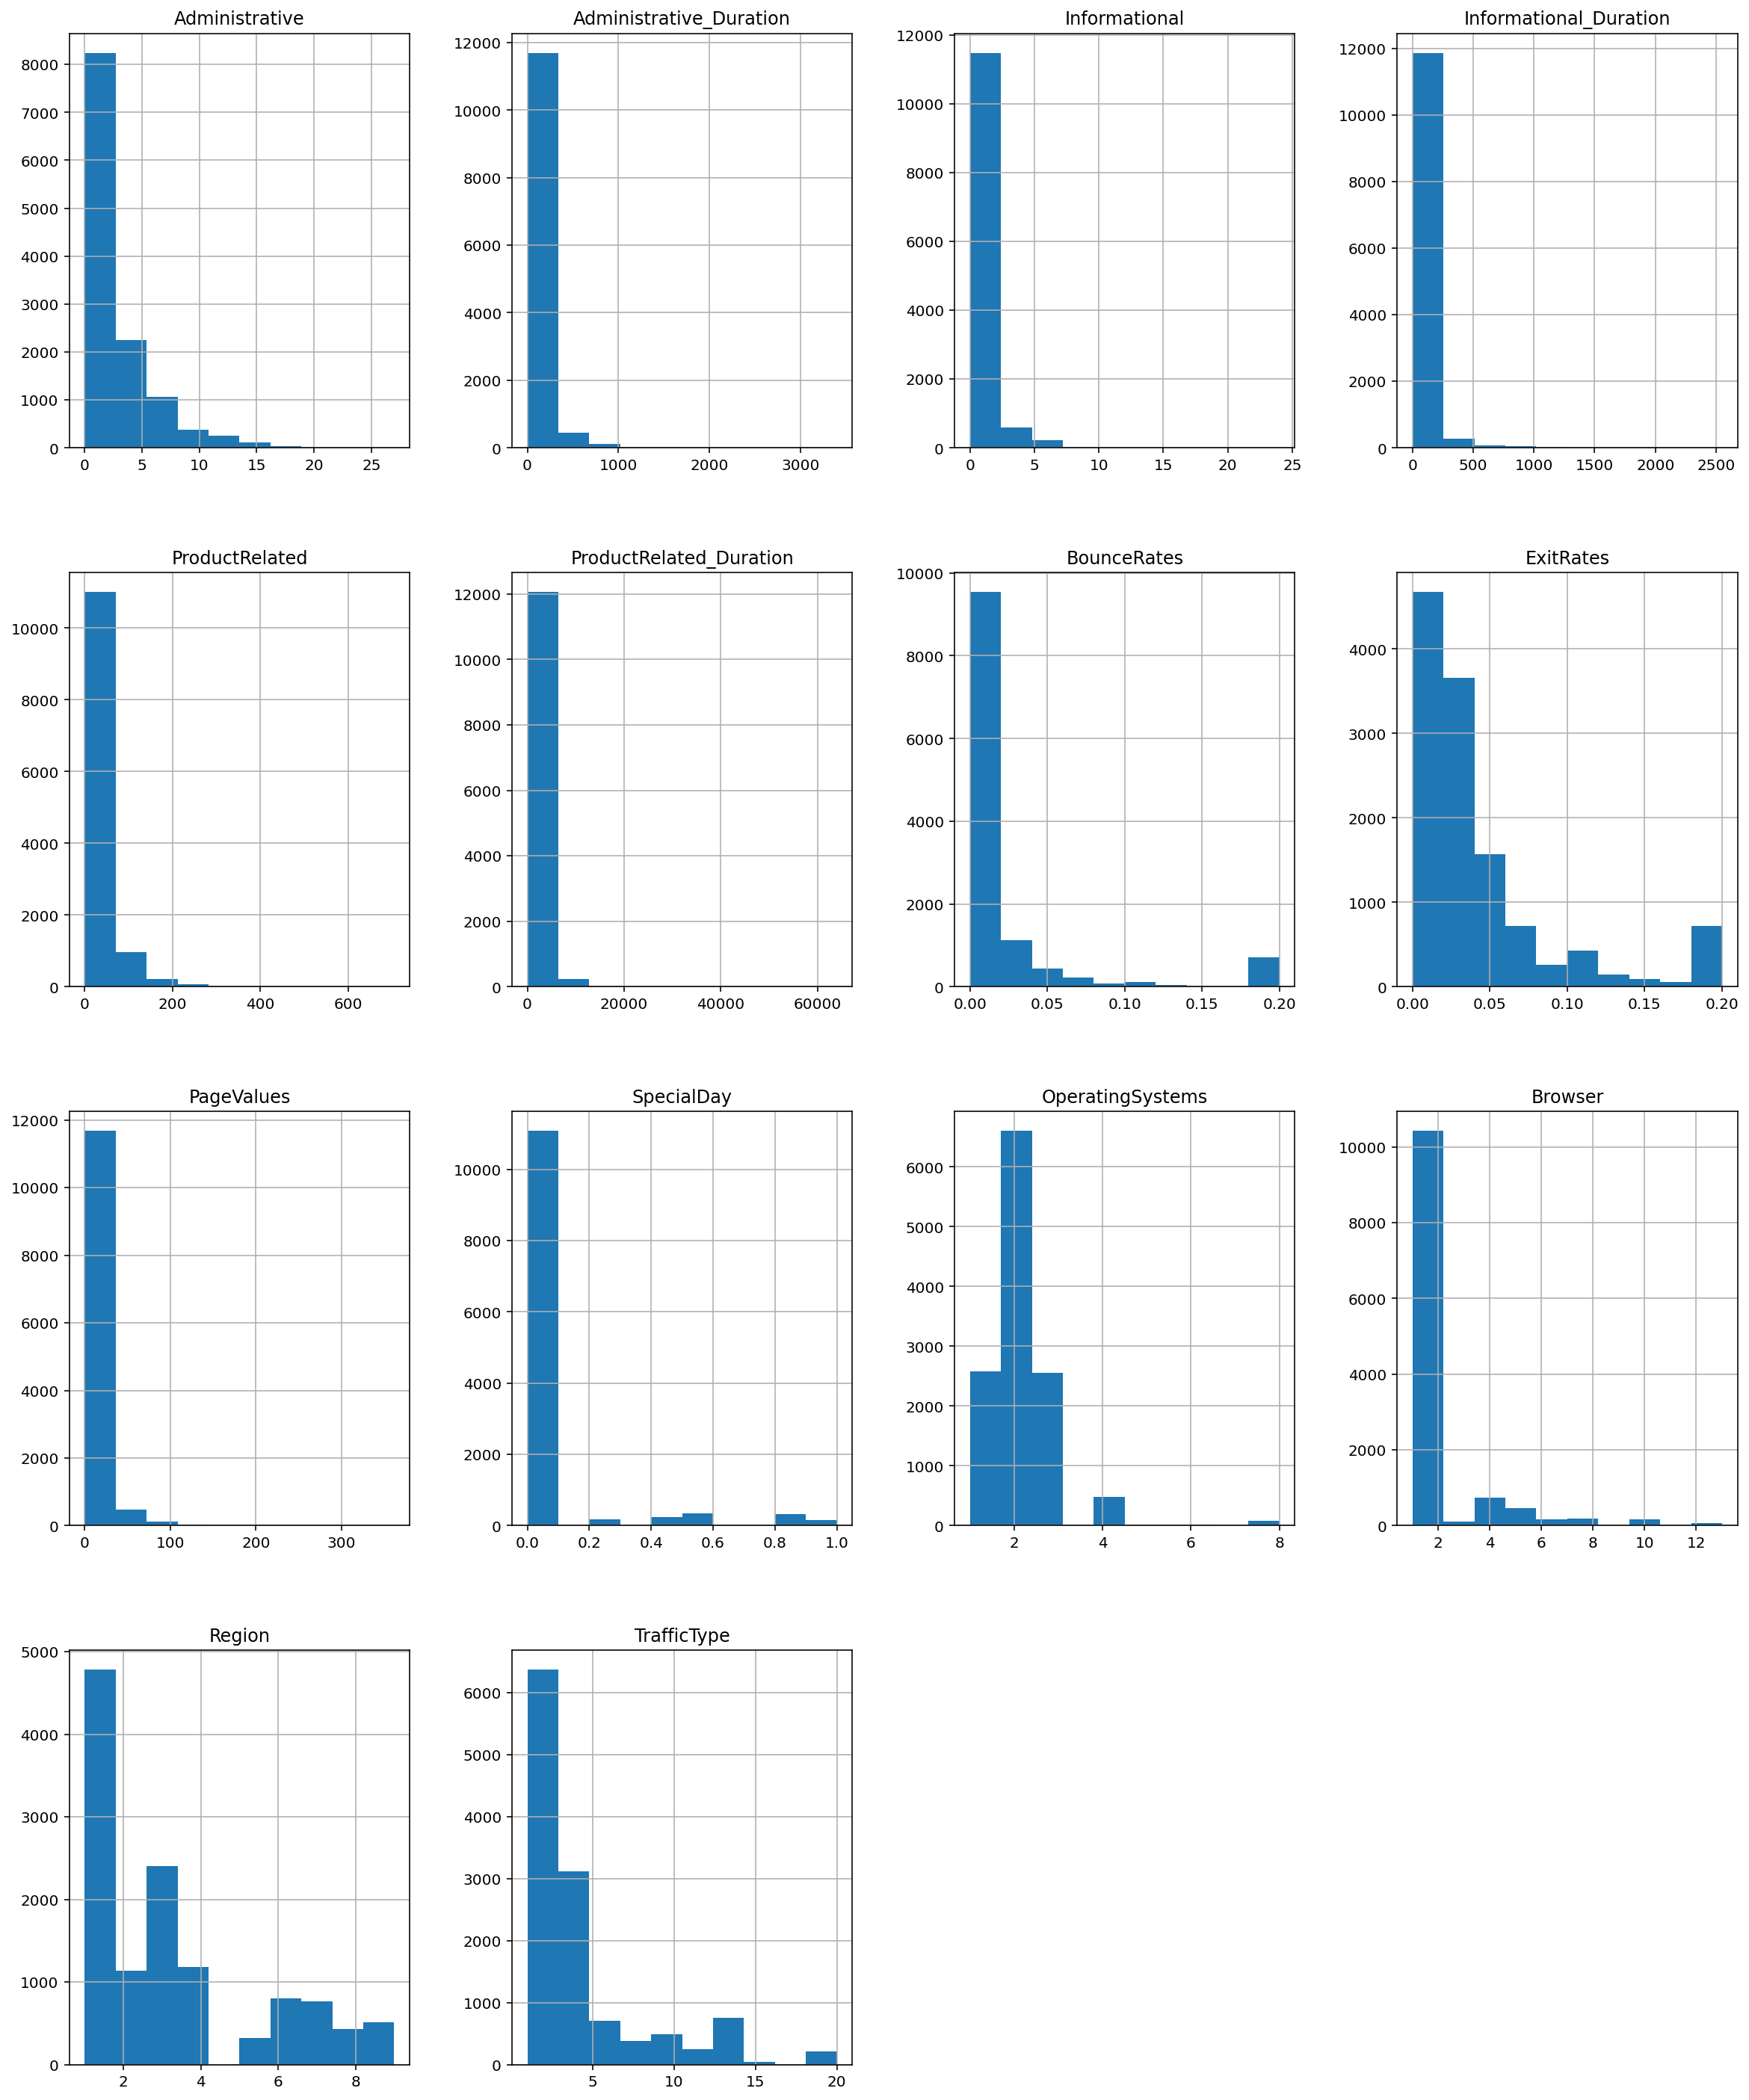

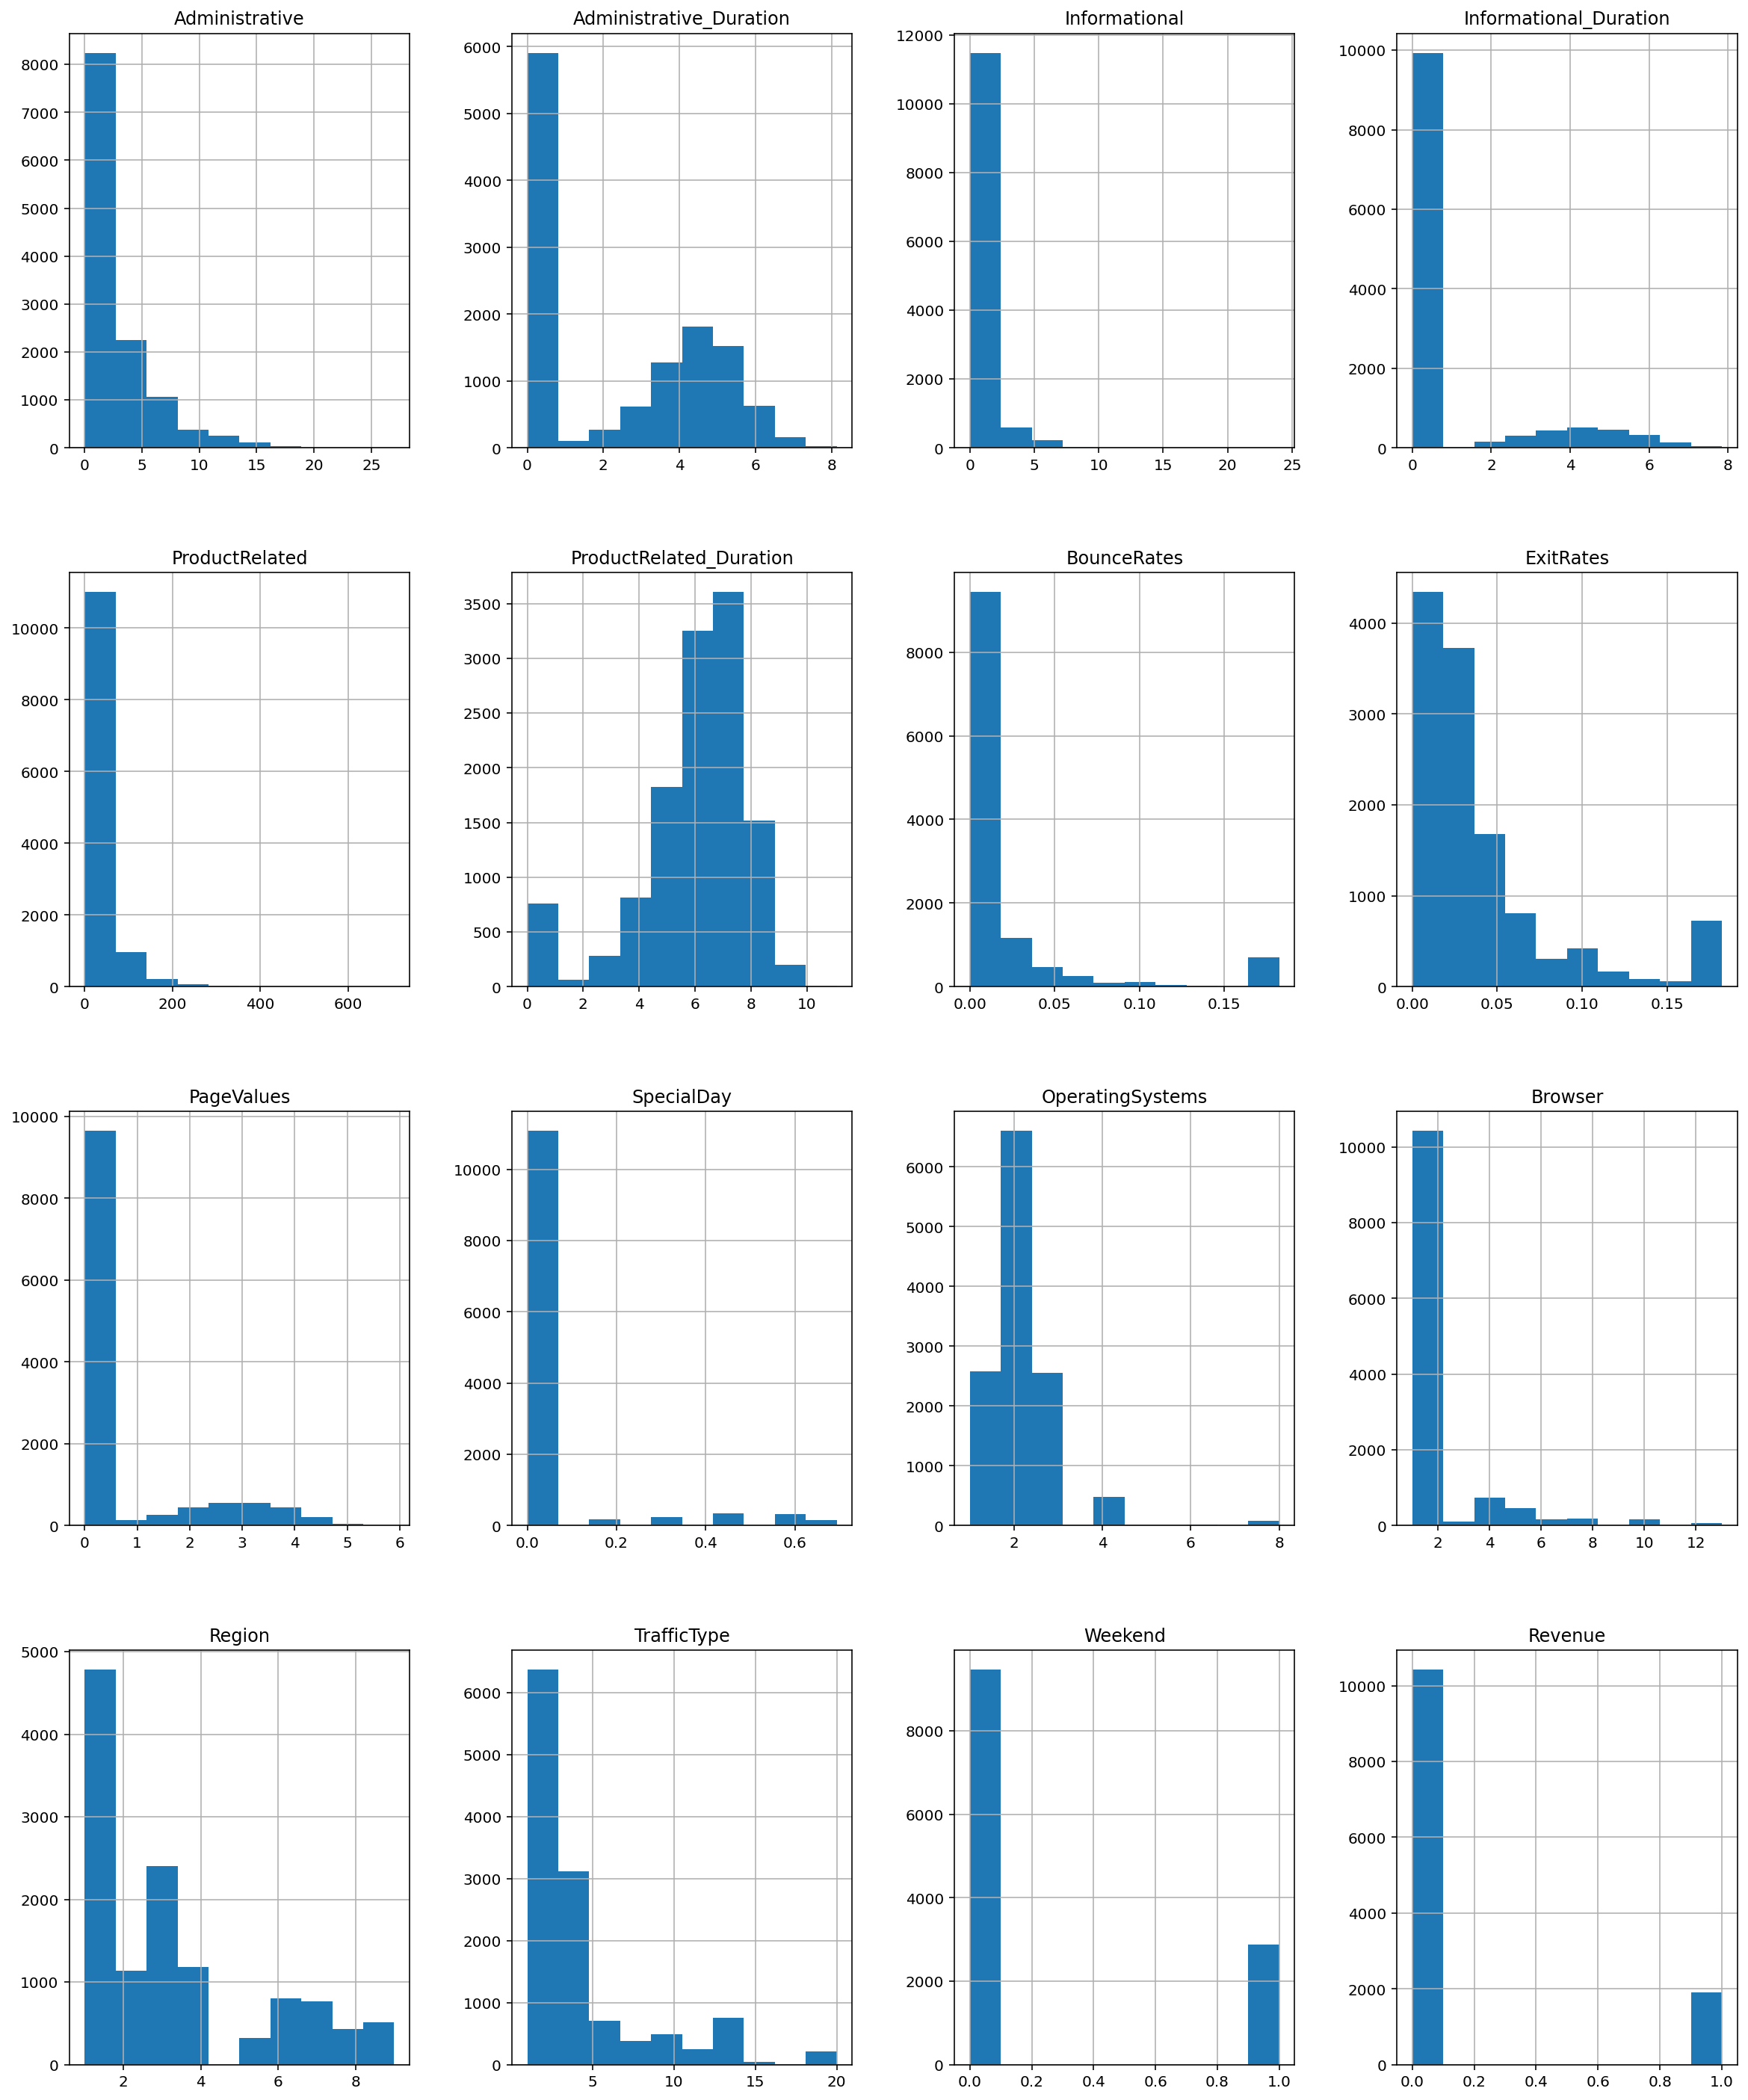

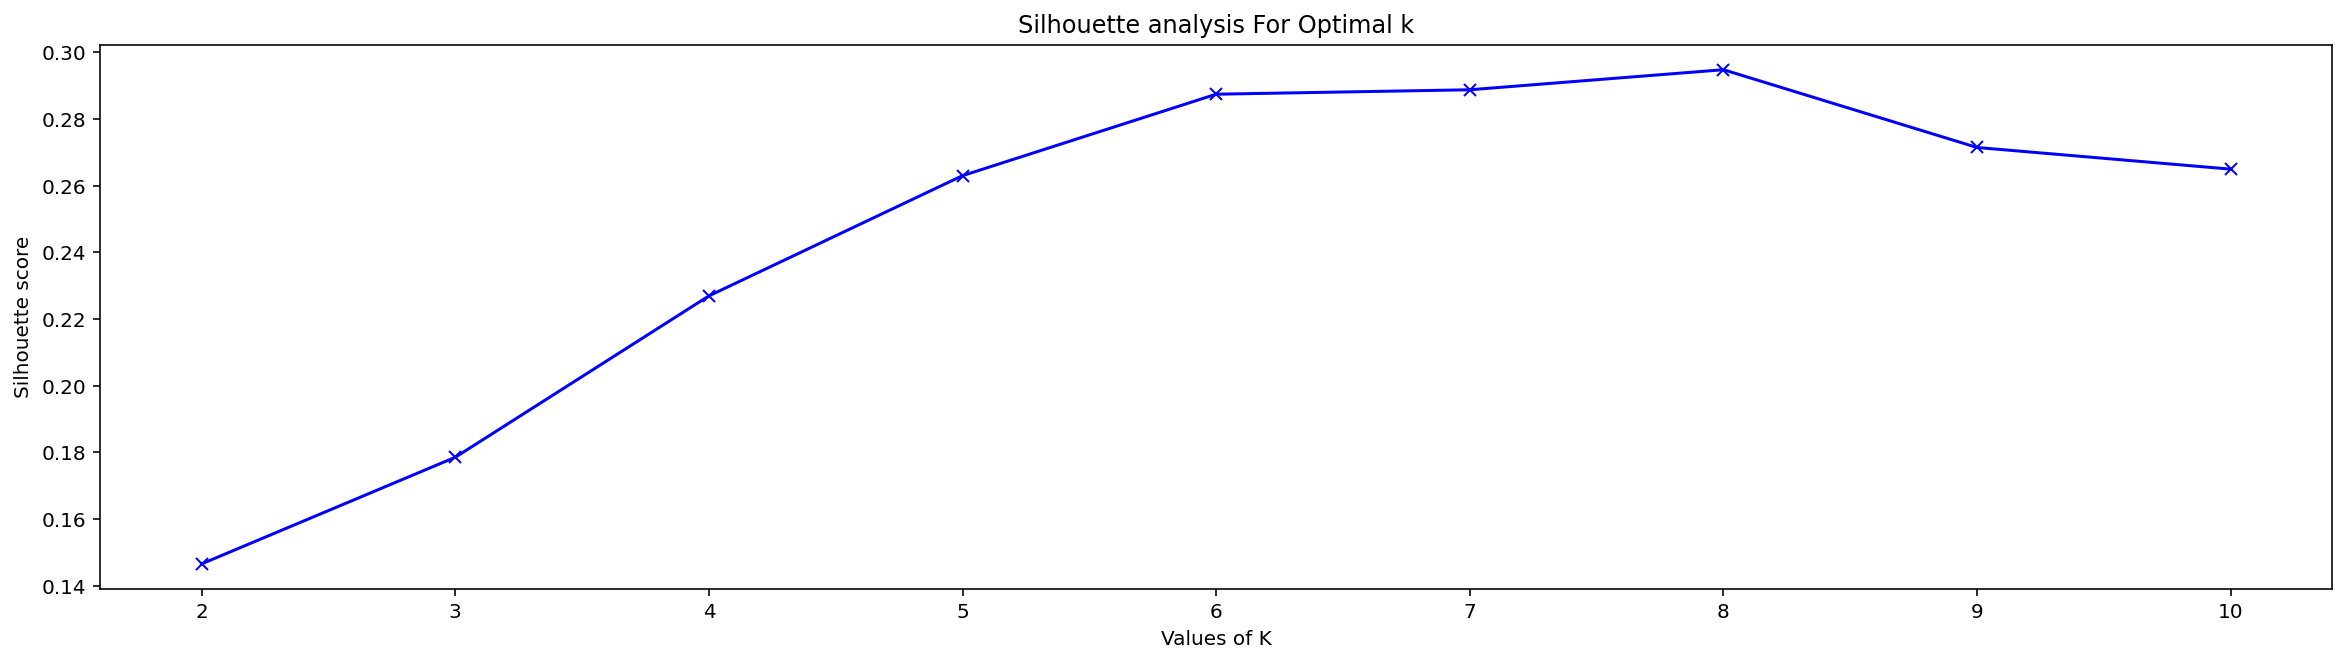

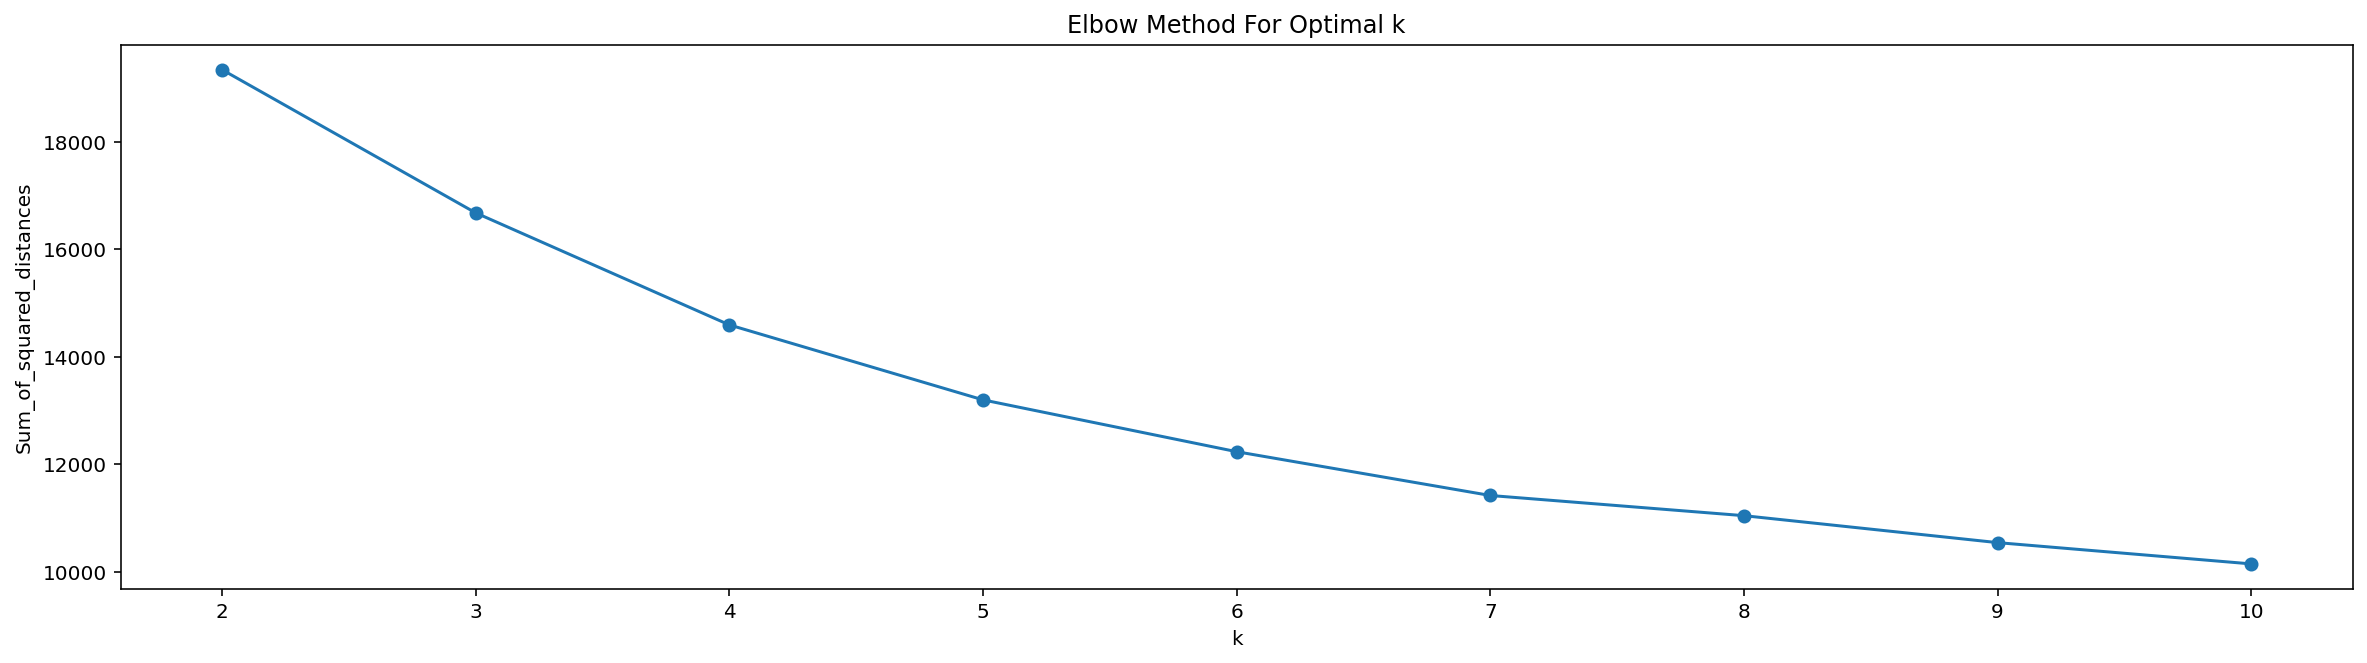

centres of cluster [[ 9.45165945e-02  3.77927863e-01  1.38970878e-02  7.87818331e-02
   2.56097867e-02  5.19805426e-01  2.70982916e-02  1.10263035e-01
   1.37124973e-01  2.22970083e-02  1.46820712e-01  1.07290437e-01
   2.84017119e-01  1.50375940e-01  2.82762692e-01  4.25029516e-02
   1.97756789e-01  5.90318772e-04  3.18772137e-02  1.77095632e-02
   1.36953955e-01  1.88311688e-01  2.47343566e-01  7.31995277e-02
   6.37544274e-02  1.00000000e+00 -1.12757026e-17  2.55351296e-15]
 [ 8.35727969e-02  2.71184440e-01  2.40660920e-02  1.13230316e-01
   4.35365207e-02  5.40087179e-01  1.20302609e-01  2.36418632e-01
   1.00374000e-01  5.96744876e-16  1.83908046e-01  1.39906609e-01
   3.02083333e-01  1.66137326e-01  2.11925287e-01 -1.73472348e-16
   1.00000000e+00  1.49186219e-16 -1.11022302e-16 -6.59194921e-17
   6.66133815e-16 -2.38697950e-15 -2.88657986e-15  3.88578059e-16
   2.01227923e-16  7.21644966e-16  4.45402299e-02  9.55459770e-01]
 [ 7.04372681e-02  2.35849803e-01  1.79255610e-02  9.51

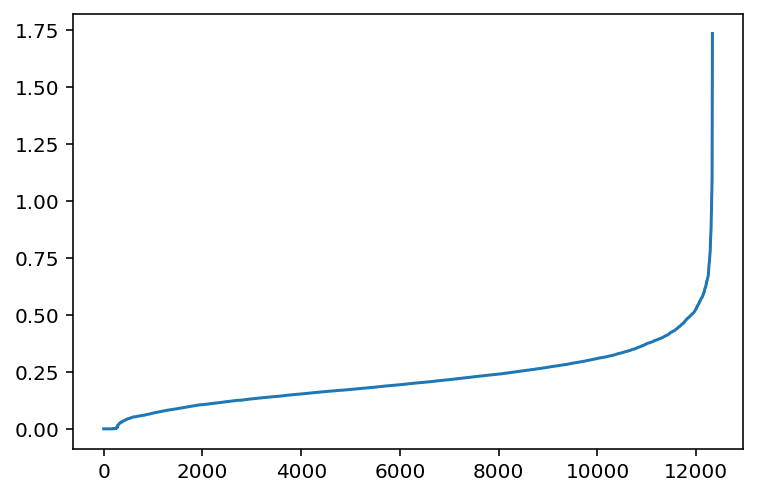

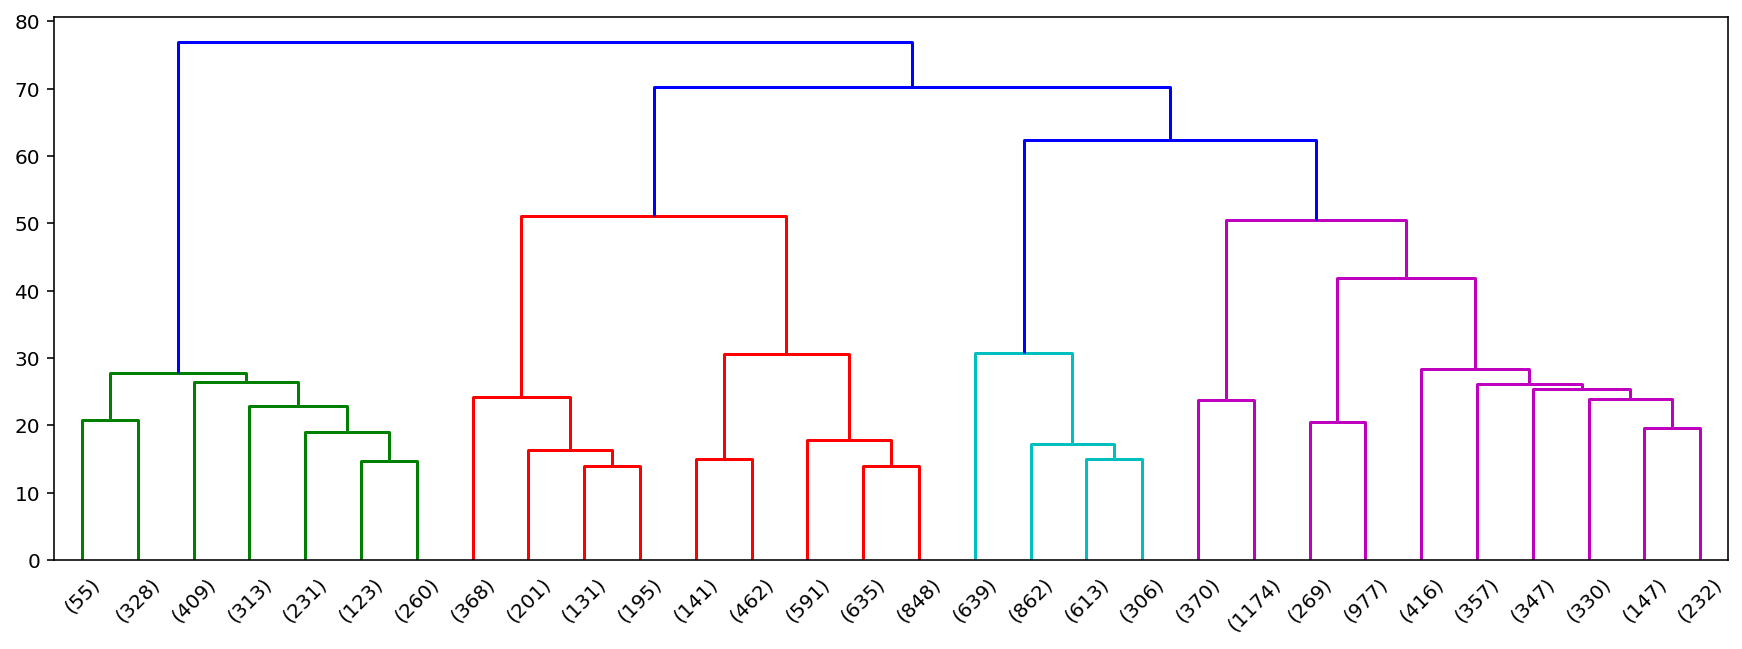

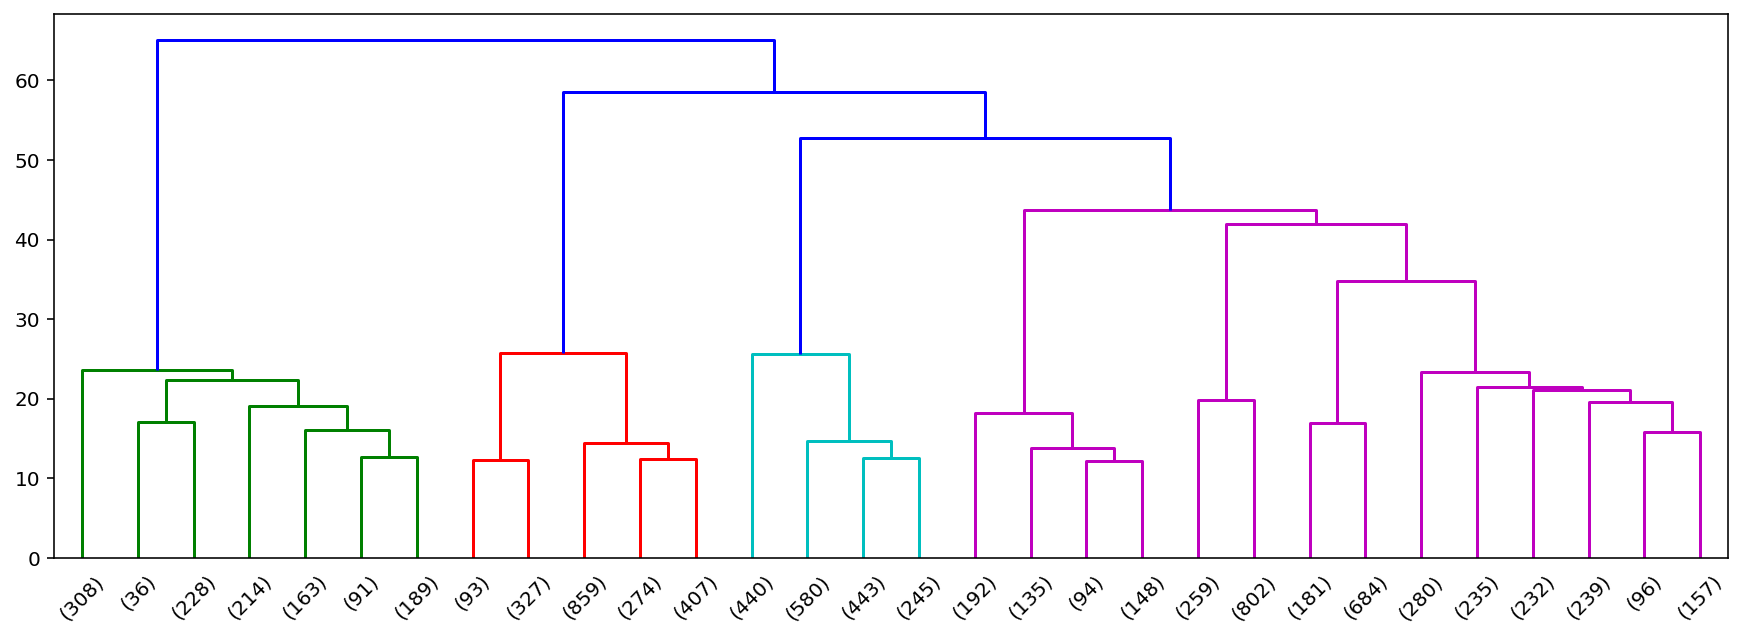

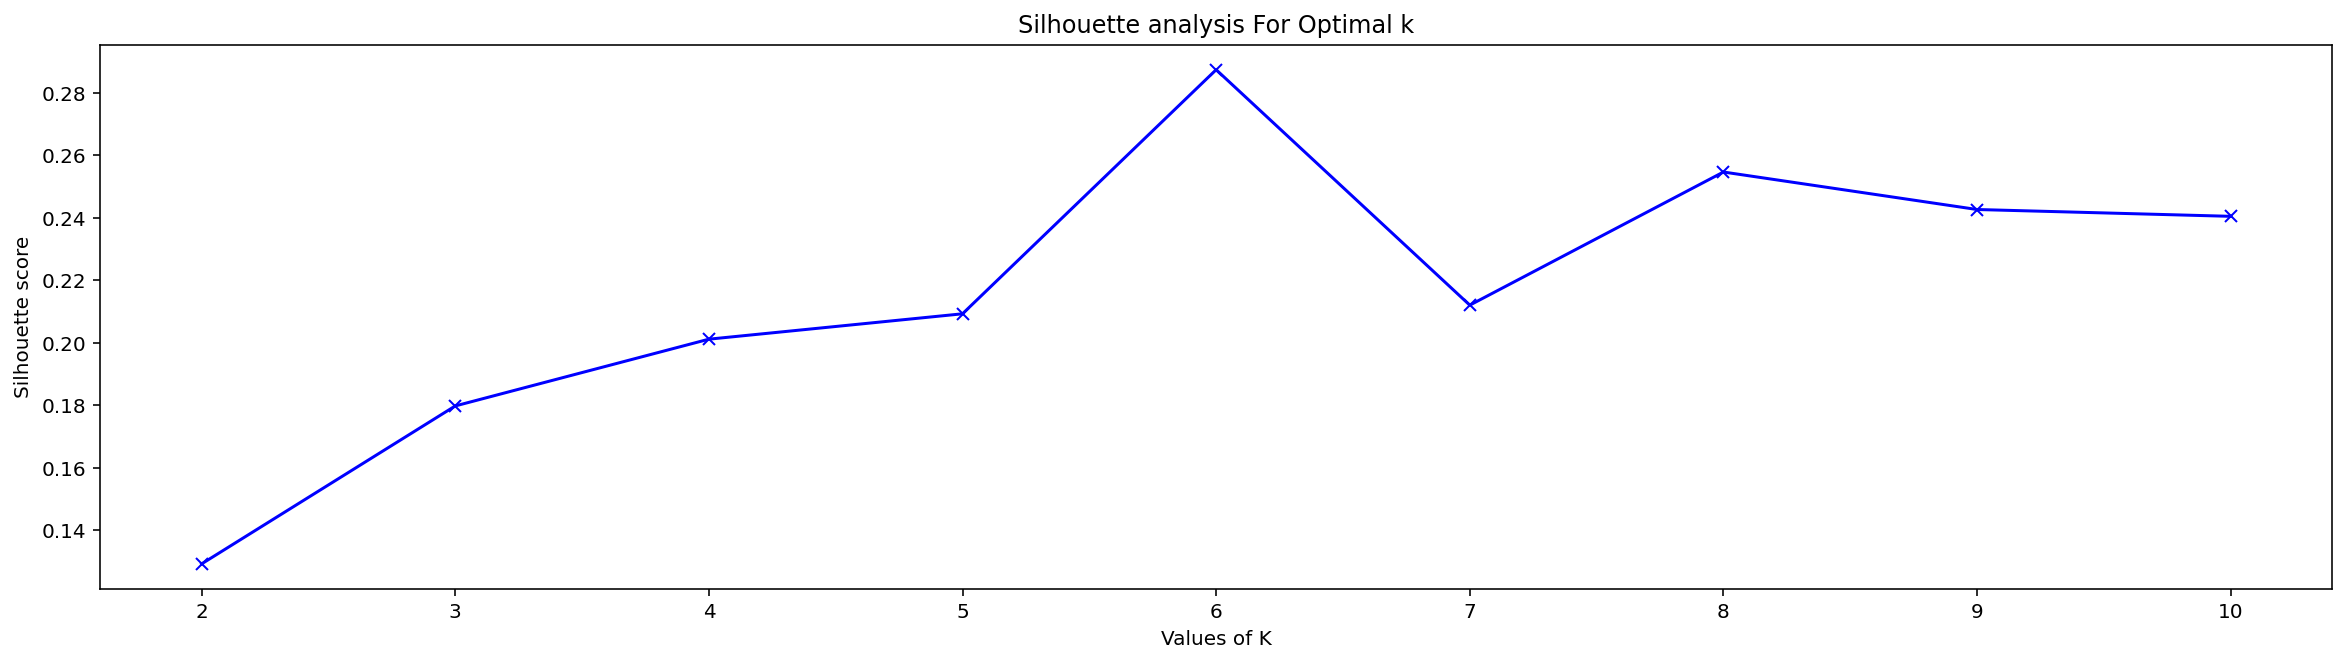

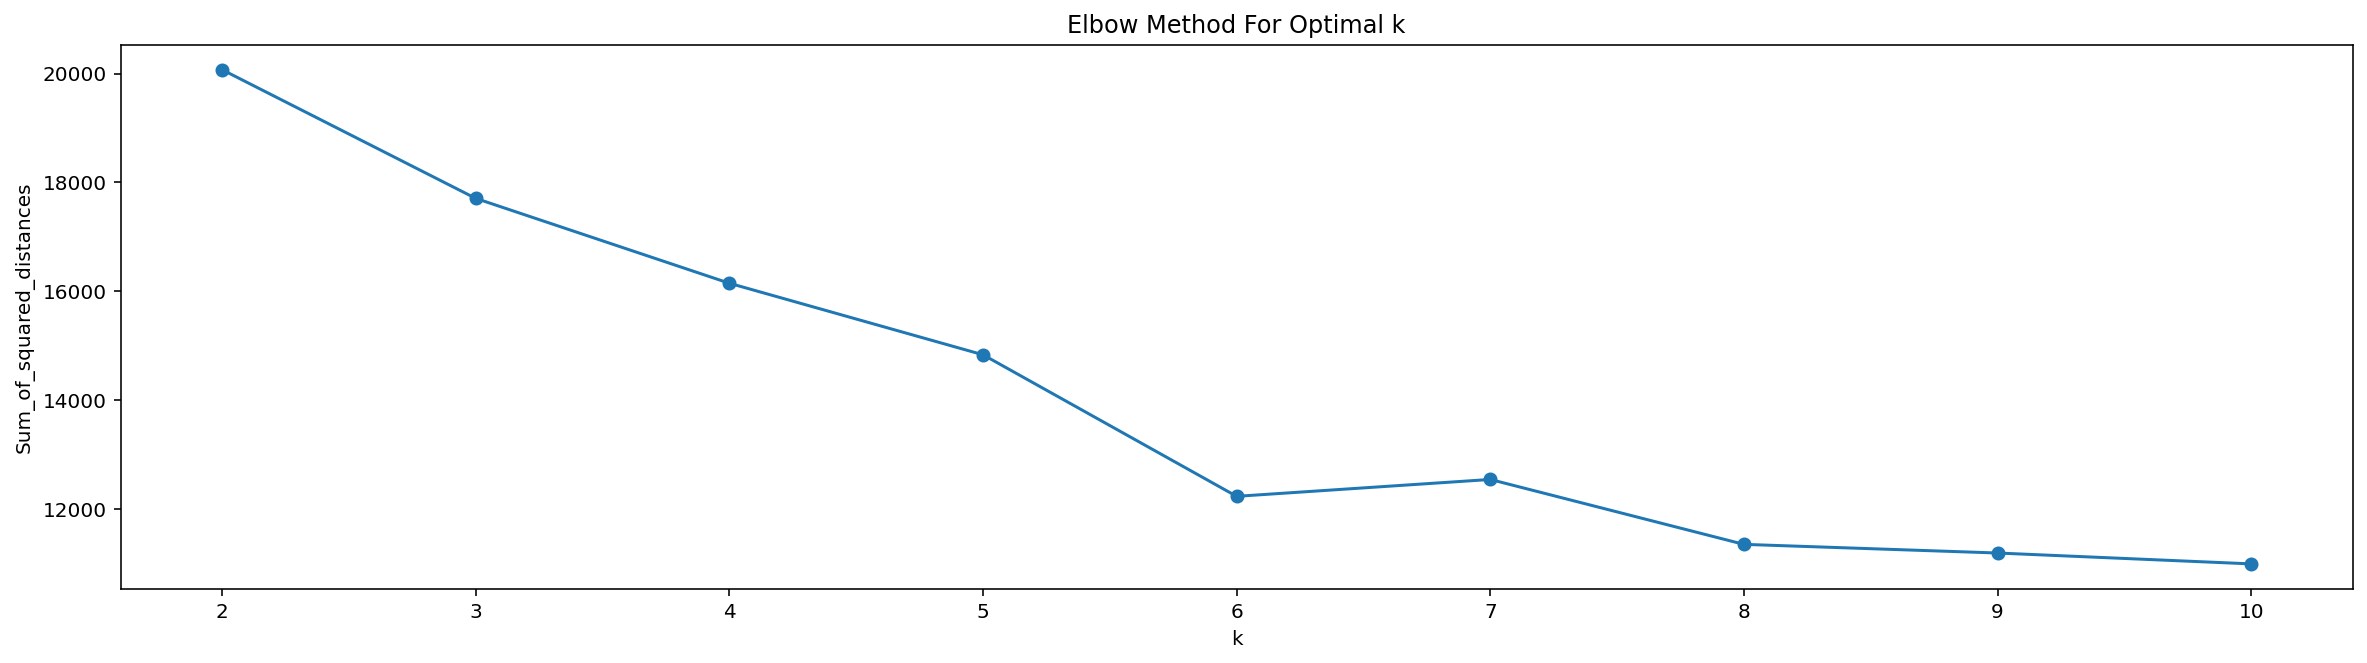

Centere of clusters [[6.99427775e-02 2.34921303e-01 1.75394680e-02 9.27173826e-02
  3.86817757e-02 5.18709642e-01 1.61062831e-01 2.79767426e-01
  9.53006703e-02 2.49998185e-01 1.61023616e-01 1.13939788e-01
  2.67397617e-01 1.85957534e-01 2.11775308e-01 0.00000000e+00
  0.00000000e+00 3.00390508e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.99699609e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.00781015e-04 0.00000000e+00 9.99399219e-01]
 [9.87683930e-02 2.93640292e-01 2.83507215e-02 1.39396253e-01
  6.91048385e-02 5.85799223e-01 1.07738522e-01 2.11487585e-01
  1.22072506e-01 0.00000000e+00 1.62489507e-01 1.05298397e-01
  2.53327737e-01 1.85728442e-01 2.56265739e-01 9.59347644e-04
  1.07926610e-03 0.00000000e+00 5.99592277e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.97121957e-01 2.39836911e-04
  0.00000000e+00 8.39429188e-04 8.03453652e-03 9.91126034e-01]
 [6.51296398e-02 2.25162418e-01 1.77203945e-02 9.70872305e-02
  2.84900173e-02 5.02516587e-01 1.25922604e-01 2

In [9]:
d1 = dataset('online_shoppers_intention.csv')
d1.data_preprocessing()
d1.normalization_scaling()
d1.make_X('Revenue')
d1.X
d1.y
d1.Kmeans_find()
d1.kmean(6)
d1.kmeans_classification(2)
# d1.df1_knn
d1.dbscan_find()
d1.dbscan(0.37)

d1.dbscan_clustering(0.37)

d1.agglomerative(6)

d1.agglomerative_classification(2)

d1.optics()

d1.optics_clustering()

d1.MeanShift()
d1.MeanShift_clustering()

d1.minibatch_Kmeans_find()
d1.minibatch_kmean(6)
d1.minibatch_kmeans_classification(2)

In [10]:
df_km_clust

clusters_km  silhoutte_km    dbi_km
0          6.0      0.287469  1.831059

In [11]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes      ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.03296            0.003158   0.006364   

   Homogeneity  
0     0.007695

In [12]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes      ARI  Mutual_Information  V-measure  \
0        0.147249  1.977953  0.665966 -0.03296            0.003158   0.006364   

   Homogeneity  
0     0.007695

In [13]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   

   Homogeneity  
0      0.00778

In [14]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  V-measure  \
0     -0.014021  1.402789  0.542066 -0.088732            0.038287   0.042965   

   Homogeneity  
0     0.093292

In [15]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   

   Homogeneity  
0     0.044889

In [16]:
df_ms_classification_test

silhoutte_ms    dbi_ms   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.215053  1.508793  0.758382  0.044211            0.005948   0.012755   

   Homogeneity  
0     0.014492

# 2nd Dataset

(6321, 12)
Index(['Record_ID', 'Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration', 'Class'],
      dtype='object')
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (6321, 11)
Shape of y : (6321,)
kmeans  2  : 0.25494644110699866
kmeans  3  : 0.2203528920387132
kmeans  4  : 0.23394445255878416
kmeans  5  : 0.2474506360304544
kmeans  6  : 0.24459118600498603
kmeans  7  : 0.24734709137182415
kmeans  8  : 0.2570858522721437
kmeans  9  : 0.26177777073035147
kmeans  10  : 0.22855363452594157


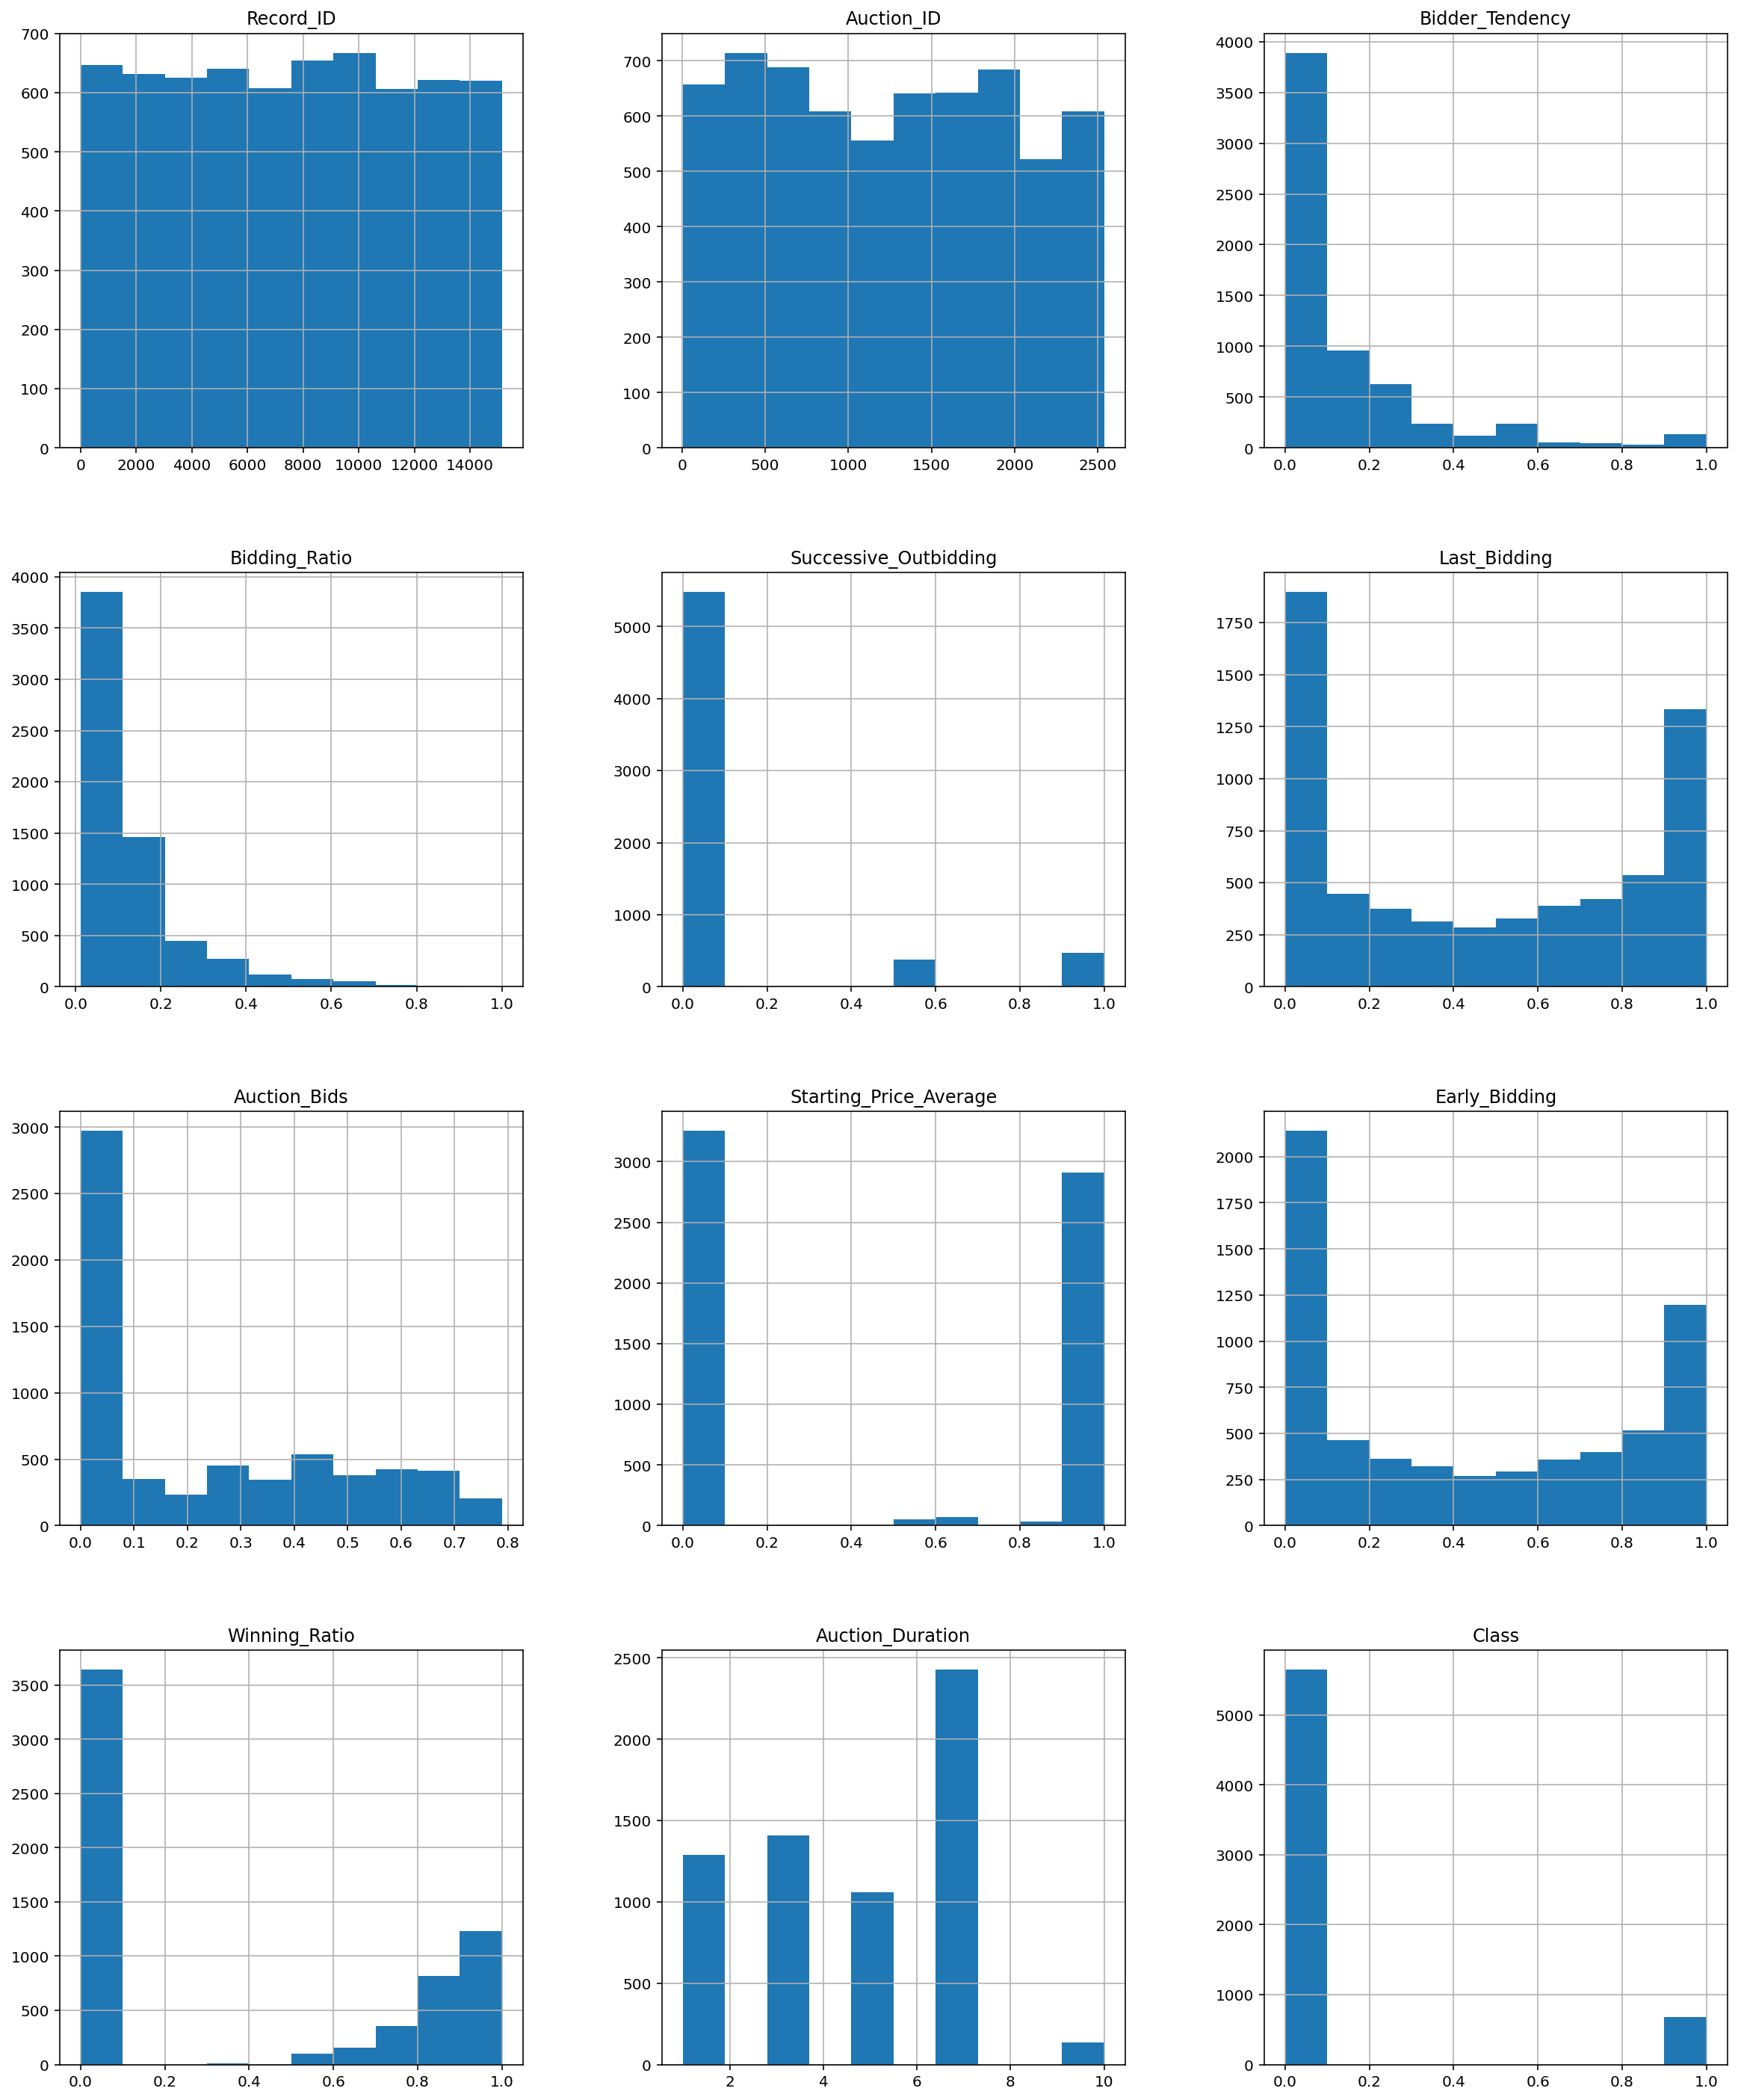

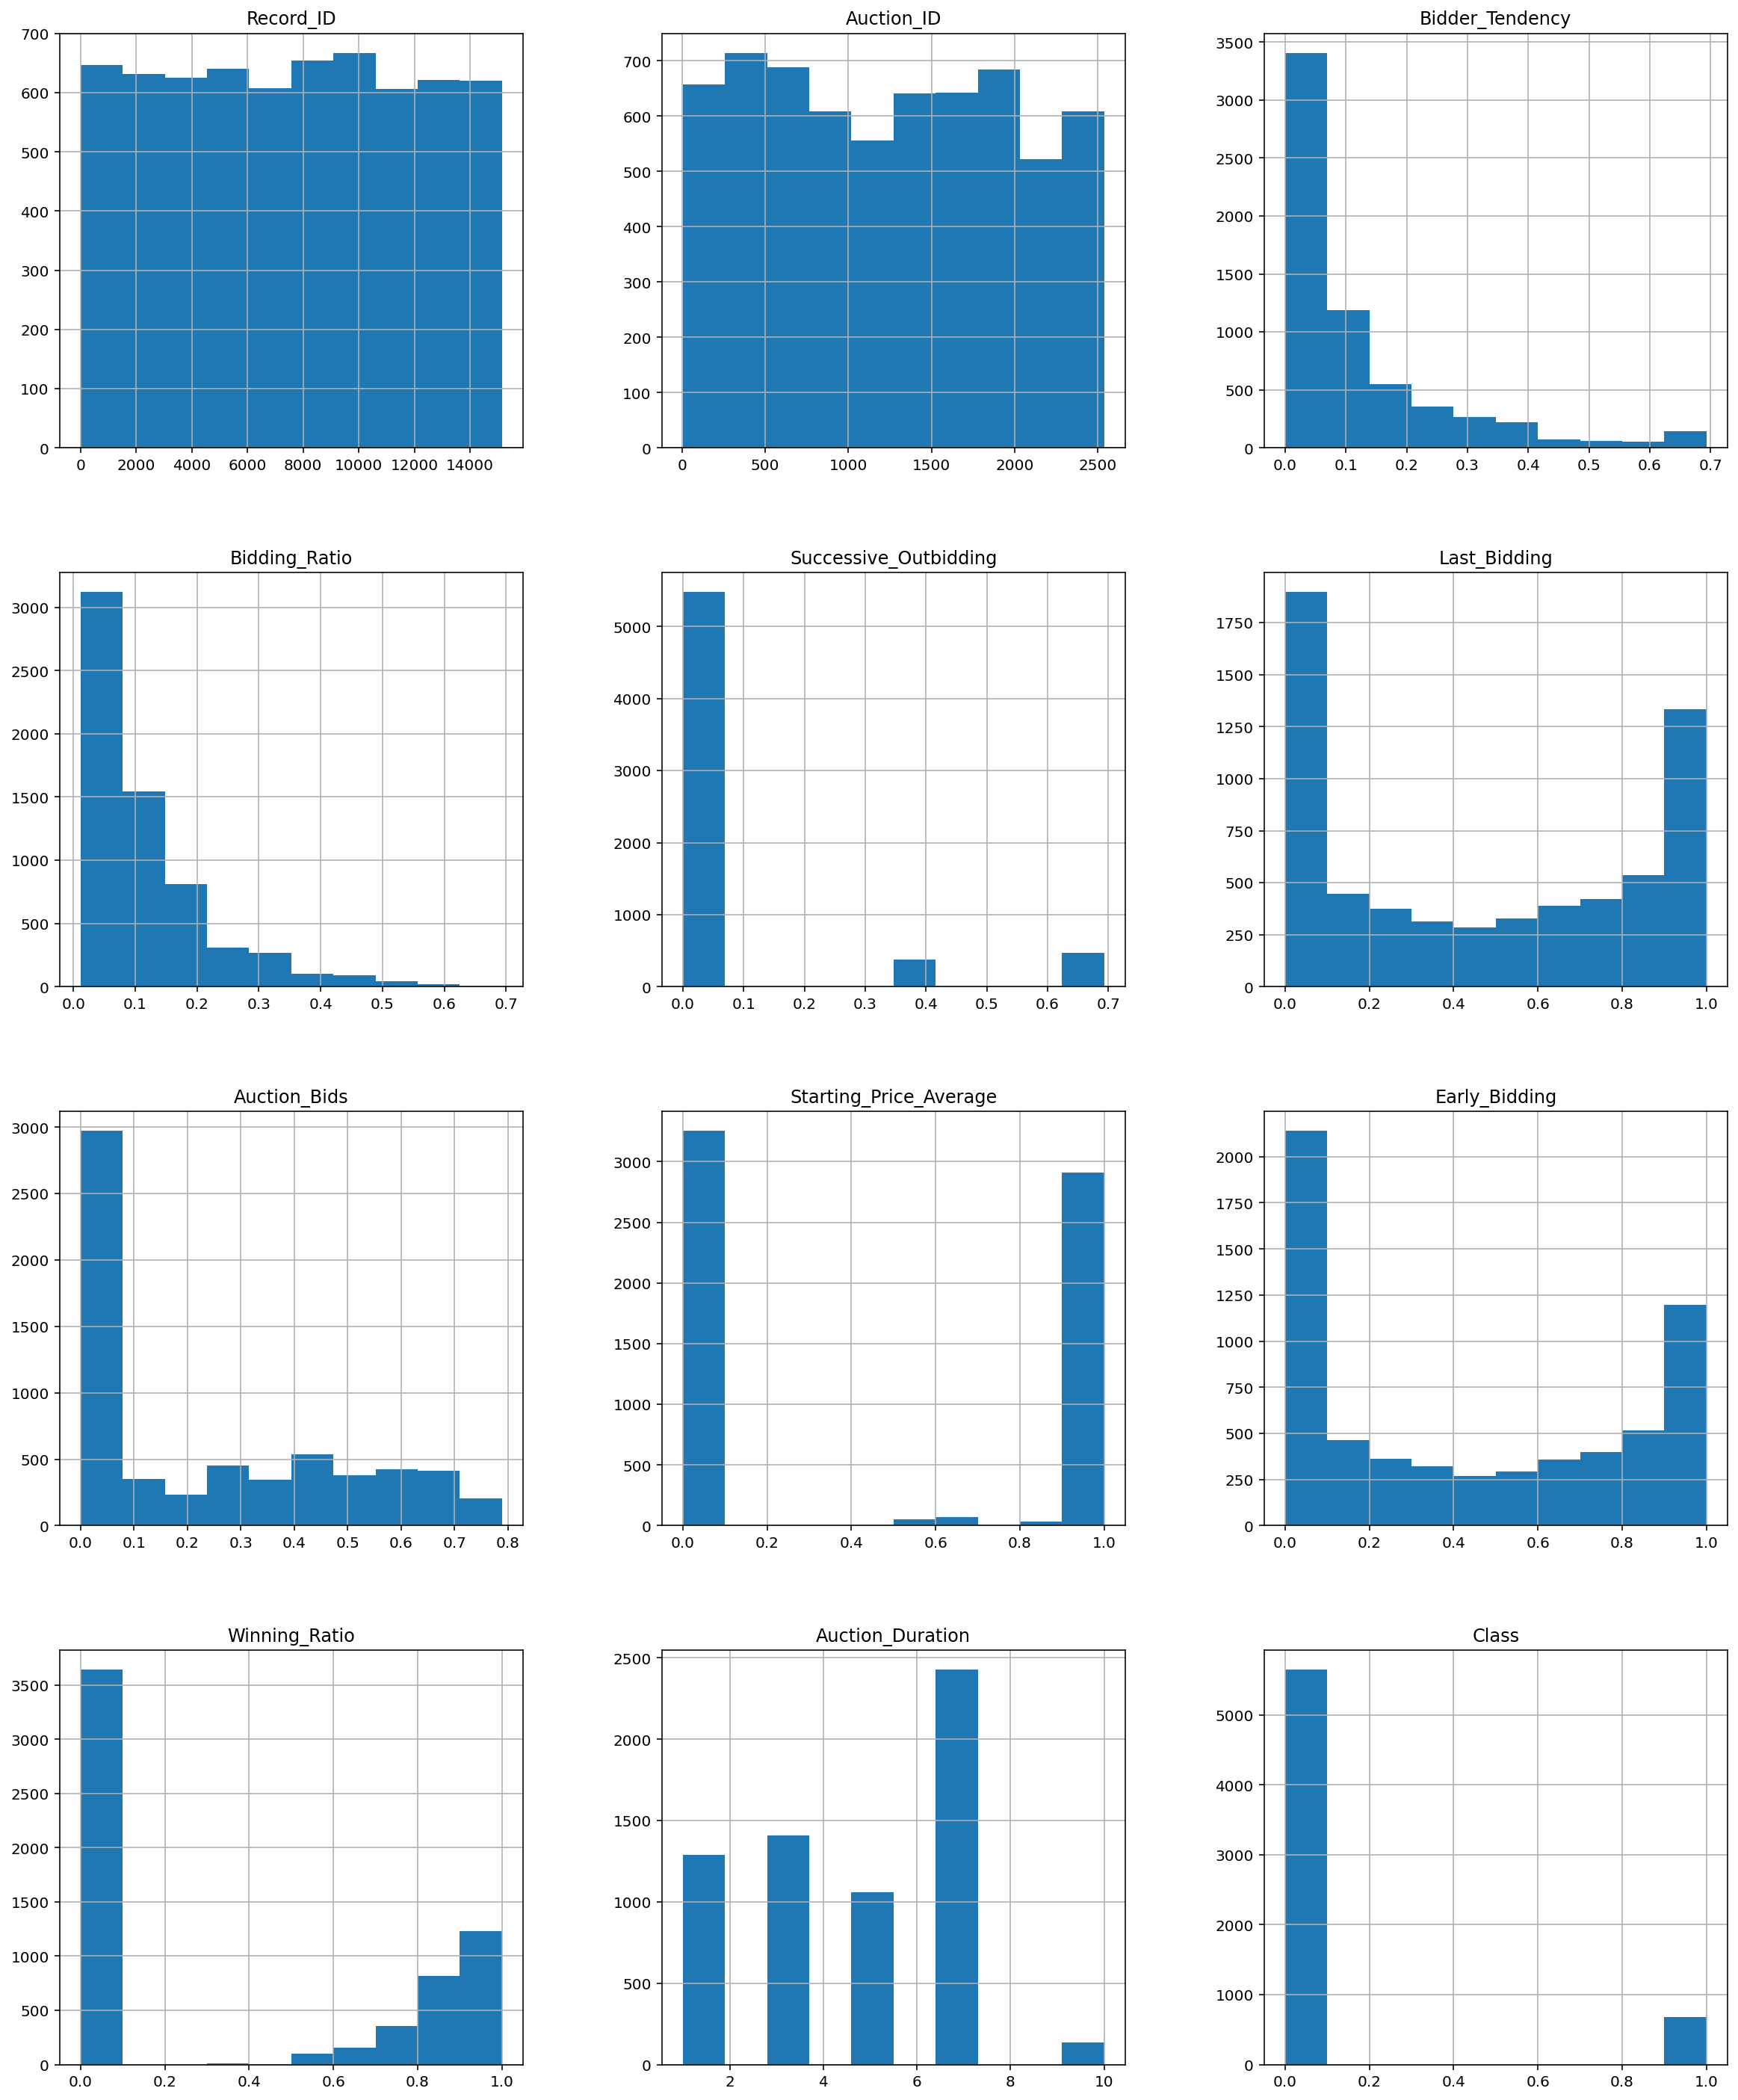

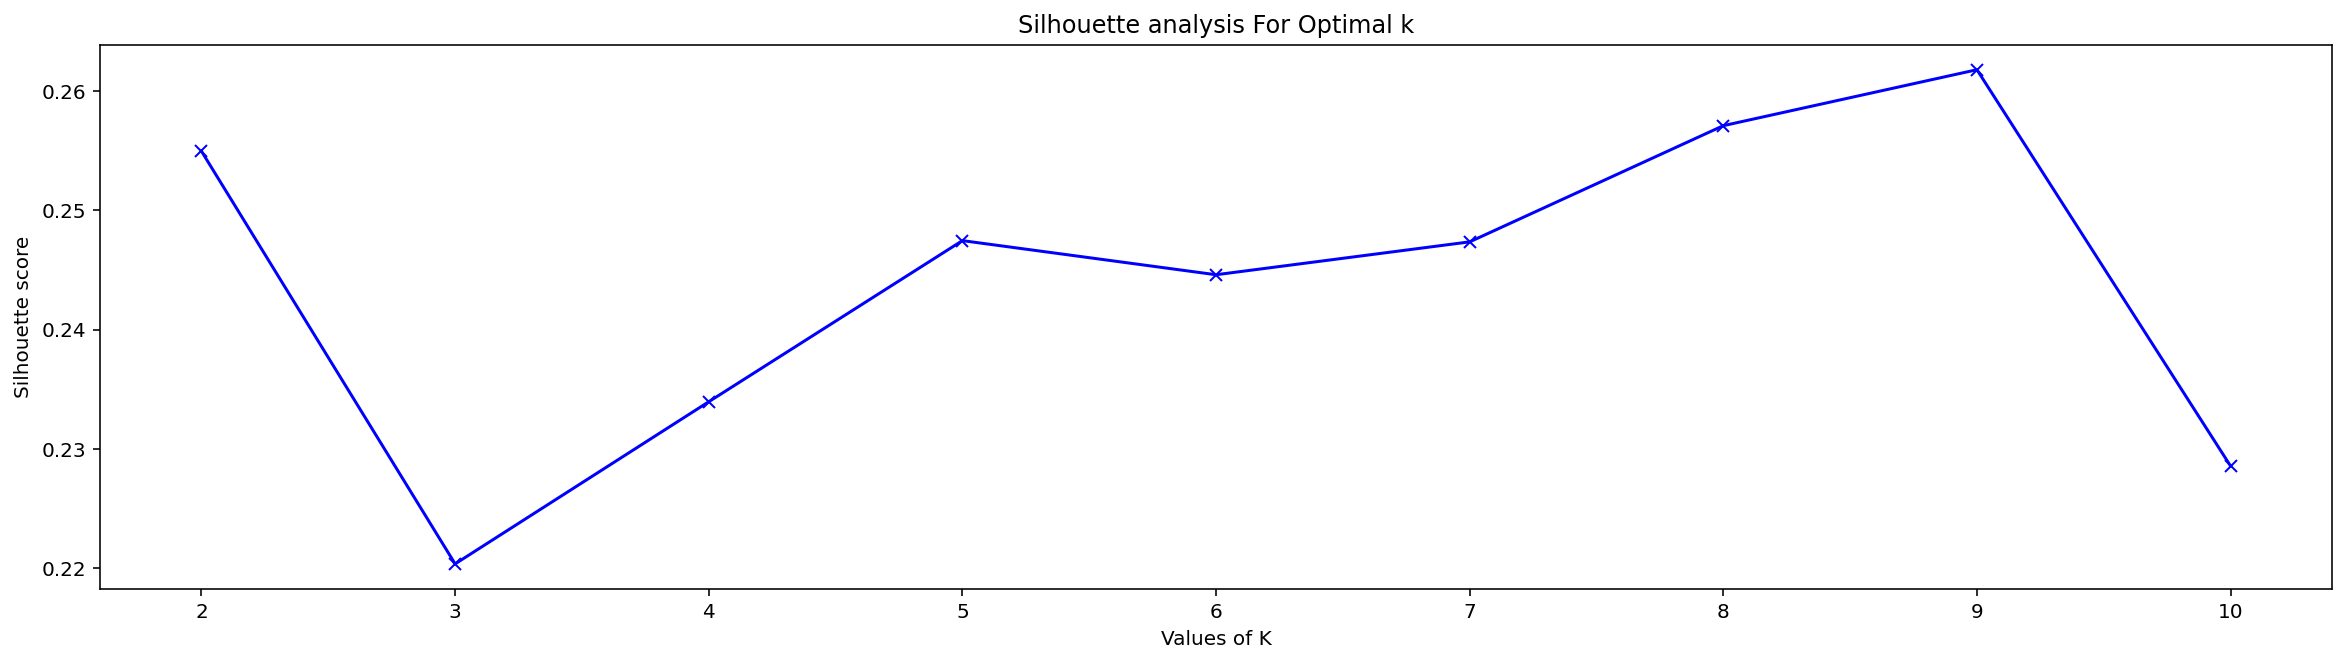

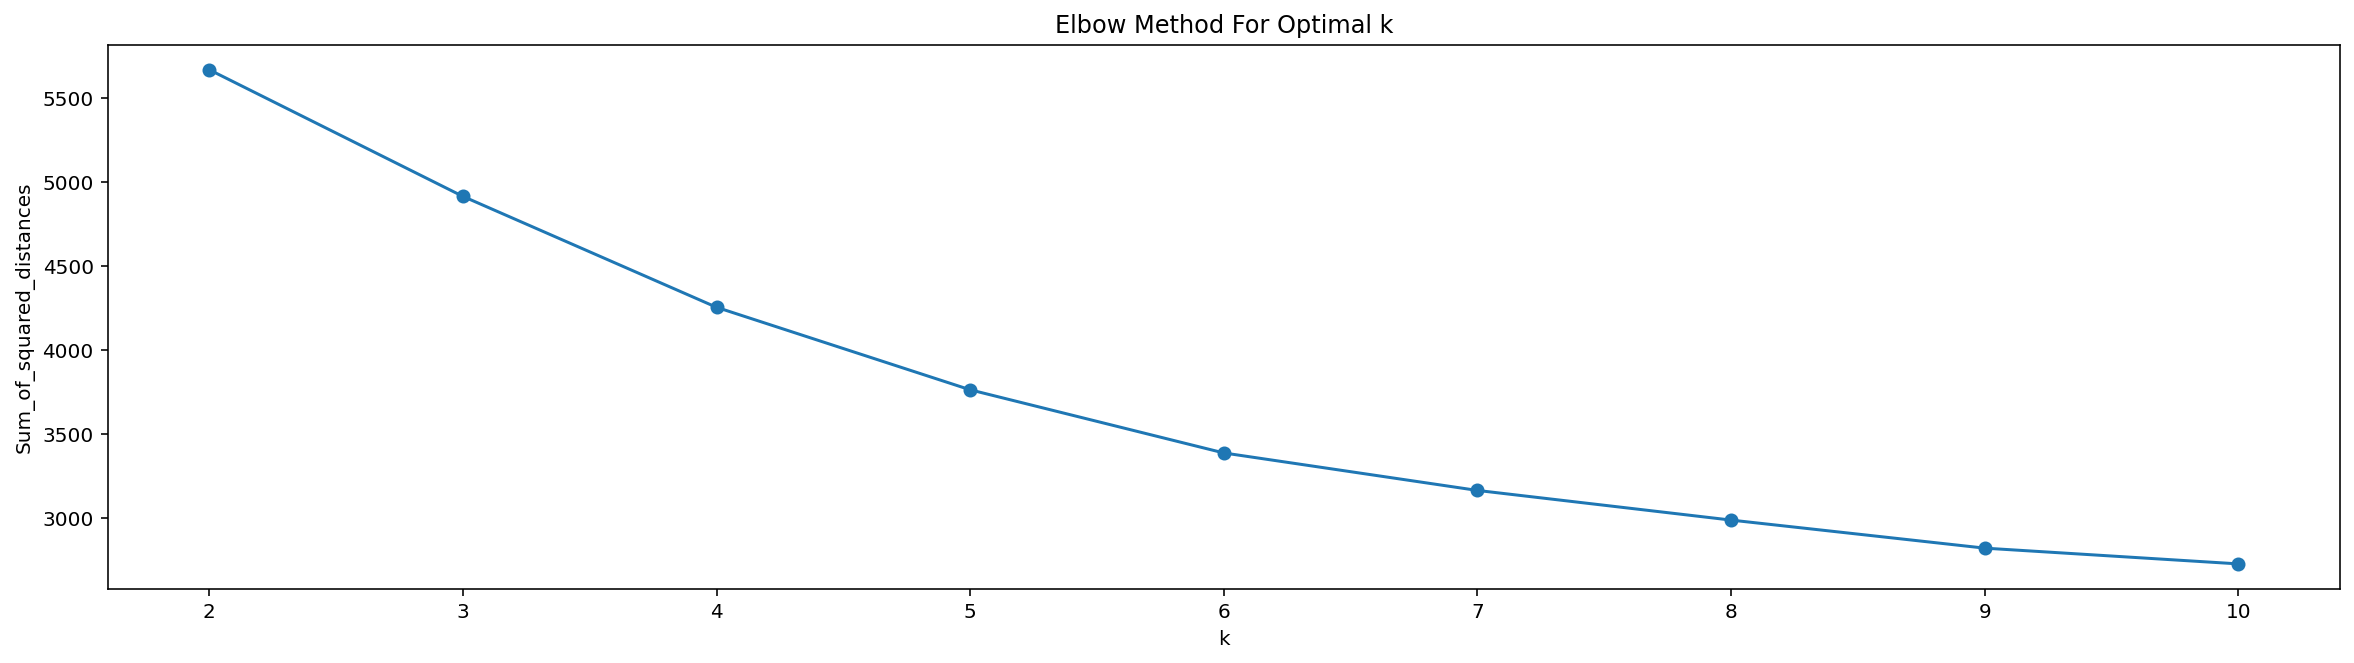

In [17]:
d2 = dataset('Shill Bidding Dataset2.csv')
d2.data_preprocessing()
d2.normalization_scaling()
d2.make_X('Class')

d2.Kmeans_find()


### For kmeans 5 clusters seems best observing the knee point on curves

centres of cluster [[0.49923251 0.48637329 0.33687874 0.29524251 0.53783844 0.77020754
  0.39804736 0.88809582 0.70507548 0.89470938 0.38698369]
 [0.47133924 0.46785047 0.18548177 0.2779006  0.1366502  0.30869617
  0.0335971  0.00906183 0.24772782 0.86042446 0.39755467]
 [0.48557675 0.48413806 0.16393309 0.07679655 0.02214499 0.13172052
  0.4601764  0.97776452 0.11007054 0.14247558 0.39507338]
 [0.52119973 0.49485138 0.12213177 0.0743901  0.00383956 0.3792273
  0.15832467 0.00156989 0.37276184 0.00167247 0.39651568]
 [0.51547857 0.51174867 0.13820394 0.04371711 0.01933582 0.85317948
  0.59437547 0.96462976 0.83979253 0.00137431 0.42595369]]
kmeans silhoutte score for  5  : 0.24759646135750873
kmeans DBI score for k =  5  : 1.4838931468838197
centres of cluster [[0.49597192 0.47825325 0.16250381 0.19416883 0.0930604  0.33979528
  0.08477597 0.03517685 0.30361835 0.49853802 0.39130227]
 [0.50512744 0.50369595 0.19375448 0.10200619 0.12096918 0.60847126
  0.52266514 0.96195177 0.57774268 

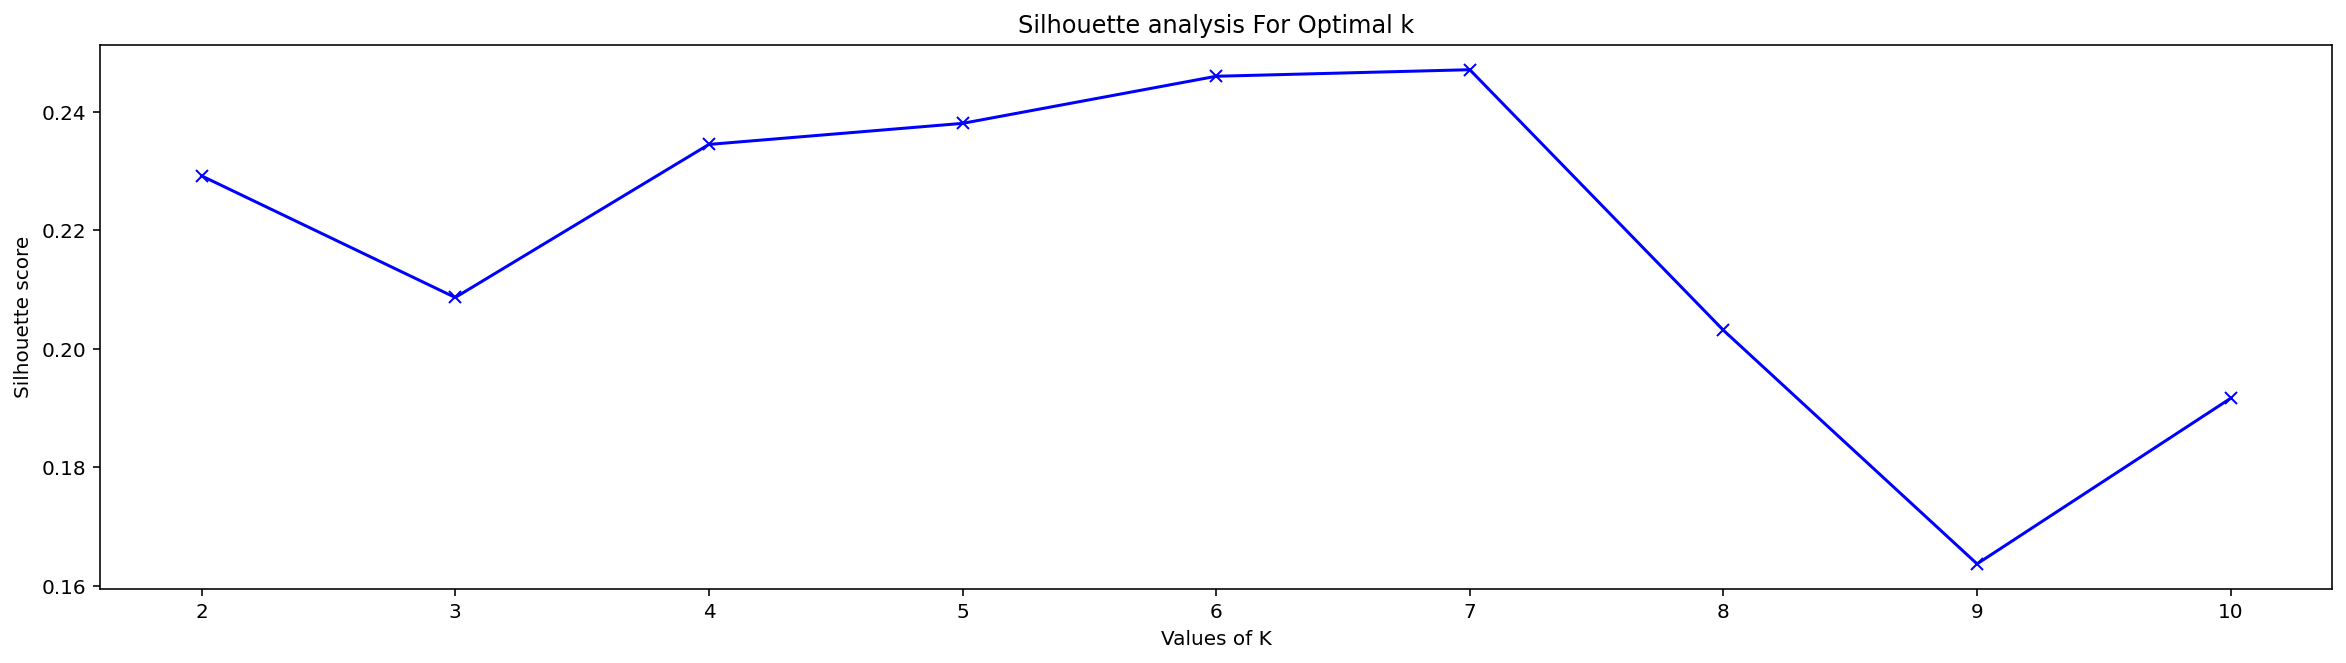

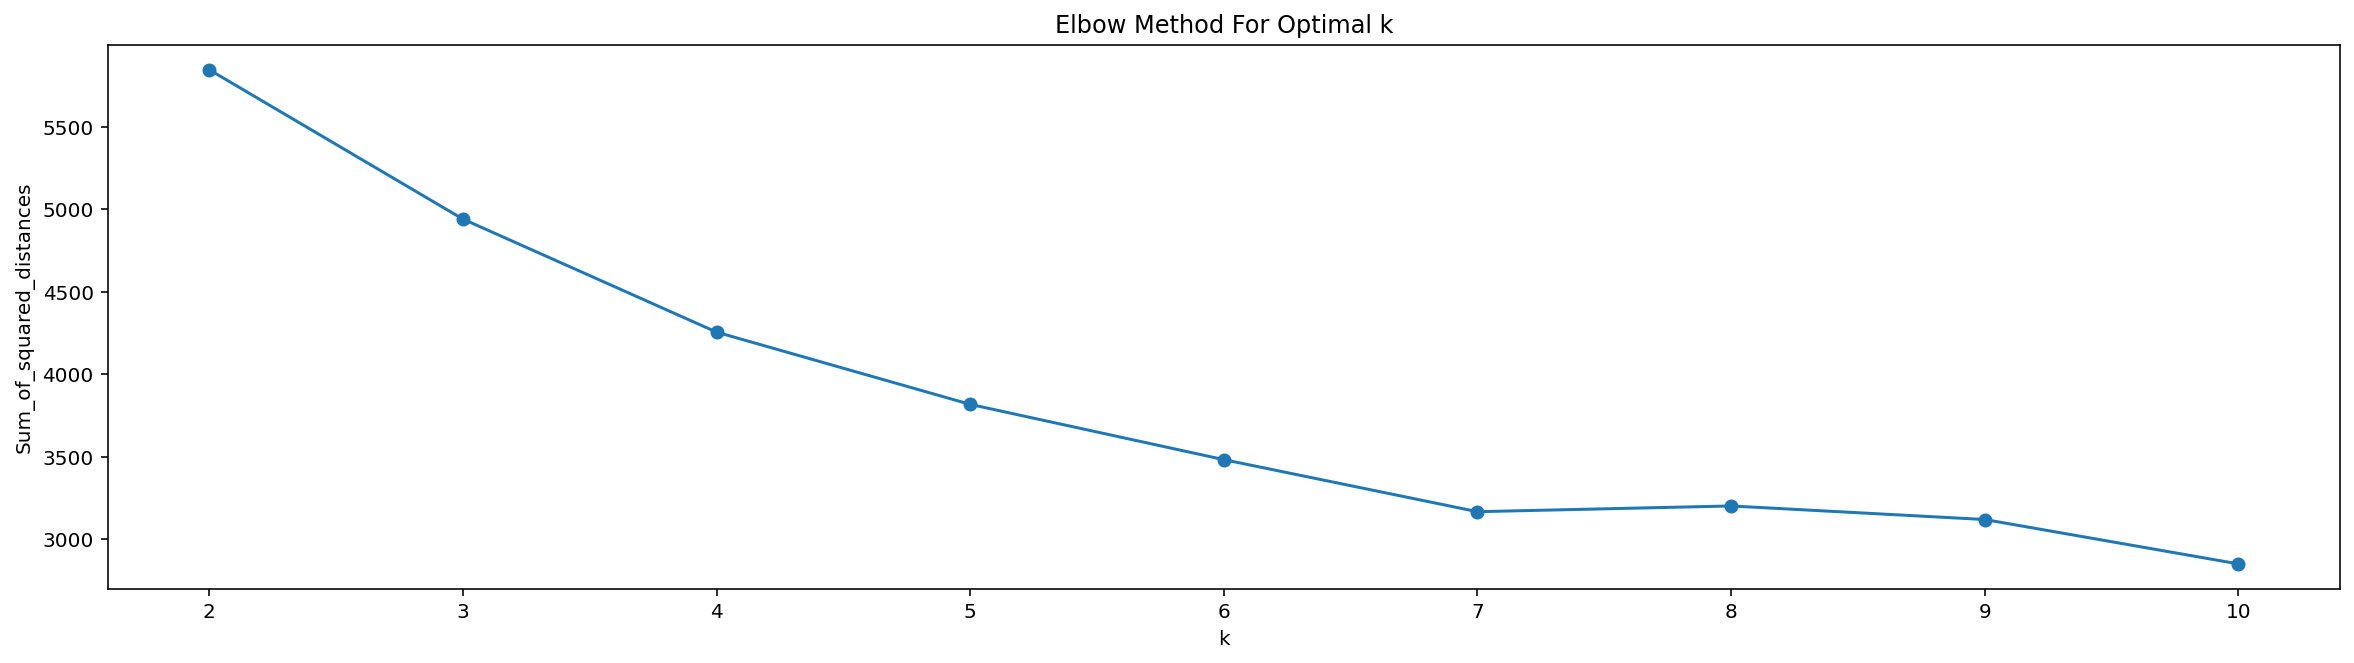

In [18]:
d2.kmean(5)
d2.kmeans_classification(2)
# d2.df1_knn
d2.minibatch_Kmeans_find()

### for Minibatch Kmeans 7 clusters look good observing the knee points of curve

Centere of clusters [[0.48756467 0.48732254 0.16191322 0.0643672  0.01663471 0.16706714
  0.50353241 0.97717435 0.14189569 0.07963792 0.3881061 ]
 [0.52328554 0.47475706 0.12634982 0.07935456 0.00406326 0.17264426
  0.14477283 0.         0.16608663 0.00616162 0.40607295]
 [0.511767   0.51361606 0.13846672 0.15160125 0.04989587 0.83013814
  0.12637722 0.02757547 0.79975419 0.42665385 0.38830381]
 [0.49003629 0.49197822 0.35230853 0.29364478 0.55881341 0.74726076
  0.41405016 0.90880784 0.68274297 0.89318166 0.39806257]
 [0.46976088 0.45147083 0.19162539 0.28577057 0.15077577 0.17029319
  0.03442326 0.06786589 0.10814392 0.86067075 0.3919807 ]
 [0.51755993 0.52280431 0.13853307 0.04495754 0.01933281 0.86593905
  0.58990966 0.97083184 0.85306852 0.00637304 0.43384528]]
Mini Batch kmeans silhoutte score for  6  : 0.24395067705847684
Mini Batch kmeans DBI score for k =  6  : 1.3873565808711648
Centere of clusters [[0.51158529 0.50763535 0.18591877 0.09332185 0.10450879 0.62851615
  0.533833

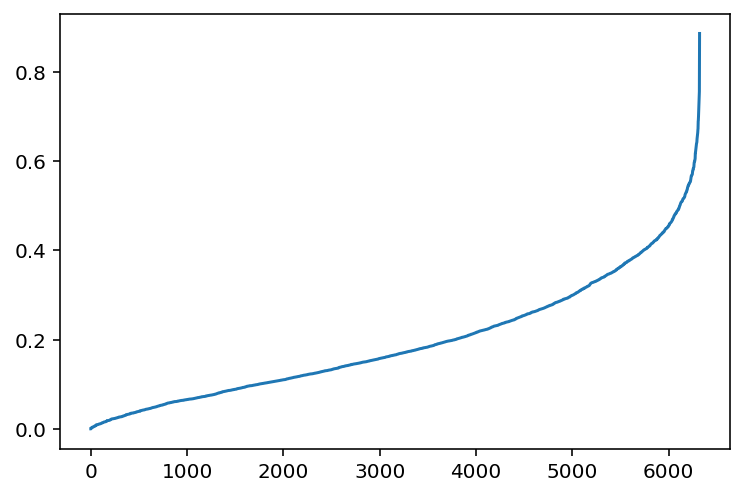

In [19]:
d2.minibatch_kmean(6)
d2.minibatch_kmeans_classification(2)
d2.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.4

[-1  3  3 ...  2  2  2]
DBscan silhoutte score for espislon =  0.4  : 0.09336668479879259
DBI score for espislon =  0.4  : 1.6957338601616787
[ 0 -1  1 ...  1  1  0]
DBscan silhoutte score for espislon =  0.4  : 0.05099258776390038
DBscan DBI score for espislon =  0.4  : 1.7288866067464346
DBscan fowlkes score on train data for espislon =  0.4   : 0.47027064830672166
DBscan fowlkes score on test data for espislon =  0.4   : 0.4761260168344573
DBscan ARI score on train data for espislon =  0.4   : 0.017541863741468856
DBscan ARI score on test data for espislon =  0.4   : -0.07447719617094066
DBscan Mutual Information score on train data for espislon =  0.4   : 0.13882461315632144
DBscan Mutual Information on test data for espislon =  0.4   : 0.07953957891862493
DBscan V-measure score on train data for espislon =  0.4   : 0.16034906714881525
DBscan V-measure score on test data for espislon =  0.4   : 0.09458546580544173
DBscan Homogeneity score on train data for espislon =  0.4   : 0.410

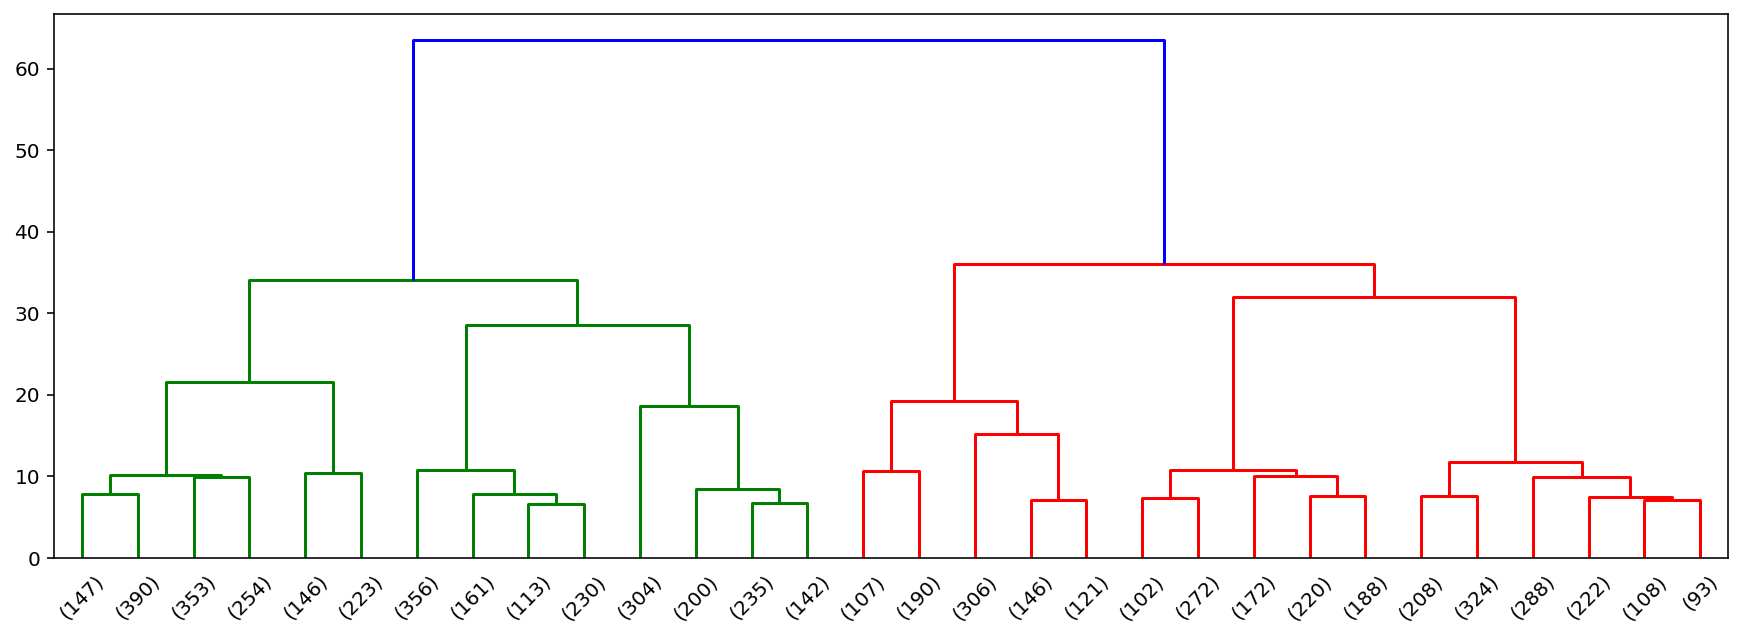

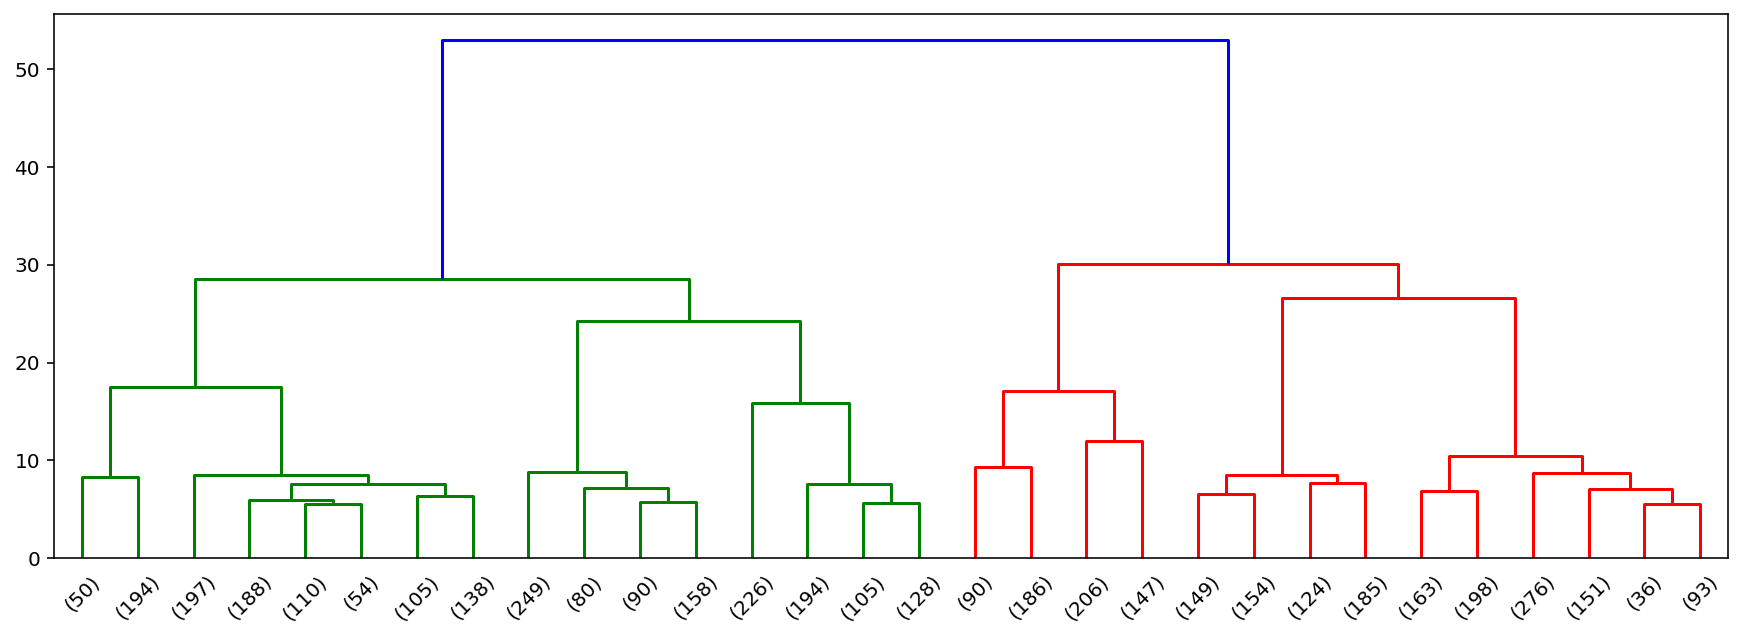

In [20]:
d2.dbscan(0.4)

d2.dbscan_clustering(0.4)

d2.agglomerative(6)

d2.agglomerative_classification(2)

d2.optics()

d2.optics_clustering()

d2.MeanShift()
d2.MeanShift_clustering()

In [21]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   

   Homogeneity  
0     0.007695  
1     0.000676

In [22]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062

In [23]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   

   Homogeneity  
0     0.007780  
1     0.000889

In [24]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  V-measure  \
0     -0.014021  1.402789  0.542066 -0.088732            0.038287   0.042965   
1      0.050993  1.728887  0.476126 -0.074477            0.079540   0.094585   

   Homogeneity  
0     0.093292  
1     0.231514

In [25]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   

   Homogeneity  
0     0.044889  
1     0.003369

In [26]:
df_ms_classification_test

silhoutte_ms    dbi_ms   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.215053  1.508793  0.758382  0.044211            0.005948   0.012755   
1      0.228778  1.666236  0.620450  0.114783            0.109393   0.158336   

   Homogeneity  
0     0.014492  
1     0.318407

# 3rd Dataset

(3309, 14)
Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')
page 2 (clothing model)
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (3309, 224)
Shape of y : (3309,)
kmeans  2  : 0.13395742452234494
kmeans  3  : 0.09103725176244995
kmeans  4  : 0.07708613209700112
kmeans  5  : 0.08093992575901715
kmeans  6  : 0.07769736522764384
kmeans  7  : 0.09035757757722217
kmeans  8  : 0.09045749933976337
kmeans  9  : 0.08400541732870738
kmeans  10  : 0.10037575793675786


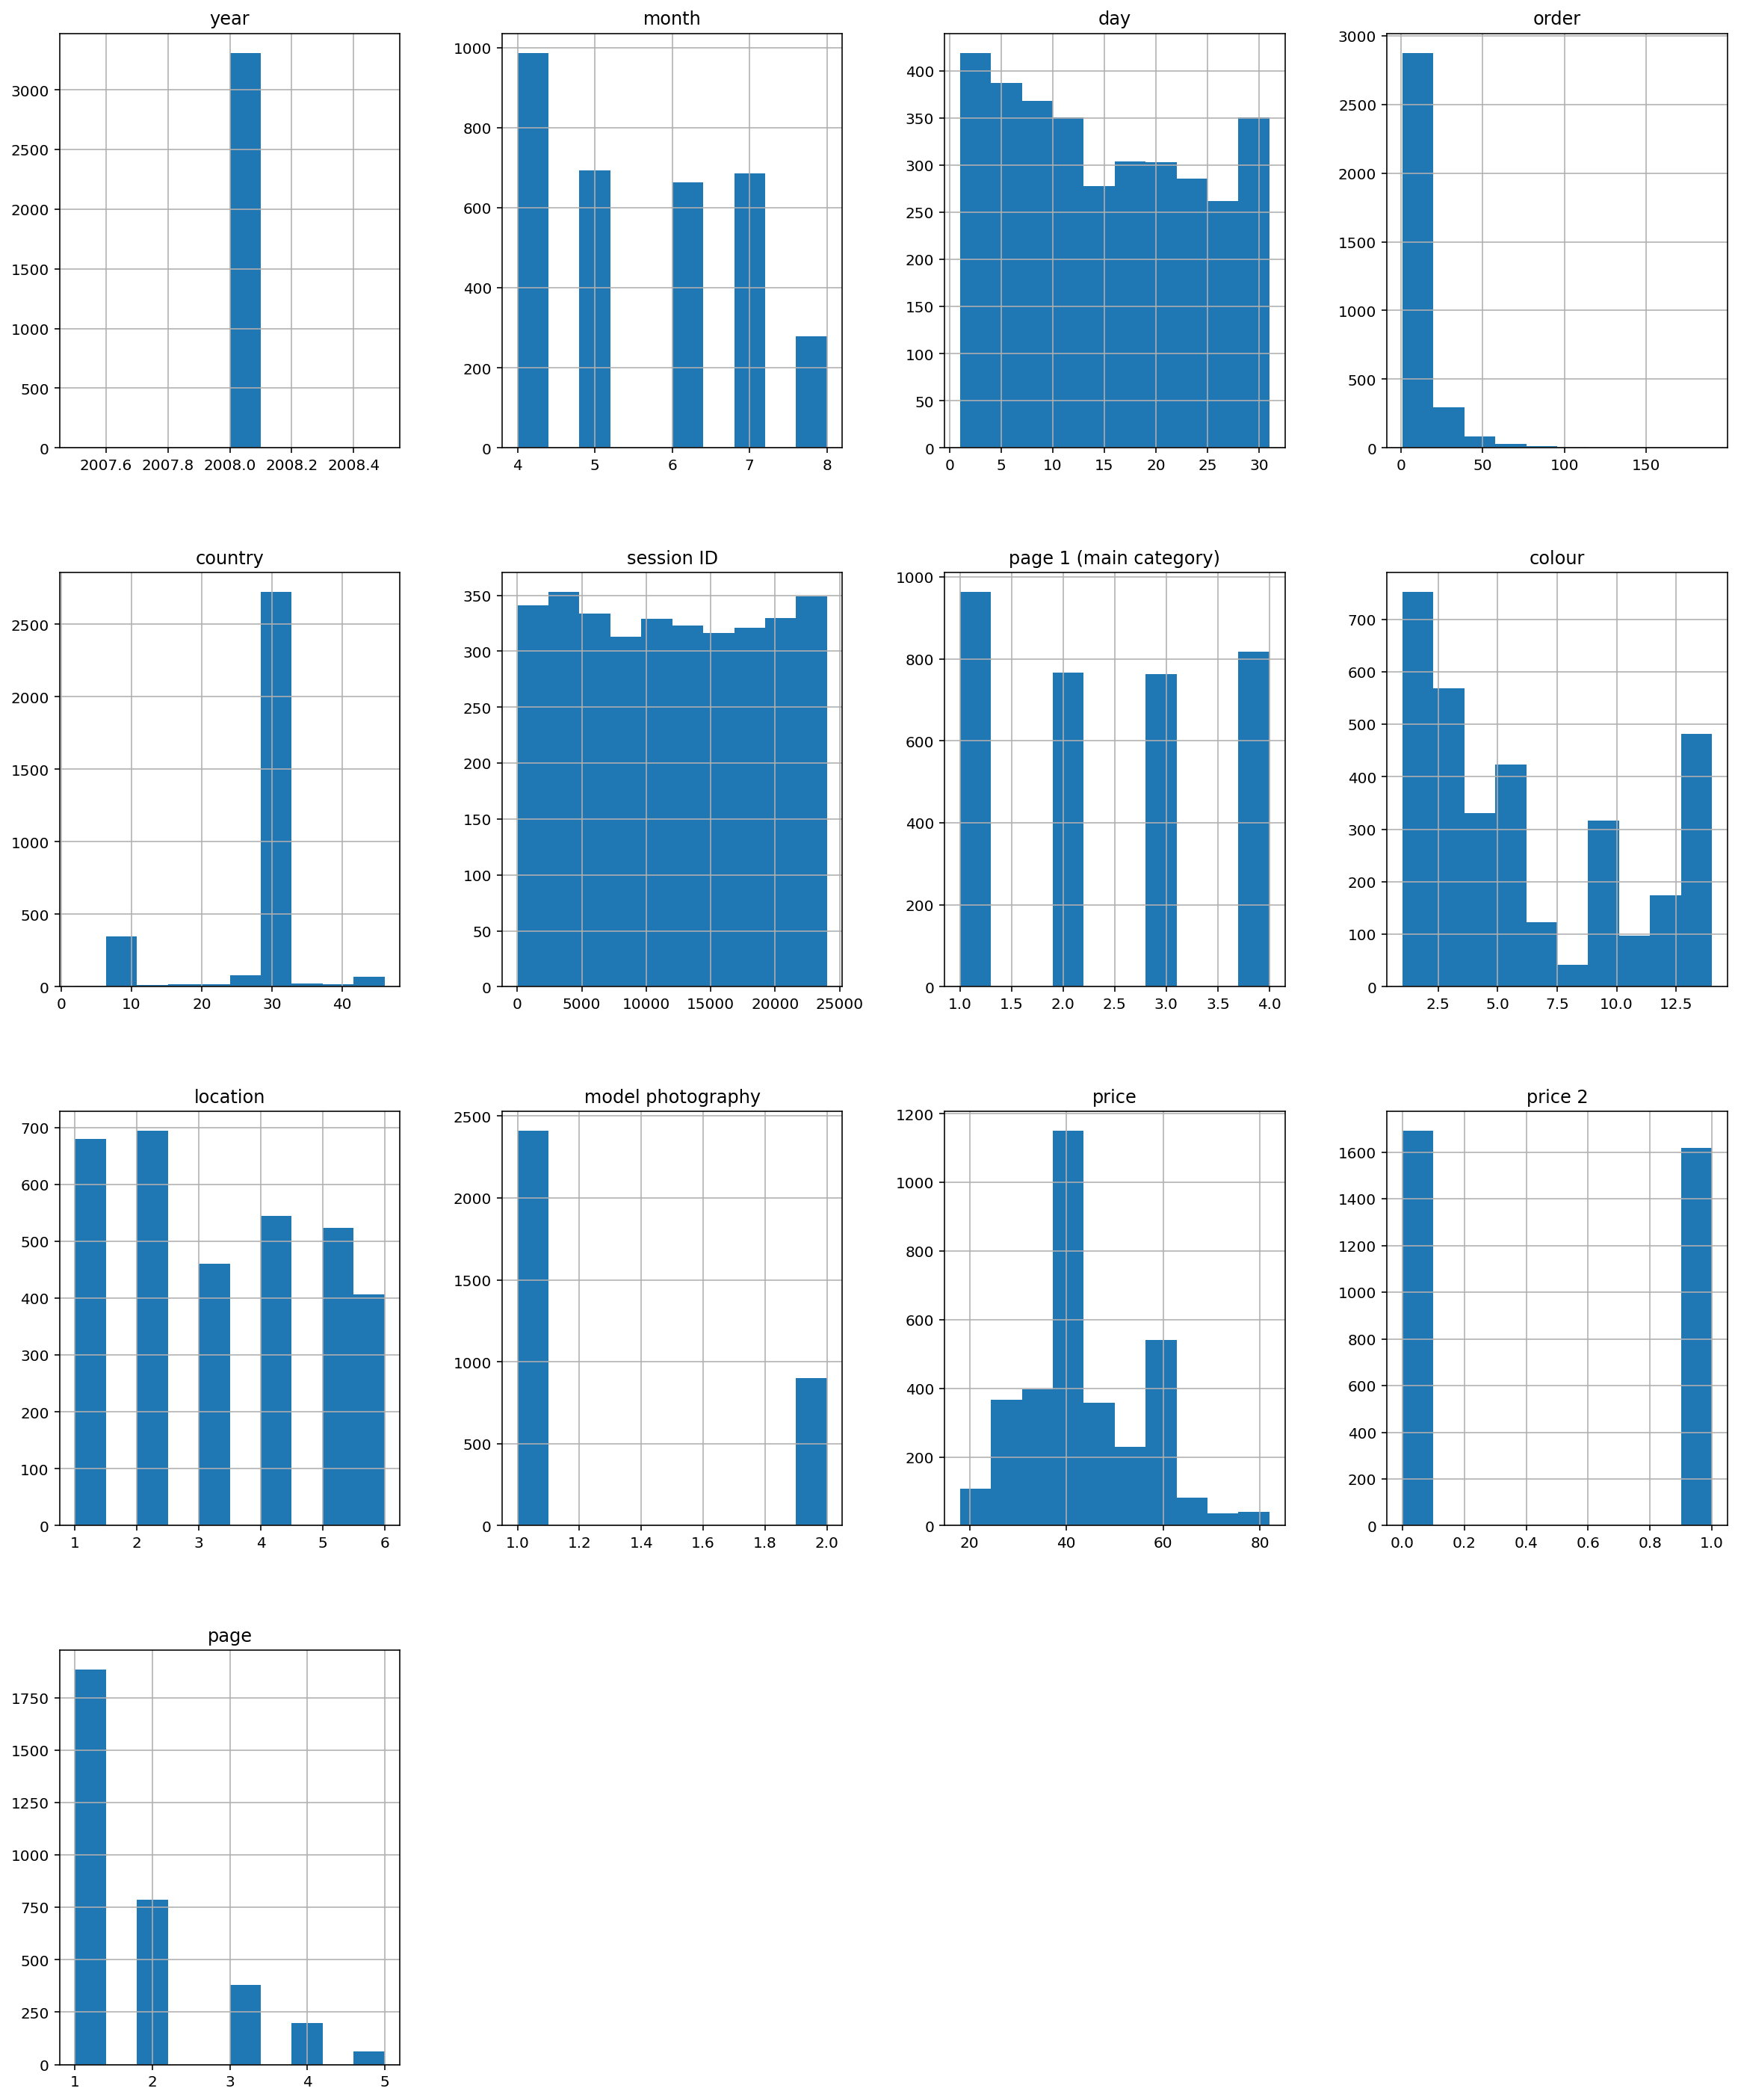

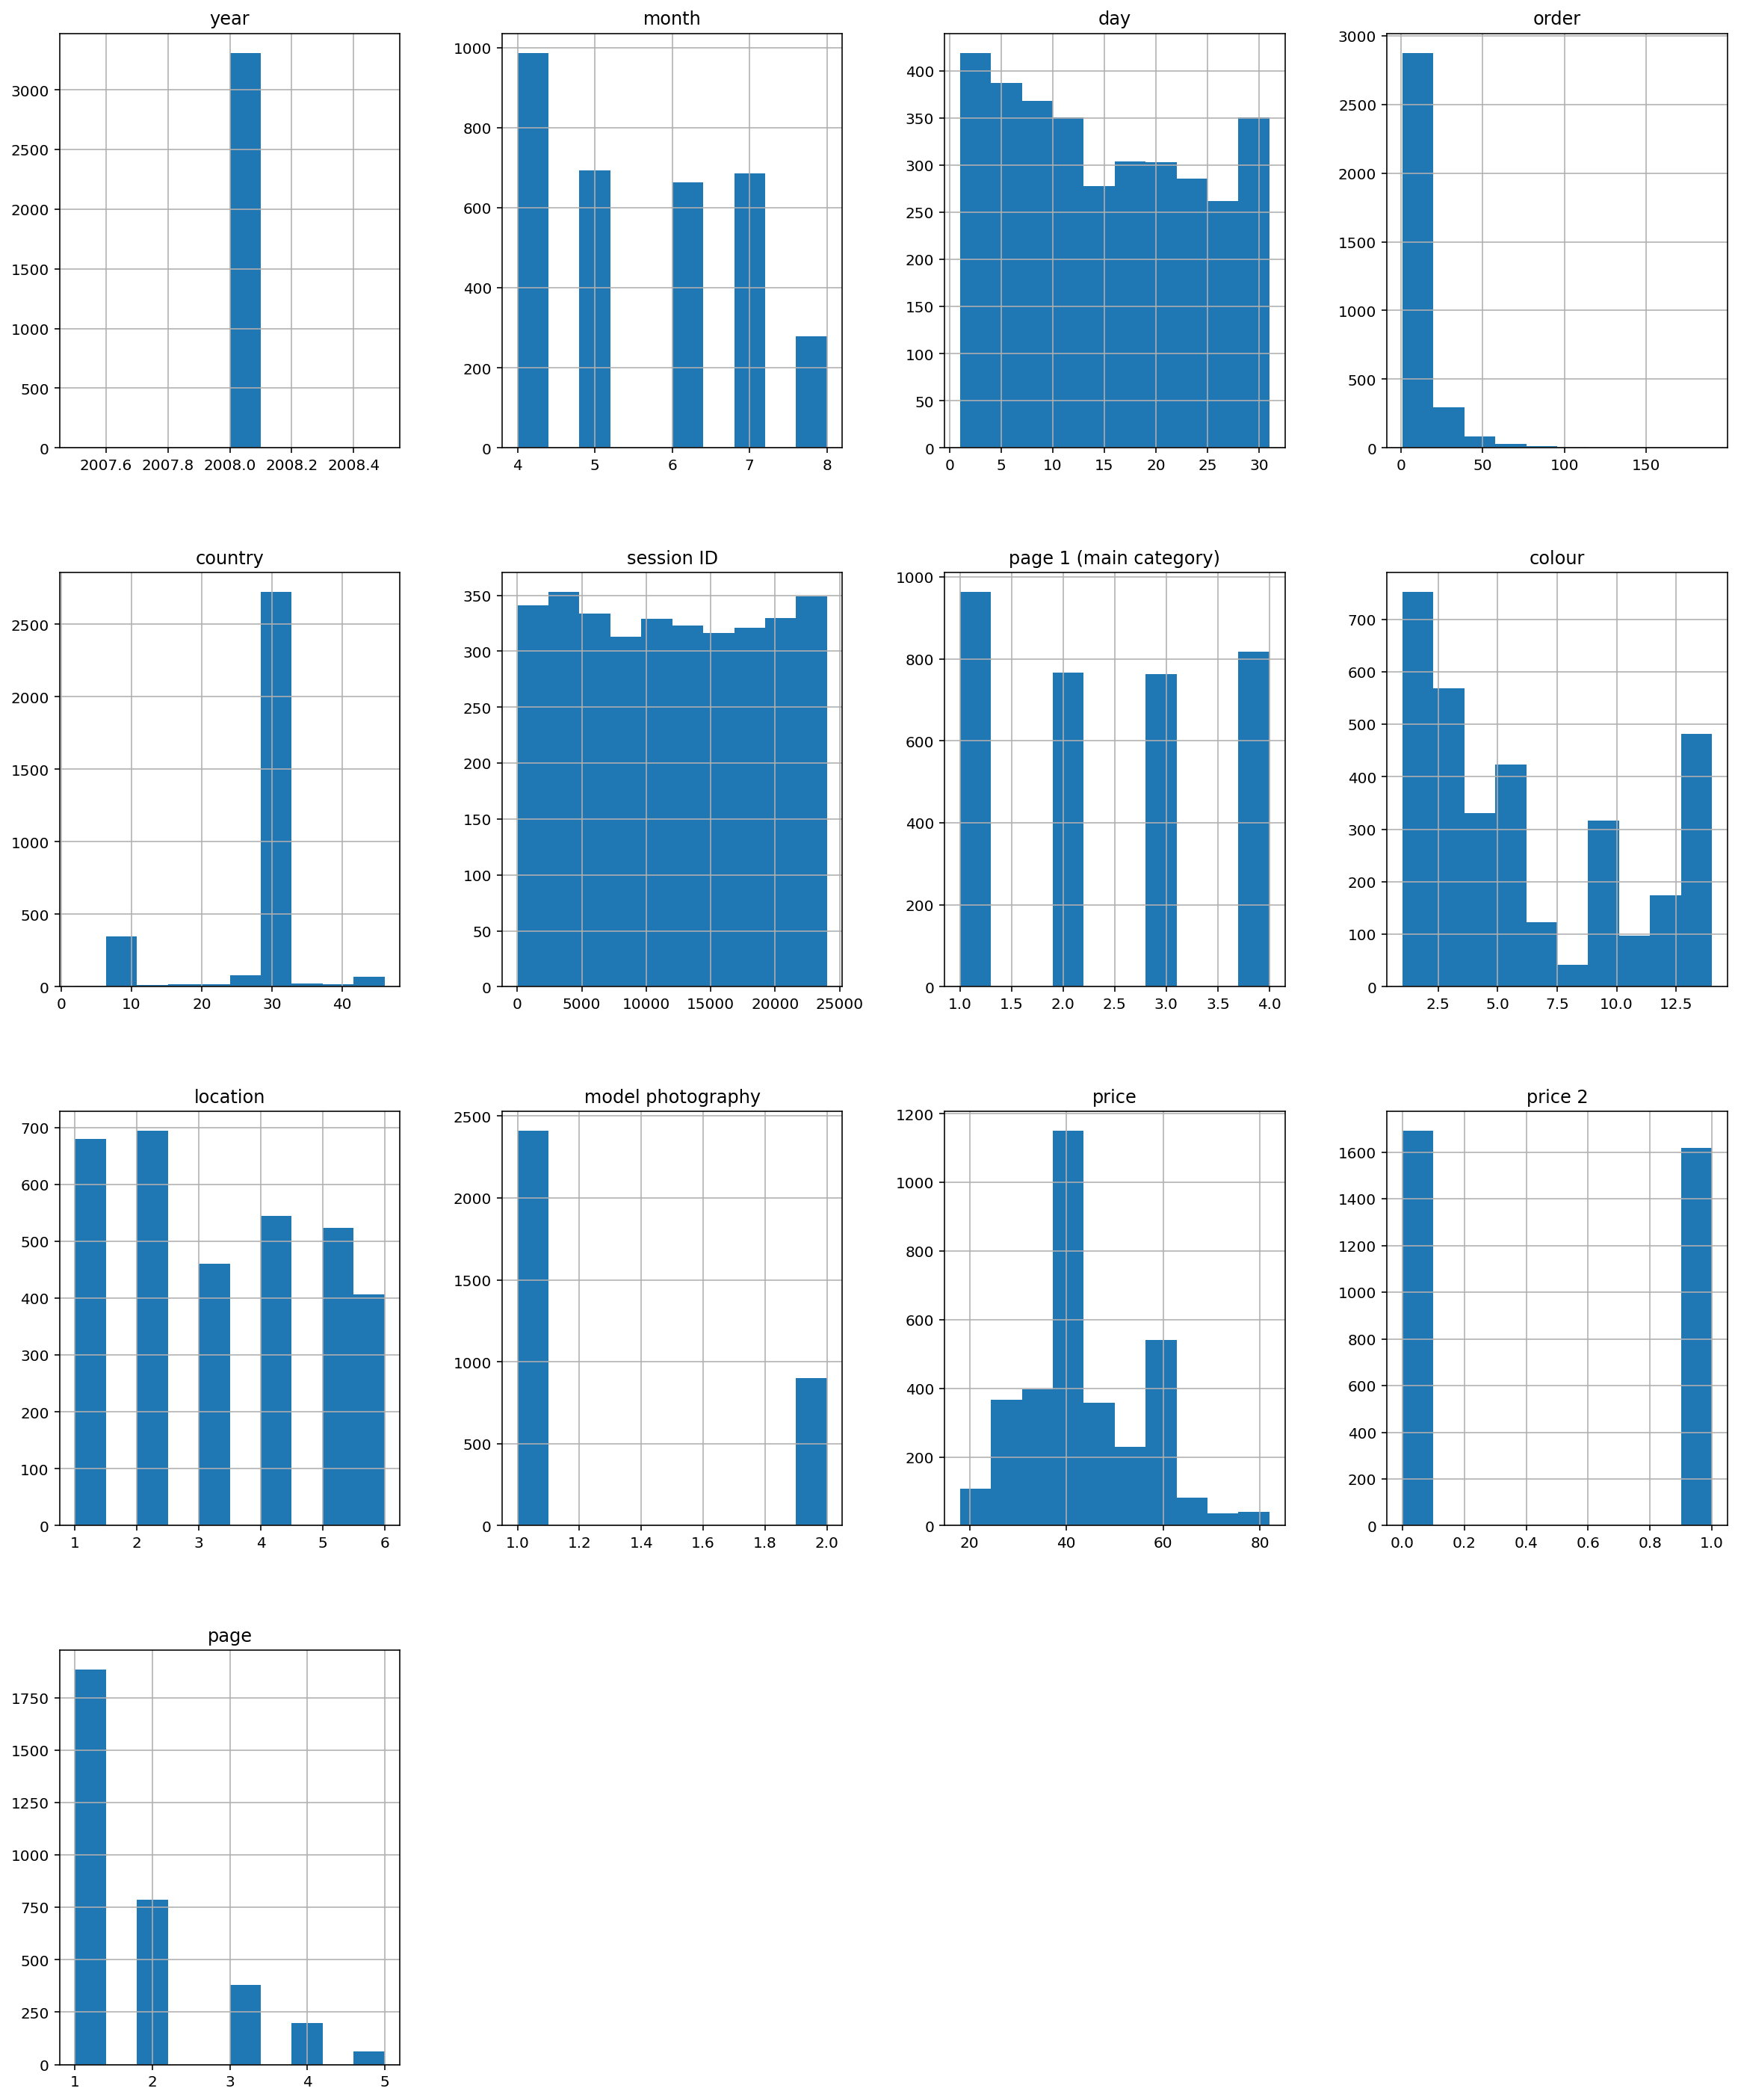

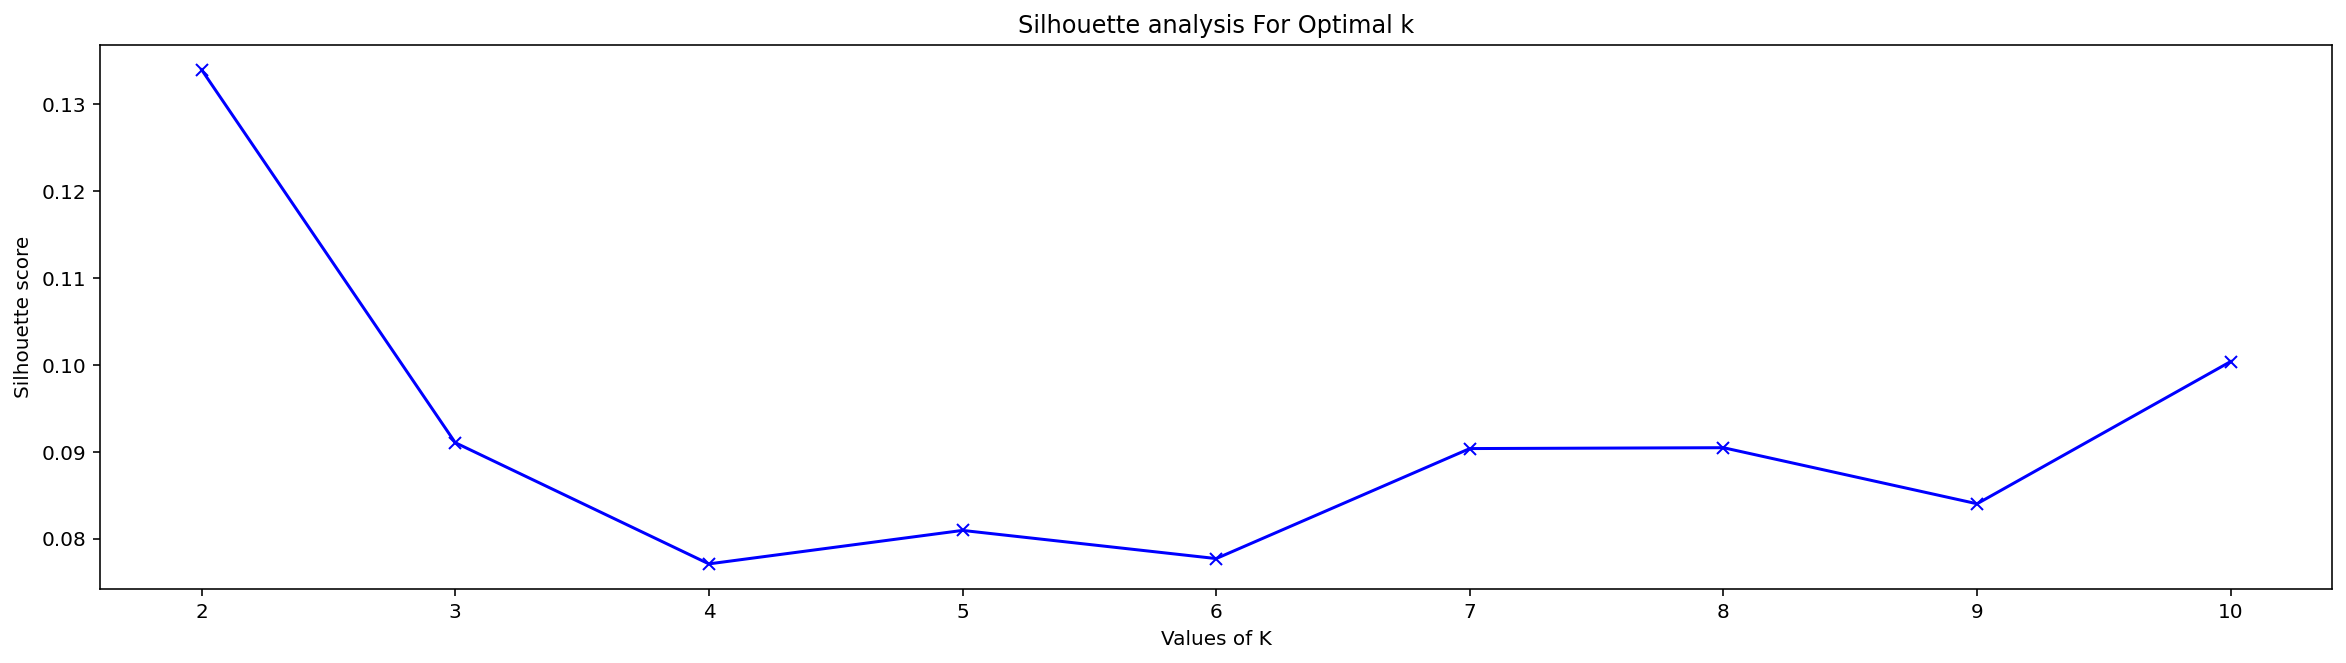

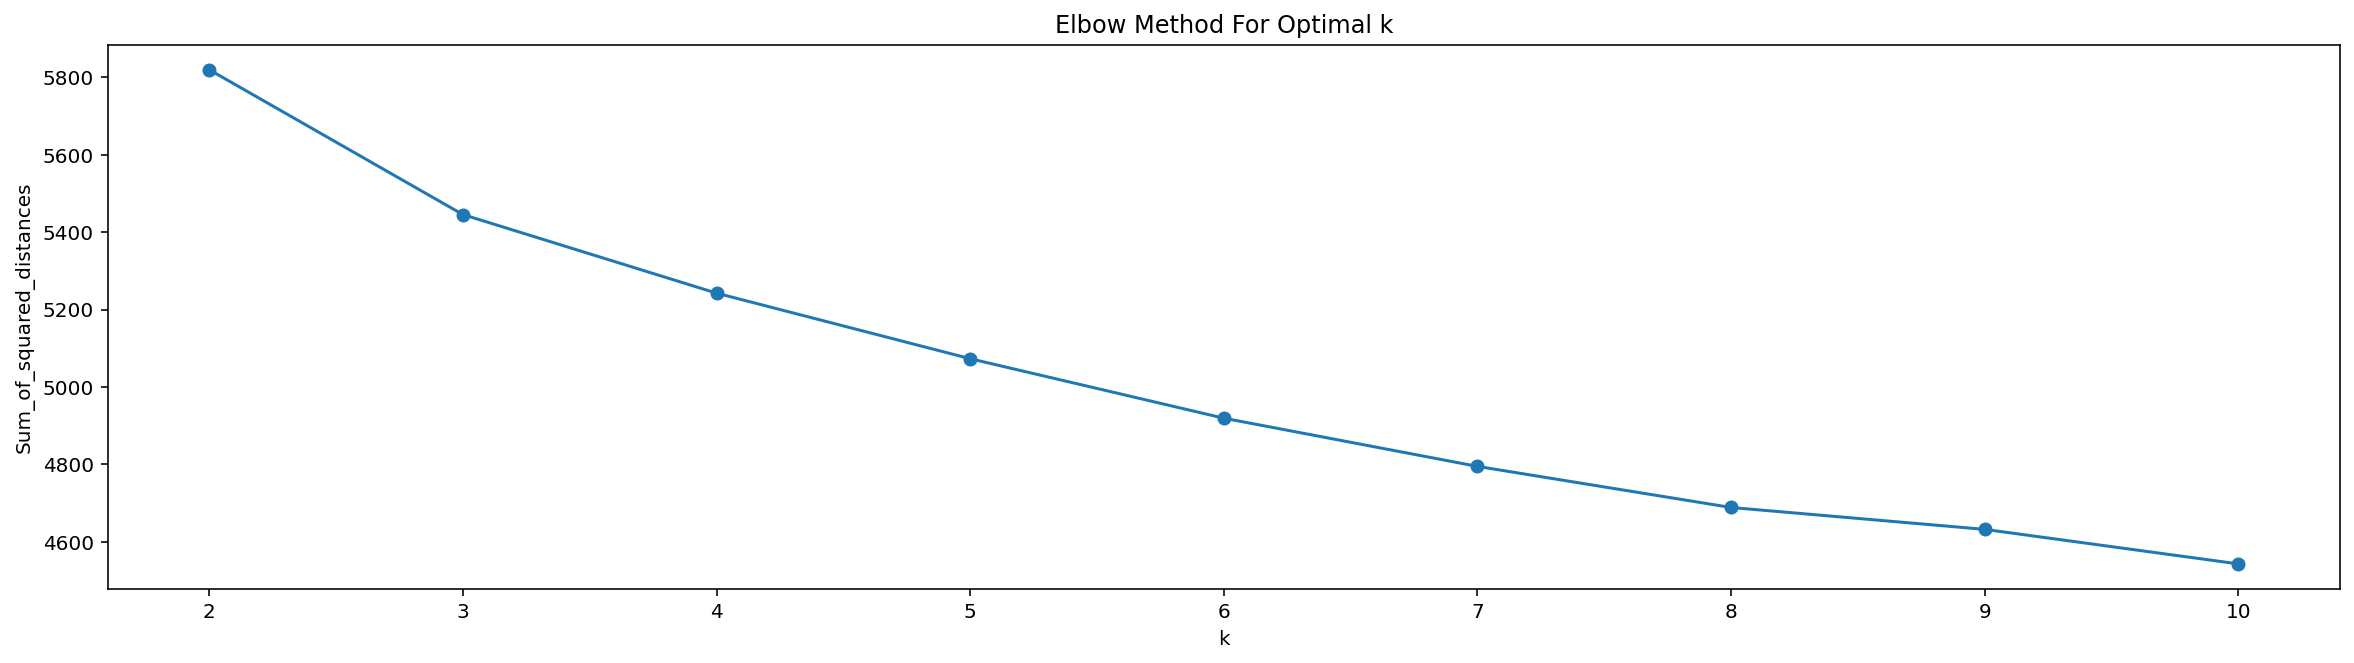

In [27]:
d3 = dataset('e-shop clothing 2008-5.csv')
d3.data_preprocessing()
d3.normalization_scaling()

d3.make_X('price 2')

# d3.make_X('Class')

d3.Kmeans_find()


### For kmeans 5 clusters seems best observing the knee point on curves

centres of cluster [[ 0.00000000e+00  1.07072692e-01  4.52128356e-01 ...  3.25260652e-18
  -2.60208521e-18  6.50521303e-18]
 [ 0.00000000e+00  6.75309598e-01  4.41434469e-01 ...  3.68628739e-18
  -1.73472348e-18  7.37257477e-18]
 [ 0.00000000e+00  1.02715877e-01  4.70241411e-01 ...  3.90312782e-18
   0.00000000e+00  7.80625564e-18]
 [ 0.00000000e+00  3.99166667e-01  4.44925926e-01 ...  6.66666667e-03
   1.88888889e-02  1.33333333e-02]
 [ 0.00000000e+00  6.98227612e-01  4.59639303e-01 ...  3.46944695e-18
  -2.60208521e-18  6.93889390e-18]]
kmeans silhoutte score for  5  : 0.06897655757383027
kmeans DBI score for k =  5  : 2.9557193976343927
centres of cluster [[ 0.00000000e+00  4.05600000e-01  4.47040000e-01  5.66857143e-02
   5.80472727e-01  5.08464453e-01  6.00000000e-01  4.56984615e-01
   4.87680000e-01  1.00000000e+00  3.41950000e-01  2.82800000e-01
   8.67361738e-18  1.38777878e-17  1.73472348e-17  1.38777878e-17
  -6.93889390e-18 -6.93889390e-18  5.44000000e-02  8.67361738e-18
   

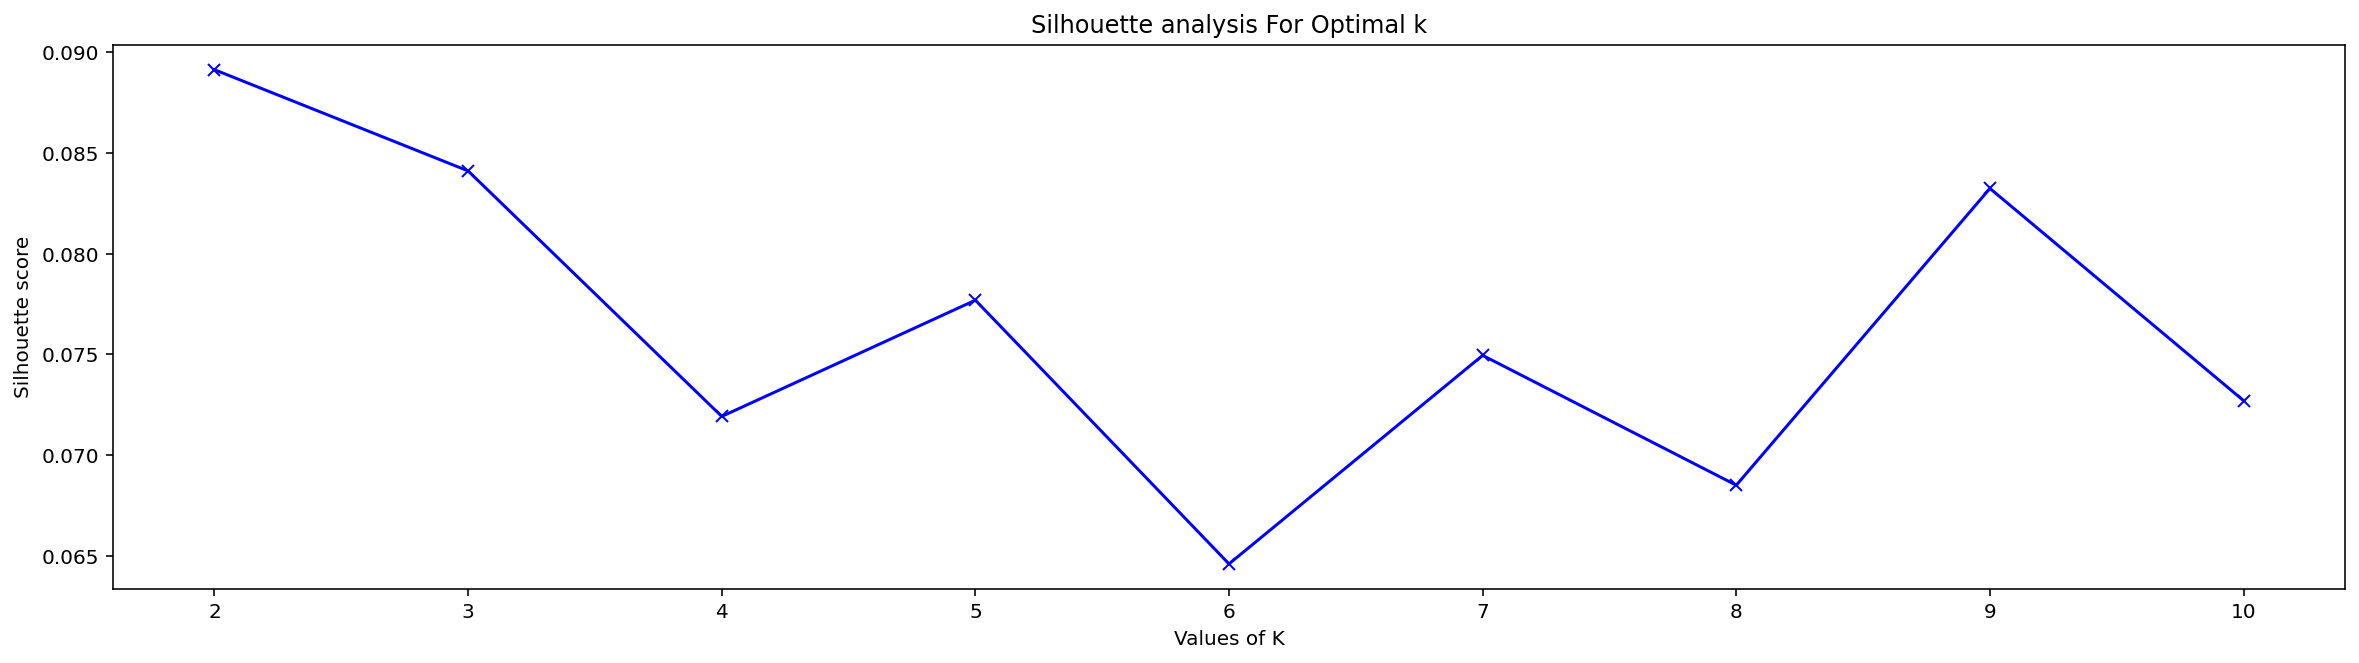

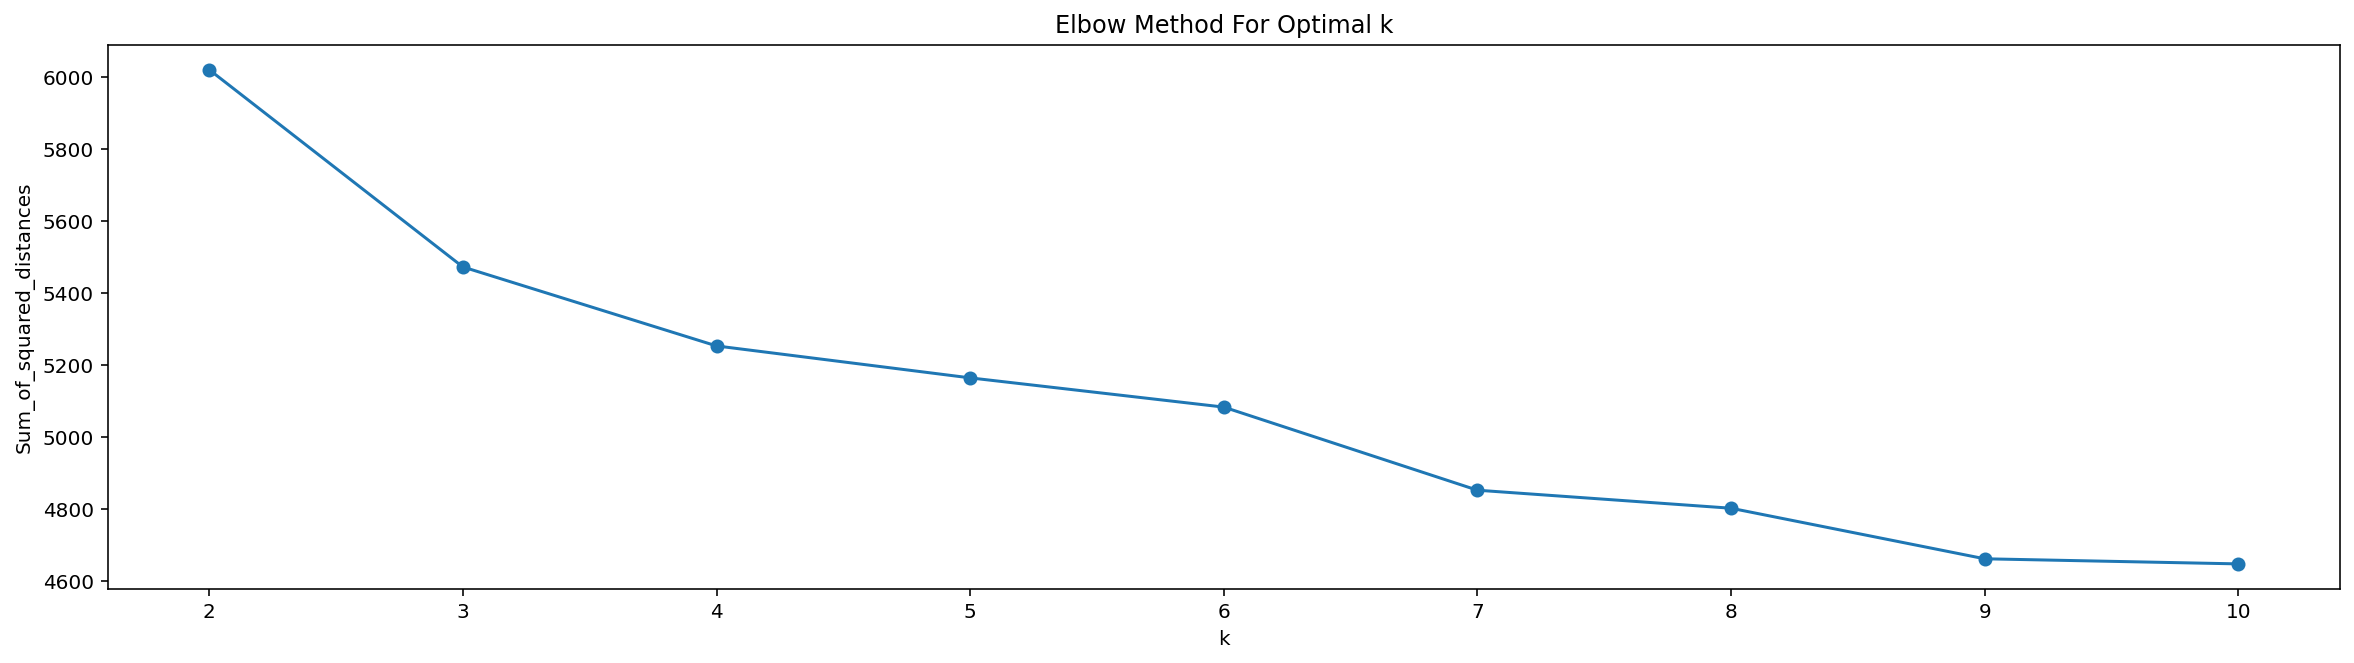

In [28]:
d3.kmean(5)
d3.kmeans_classification(2)
# d3.df1_knn
d3.minibatch_Kmeans_find()

### for Minibatch Kmeans 7 clusters look good observing the knee points of curve

Centere of clusters [[0.00000000e+00 3.26676010e-01 5.51639025e-01 ... 0.00000000e+00
  0.00000000e+00 2.33590283e-04]
 [0.00000000e+00 3.81028472e-01 4.31716057e-01 ... 0.00000000e+00
  0.00000000e+00 2.55665311e-02]
 [0.00000000e+00 5.19153226e-02 3.19833669e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.14038877e-01 4.68466523e-01 ... 2.46220302e-02
  5.26997840e-02 0.00000000e+00]
 [0.00000000e+00 6.76425506e-01 3.91089311e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.53706327e-01 5.43964432e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Mini Batch kmeans silhoutte score for  6  : 0.06803323153215352
Mini Batch kmeans DBI score for k =  6  : 3.149463509323981
Centere of clusters [[0.00000000e+00 3.97022587e-01 4.45660507e-01 5.51307541e-02
  5.77898077e-01 5.00480333e-01 5.98767967e-01 4.59232349e-01
  4.95318275e-01 9.97330595e-01 3.39434677e-01 2.85882957e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

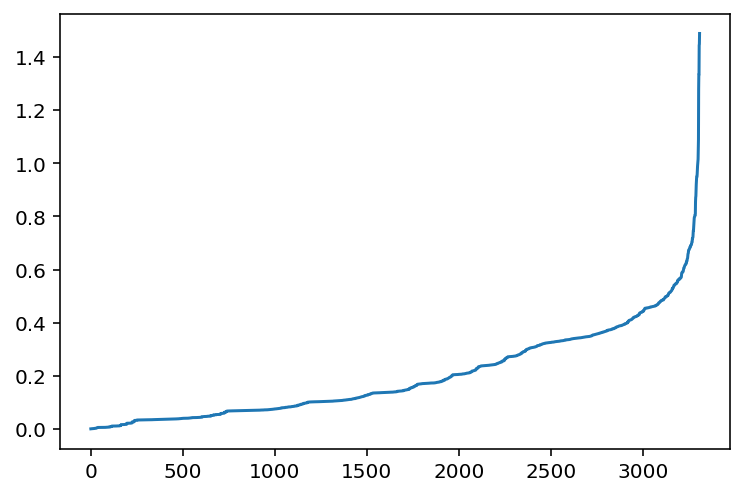

In [29]:
d3.minibatch_kmean(6)
d3.minibatch_kmeans_classification(2)
d3.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.4

[-1 -1 -1 ... -1 -1 -1]
DBscan silhoutte score for espislon =  0.37  : -0.09537806730884336
DBI score for espislon =  0.37  : 1.2967428603472435
[-1 -1 -1 ... -1 -1 -1]
DBscan silhoutte score for espislon =  0.37  : -0.0795615096907088
DBscan DBI score for espislon =  0.37  : 1.4177977988246395
DBscan fowlkes score on train data for espislon =  0.37   : 0.6932734839477303
DBscan fowlkes score on test data for espislon =  0.37   : 0.7069746873751255
DBscan ARI score on train data for espislon =  0.37   : -0.0004470570240005027
DBscan ARI score on test data for espislon =  0.37   : 0.0
DBscan Mutual Information score on train data for espislon =  0.37   : 0.013253954960922104
DBscan Mutual Information on test data for espislon =  0.37   : 9.43689570931383e-16
DBscan V-measure score on train data for espislon =  0.37   : 0.03307739741275498
DBscan V-measure score on test data for espislon =  0.37   : 2.724158201890246e-15
DBscan Homogeneity score on train data for espislon =  0.37   : 0.0

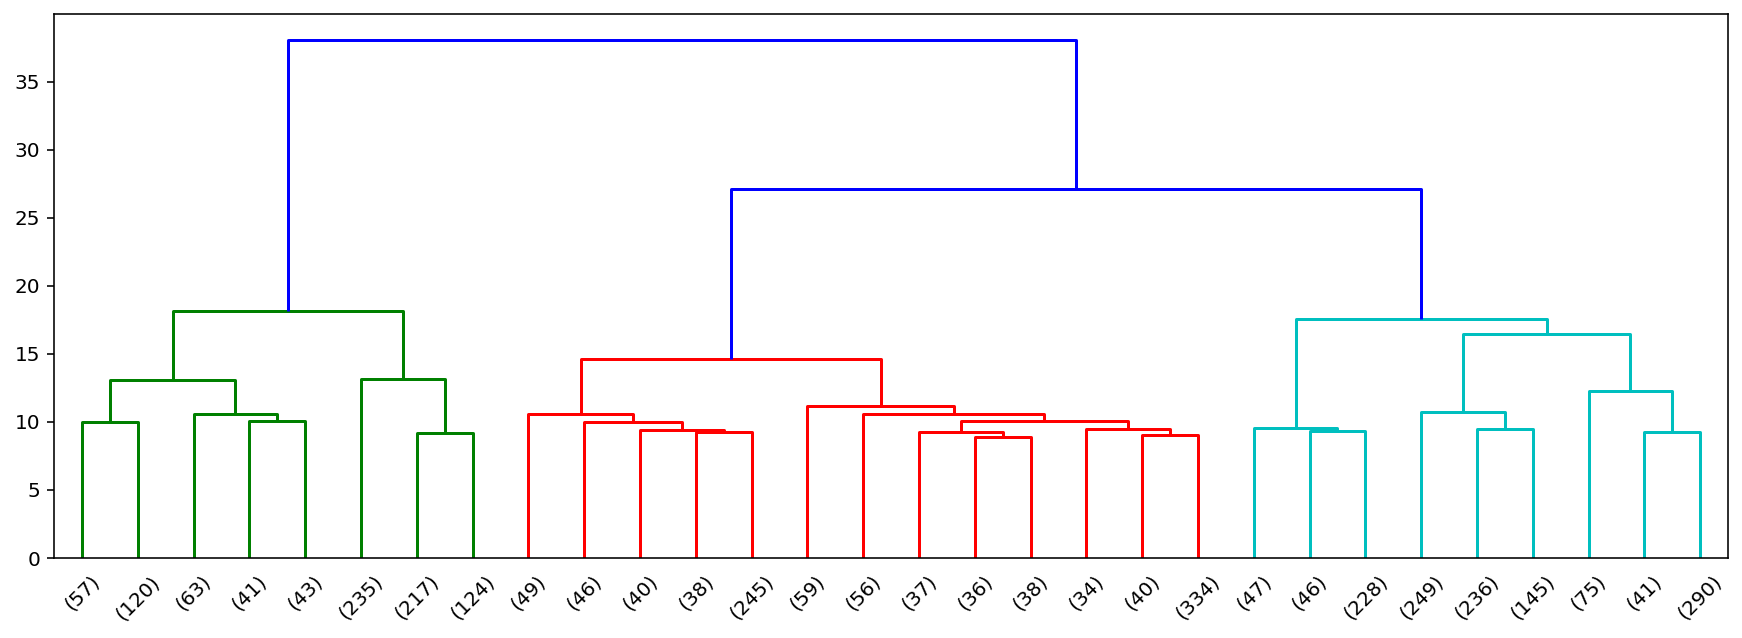

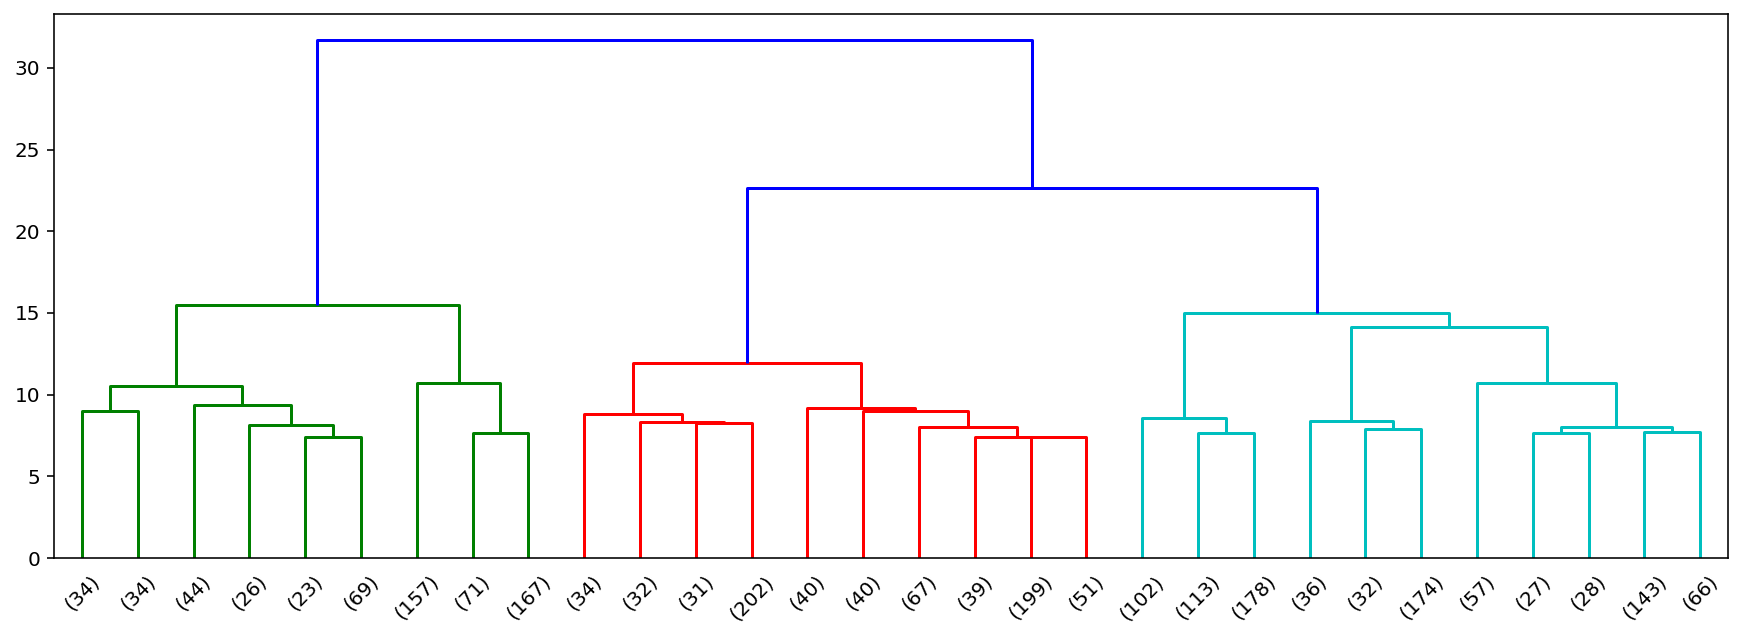

In [30]:
d3.dbscan(0.37)

d3.dbscan_clustering(0.37)

d3.agglomerative(6)

d3.agglomerative_classification(2)

d3.optics()

d3.optics_clustering()

d3.MeanShift()
d3.MeanShift_clustering()

In [31]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852

In [32]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852

In [33]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852

In [34]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15

In [35]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750

In [36]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15

# 4th Dataset

(2000, 12)
Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Age', 'BMI', 'Sex', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (2000, 11)
Shape of y : (2000,)
kmeans  2  : 0.17691609335915573
kmeans  3  : 0.1619130045954486
kmeans  4  : 0.17479910437493226
kmeans  5  : 0.1634482637347125
kmeans  6  : 0.1878663515695797
kmeans  7  : 0.18936488730797743
kmeans  8  : 0.19640925229162967
kmeans  9  : 0.2001663395349499
kmeans  10  : 0.20212911281964965


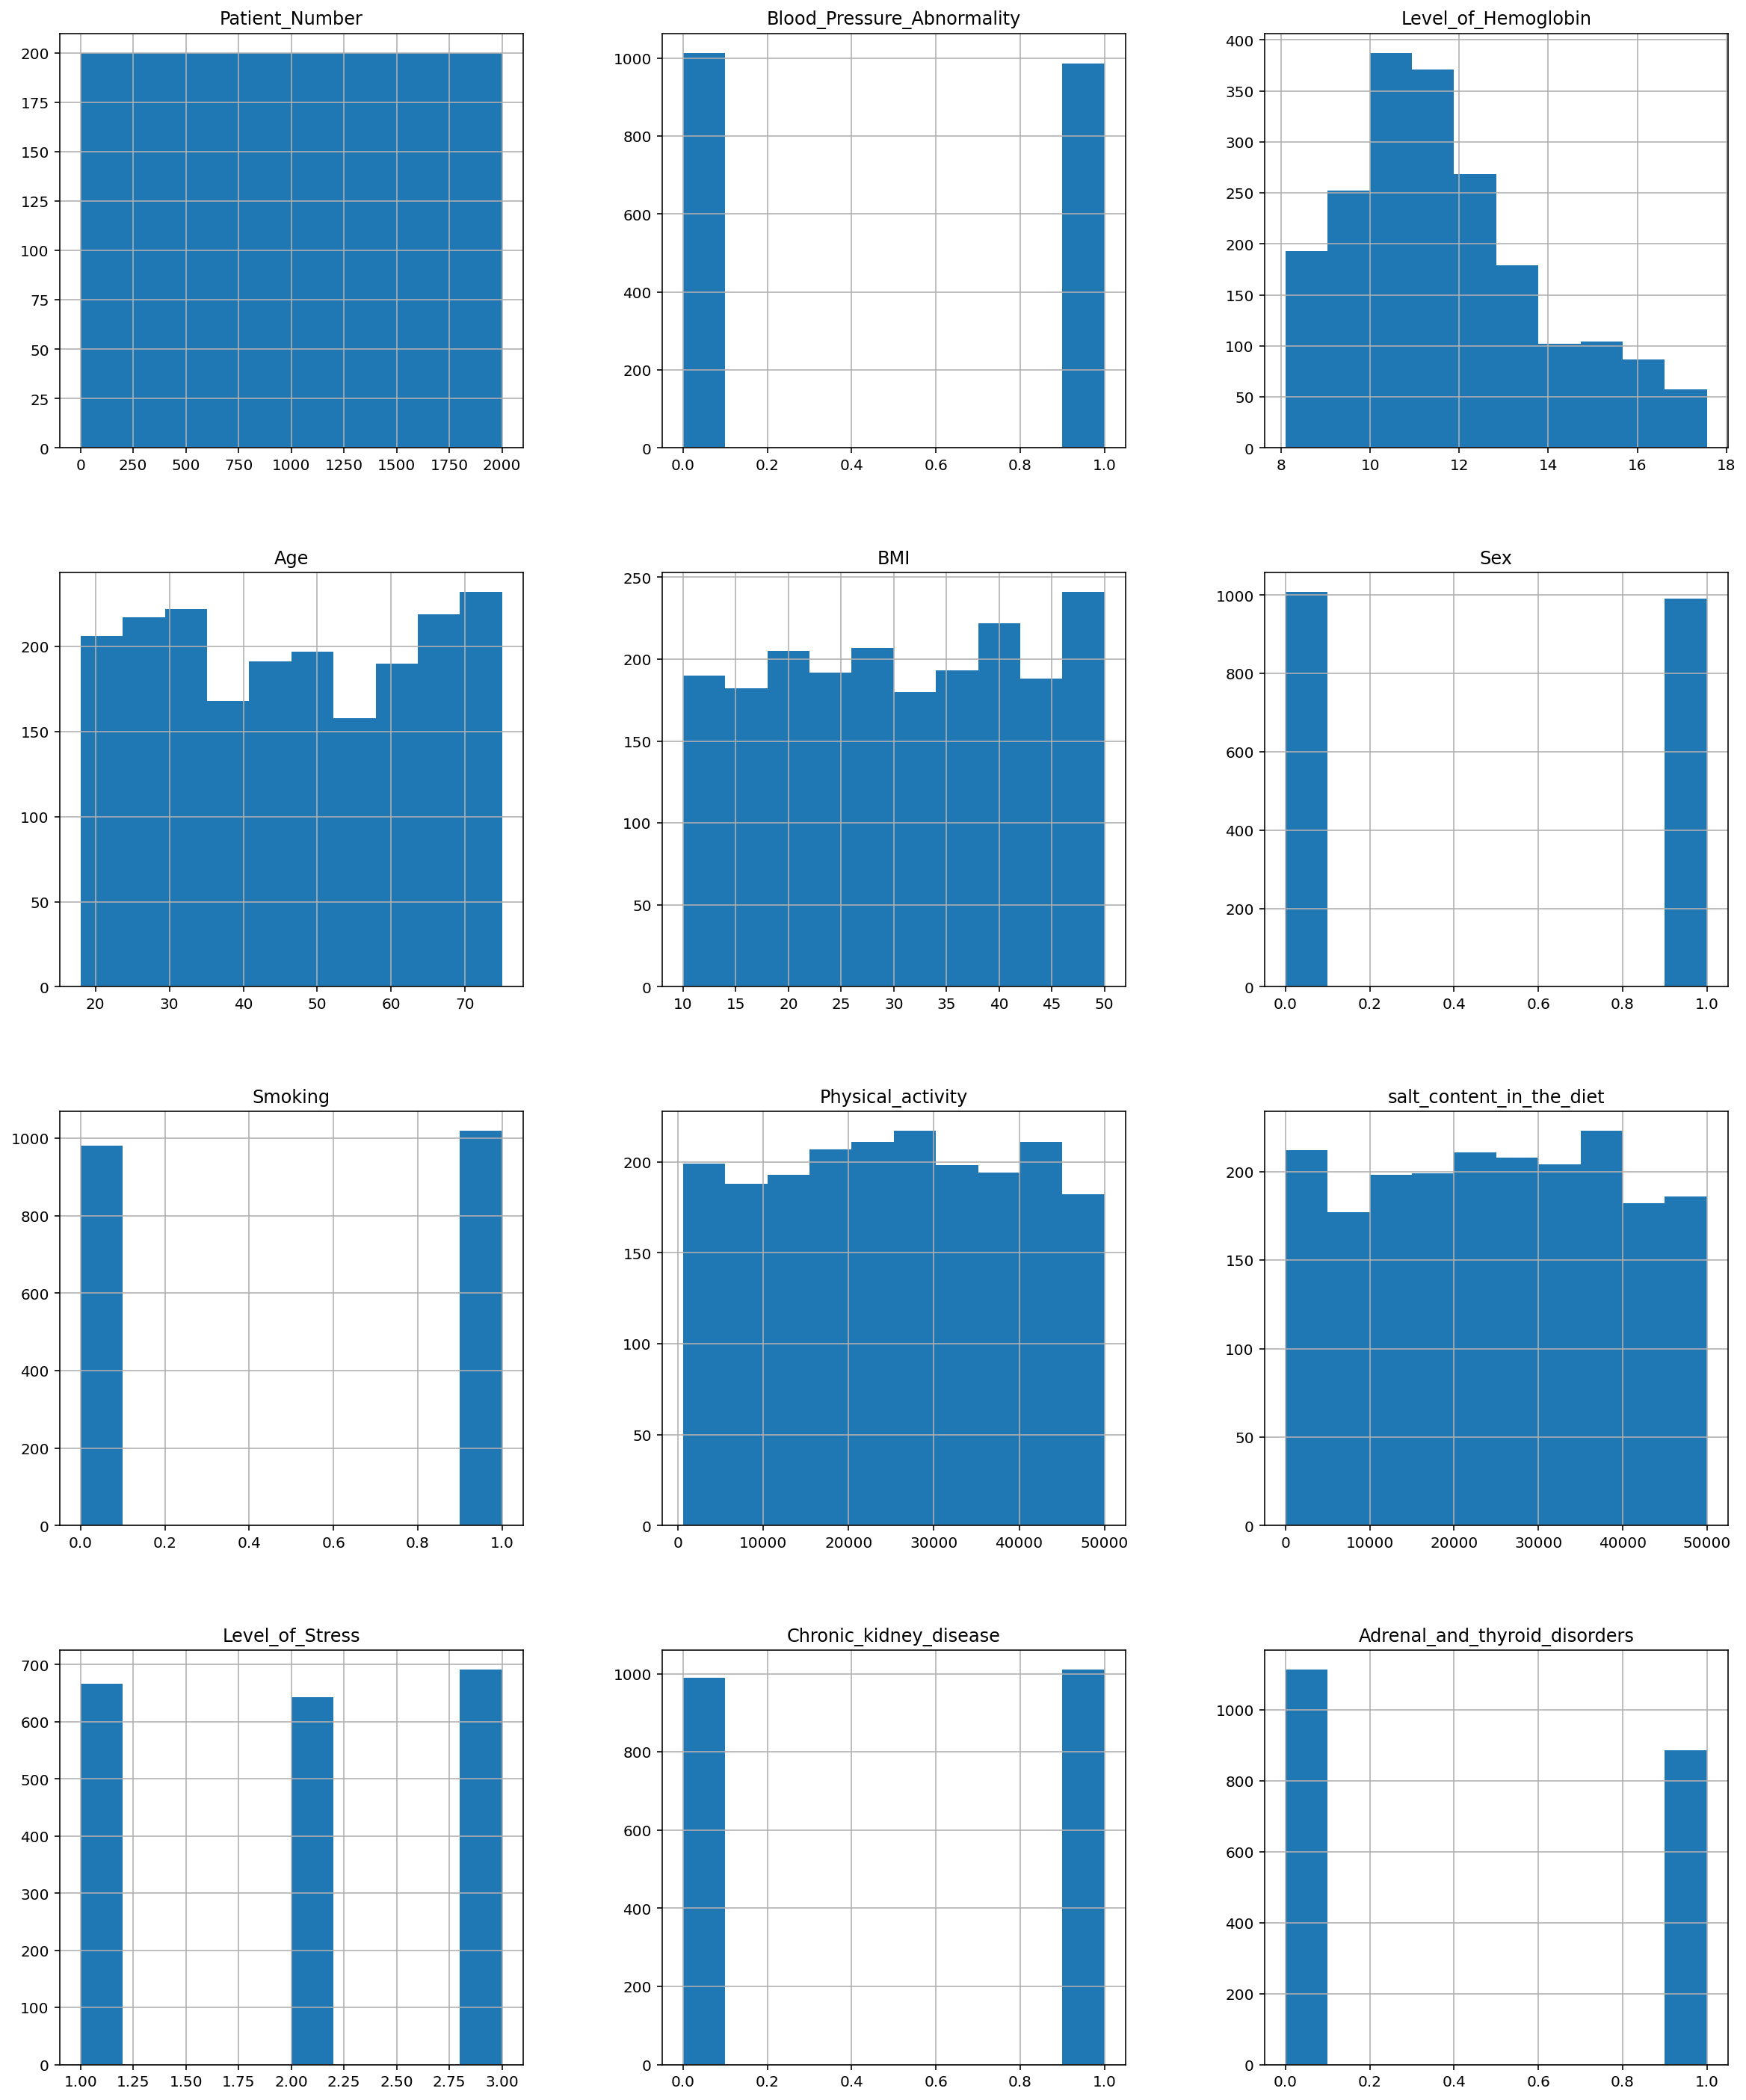

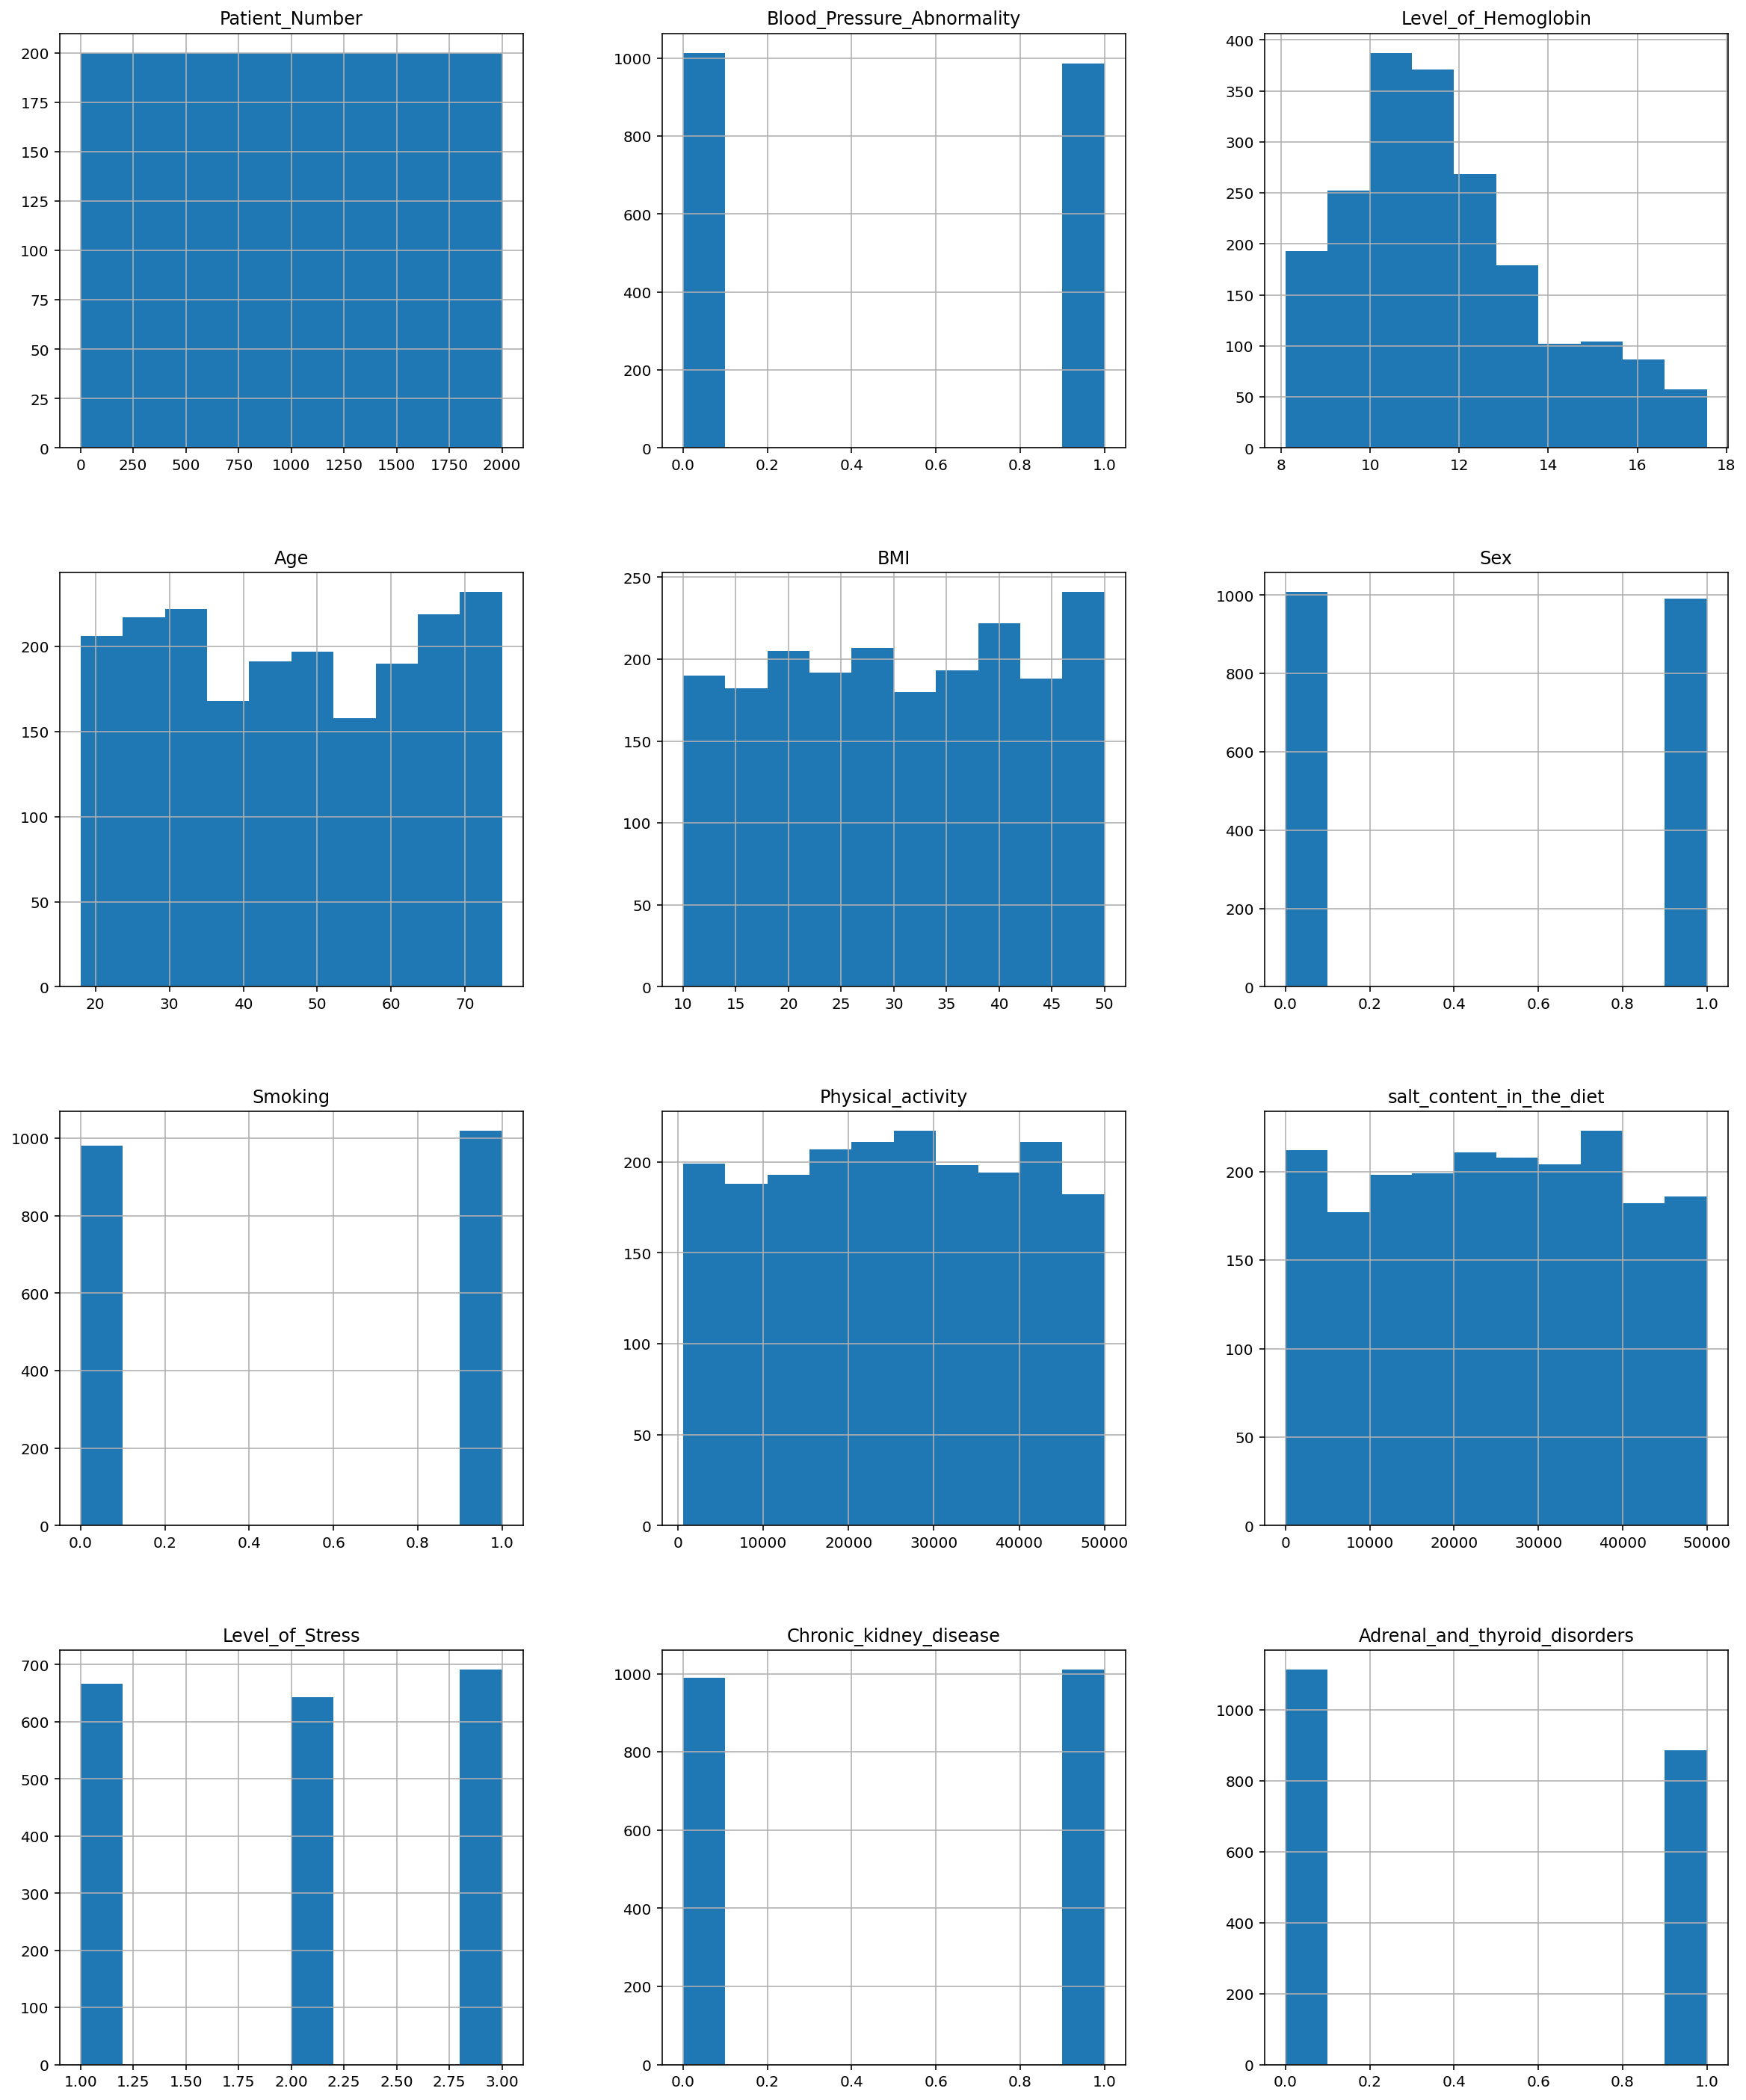

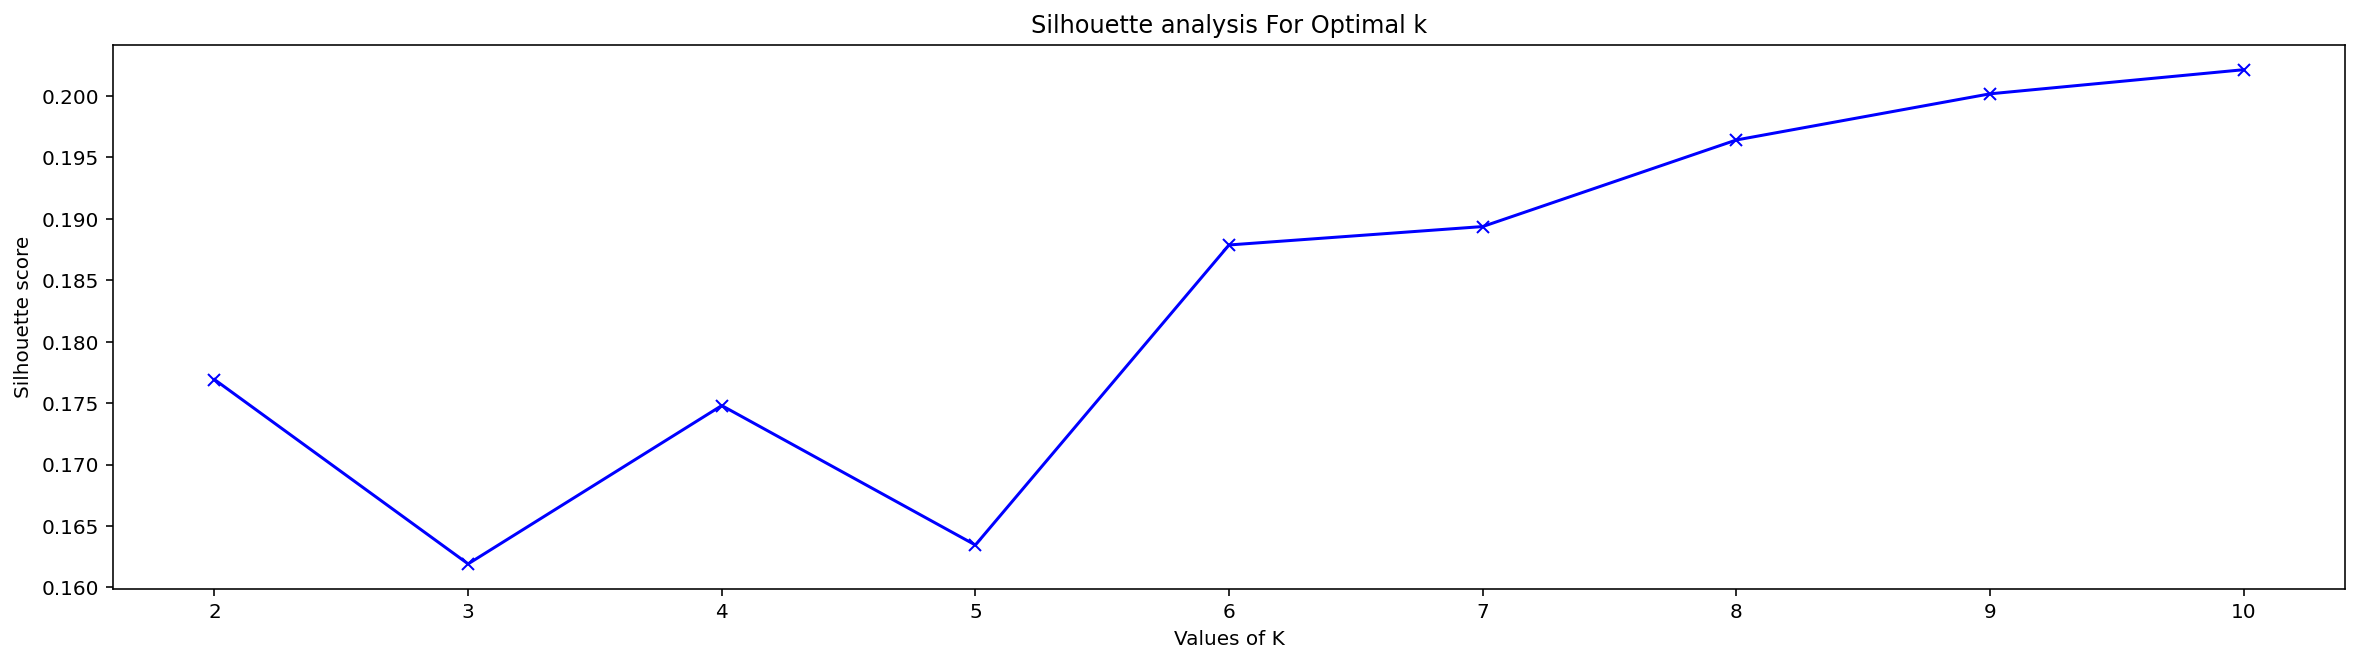

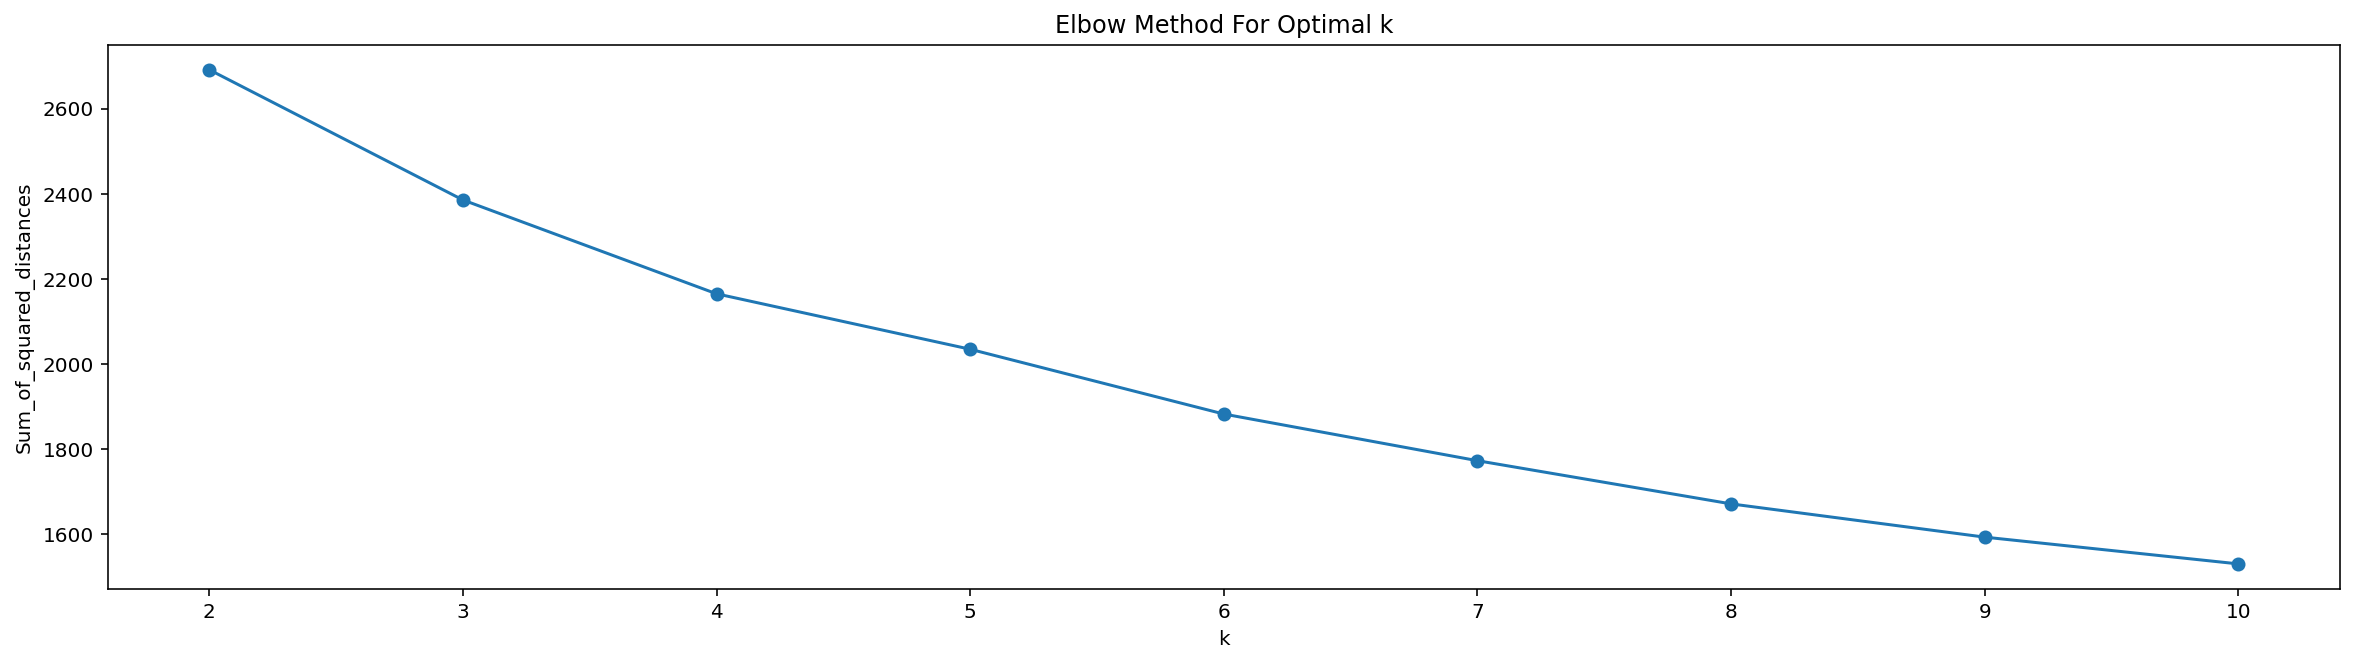

In [37]:
d4 = dataset('Blood_Pressure_data-2.csv')
d4.data_preprocessing()
d4.normalization_scaling()

d4.make_X('Adrenal_and_thyroid_disorders')

# d4.make_X('Class')

d4.Kmeans_find()


### For kmeans 6 clusters seems best observing the knee point on curves

centres of cluster [[ 5.07023329e-01  2.50000000e-01  3.03111948e-01  5.32787762e-01
   5.00990854e-01  1.00000000e+00  1.00000000e+00  4.80986265e-01
   5.00864576e-01  4.93902439e-01  2.04268293e-01]
 [ 4.85847911e-01 -5.55111512e-17  3.86528719e-01  5.24566008e-01
   4.70275591e-01  1.66533454e-16  4.85564304e-01  4.92452526e-01
   4.92051690e-01  5.03937008e-01  1.11022302e-16]
 [ 4.80861236e-01  7.38255034e-01  5.18924614e-01  4.55492759e-01
   5.08976510e-01 -5.55111512e-17  4.44089210e-16  4.99694973e-01
   5.13838235e-01  5.35234899e-01  7.98657718e-01]
 [ 5.13100015e-01  7.59878419e-01  5.41576434e-01  4.62166053e-01
   5.23404255e-01 -5.55111512e-17  1.00000000e+00  5.00505210e-01
   5.00279589e-01  4.81762918e-01  7.84194529e-01]
 [ 5.07953977e-01  2.10344828e-01  2.91802143e-01  5.23351482e-01
   5.17672414e-01  1.00000000e+00  3.33066907e-16  5.01794009e-01
   5.05838613e-01  5.01724138e-01  2.51724138e-01]
 [ 5.05815742e-01  1.00000000e+00  2.64951781e-01  5.02345436e-01


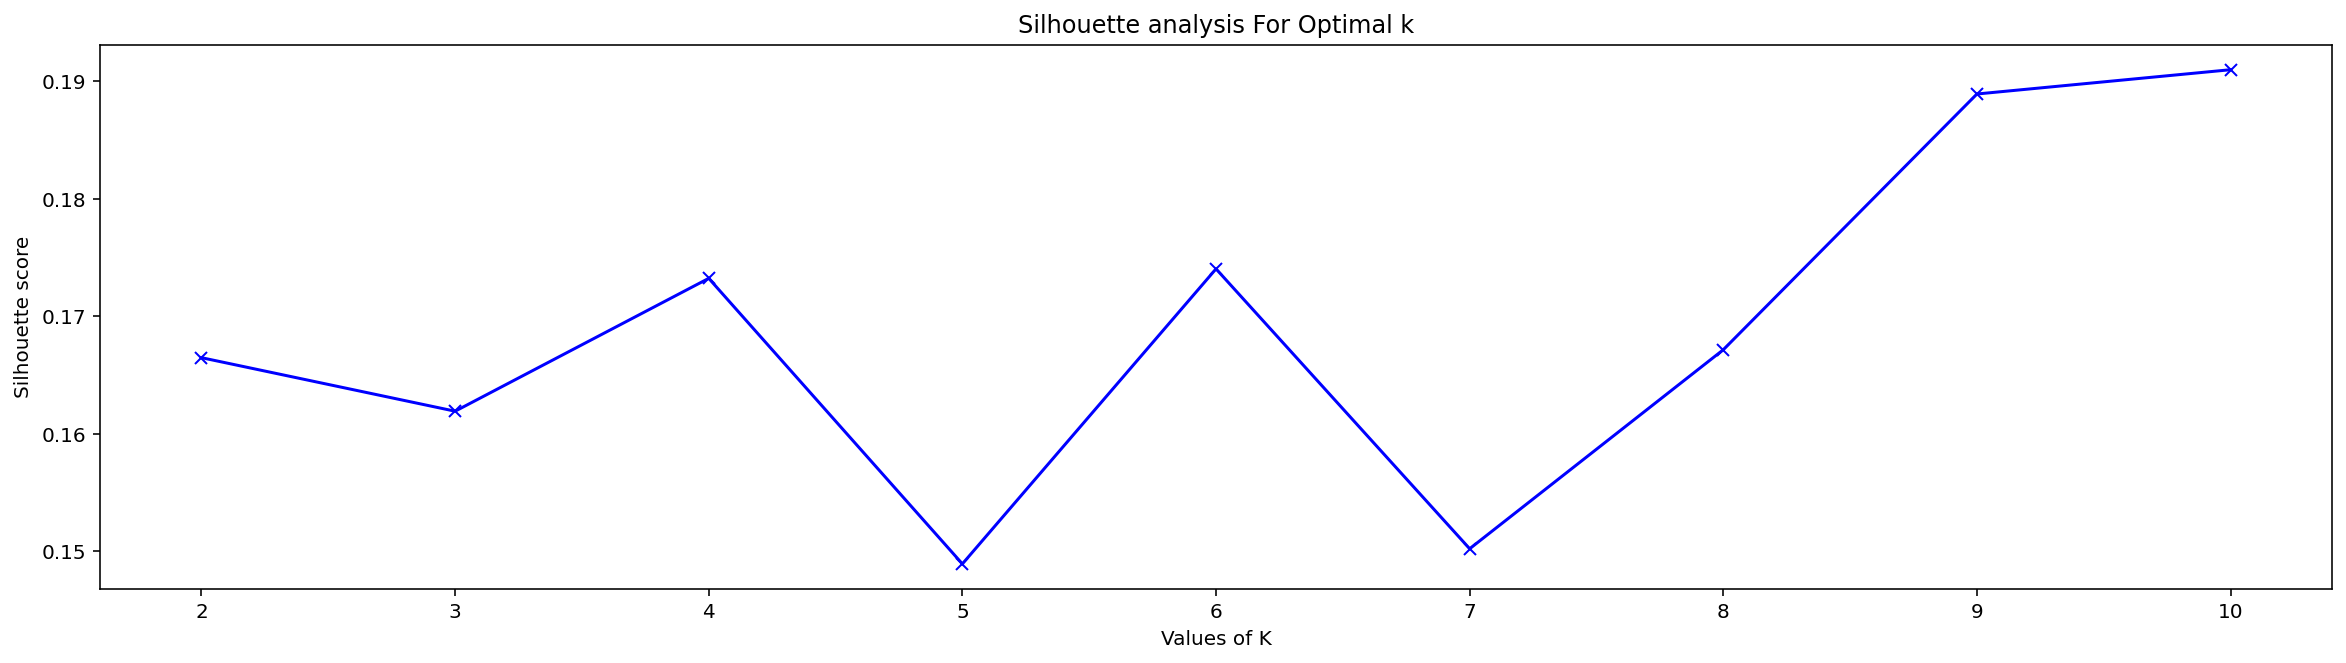

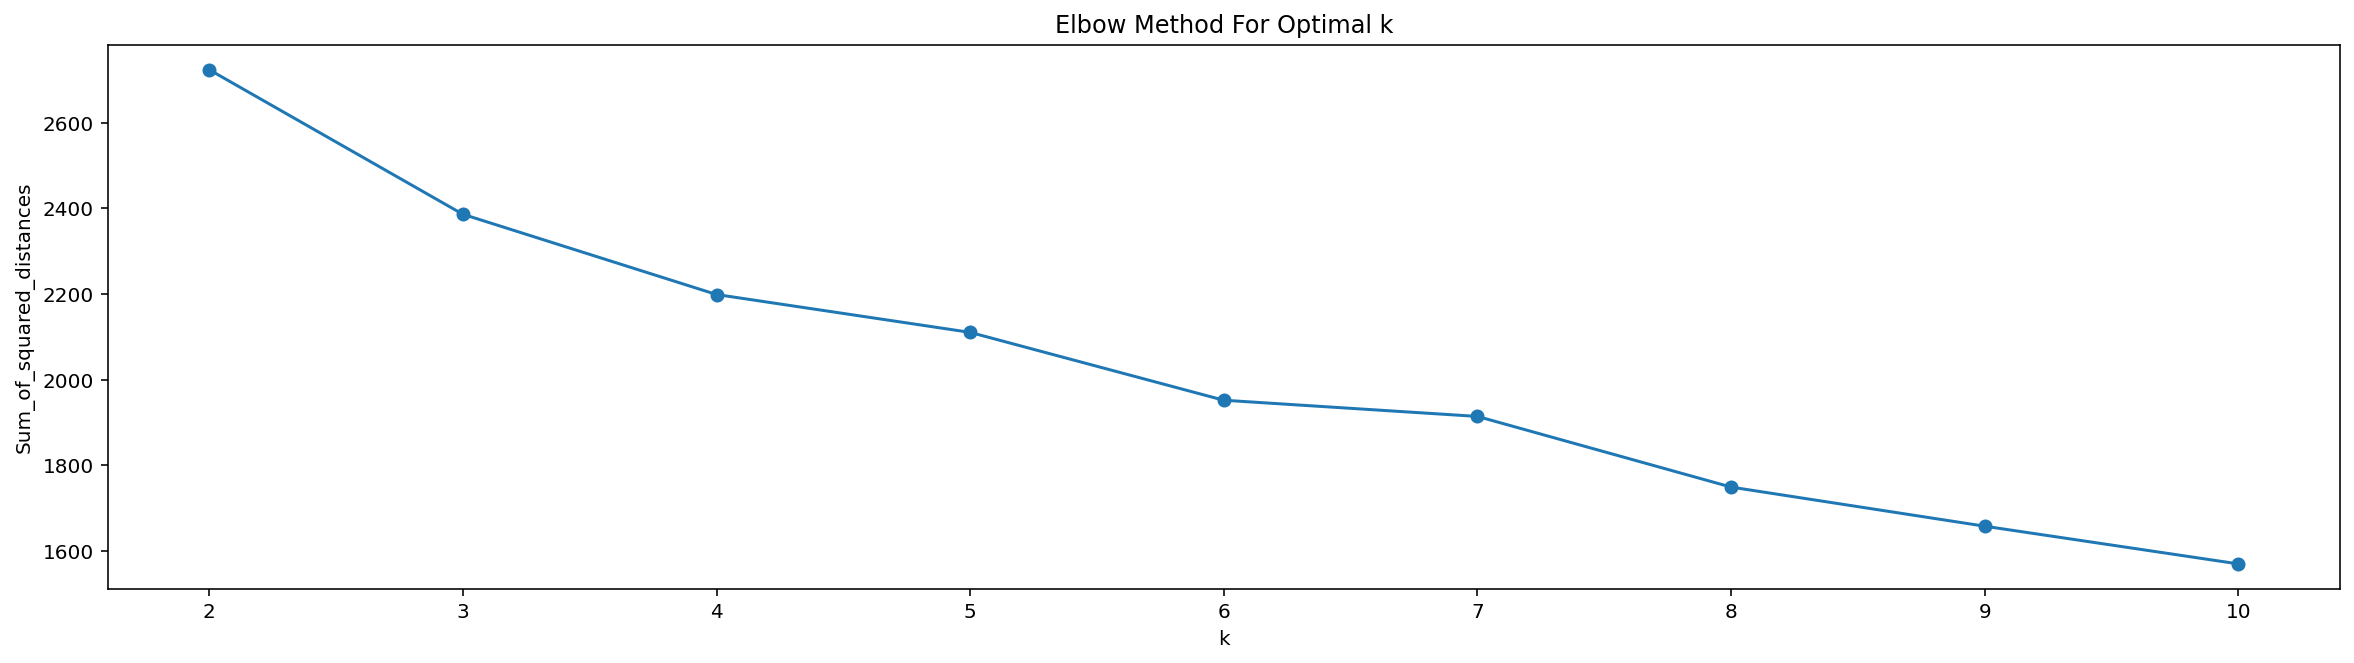

In [38]:
d4.kmean(6)
d4.kmeans_classification(2)
# d4.df1_knn
d4.minibatch_Kmeans_find()

### for Minibatch Kmeans 9 clusters look good observing the knee points of curve

Centere of clusters [[5.29890917e-01 1.00000000e+00 2.80181621e-01 5.18805109e-01
  5.04954663e-01 9.37176166e-01 6.09455959e-01 5.09847586e-01
  5.28604943e-01 4.65997409e-01 6.47668394e-04]
 [5.01066780e-01 0.00000000e+00 3.80599937e-01 5.00656354e-01
  4.61606036e-01 1.18644068e-01 9.44191815e-01 4.90557434e-01
  5.24025179e-01 2.50723439e-01 5.46093427e-01]
 [4.94763435e-01 8.60610807e-01 2.75556645e-01 4.95555647e-01
  4.89075959e-01 9.92169146e-01 1.17462803e-03 5.13290522e-01
  4.90465708e-01 5.86530932e-01 9.96084573e-01]
 [5.06337770e-01 1.15260489e-02 3.02222749e-01 5.22562746e-01
  5.14292301e-01 1.00000000e+00 4.61041955e-04 5.06360701e-01
  5.11945946e-01 4.10557861e-01 2.03780544e-01]
 [5.58838854e-01 9.96268657e-01 5.35681041e-01 4.89890772e-01
  4.95162580e-01 6.92963753e-03 5.88486141e-01 4.85650577e-01
  4.54983126e-01 9.13912580e-01 8.40618337e-01]
 [4.80227879e-01 1.39659803e-01 3.97855425e-01 5.10656678e-01
  4.53222919e-01 3.58102059e-03 9.54938824e-03 5.10218925e

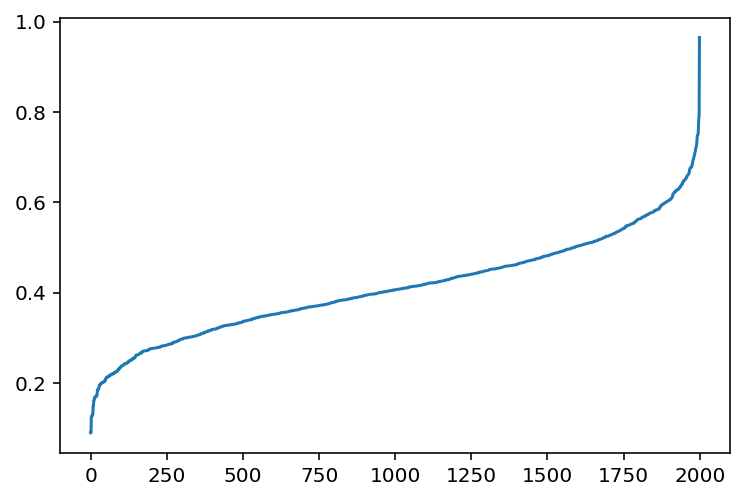

In [39]:
d4.minibatch_kmean(9)
d4.minibatch_kmeans_classification(2)
d4.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.55

[0 1 2 ... 2 9 2]
DBscan silhoutte score for espislon =  1  : 0.260738274921758
DBI score for espislon =  1  : 1.5614467398565322
[ 0  1  2 ...  3 13  0]
DBscan silhoutte score for espislon =  1  : 0.2512572431017779
DBscan DBI score for espislon =  1  : 1.50309080217442
DBscan fowlkes score on train data for espislon =  1   : 0.21285100879340427
DBscan fowlkes score on test data for espislon =  1   : 0.21259354213325268
DBscan ARI score on train data for espislon =  1   : 0.014101752345362303
DBscan ARI score on test data for espislon =  1   : 0.010270123634136381
DBscan Mutual Information score on train data for espislon =  1   : 0.056610698680283955
DBscan Mutual Information on test data for espislon =  1   : 0.05750781911022371
DBscan V-measure score on train data for espislon =  1   : 0.033756495502420776
DBscan V-measure score on test data for espislon =  1   : 0.03498262396012344
DBscan Homogeneity score on train data for espislon =  1   : 0.082392579153799
DBscan Homogeneity sc

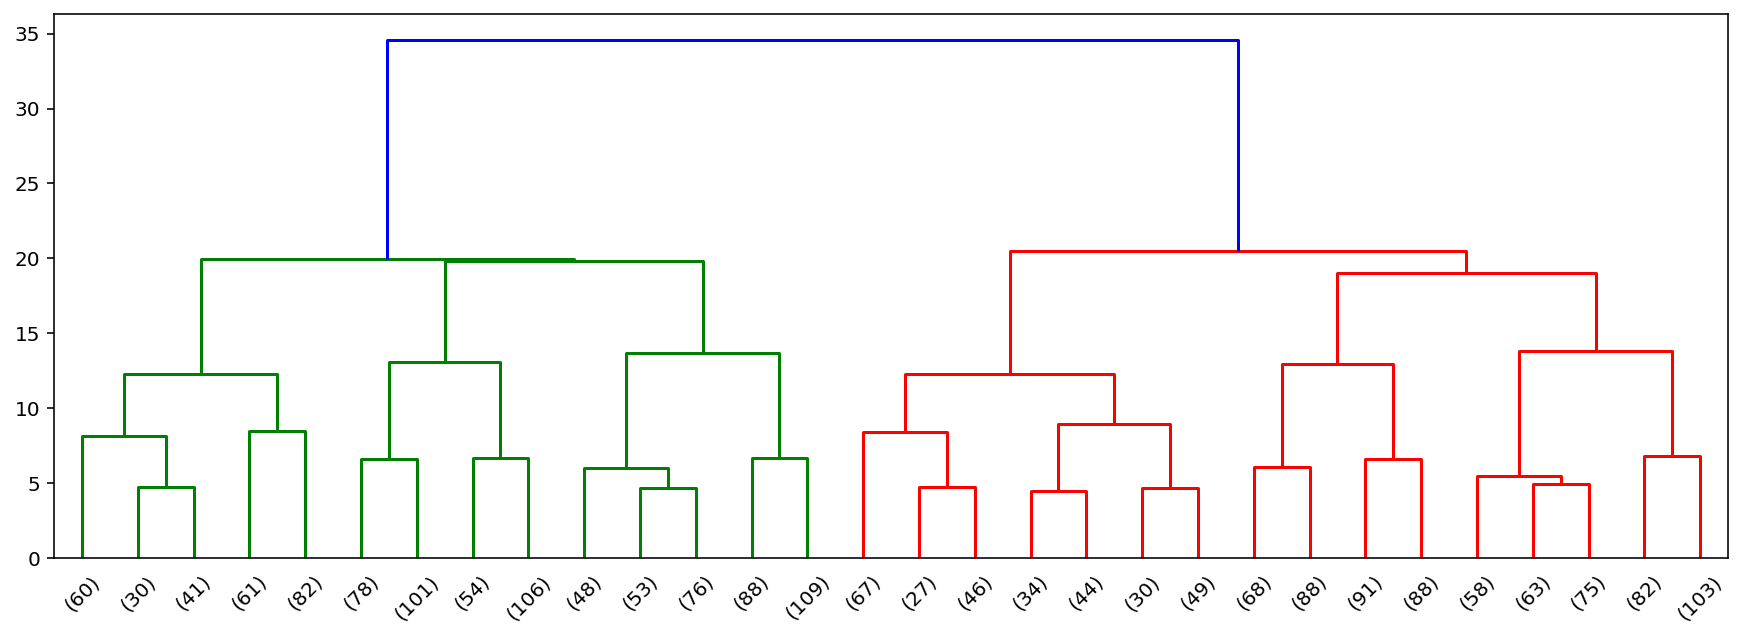

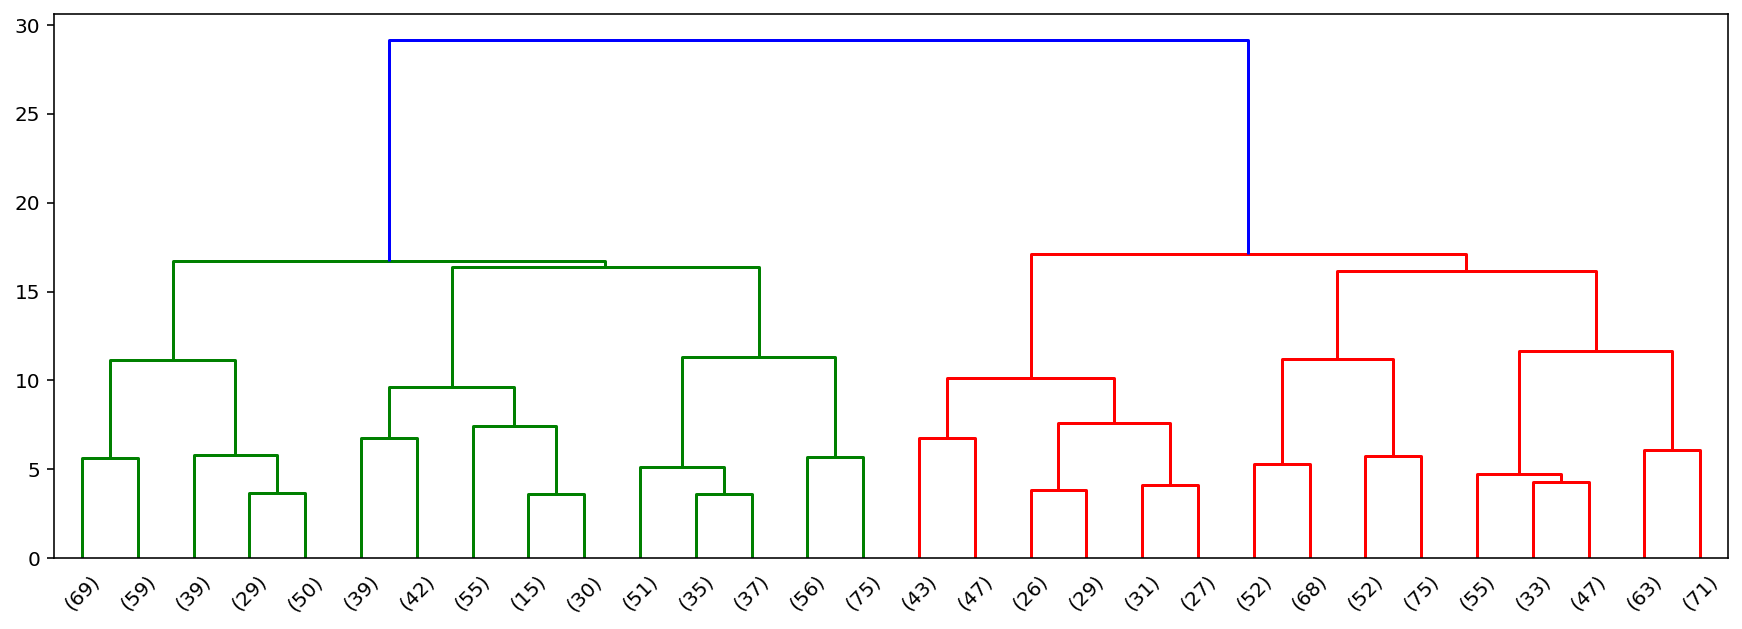

In [40]:
d4.dbscan(1)

d4.dbscan_clustering(1)

d4.agglomerative(6)

d4.agglomerative_classification(2)

d4.optics()

d4.optics_clustering()

d4.MeanShift(0.5)
d4.MeanShift_clustering(0.5)

In [41]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3      0.179662  2.087443  0.550929  0.096687            0.051600   0.074843   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852  
3     0.075226

In [42]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   
3        0.178279  2.094276  0.505301  0.004753            0.003520   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852  
3   0.005106     0.005131

In [43]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3       0.179662  2.087443  0.505531  0.005301            0.003772   0.005471   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852  
3     0.005499

In [44]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   
3      0.251257  1.503091  0.212594  0.010270        5.750782e-02   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15  
3  3.498262e-02  8.383922e-02

In [45]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   
3       0.200841  1.789074  0.321021  0.006069            0.040709   0.030886   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750  
3     0.059348

In [46]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   
3        0.131901        0.656243  0.033470  0.000519        5.247248e-01   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15  
3  1.587164e-01  7.649832e-01

# 5th Dataset

(2216, 28)
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
Education
Marital_Status
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (2216, 38)
Shape of y : (2216,)
kmeans  2  : 0.1528604756064123
kmeans  3  : 0.18940074428670464
kmeans  4  : 0.17627554252016575
kmeans  5  : 0.18657203767243588
kmeans  6  : 0.1876153599784785
kmeans  7  : 0.20515609486840458
kmeans  8  : 0.22160791105026886
kmeans  9  : 0.23460206947608328
kmeans  10  : 0.24840519897576857


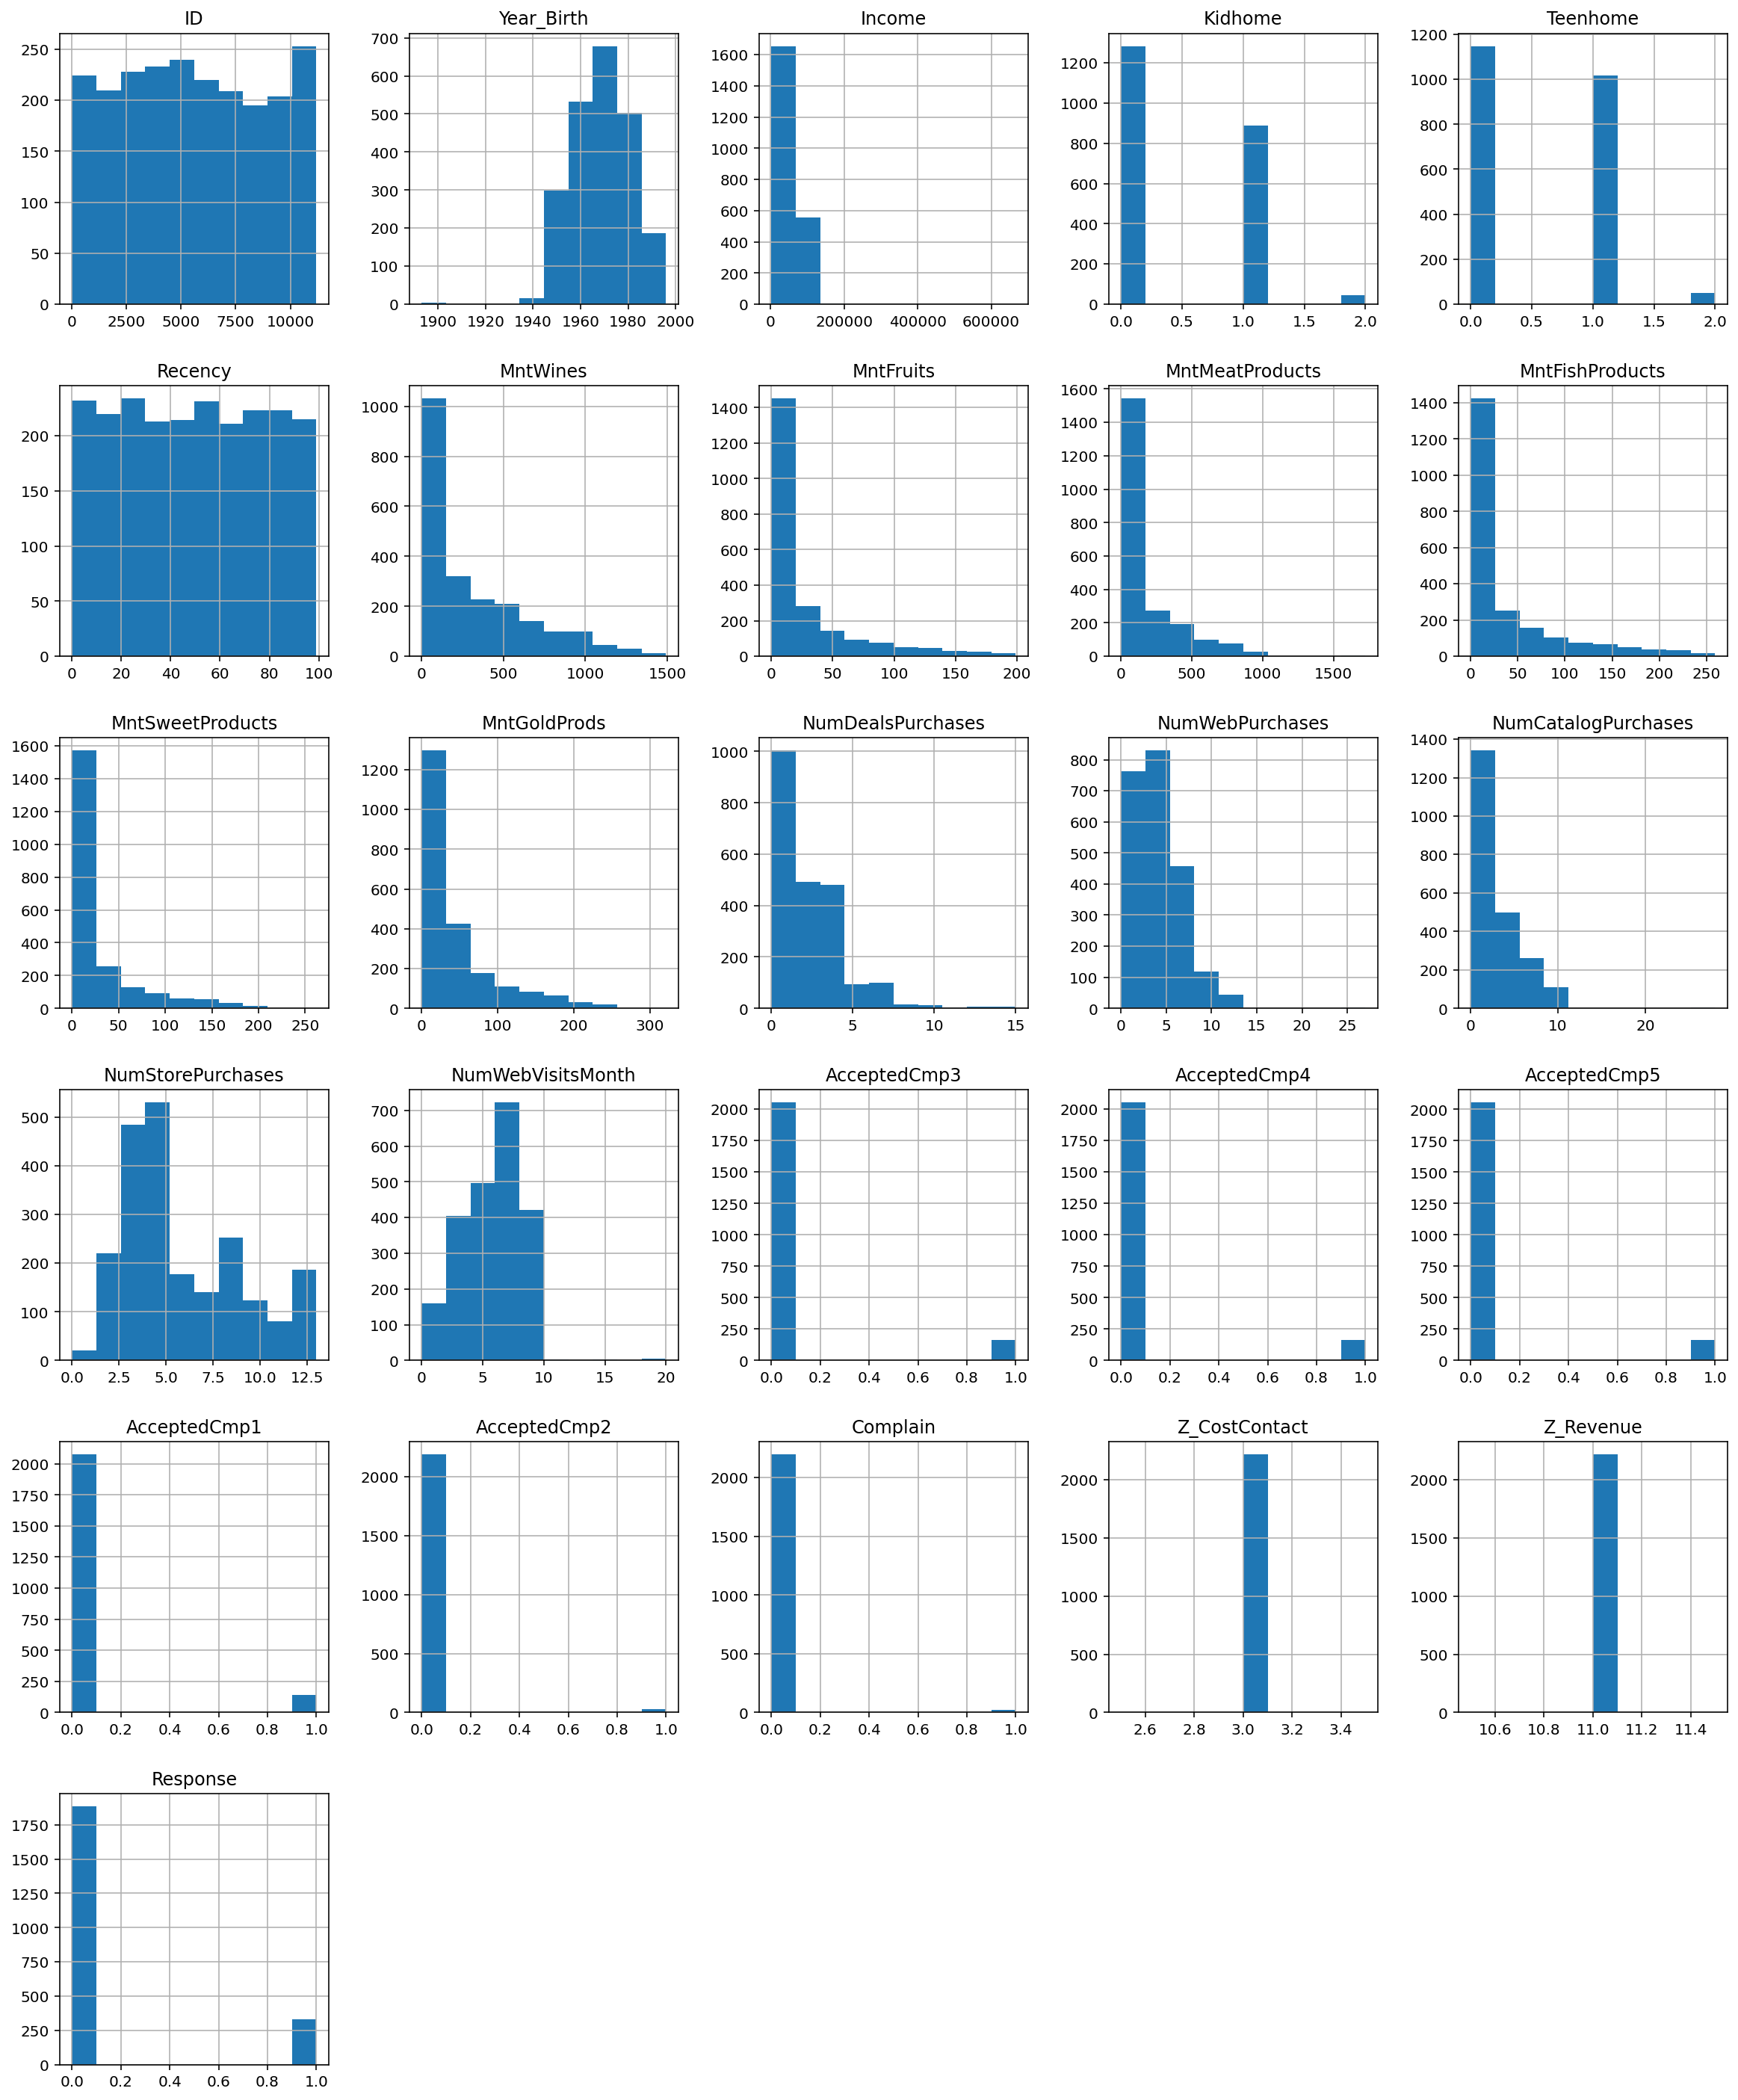

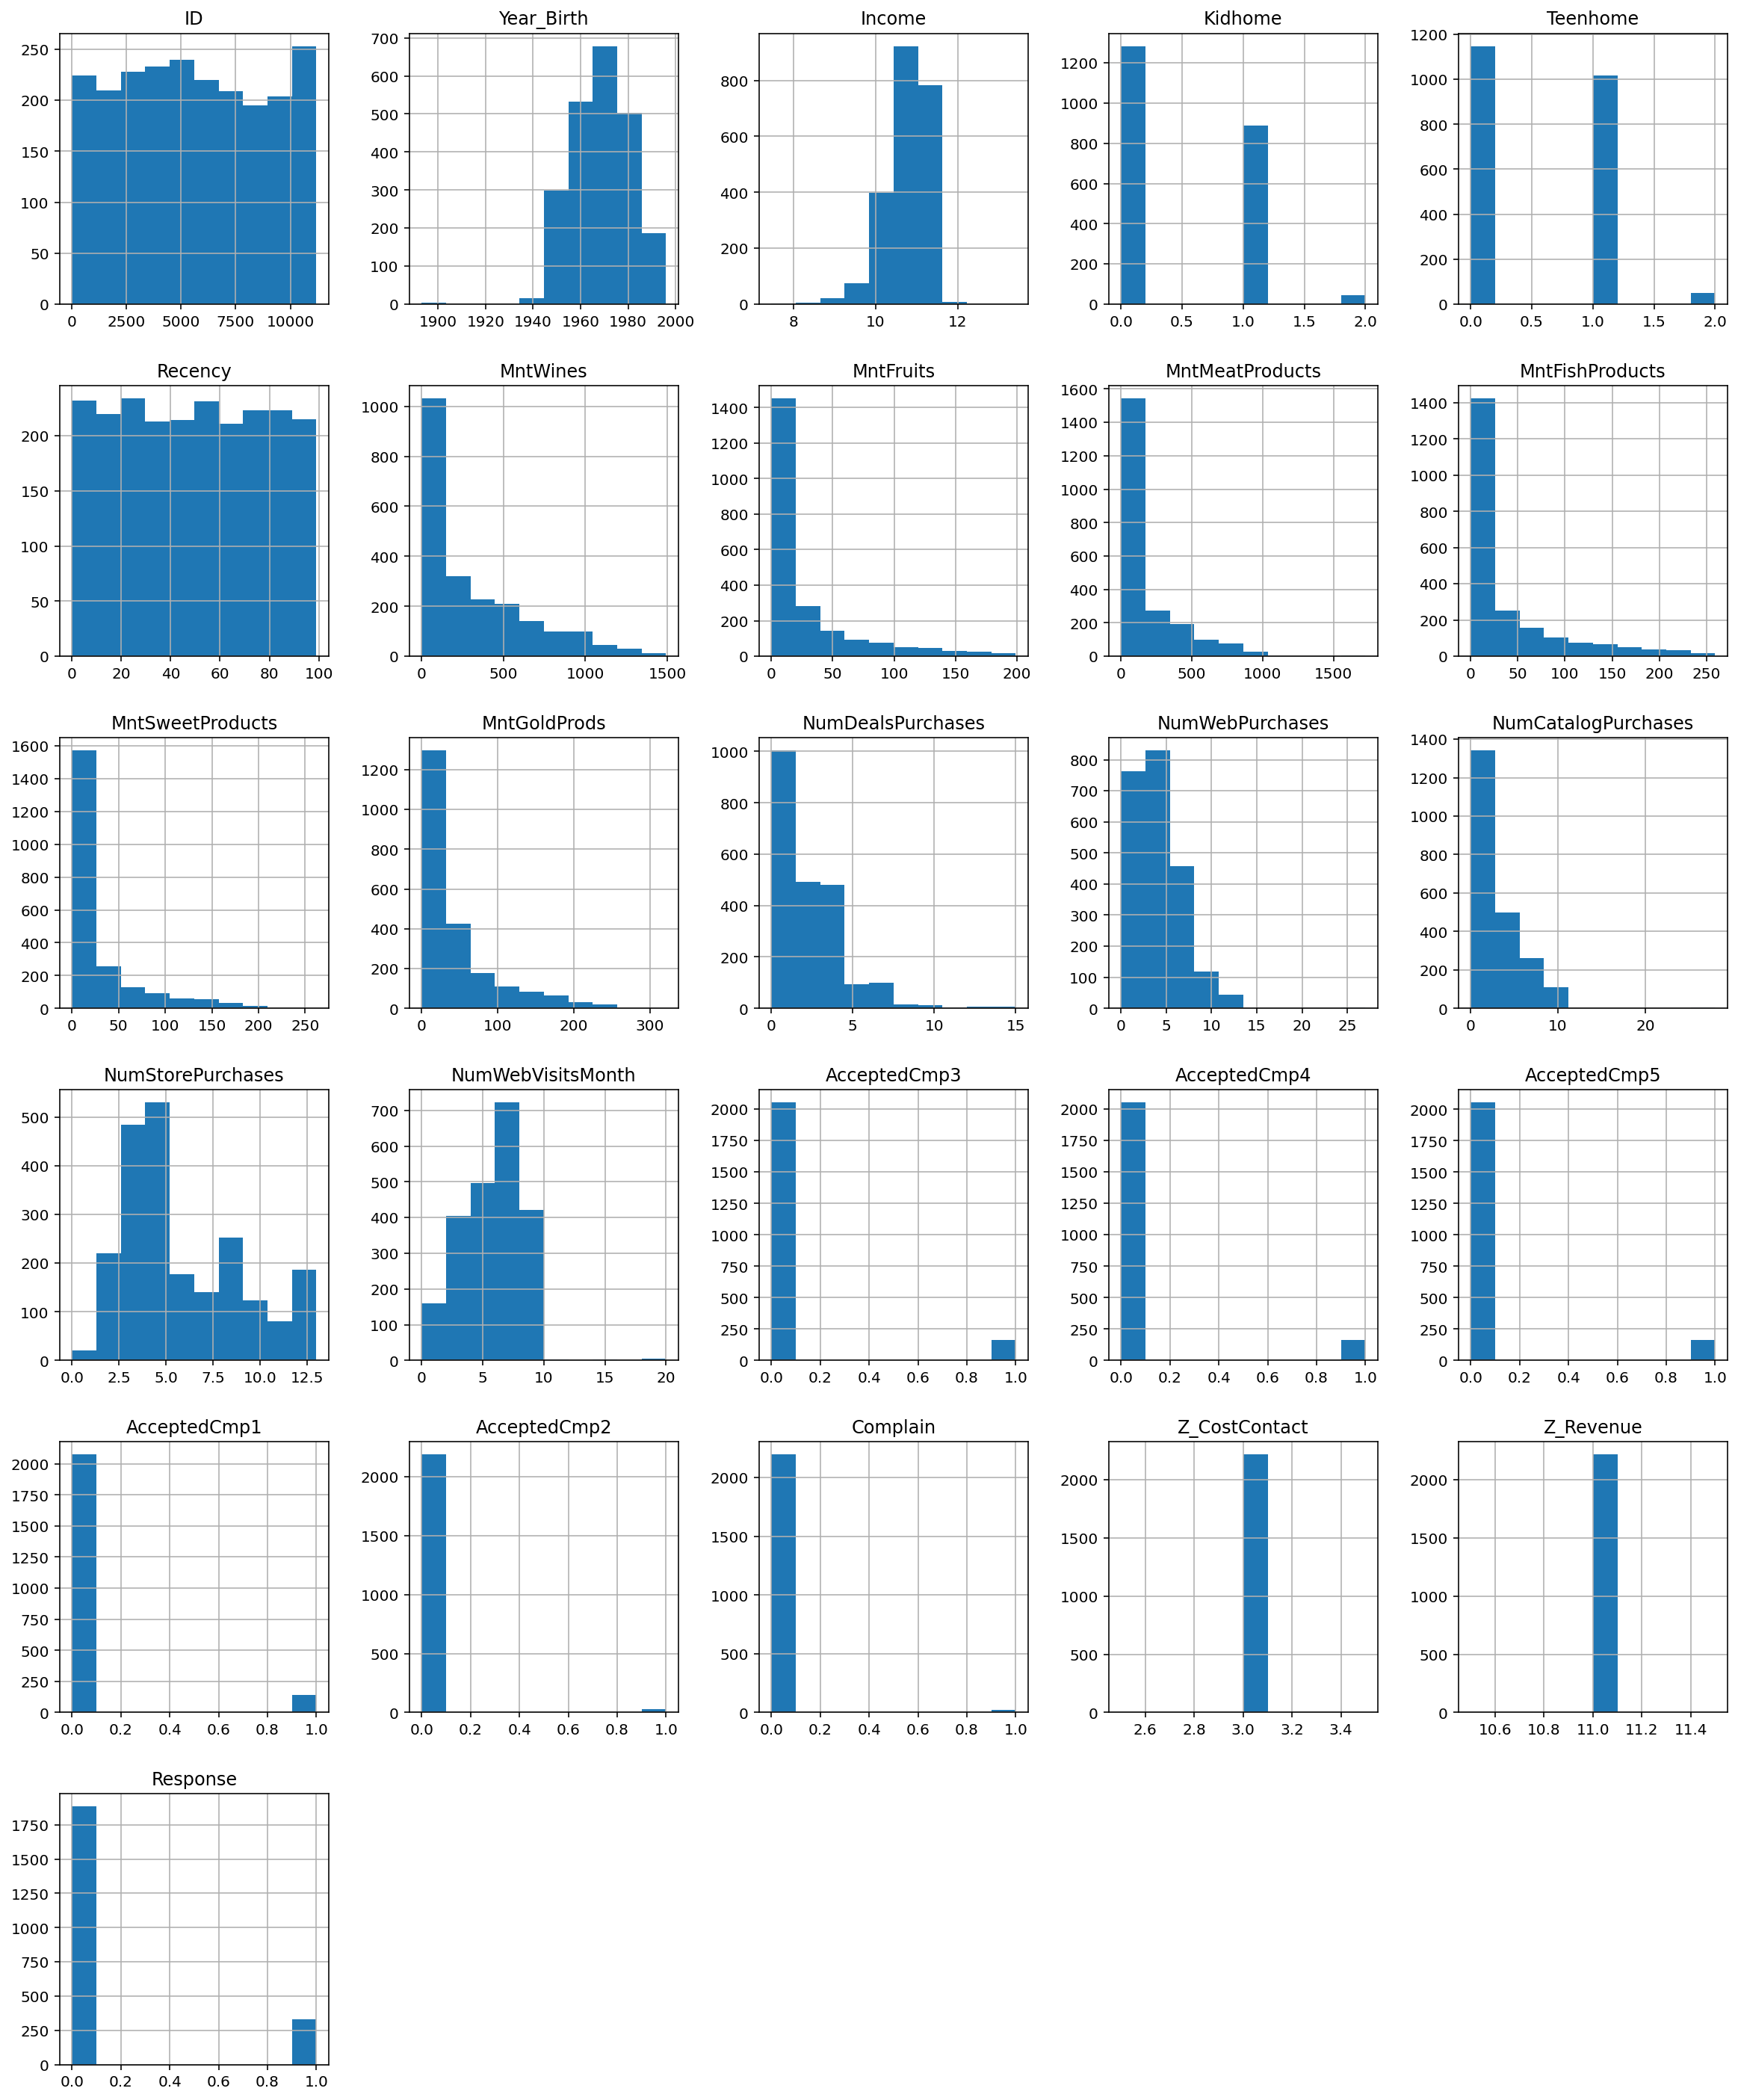

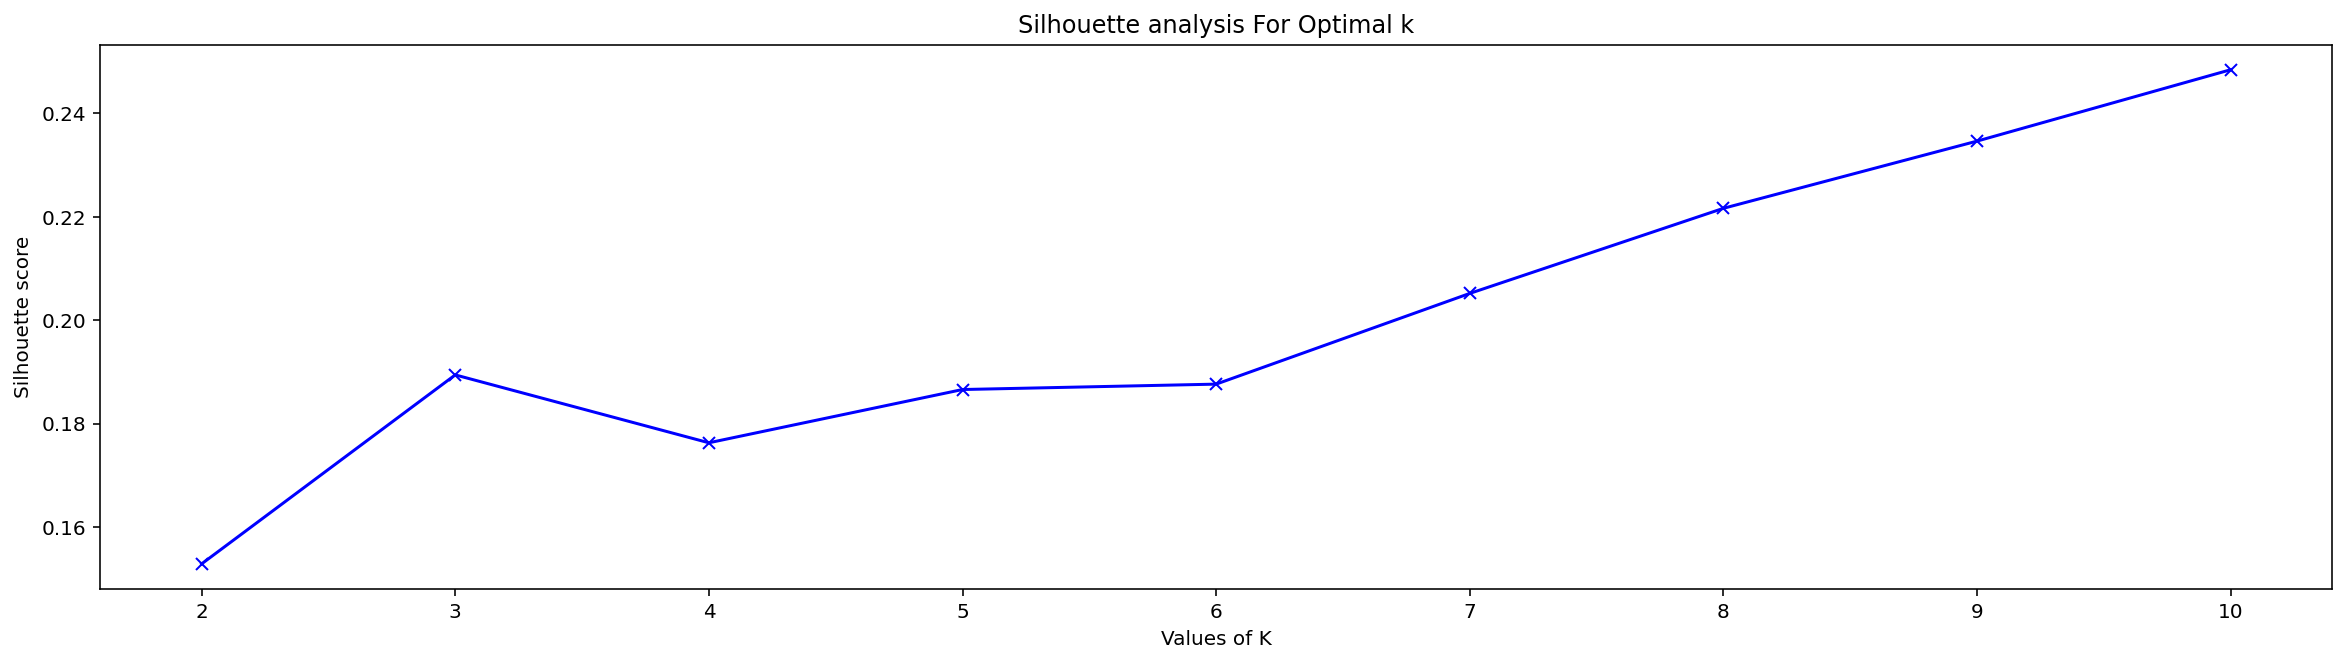

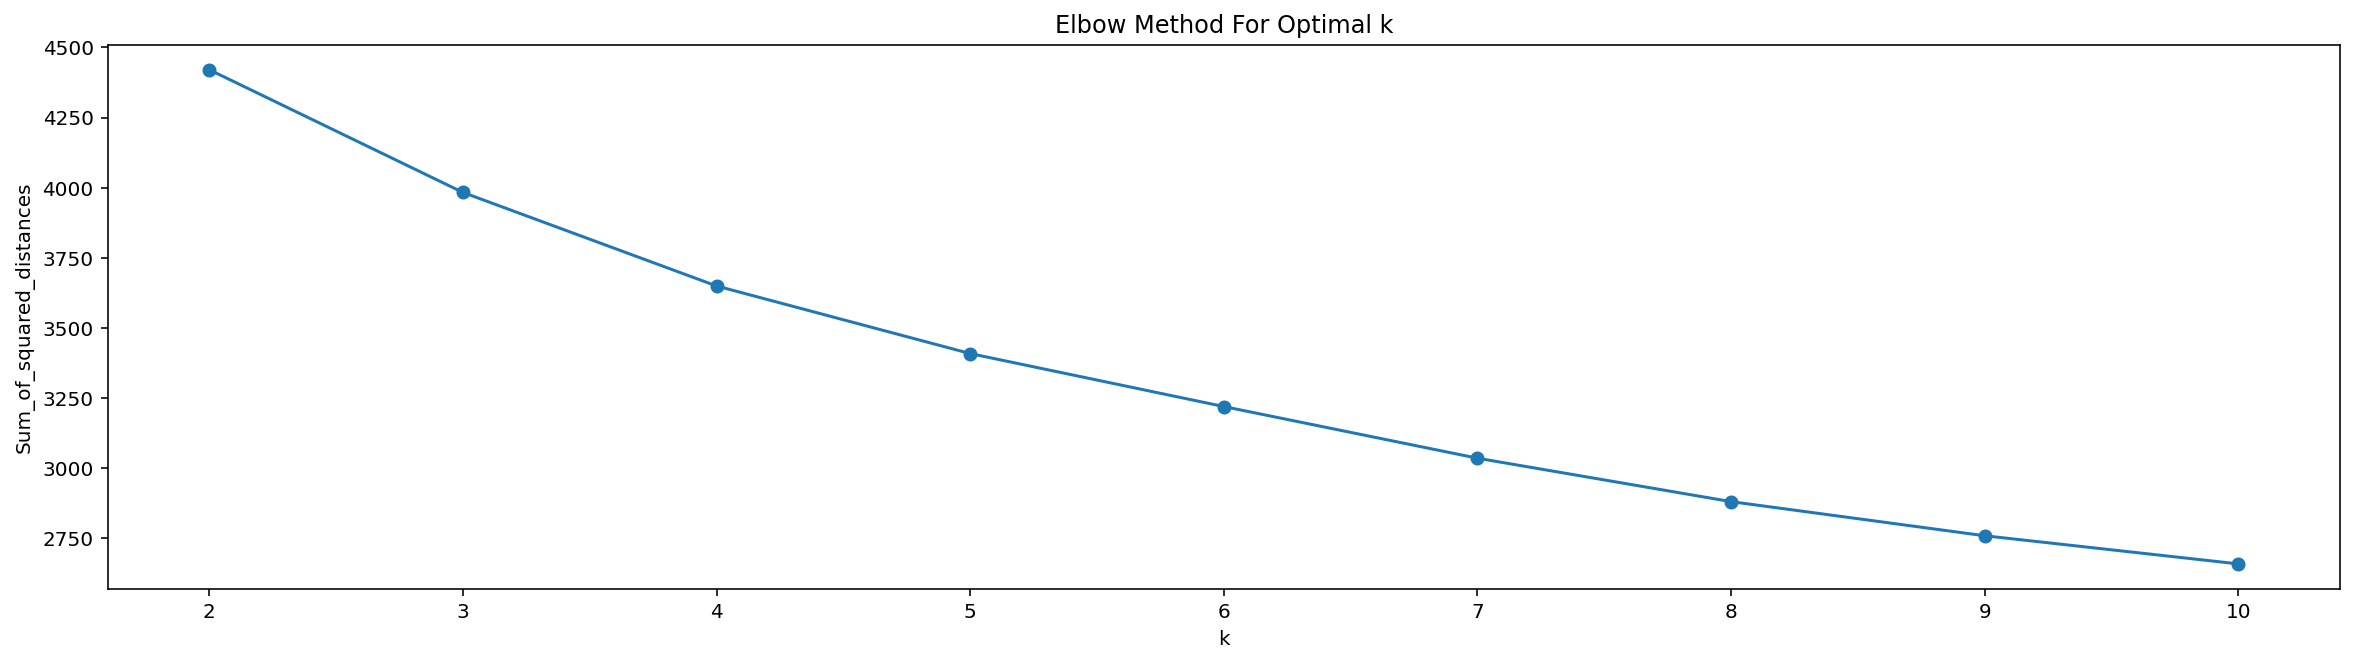

In [47]:
d5 = dataset('marketing_campaign-2.csv')
d5.data_preprocessing()
d5.normalization_scaling()

d5.make_X('Response')

# d5.make_X('Class')

d5.Kmeans_find()


### For kmeans 7 clusters seems best observing the knee point on curves

centres of cluster [[ 4.79911328e-01  7.17941216e-01  5.60325733e-01  2.28767123e-01
   2.67123288e-01  4.77957659e-01  2.23028012e-01  1.07413781e-01
   9.44466945e-02  1.21595176e-01  7.94206839e-02  1.25199505e-01
   1.61643836e-01  1.49467275e-01  9.09001957e-02  4.52897787e-01
   2.60273973e-01  6.57534247e-02  8.49315068e-02  7.39726027e-02
   4.93150685e-02  5.47945205e-03  5.47945205e-03  0.00000000e+00
   0.00000000e+00 -1.38777878e-17  3.46944695e-18  0.00000000e+00
   1.00000000e+00 -1.11022302e-16  2.73972603e-03  2.73972603e-03
   1.01369863e-01  3.78082192e-01  2.05479452e-01  2.79452055e-01
   3.01369863e-02  4.33680869e-19]
 [ 4.89797673e-01  7.74786702e-01  5.38168692e-01  2.25378788e-01
   1.85606061e-01  5.09871442e-01  1.65735554e-01  1.59509670e-01
   1.04068950e-01  1.67631918e-01  1.04470275e-01  1.49815916e-01
   1.49242424e-01  1.39450056e-01  9.40205628e-02  4.22785548e-01
   2.68750000e-01  8.71212121e-02  6.06060606e-02  5.68181818e-02
   4.54545455e-02  1.1

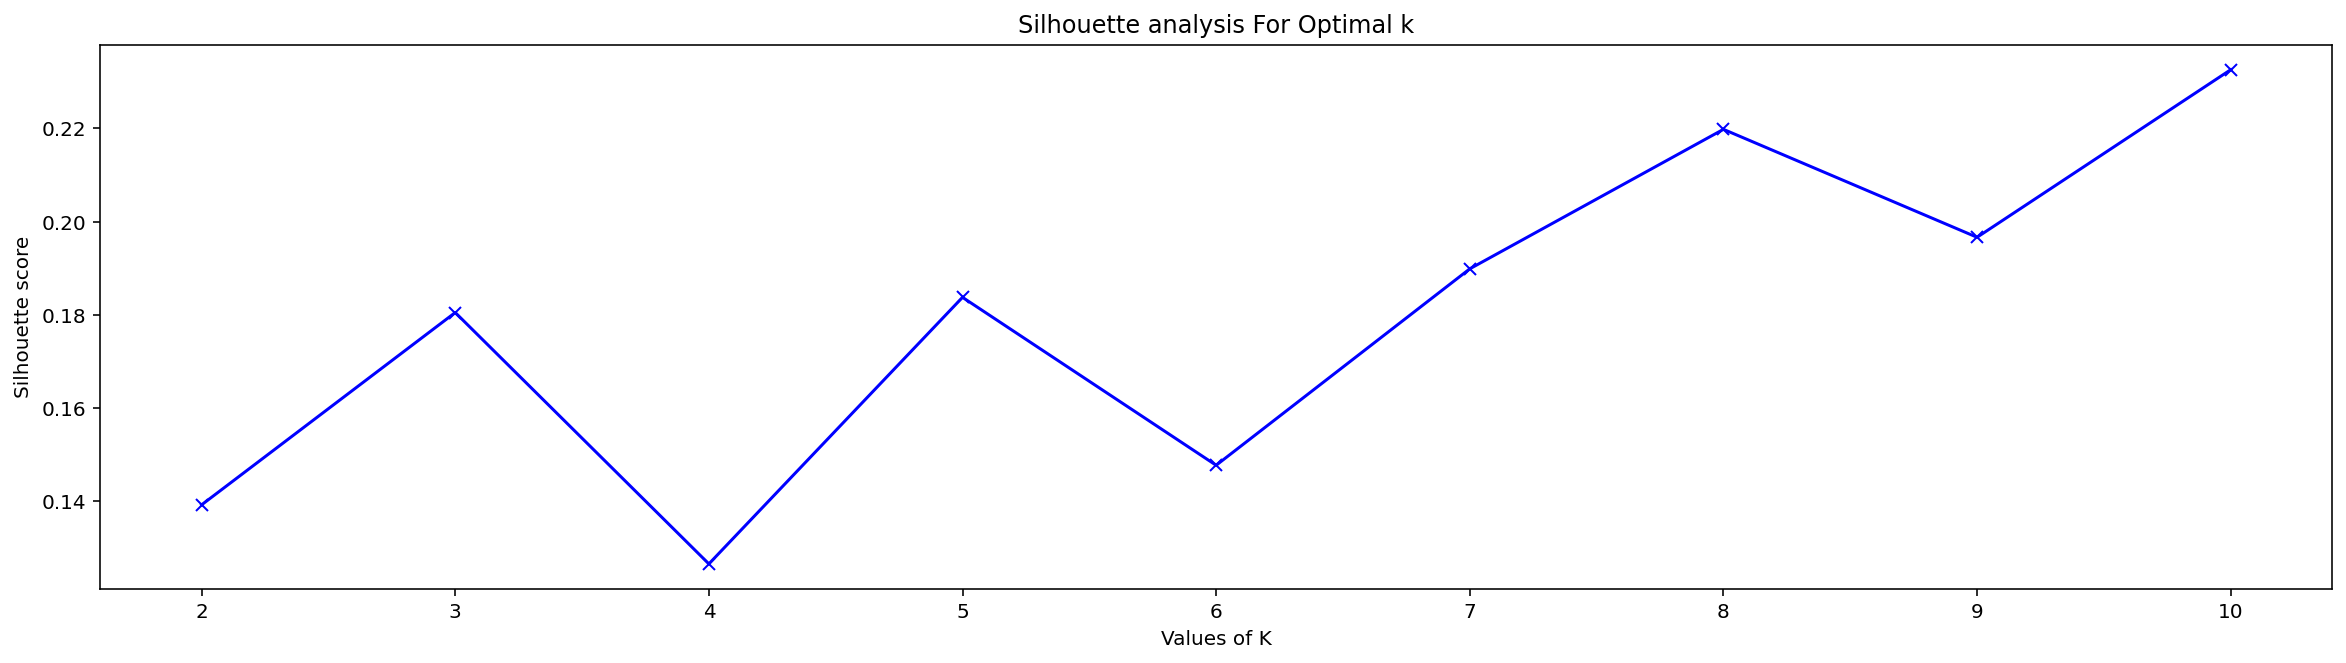

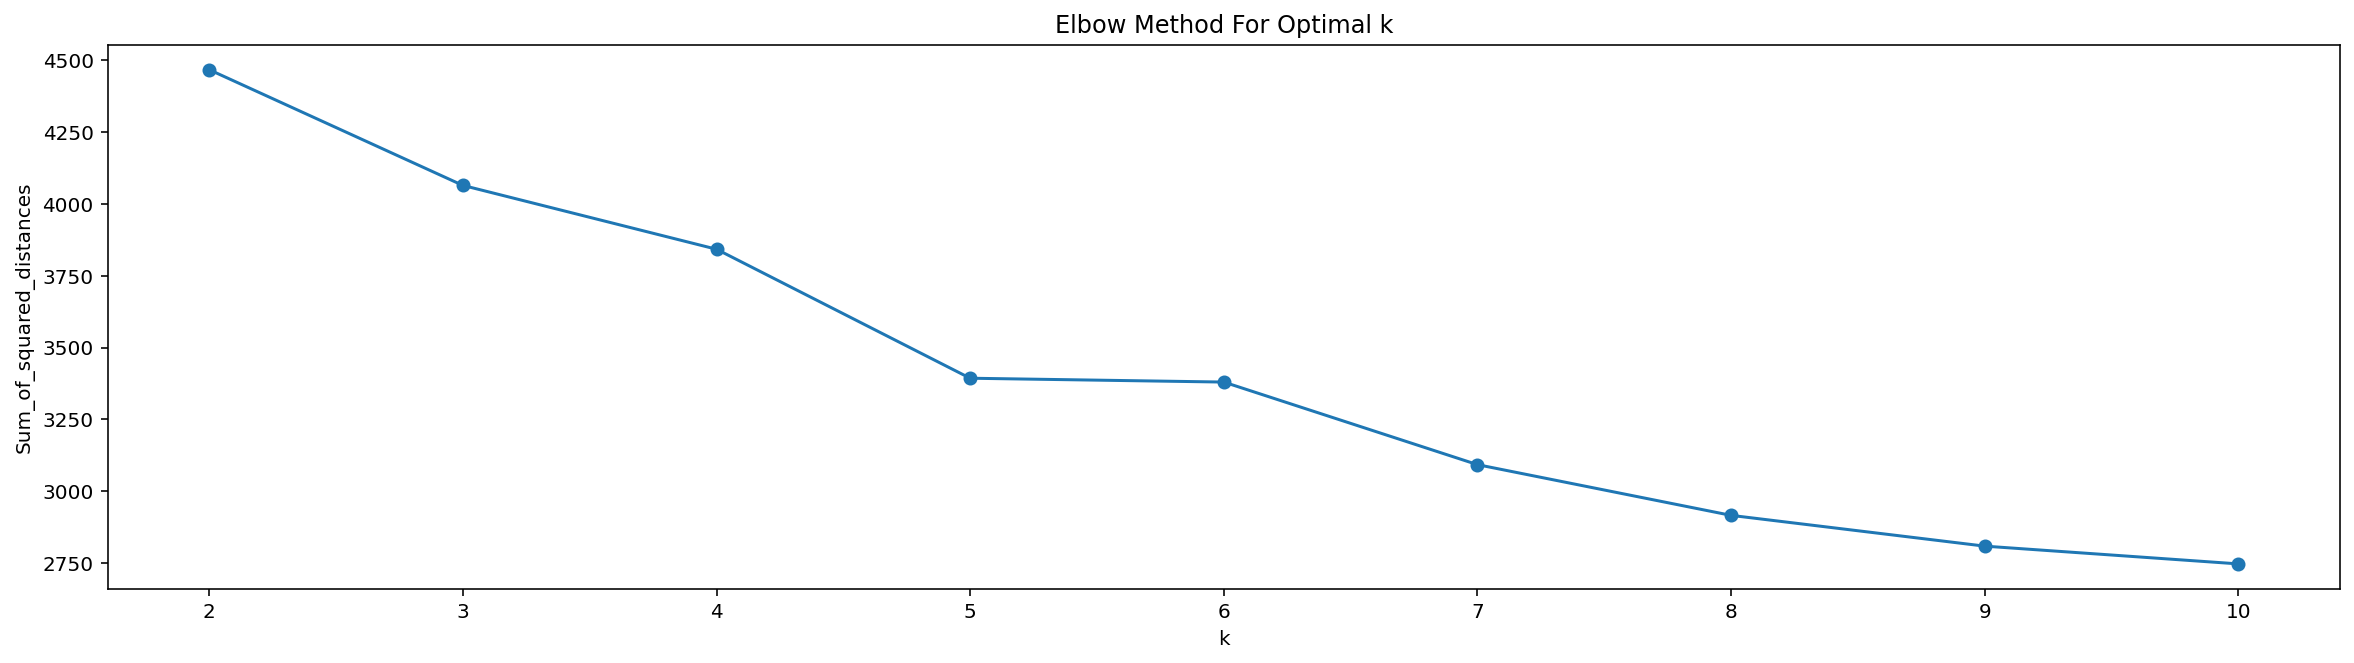

In [48]:
d5.kmean(7)
d5.kmeans_classification(2)
# d5.df1_knn
d5.minibatch_Kmeans_find()

### for Minibatch Kmeans 7 clusters look good observing the knee points of curve

Centere of clusters [[5.16385266e-01 7.13868577e-01 5.80597306e-01 1.77581864e-01
  2.89924433e-01 4.89005928e-01 3.03613336e-01 1.18261332e-01
  1.11944511e-01 1.04999854e-01 8.05872286e-02 1.06185802e-01
  1.65843829e-01 1.72460118e-01 1.20870817e-01 4.87579926e-01
  2.58287154e-01 6.64987406e-02 1.07304786e-01 1.13350126e-01
  5.49118388e-02 2.36775819e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.03778338e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.99496222e-01 0.00000000e+00 3.52644836e-03
  5.03778338e-04 8.68010076e-01 1.00755668e-03 5.03778338e-03
  1.11335013e-01 1.05793451e-02]
 [4.92653177e-01 7.64539255e-01 5.48860869e-01 2.26719701e-01
  2.01684605e-01 4.98716694e-01 1.89792421e-01 1.42119112e-01
  1.08294168e-01 1.50354211e-01 1.00886954e-01 1.35185290e-01
  1.41163625e-01 1.42402815e-01 9.33468146e-02 4.33983658e-01
  2.61745438e-01 8.18905007e-02 6.94899392e-02 6.64482920e-02
  6.34066448e-02 1.09967244e-02 1.28685073e-02 0.00000000e+00
  0.00000000e+00 

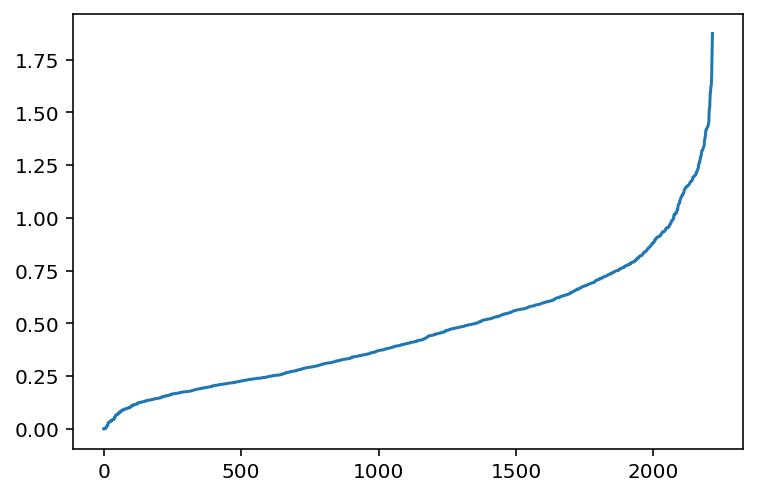

In [49]:
d5.minibatch_kmean(7)
d5.minibatch_kmeans_classification(2)
d5.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.8

[ 0  0  1 ... -1  7  2]
DBscan silhoutte score for espislon =  0.8  : 0.16024144233446425
DBI score for espislon =  0.8  : 1.7075541842689477
[-1  0 -1 ... -1  8  0]
DBscan silhoutte score for espislon =  0.8  : 0.11722935951759242
DBscan DBI score for espislon =  0.8  : 1.7452398994415776
DBscan fowlkes score on train data for espislon =  0.8   : 0.3566314639219975
DBscan fowlkes score on test data for espislon =  0.8   : 0.5400820780165466
DBscan ARI score on train data for espislon =  0.8   : -0.050734432804993214
DBscan ARI score on test data for espislon =  0.8   : -0.08146901598627687
DBscan Mutual Information score on train data for espislon =  0.8   : 0.045554381587643904
DBscan Mutual Information on test data for espislon =  0.8   : 0.022816672659136922
DBscan V-measure score on train data for espislon =  0.8   : 0.03747245152174268
DBscan V-measure score on test data for espislon =  0.8   : 0.028643755055884092
DBscan Homogeneity score on train data for espislon =  0.8   : 0.

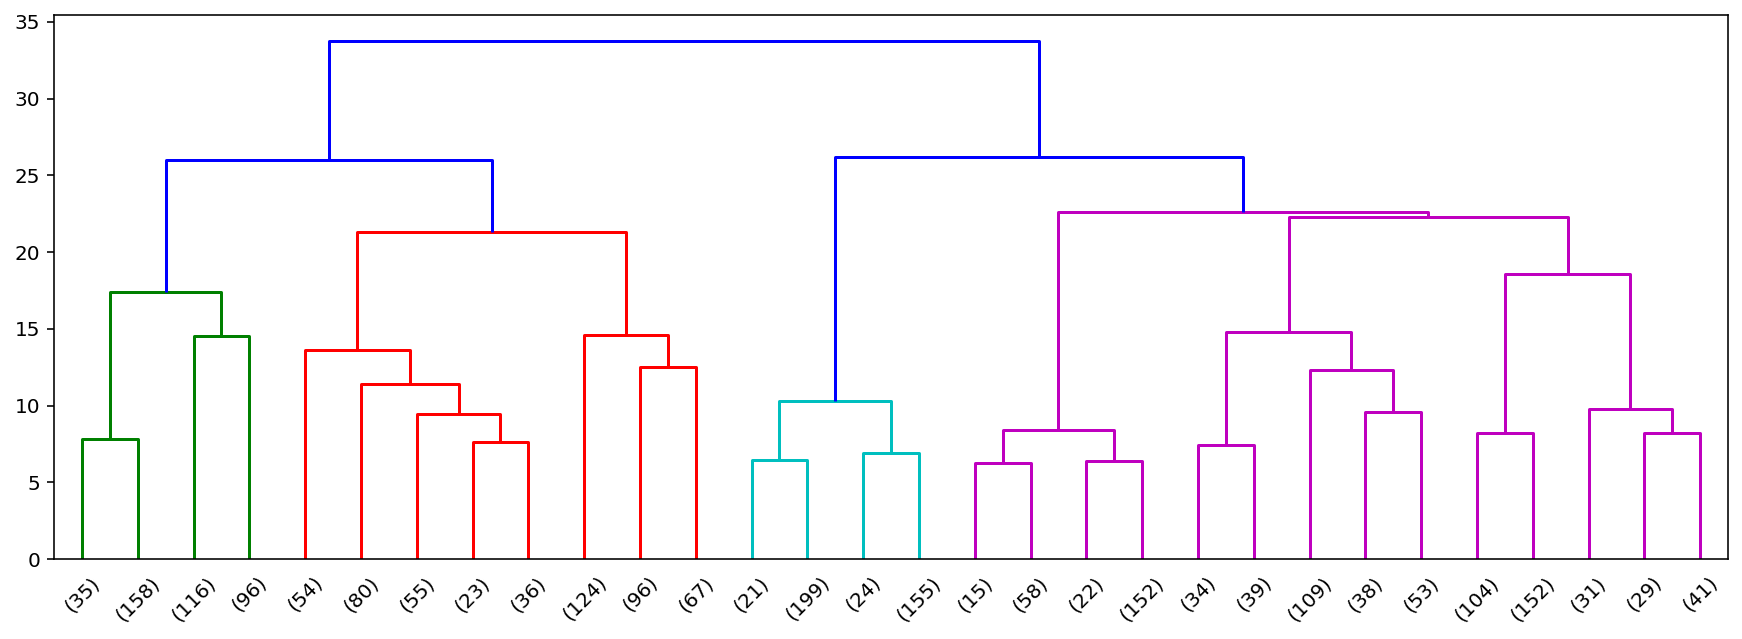

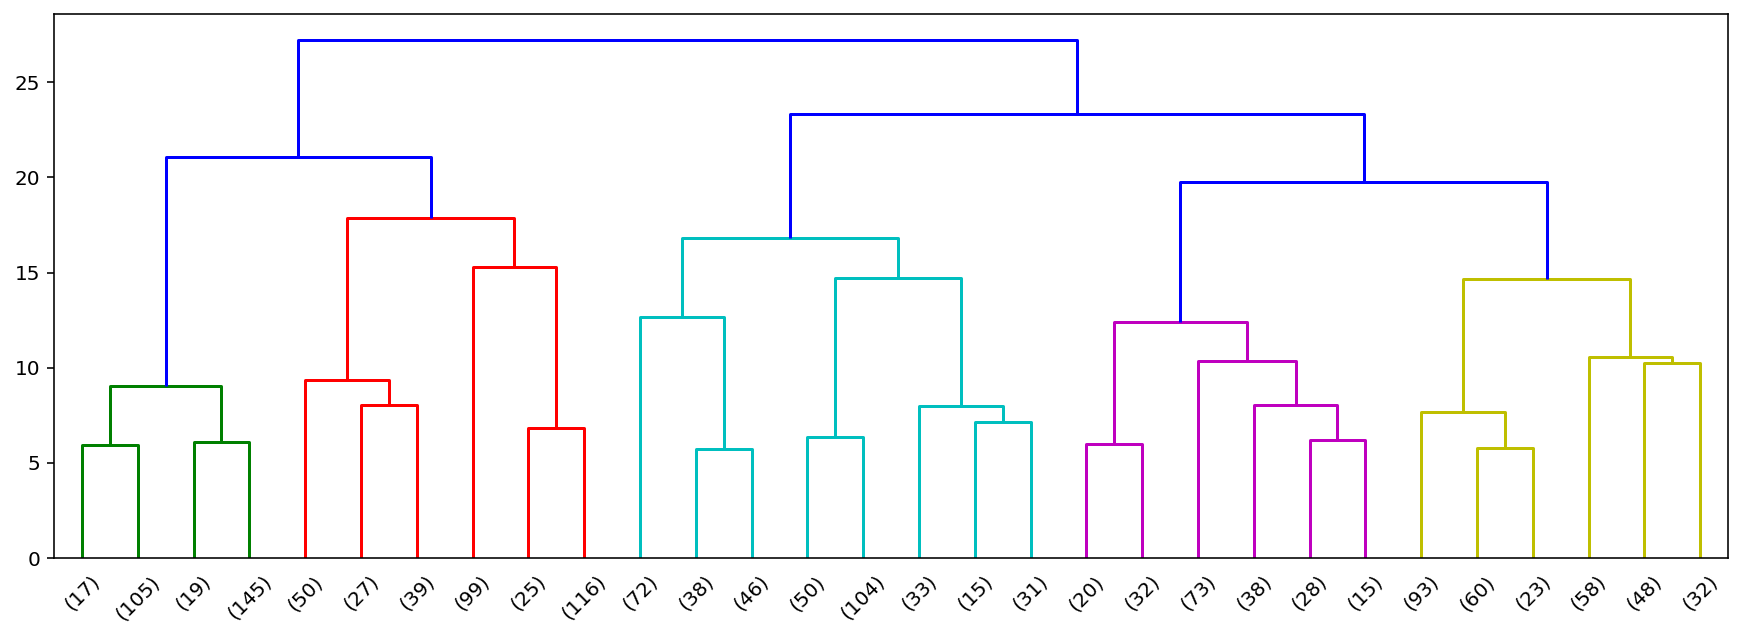

In [50]:
d5.dbscan(0.8)

d5.dbscan_clustering(0.8)

d5.agglomerative(6)

d5.agglomerative_classification(2)

d5.optics()

d5.optics_clustering()

d5.MeanShift()
d5.MeanShift_clustering()

In [51]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3      0.179662  2.087443  0.550929  0.096687            0.051600   0.074843   
4      0.153581  2.374335  0.607560  0.001075            0.000802   0.001427   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852  
3     0.075226  
4     0.001860

In [52]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   
3        0.178279  2.094276  0.505301  0.004753            0.003520   
4        0.153581  2.374335  0.607560  0.001075            0.000802   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852  
3   0.005106     0.005131  
4   0.001427     0.001860

In [53]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3       0.179662  2.087443  0.505531  0.005301            0.003772   0.005471   
4       0.110494  2.807480  0.608229 -0.002643            0.000300   0.000536   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852  
3     0.005499  
4     0.000696

In [54]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   
3      0.251257  1.503091  0.212594  0.010270        5.750782e-02   
4      0.117229  1.745240  0.540082 -0.081469        2.281667e-02   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15  
3  3.498262e-02  8.383922e-02  
4  2.864376e-02  5.292742e-02

In [55]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   
3       0.200841  1.789074  0.321021  0.006069            0.040709   0.030886   
4       0.026327  1.551314  0.294114 -0.014307            0.046397   0.034602   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750  
3     0.059348  
4     0.107626

In [56]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   
3        0.131901        0.656243  0.033470  0.000519        5.247248e-01   
4        0.113212        1.769752  0.861077  0.166103        2.710509e-02   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15  
3  1.587164e-01  7.649832e-01  
4  8.986267e-02  6.287517e-02

# 6th Dataset

(5179, 25)
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Gender
Customer Type
Type of Travel
Class
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (5179, 29)
Shape of y : (5179,)
kmeans  2  : 0.1924423703179301
kmeans  3  : 0.18768488945230052
kmeans  4  : 0.19100599848586414
kmeans  5  : 0.19177942201446804
kmeans  6  : 0.19242844640794257
kmeans  7  : 0.20679879063096407
kmeans  8  : 0.21347904557260536
kmeans  9  : 0.1

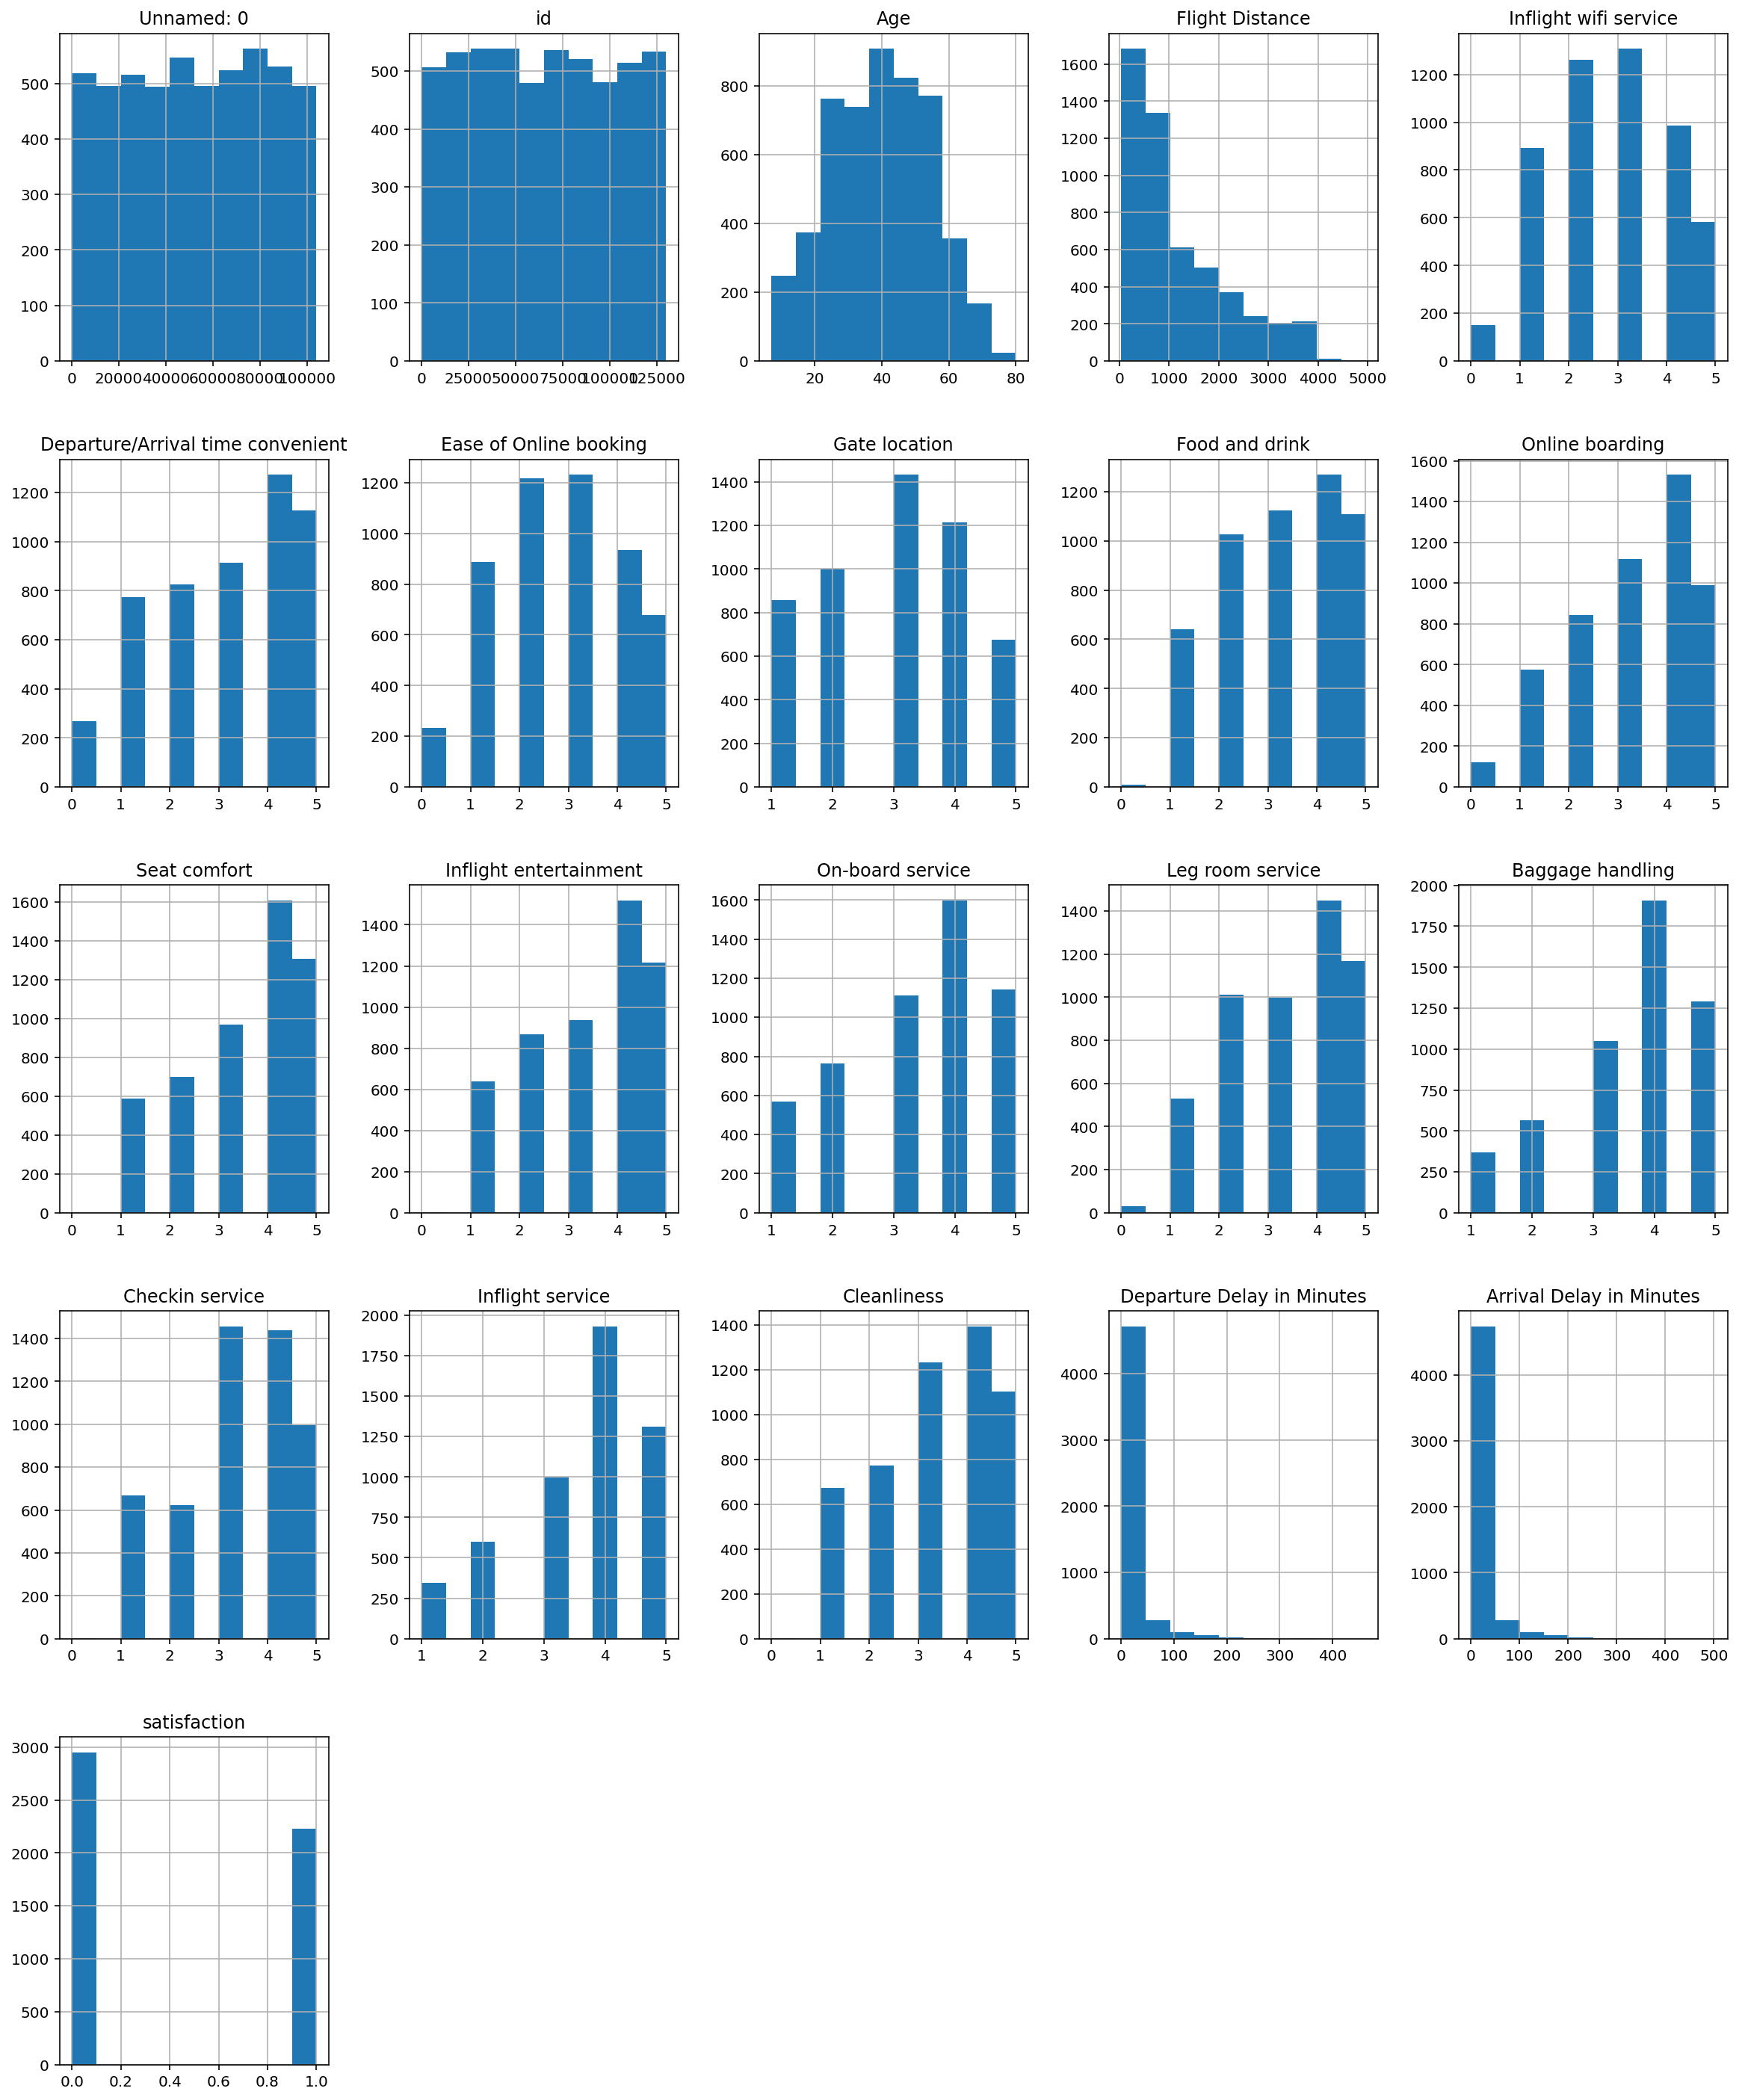

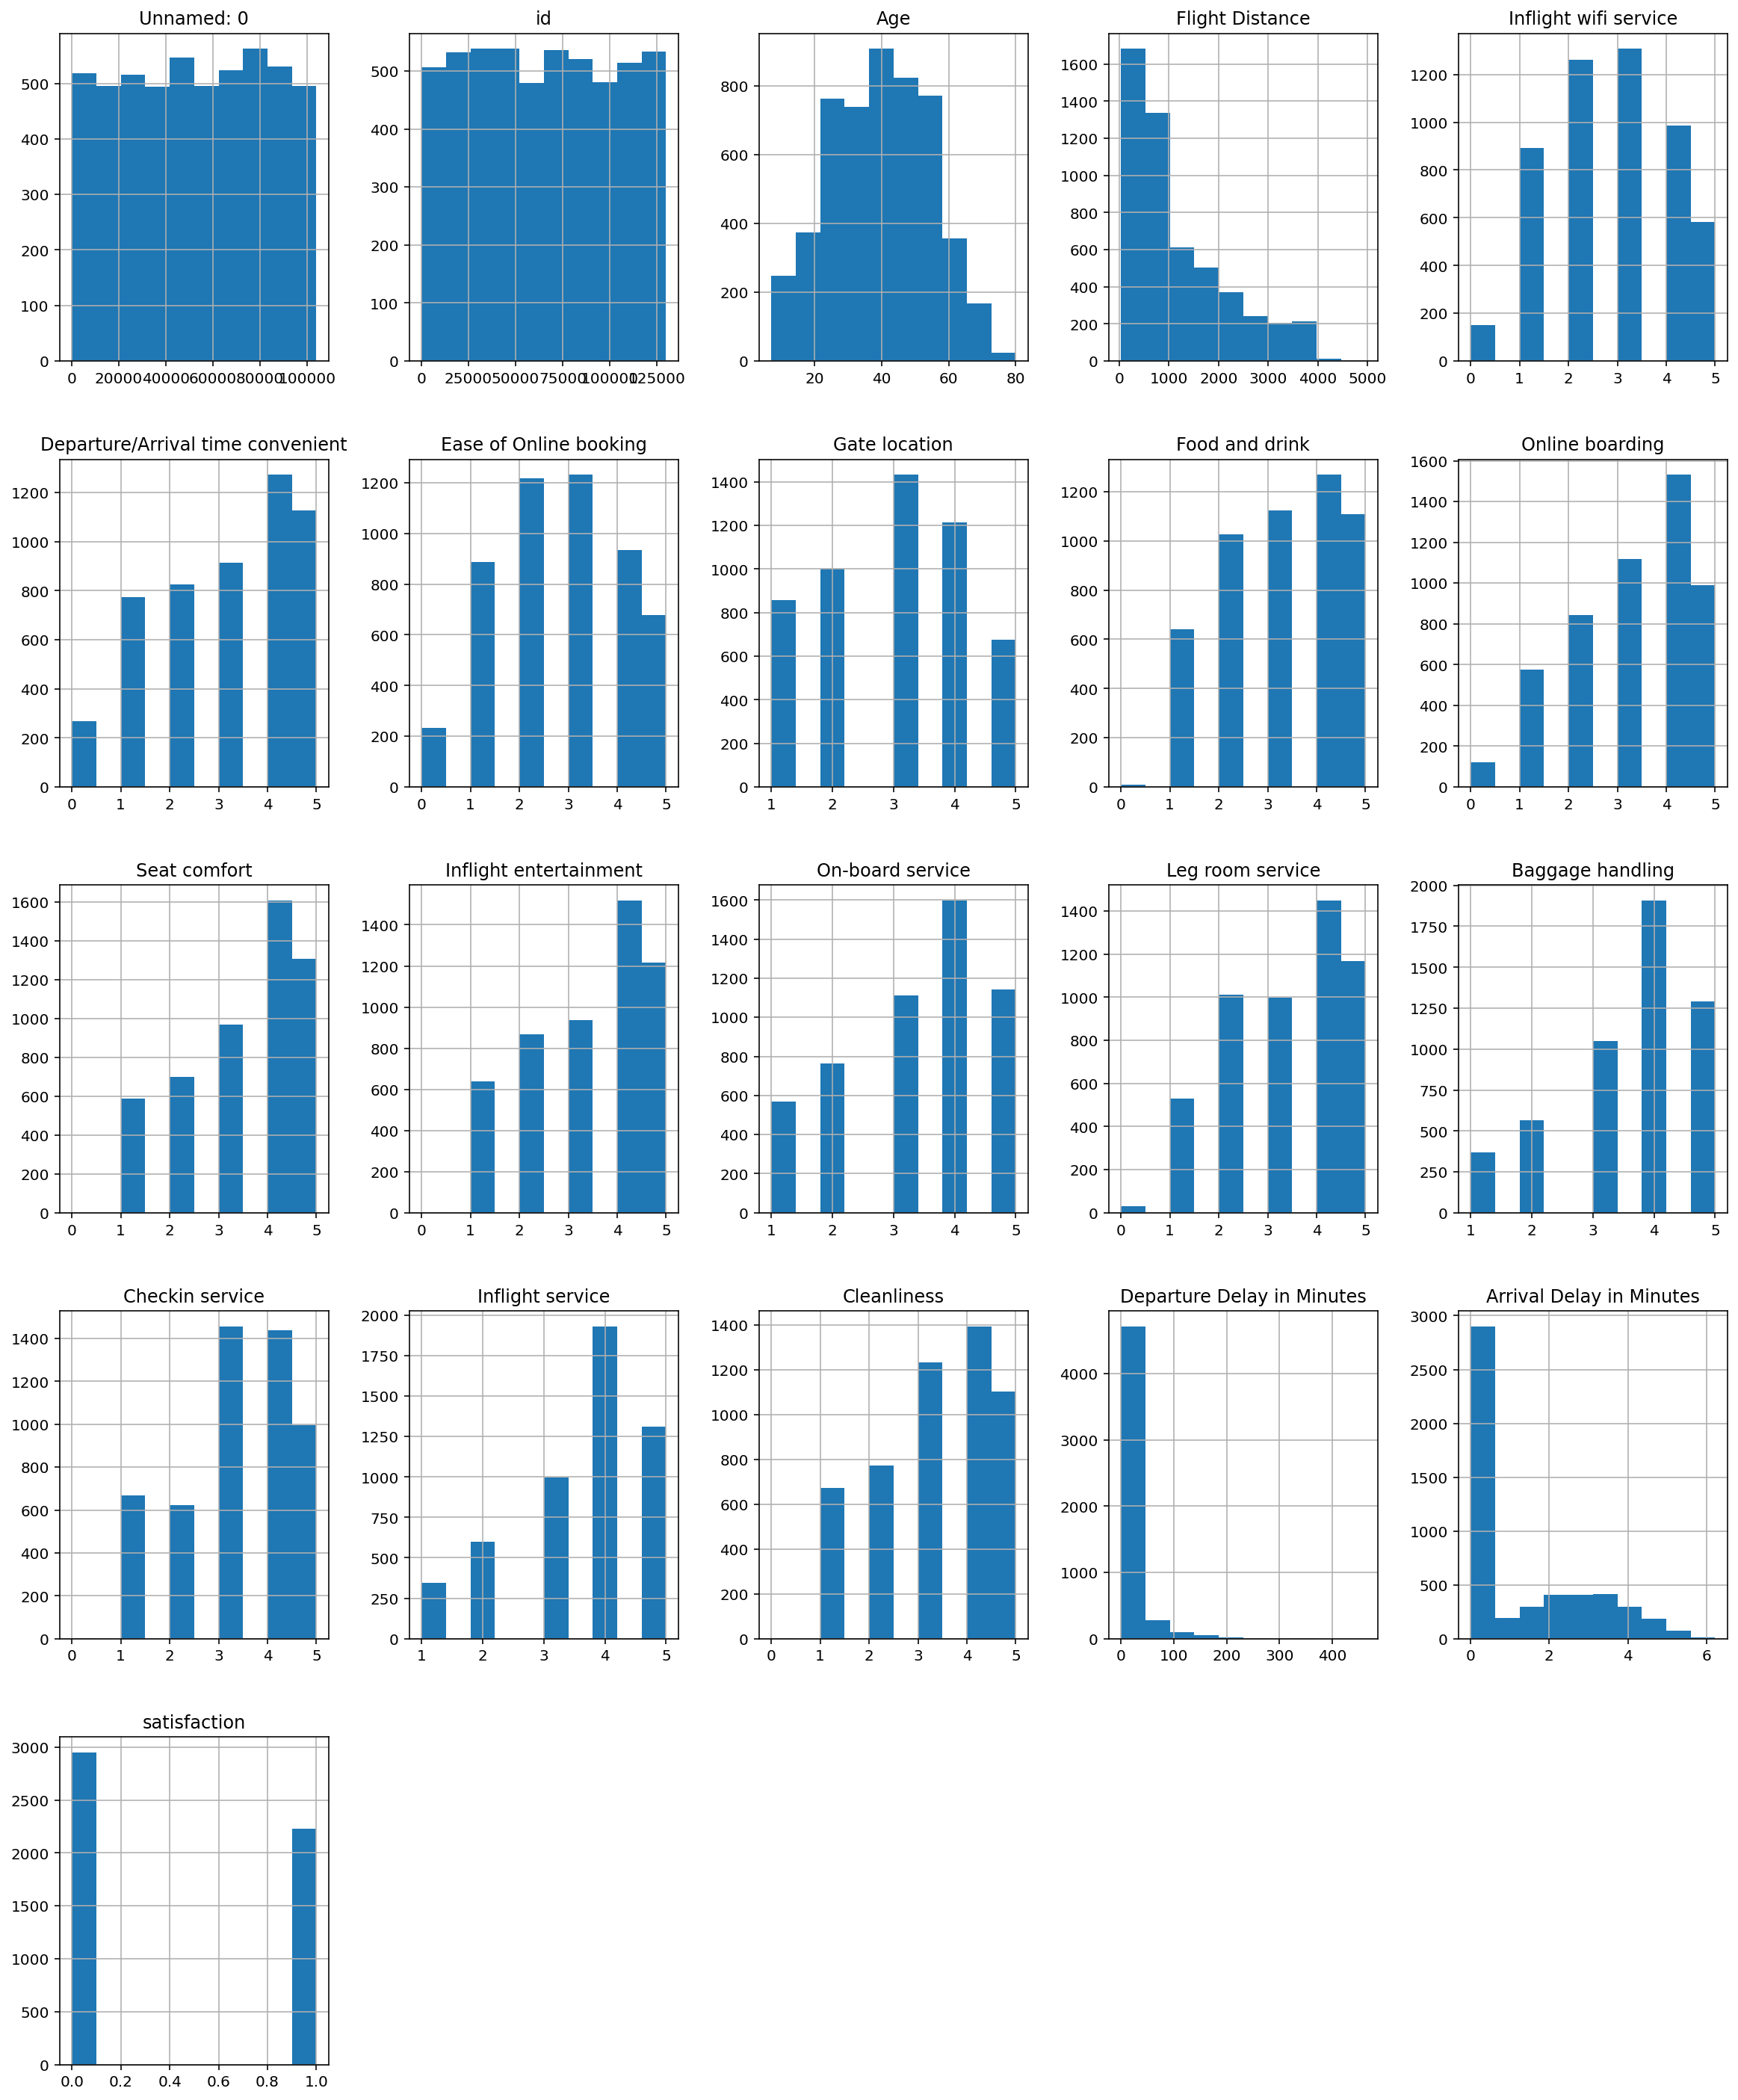

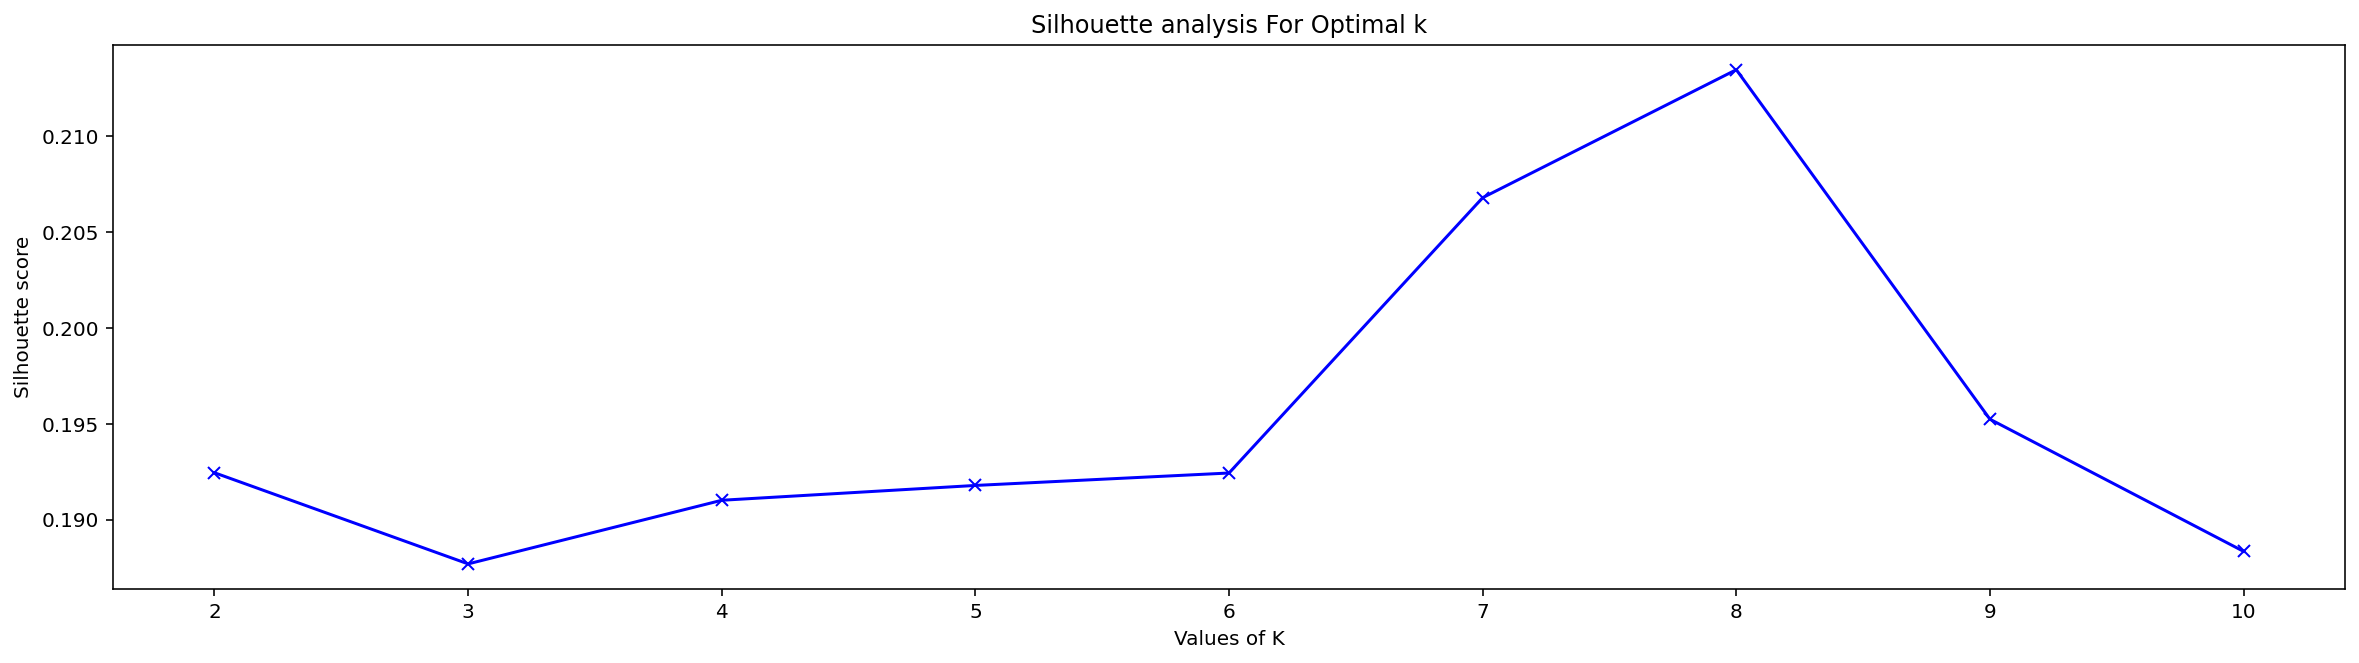

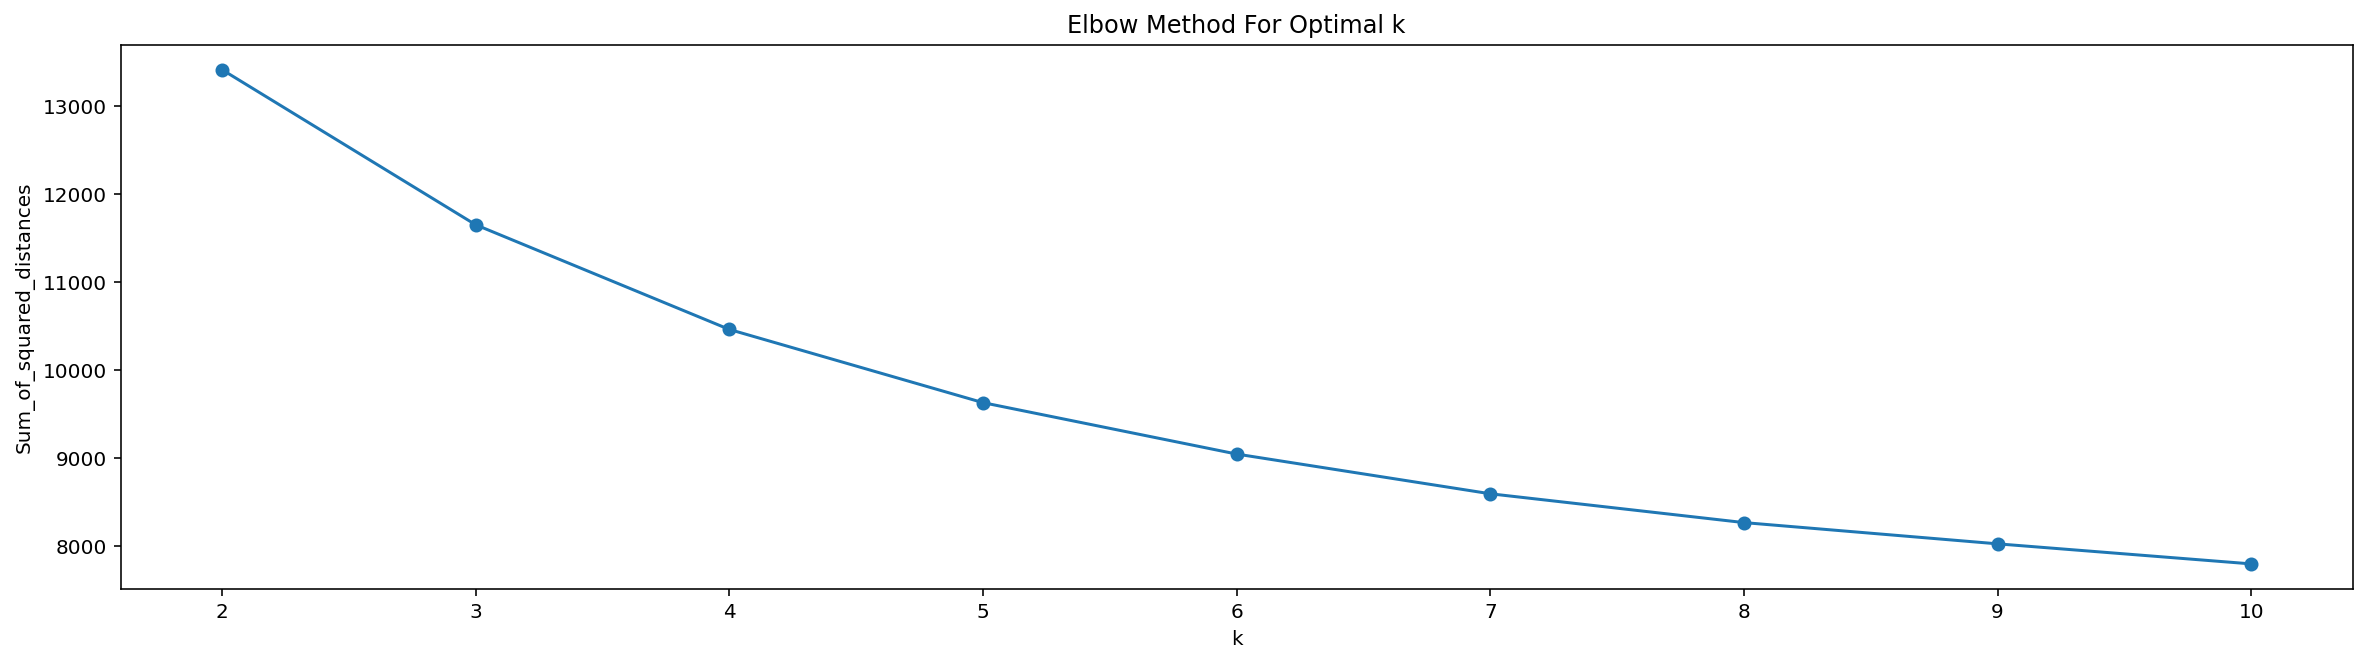

In [57]:
d6 = dataset('Airline Passenger Satisfaction-2.csv')
d6.data_preprocessing()
d6.normalization_scaling()

d6.make_X('satisfaction')

# d6.make_X('Class')

d6.Kmeans_find()


### For kmeans 7 clusters seems best observing the knee point on curves

centres of cluster [[ 4.99558391e-01  4.85854012e-01  4.32600720e-01  1.54832752e-01
   4.90417690e-01  7.20884521e-01  4.77641278e-01  4.72665848e-01
   6.31449631e-01  5.93366093e-01  6.71498771e-01  6.15724816e-01
   5.51597052e-01  5.75921376e-01  6.01351351e-01  6.58968059e-01
   5.96744472e-01  6.40049140e-01  2.90303066e-02  1.99340132e-01
   1.00000000e+00  3.33066907e-16  9.97542998e-01  2.45700246e-03
   1.11022302e-16  1.00000000e+00  6.63390663e-02  8.08353808e-01
   1.25307125e-01]
 [ 4.95467532e-01  5.30099547e-01  4.94864701e-01  3.81859496e-01
   5.57832512e-01  5.89753695e-01  5.89950739e-01  5.03448276e-01
   6.74876847e-01  7.64729064e-01  7.81674877e-01  7.37536946e-01
   6.69211823e-01  7.30049261e-01  6.93842365e-01  6.92216749e-01
   6.87931034e-01  7.05418719e-01  3.16675356e-02  2.01220214e-01
   2.22044605e-16  1.00000000e+00  1.00000000e+00 -8.32667268e-17
   1.00000000e+00 -3.33066907e-16  1.00000000e+00 -7.21644966e-16
  -2.77555756e-17]
 [ 5.00785646e-01  

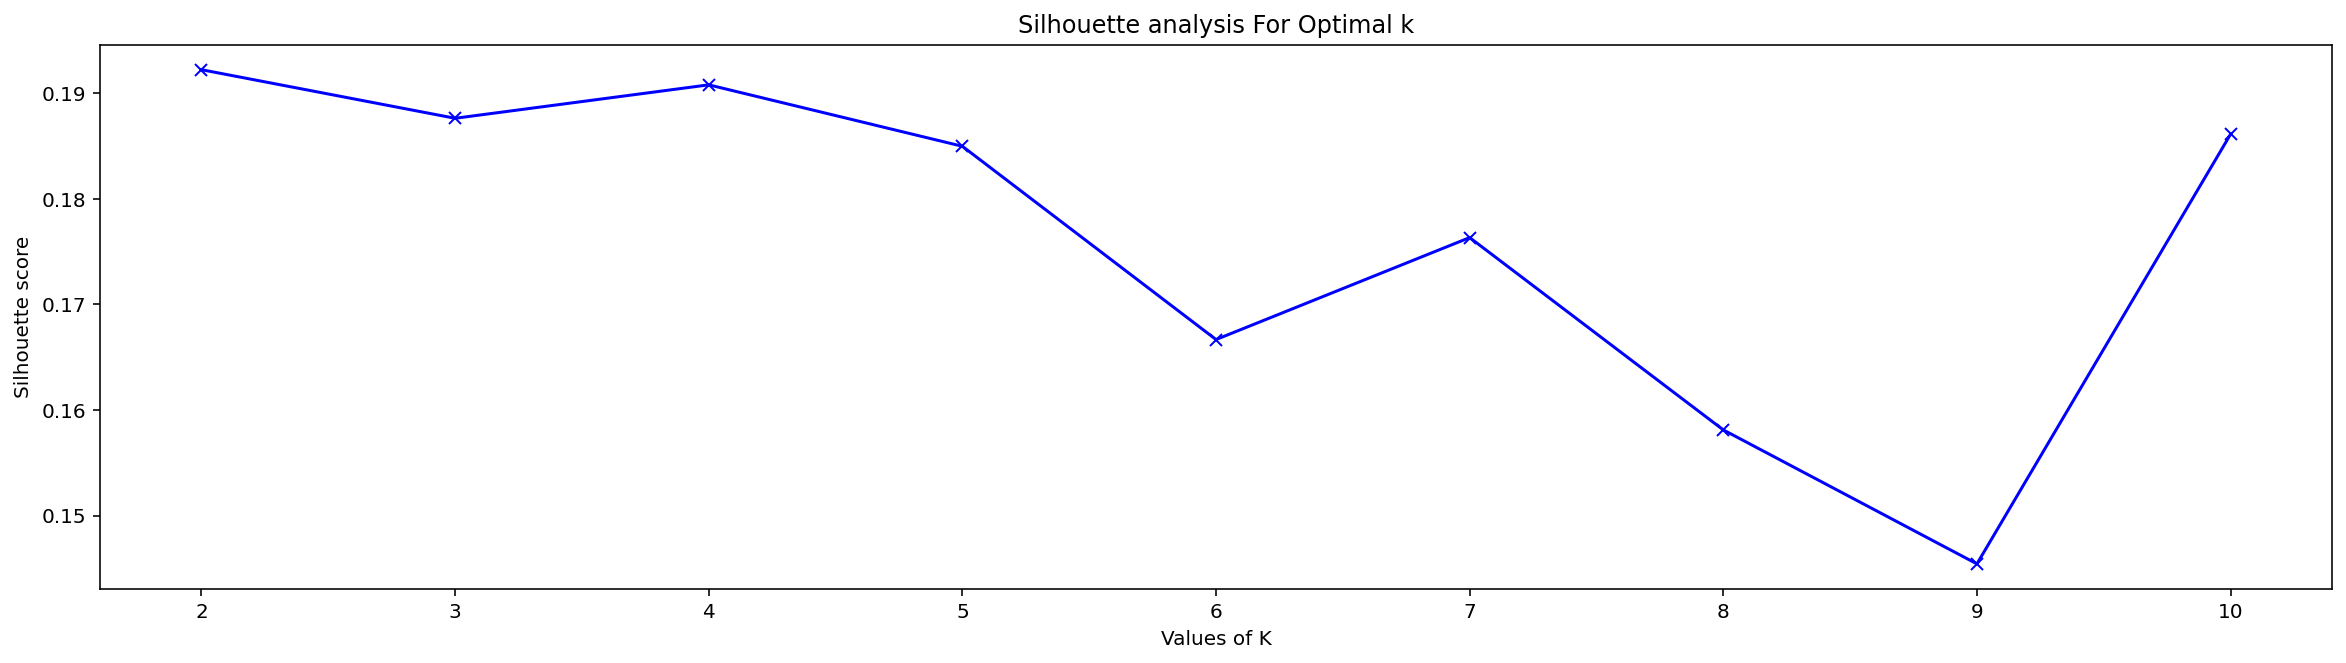

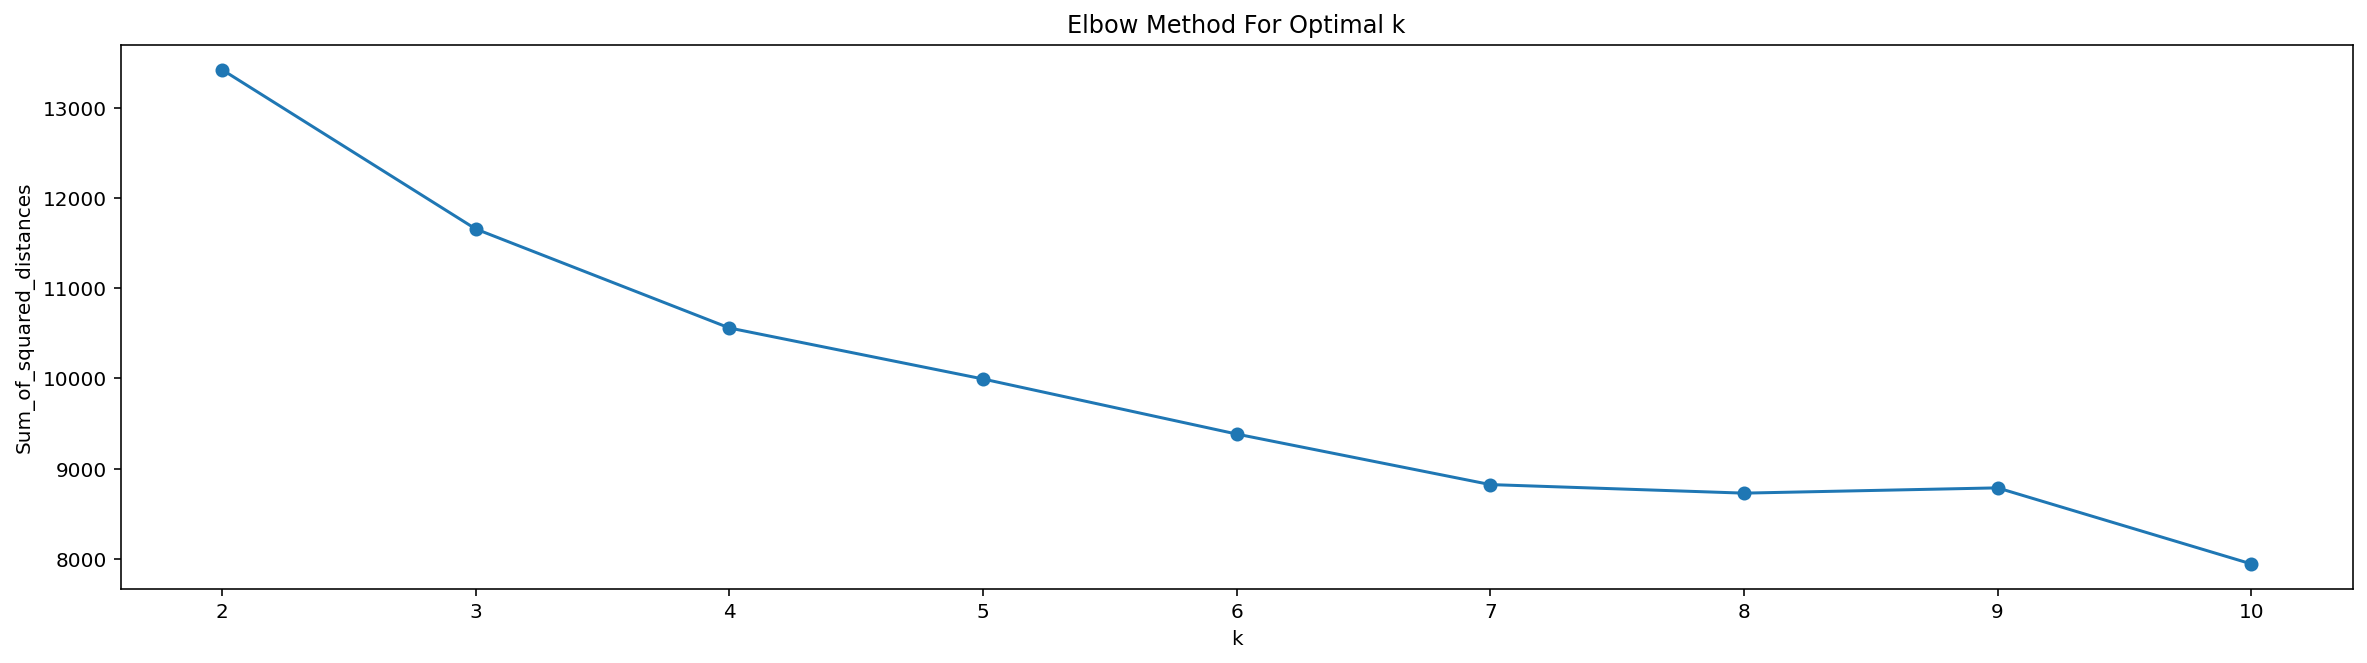

In [58]:
d6.kmean(7)
d6.kmeans_classification(2)
# d6.df1_knn
d6.minibatch_Kmeans_find()

### for Minibatch Kmeans 6 clusters look good observing the knee points of curve

Centere of clusters [[5.08069649e-01 5.20884948e-01 4.70088384e-01 3.28875221e-01
  5.68761499e-01 5.85784836e-01 5.88864143e-01 4.95303573e-01
  6.69816985e-01 7.37406798e-01 7.48232788e-01 7.30124915e-01
  6.73670960e-01 7.23888835e-01 7.03398857e-01 6.92243633e-01
  7.16471386e-01 6.90248862e-01 2.76906288e-02 2.00448913e-01
  9.99903166e-01 9.68335431e-05 8.41386656e-01 1.58613344e-01
  9.98450663e-01 1.54933669e-03 9.28440012e-01 4.35750944e-03
  6.72024789e-02]
 [5.14717873e-01 4.42977441e-01 3.90924985e-01 1.35276326e-01
  5.71223709e-01 5.11711281e-01 5.37021989e-01 5.09888862e-01
  6.17638623e-01 5.72251434e-01 6.14292543e-01 6.18761950e-01
  4.66867830e-01 6.06477055e-01 5.68564771e-01 5.60253346e-01
  5.63724904e-01 6.13551625e-01 3.23677261e-02 2.22978205e-01
  5.09560229e-01 4.90439771e-01 4.69646272e-01 5.30353728e-01
  9.99521989e-01 4.78011472e-04 0.00000000e+00 9.67495220e-01
  3.25047801e-02]
 [5.11971881e-01 5.10552710e-01 4.30838867e-01 1.42131061e-01
  5.05531295e-

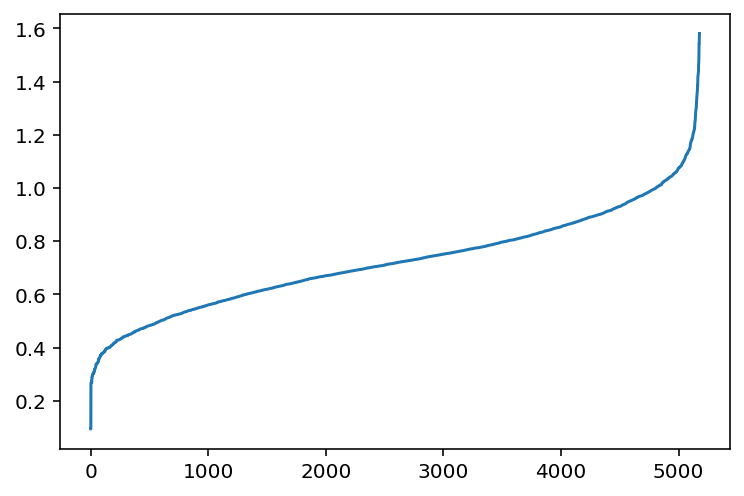

In [59]:
d6.minibatch_kmean(6)
d6.minibatch_kmeans_classification(2)
d6.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 1.0

[0 4 9 ... 3 1 4]
DBscan silhoutte score for espislon =  1.0  : 0.1390091002100476
DBI score for espislon =  1.0  : 2.056118754298297
[ 0 -1 -1 ...  6 -1  0]
DBscan silhoutte score for espislon =  1.0  : 0.09476762525042469
DBscan DBI score for espislon =  1.0  : 2.0435212604062944
DBscan fowlkes score on train data for espislon =  1.0   : 0.3815635827316787
DBscan fowlkes score on test data for espislon =  1.0   : 0.5292091416403176
DBscan ARI score on train data for espislon =  1.0   : 0.09662484810891046
DBscan ARI score on test data for espislon =  1.0   : 0.16949074242133244
DBscan Mutual Information score on train data for espislon =  1.0   : 0.19348159928663905
DBscan Mutual Information on test data for espislon =  1.0   : 0.2255649500005182
DBscan V-measure score on train data for espislon =  1.0   : 0.14577658575800398
DBscan V-measure score on test data for espislon =  1.0   : 0.22432367710132414
DBscan Homogeneity score on train data for espislon =  1.0   : 0.283175638764585

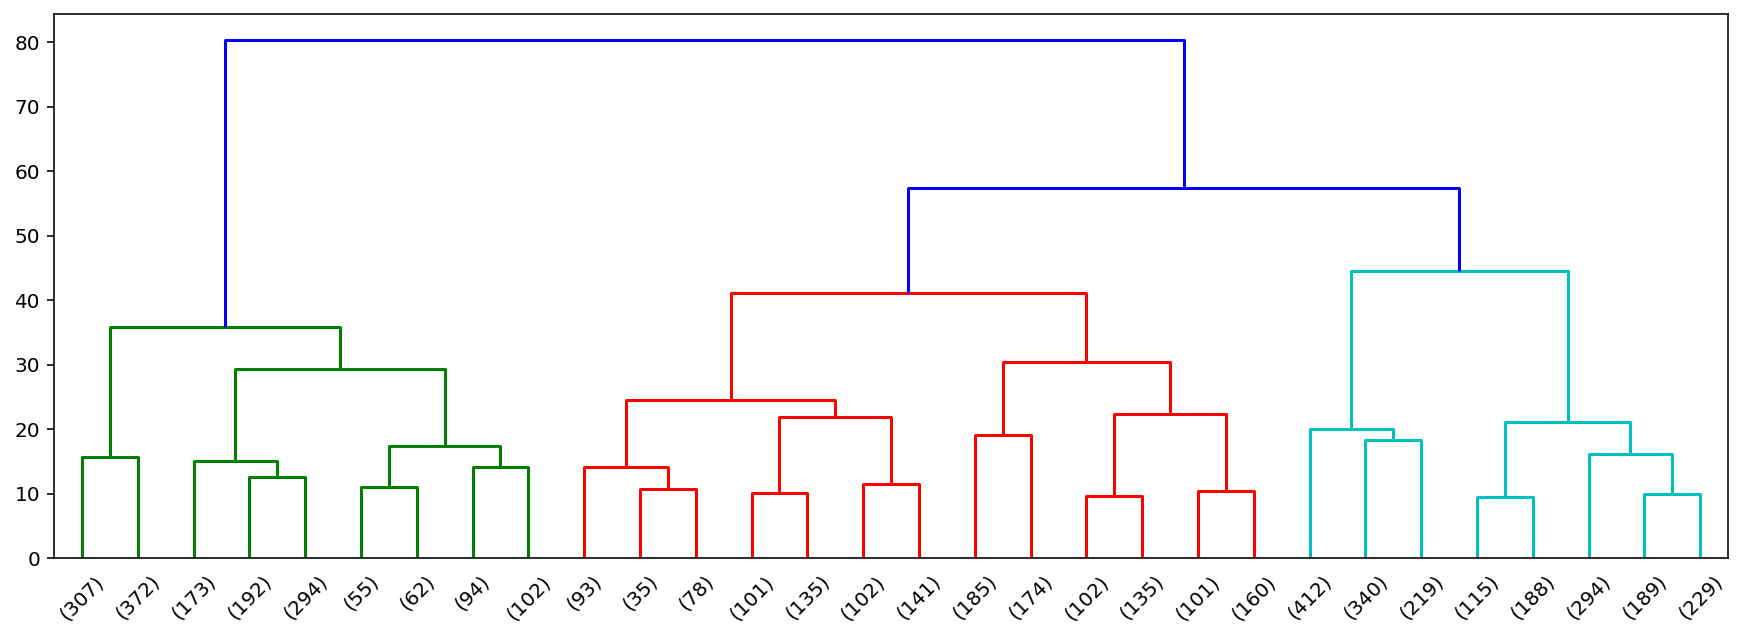

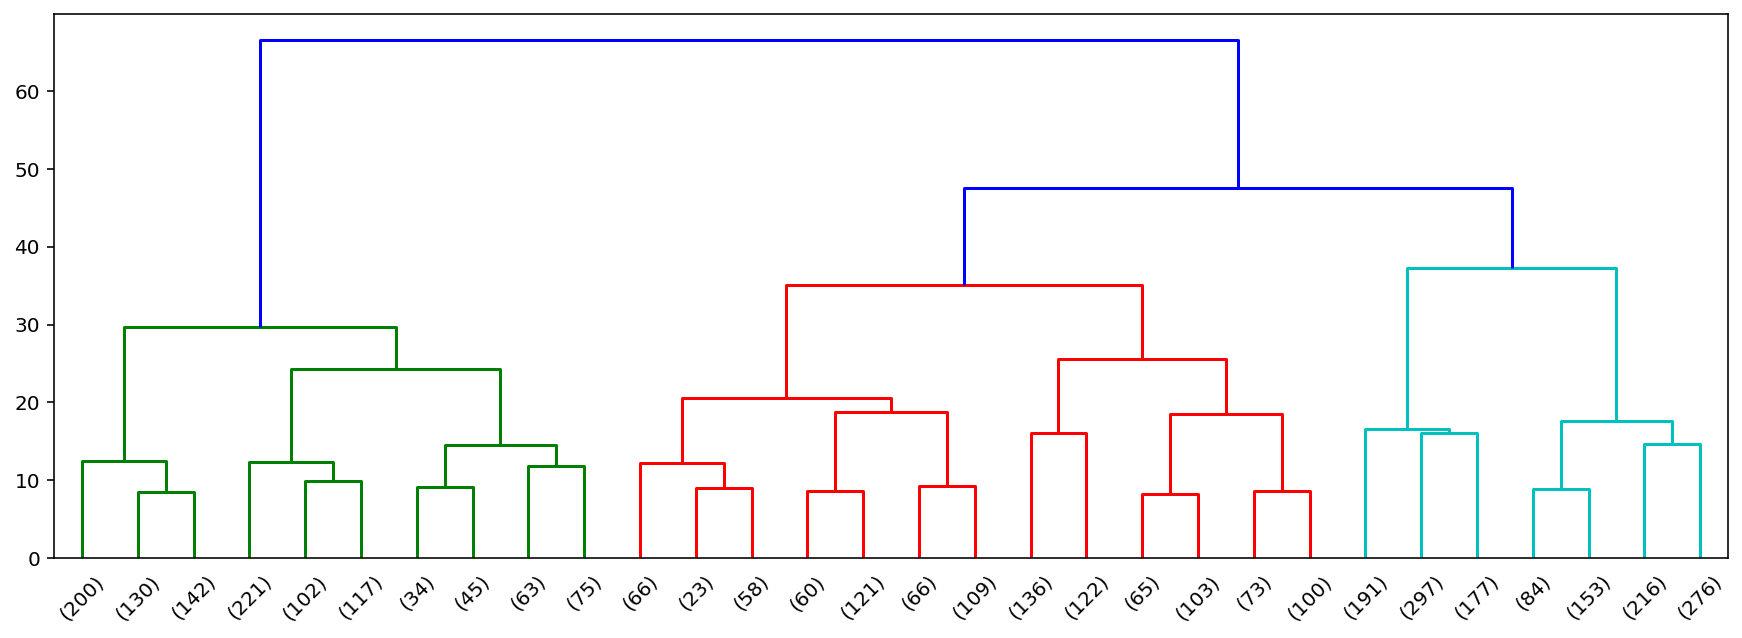

In [60]:
d6.dbscan(1.0)

d6.dbscan_clustering(1.0)

d6.agglomerative(6)

d6.agglomerative_classification(2)

d6.optics()

d6.optics_clustering()

d6.MeanShift(0.5)
d6.MeanShift_clustering(0.5)

In [61]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3      0.179662  2.087443  0.550929  0.096687            0.051600   0.074843   
4      0.153581  2.374335  0.607560  0.001075            0.000802   0.001427   
5      0.190709  2.020178  0.643390  0.280701            0.150007   0.217848   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852  
3     0.075226  
4     0.001860  
5     0.219256

In [62]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   
3        0.178279  2.094276  0.505301  0.004753            0.003520   
4        0.153581  2.374335  0.607560  0.001075            0.000802   
5        0.199156  1.837586  0.597871  0.142987            0.114275   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852  
3   0.005106     0.005131  
4   0.001427     0.001860  
5   0.172823     0.167029

In [63]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3       0.179662  2.087443  0.505531  0.005301            0.003772   0.005471   
4       0.110494  2.807480  0.608229 -0.002643            0.000300   0.000536   
5       0.199156  1.837586  0.597580  0.141994            0.113777   0.172127   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852  
3     0.005499  
4     0.000696  
5     0.166301

In [64]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   
3      0.251257  1.503091  0.212594  0.010270        5.750782e-02   
4      0.117229  1.745240  0.540082 -0.081469        2.281667e-02   
5      0.094768  2.043521  0.529209  0.169491        2.255650e-01   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15  
3  3.498262e-02  8.383922e-02  
4  2.864376e-02  5.292742e-02  
5  2.243237e-01  3.296950e-01

In [65]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   
3       0.200841  1.789074  0.321021  0.006069            0.040709   0.030886   
4       0.026327  1.551314  0.294114 -0.014307            0.046397   0.034602   
5       0.233344  1.737948  0.354198  0.098641            0.201100   0.140162   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750  
3     0.059348  
4     0.107626  
5     0.293936

In [66]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   
3        0.131901        0.656243  0.033470  0.000519        5.247248e-01   
4        0.113212        1.769752  0.861077  0.166103        2.710509e-02   
5        0.012265        0.281499  0.012042  0.000143        6.841626e-01   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15  
3  1.587164e-01  7.649832e-01  
4  8.986267e-02  6.287517e-02  
5  1.715329e-01  1.000000e+00

# 7th Dataset

(2500, 13)
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')
Type
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (2500, 14)
Shape of y : (2500,)
kmeans  2  : 0.46272210730511604
kmeans  3  : 0.540443843608129
kmeans  4  : 0.37929808911857854
kmeans  5  : 0.3926950284682453
kmeans  6  : 0.3880056430678634
kmeans  7  : 0.30340319322990345
kmeans  8  : 0.31448666741004244
kmeans  9  : 0.3021264214505579
kmeans  10  : 0.307169072238768


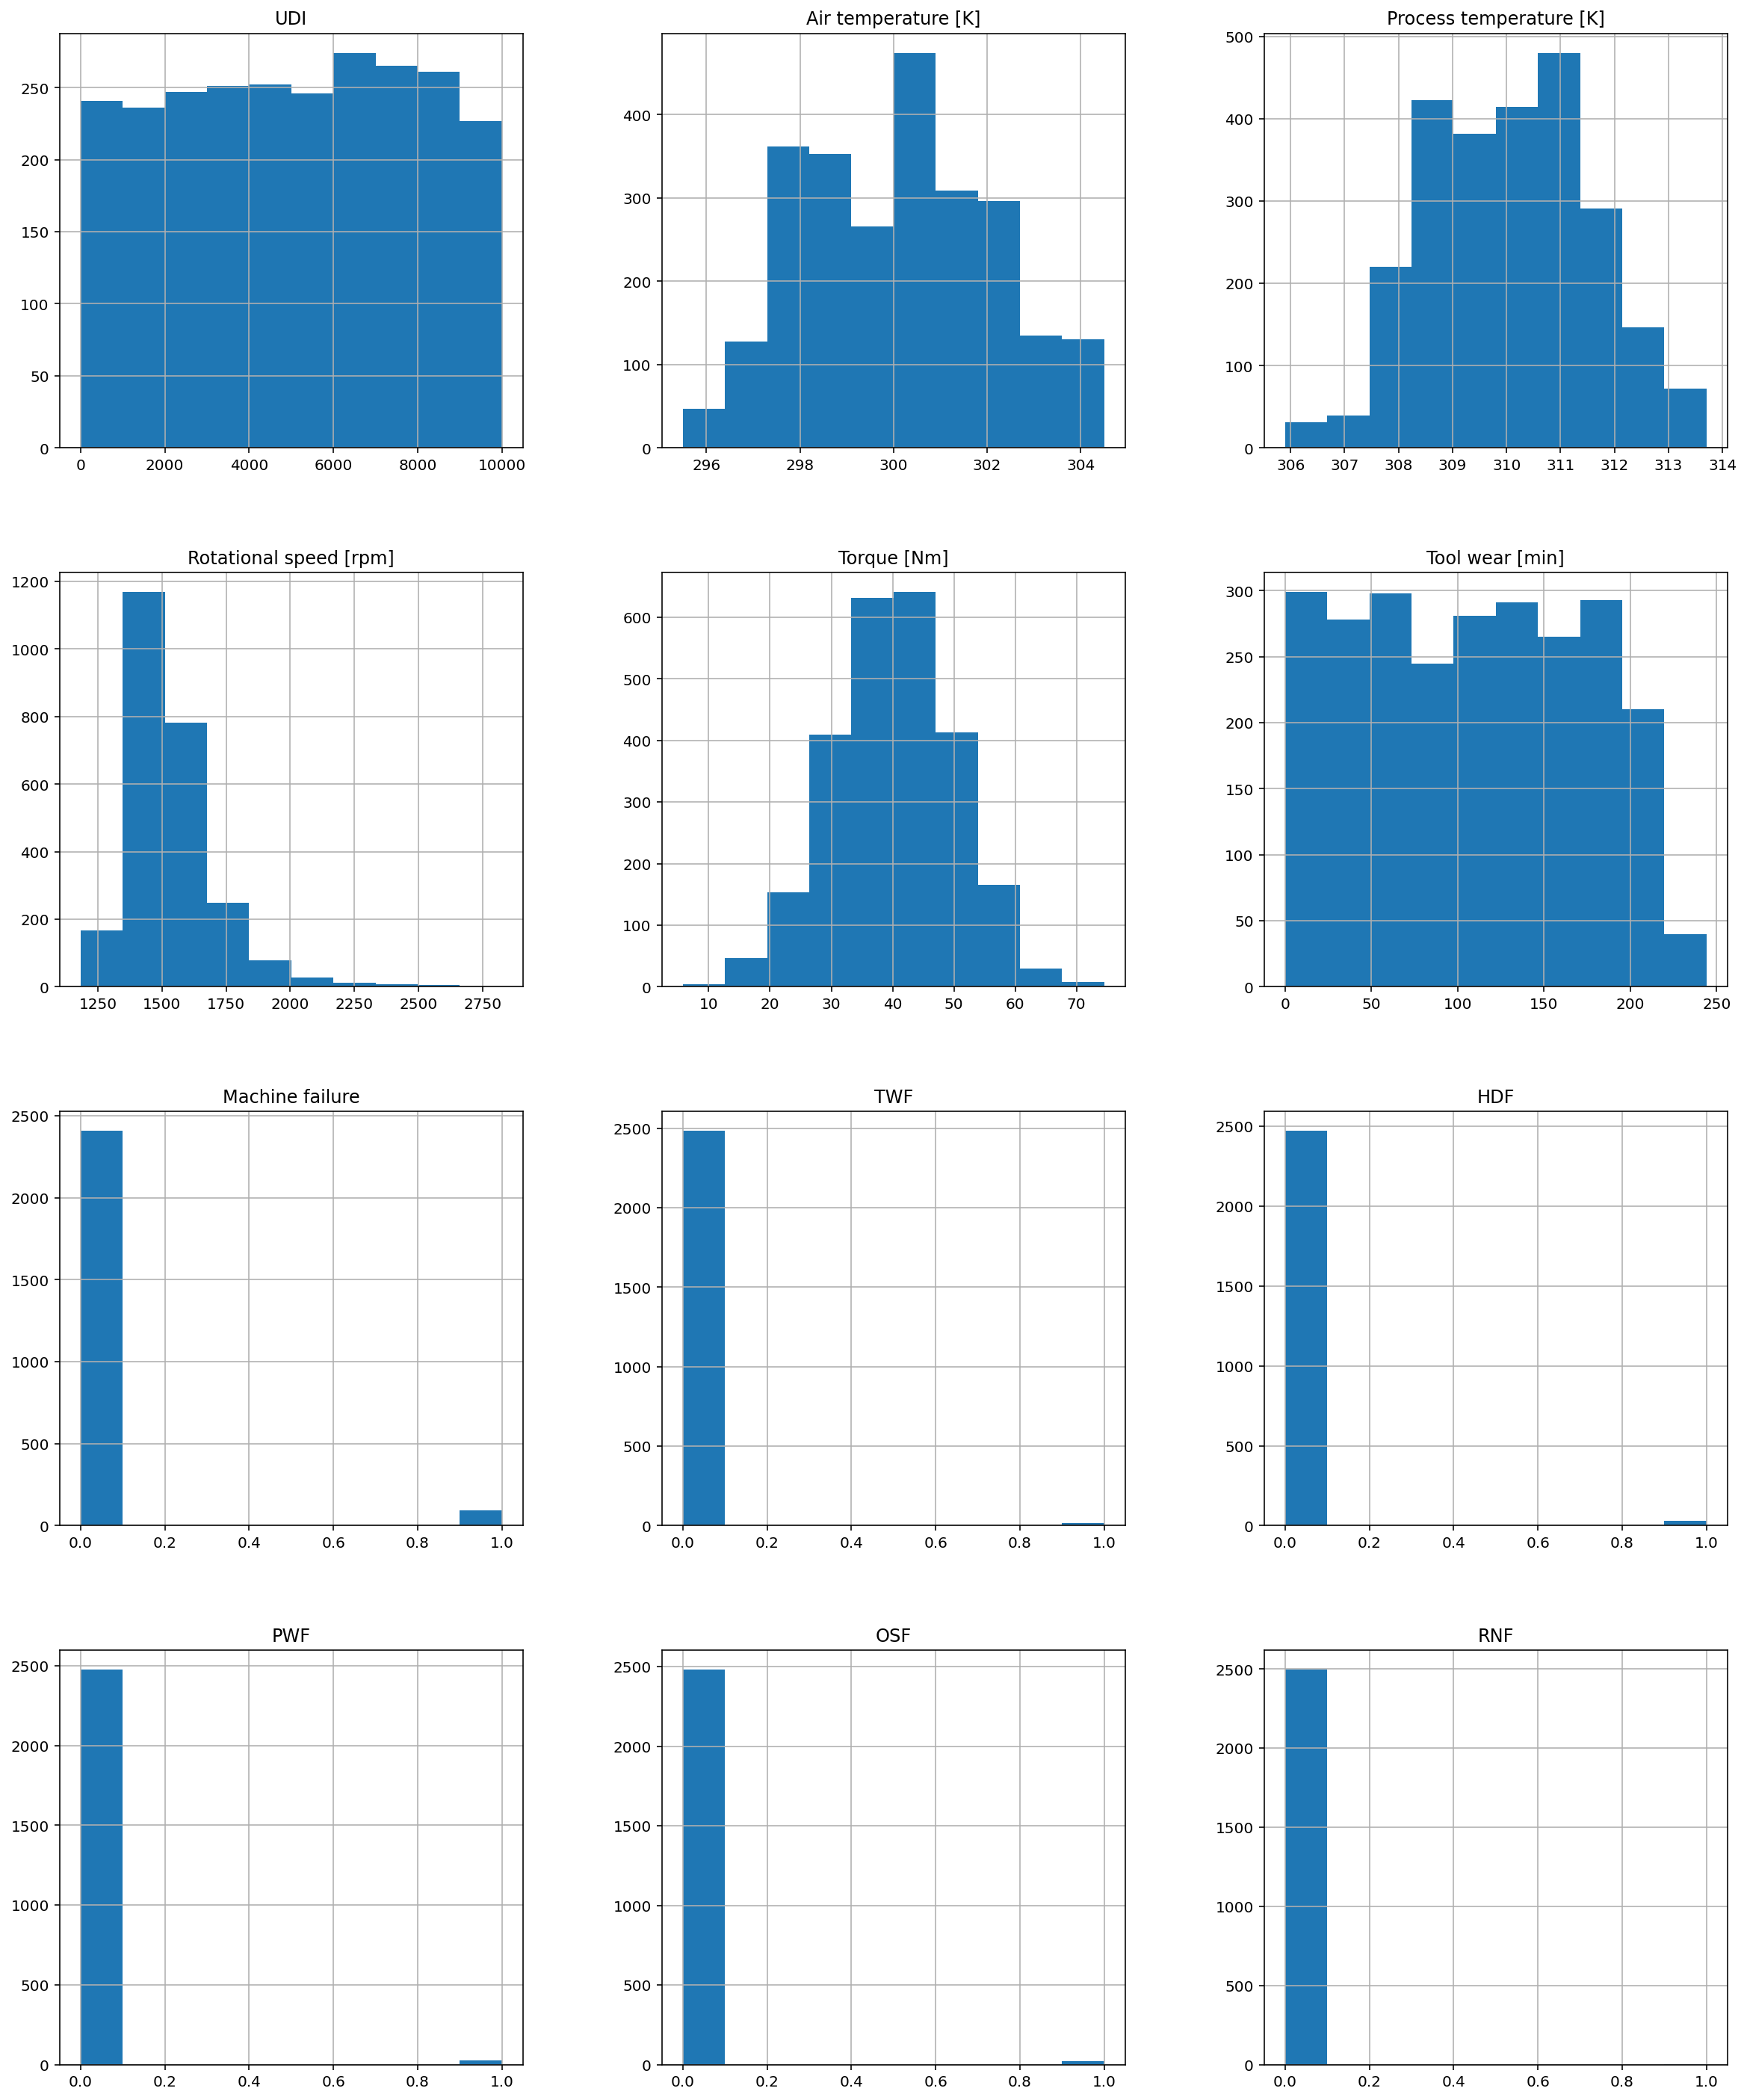

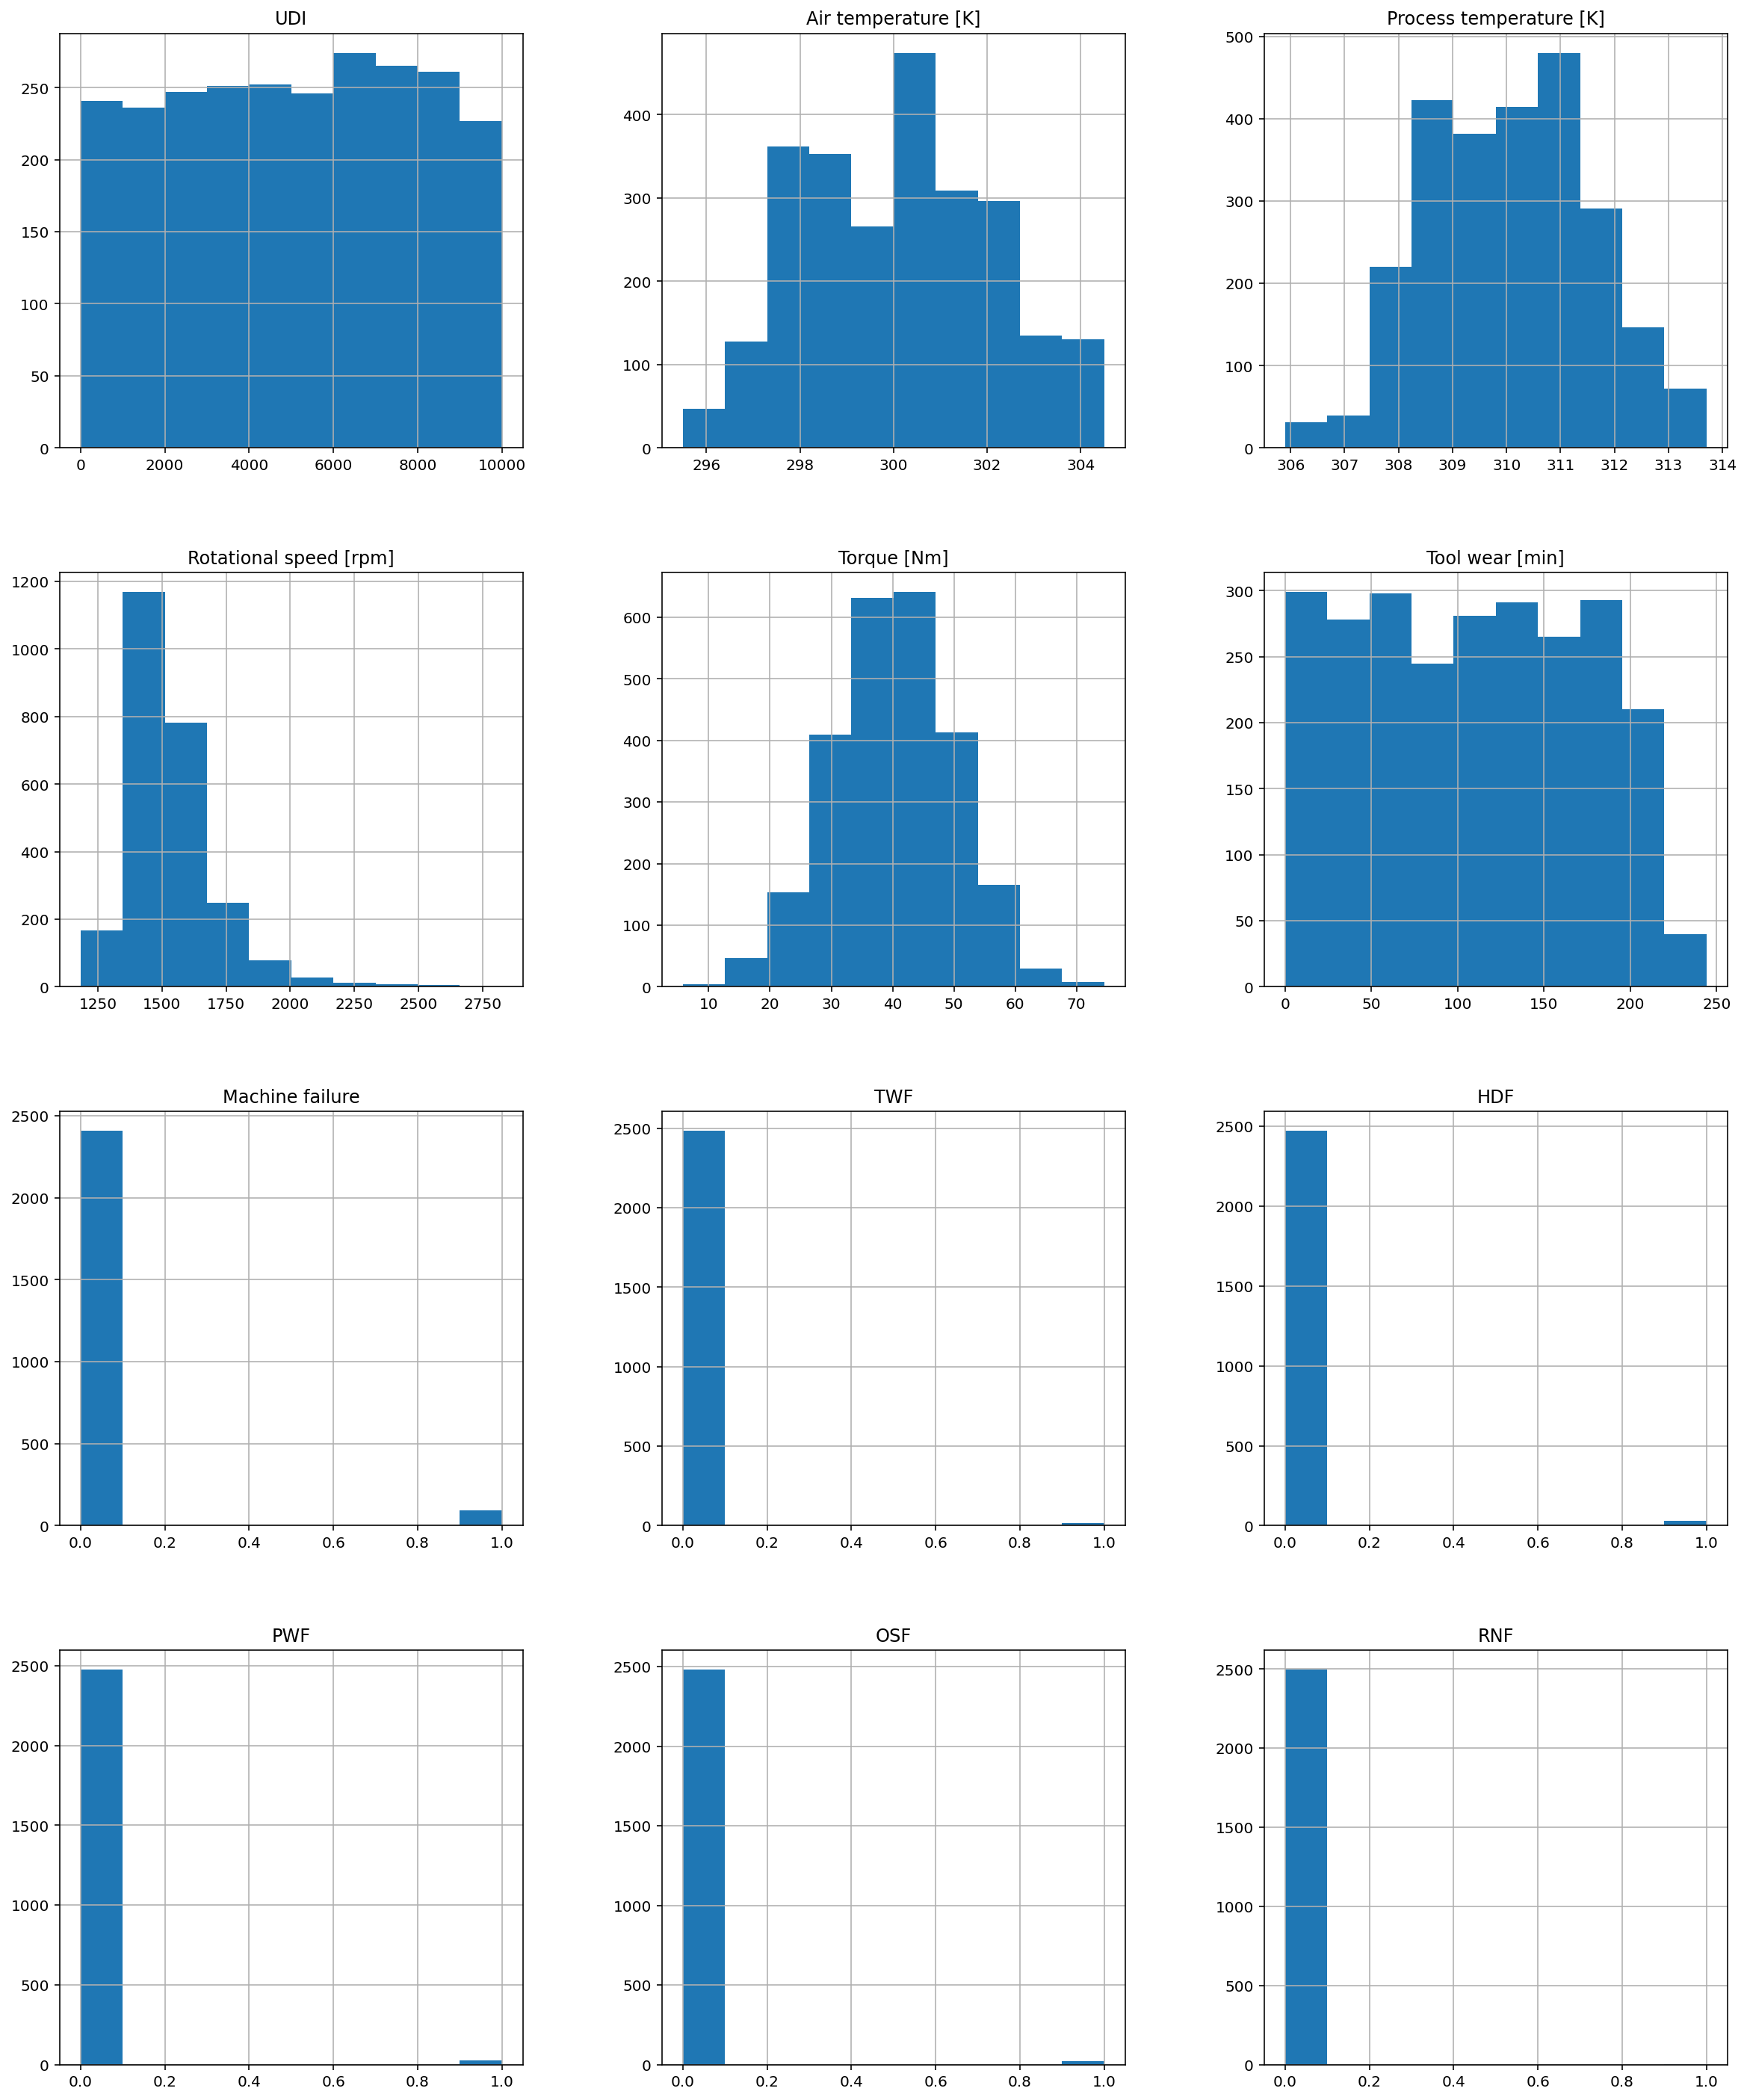

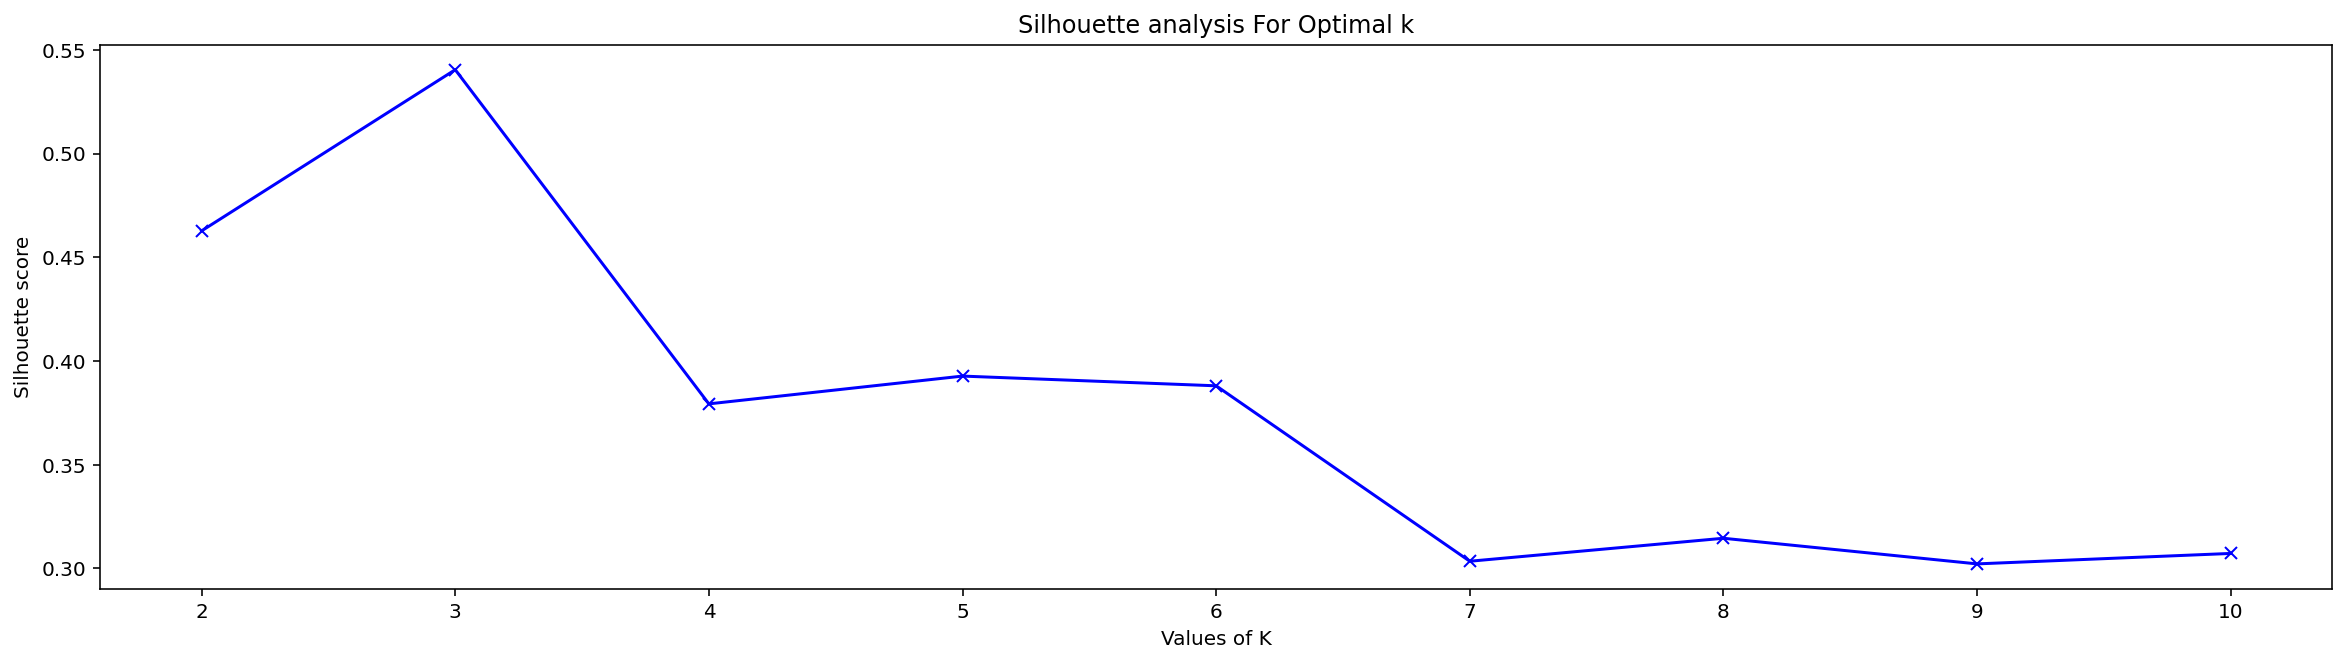

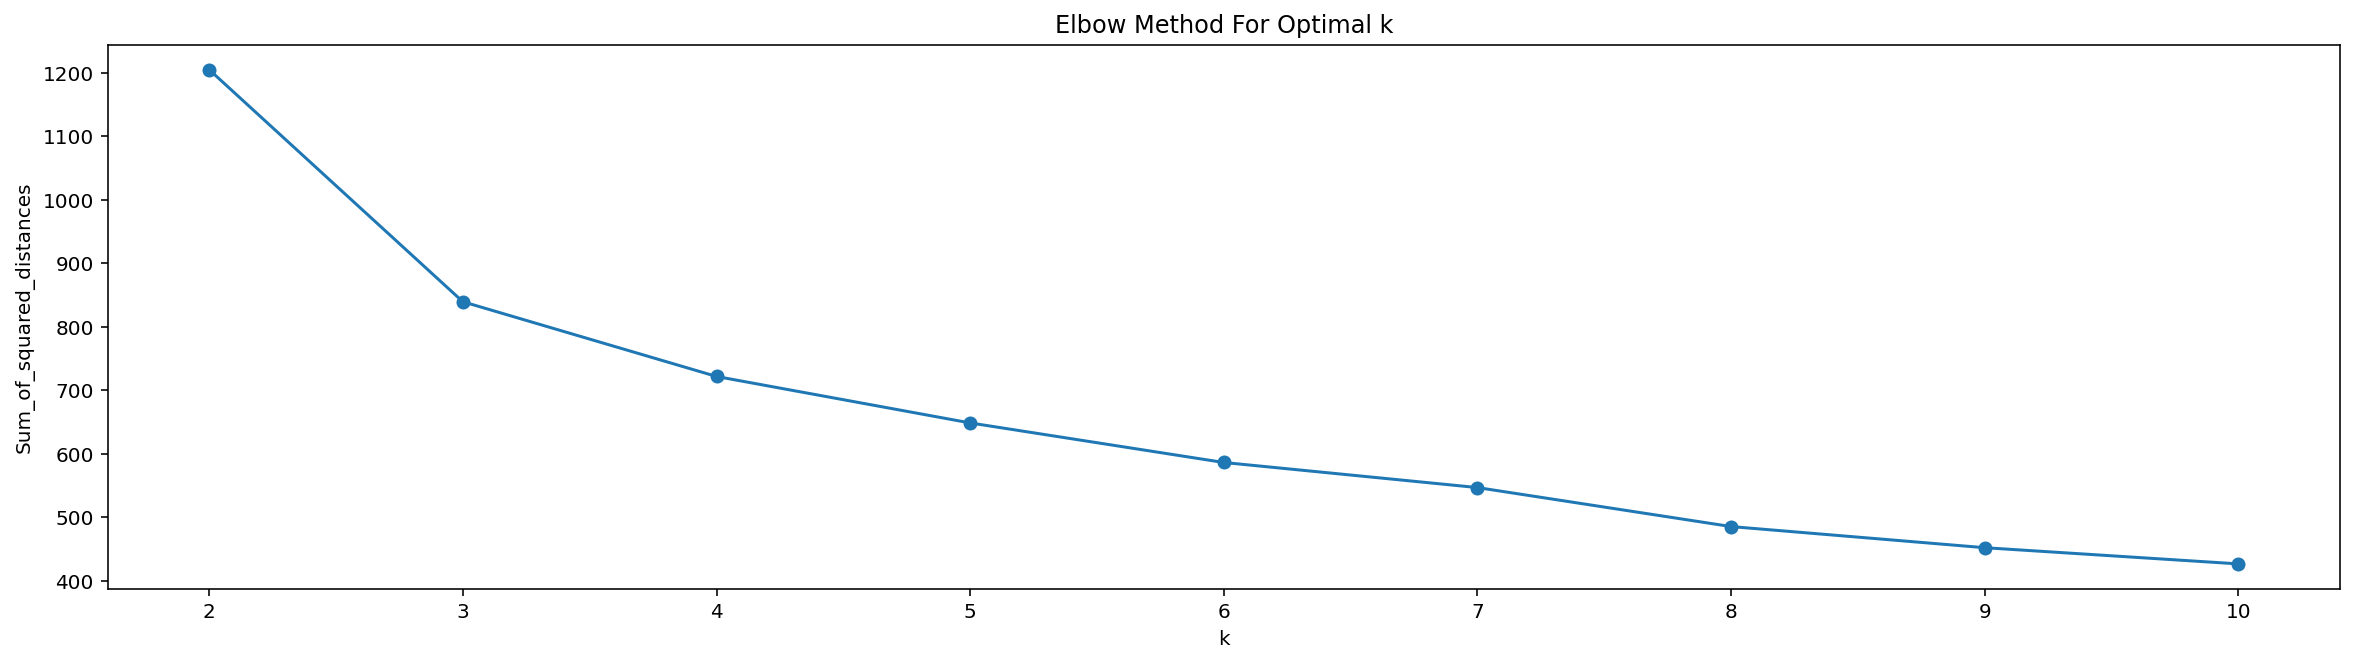

In [67]:
d7 = dataset('Predictive Maintenance-2.csv')
d7.data_preprocessing()
d7.normalization_scaling()

d7.make_X('TWF')

# d7.make_X('Class')

d7.Kmeans_find()


### For kmeans 3 clusters seems best observing the knee point on curves

centres of cluster [[ 5.08509436e-01  5.09239212e-01  5.33395788e-01  2.13818506e-01
   5.02887572e-01  4.49128197e-01  4.12719892e-02  1.42083897e-02
   1.08254398e-02  1.15020298e-02  2.70635995e-03  1.66533454e-16
   1.00000000e+00  2.77555756e-16]
 [ 4.97318289e-01  5.03925737e-01  5.27914050e-01  2.15418293e-01
   4.96258875e-01  4.31828162e-01  3.31632653e-02  1.14795918e-02
   1.02040816e-02  3.82653061e-03 -1.30104261e-18 -1.11022302e-16
  -4.44089210e-16  1.00000000e+00]
 [ 4.98584024e-01  4.96171802e-01  5.26718380e-01  2.19892220e-01
   4.90544689e-01  4.45378151e-01  2.10084034e-02  4.20168067e-03
   4.20168067e-03 -5.20417043e-18  4.20168067e-03  1.00000000e+00
  -3.33066907e-16  1.66533454e-16]]
kmeans silhoutte score for  3  : 0.540443843608129
kmeans DBI score for k =  3  : 0.7506928283322005
centres of cluster [[ 5.03878593e-01  5.06978614e-01  5.31578166e-01  2.17764154e-01
   4.93384480e-01  4.37504448e-01  3.18379161e-02  7.23589001e-03
   1.30246020e-02  2.89435601

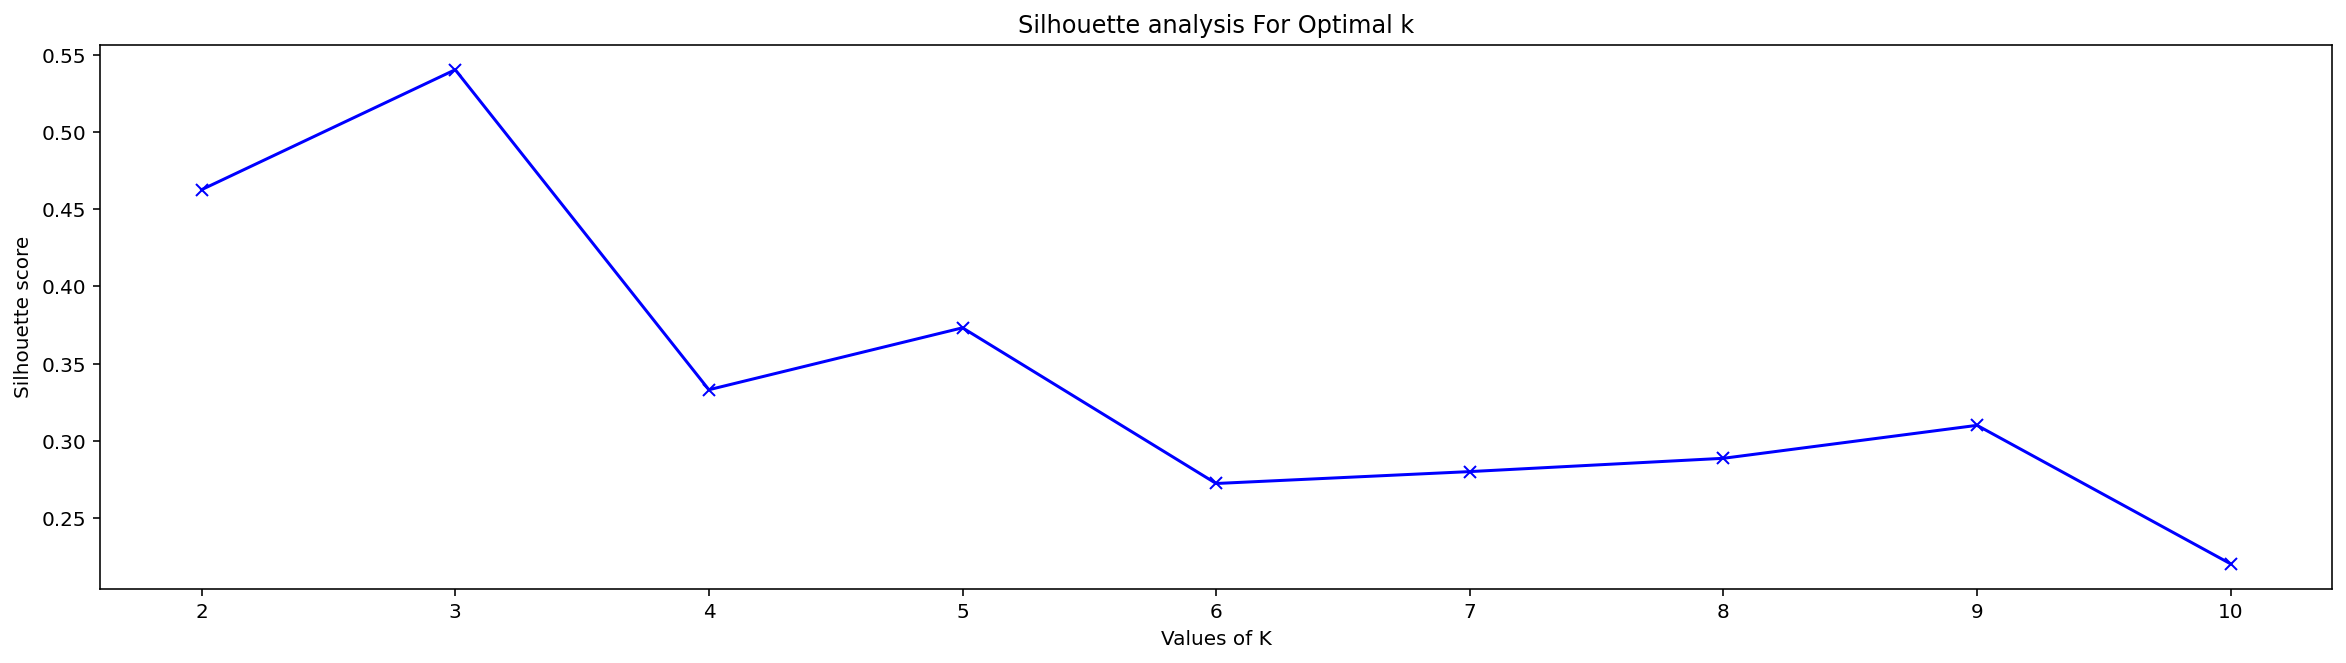

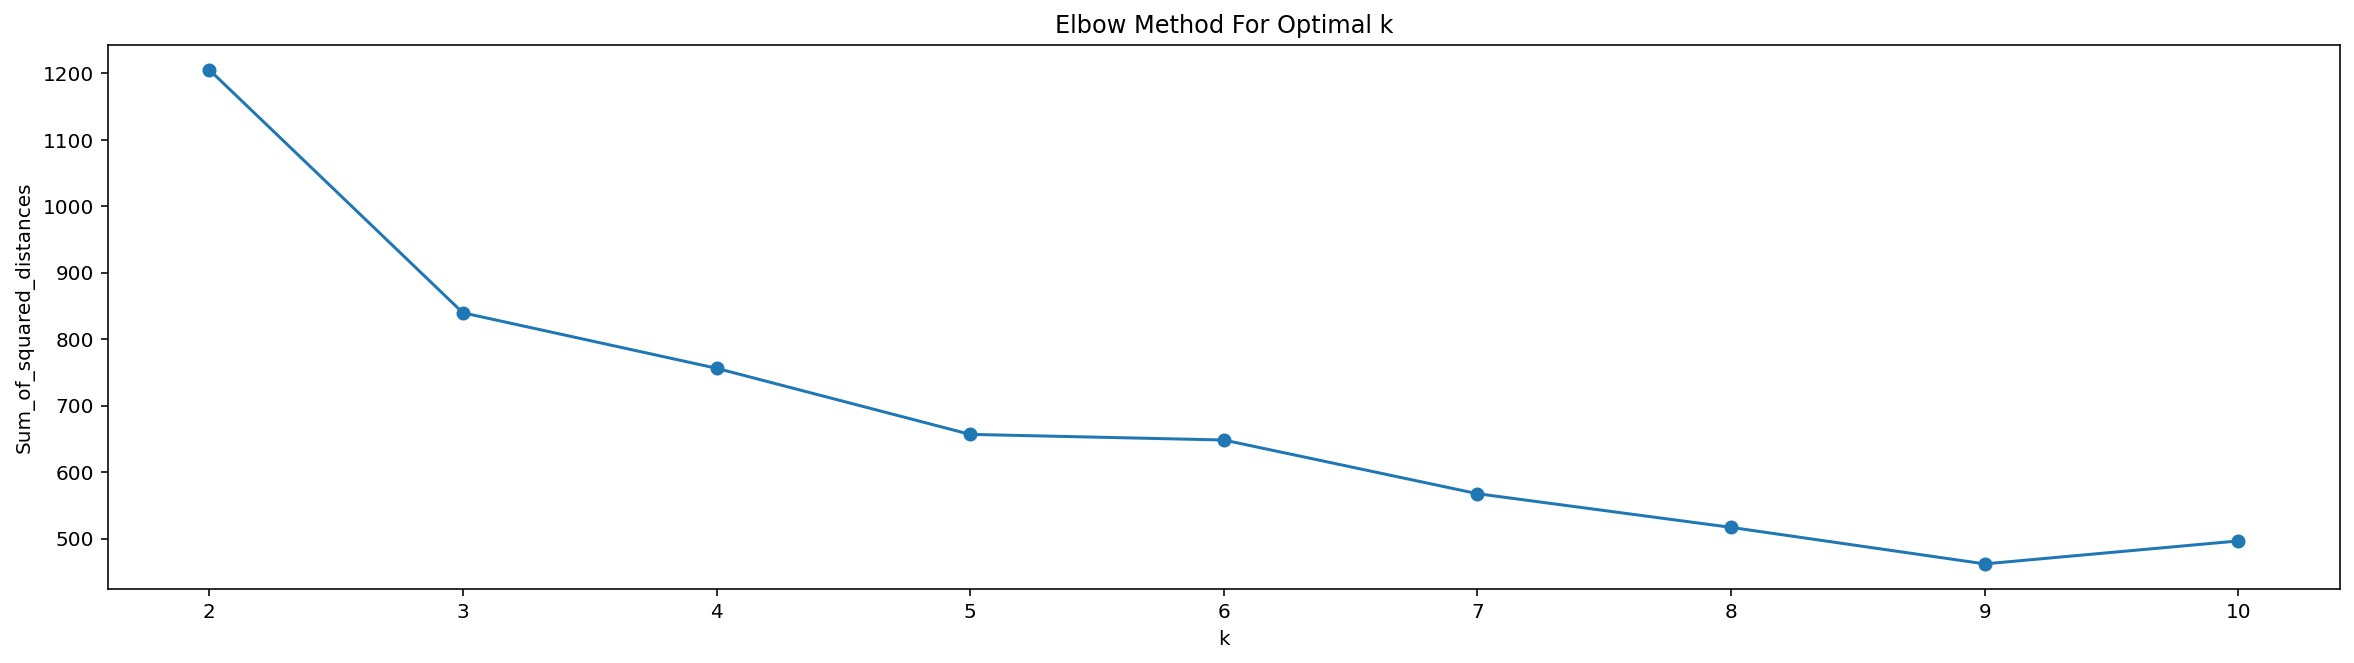

In [68]:
d7.kmean(3)
d7.kmeans_classification(2)
# d7.df1_knn
d7.minibatch_Kmeans_find()

### for Minibatch Kmeans 3 clusters look good observing the knee points of curve

Centere of clusters [[0.5092506  0.50972904 0.5337813  0.21513155 0.50123953 0.45084231
  0.04258714 0.0139298  0.01037064 0.0118434  0.00355916 0.
  1.         0.        ]
 [0.49851384 0.50706229 0.52958073 0.21542467 0.49563011 0.43612791
  0.03277378 0.0121046  0.00970652 0.00388261 0.         0.
  0.         1.        ]
 [0.4969399  0.49933633 0.53095203 0.22028707 0.49025811 0.44043558
  0.0238921  0.00462428 0.00462428 0.         0.00462428 1.
  0.         0.        ]]
Mini Batch kmeans silhoutte score for  3  : 0.540443843608129
Mini Batch kmeans DBI score for k =  3  : 0.7506928283322005
Centere of clusters [[0.50636932 0.50929703 0.53439825 0.21484339 0.49949966 0.44817389
  0.03679264 0.01069786 0.0109978  0.0074985  0.00379924 0.13847231
  0.86152769 0.        ]
 [0.49598229 0.50891658 0.52900441 0.21644623 0.49338295 0.43863901
  0.03391786 0.00899862 0.01269036 0.0020766  0.         0.00692201
  0.         0.99307799]]
kmeans fowlkes score on train data for k =  2  : 0.757

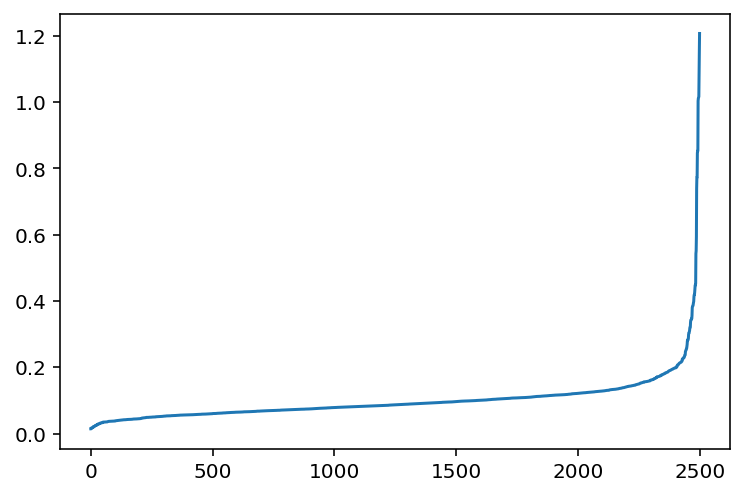

In [69]:
d7.minibatch_kmean(3)
d7.minibatch_kmeans_classification(2)
d7.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.2

[ 0 -1 -1 ...  1  2  0]
DBscan silhoutte score for espislon =  0.2  : 0.29606635521407915
DBI score for espislon =  0.2  : 1.6091125725480213
[-1  0 -1 ...  0 -1  0]
DBscan silhoutte score for espislon =  0.2  : 0.21320628969726438
DBscan DBI score for espislon =  0.2  : 1.6412307633809617
DBscan fowlkes score on train data for espislon =  0.2   : 0.6227914289349854
DBscan fowlkes score on test data for espislon =  0.2   : 0.8895739427651648
DBscan ARI score on train data for espislon =  0.2   : 0.0033192033479534787
DBscan ARI score on test data for espislon =  0.2   : -0.00706711596104427
DBscan Mutual Information score on train data for espislon =  0.2   : 0.00883048747785227
DBscan Mutual Information on test data for espislon =  0.2   : 0.0004641249562876912
DBscan V-measure score on train data for espislon =  0.2   : 0.014262999021051801
DBscan V-measure score on test data for espislon =  0.2   : 0.0020841759048830367
DBscan Homogeneity score on train data for espislon =  0.2   : 

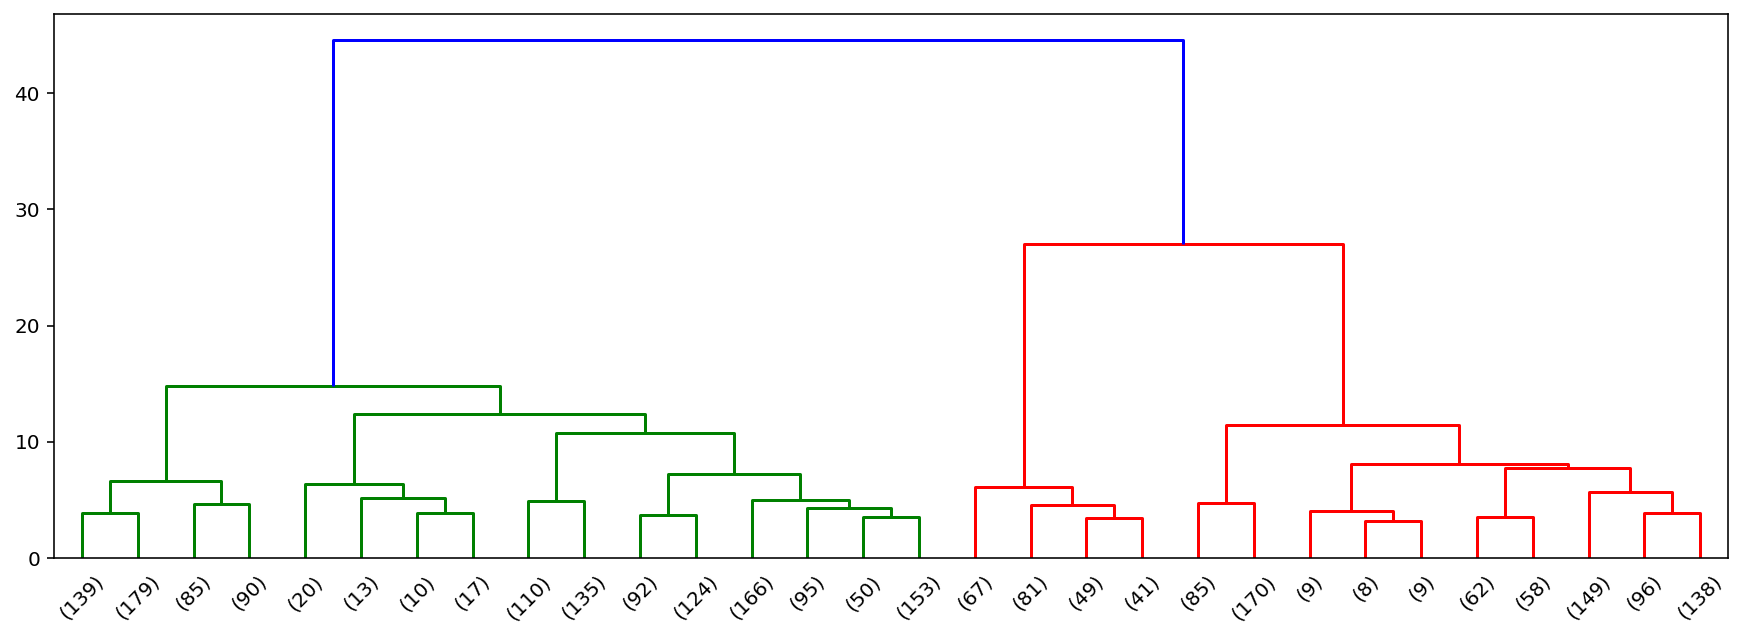

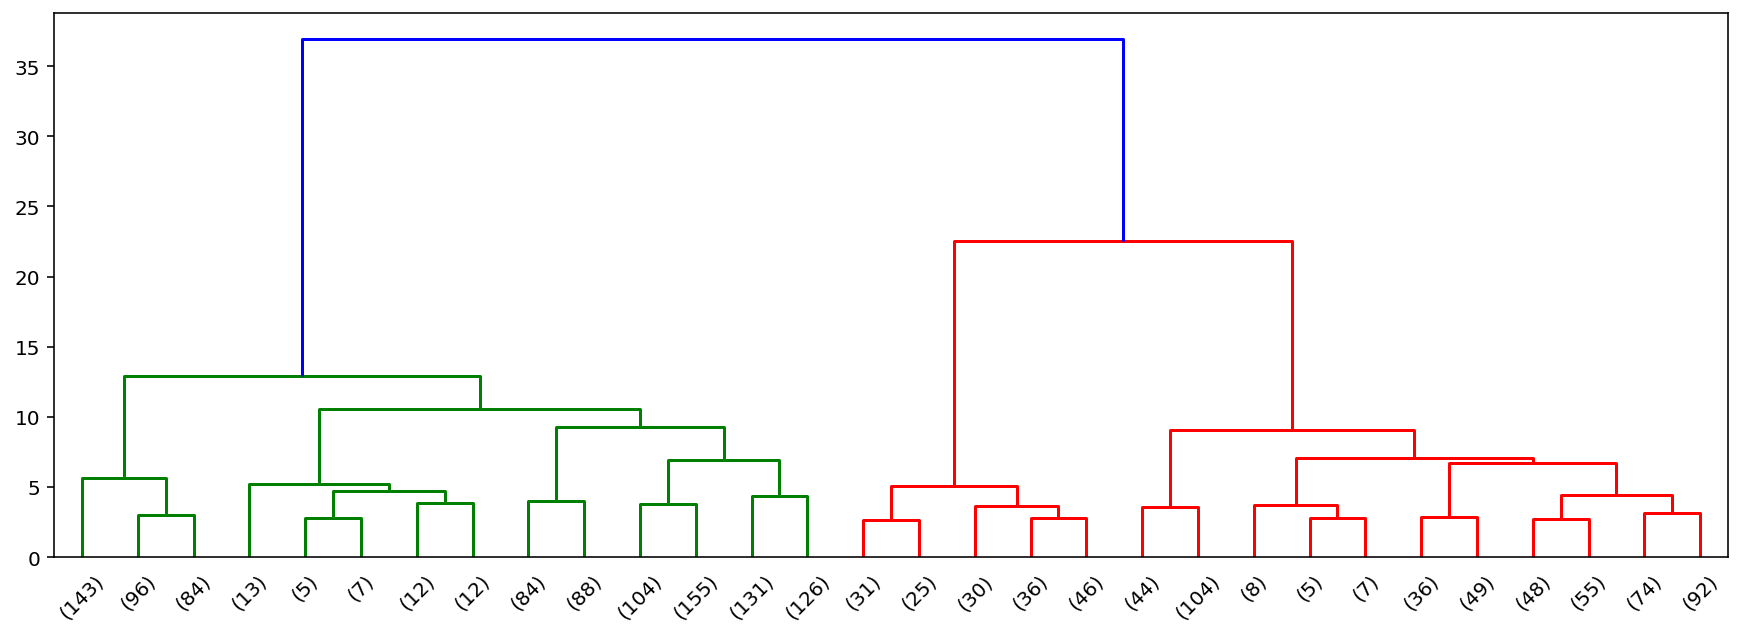

In [70]:
d7.dbscan(0.2)

d7.dbscan_clustering(0.2)

d7.agglomerative(3)

d7.agglomerative_classification(2)

d7.optics()

d7.optics_clustering()

d7.MeanShift(0.5)
d7.MeanShift_clustering(0.5)

In [71]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3      0.179662  2.087443  0.550929  0.096687            0.051600   0.074843   
4      0.153581  2.374335  0.607560  0.001075            0.000802   0.001427   
5      0.190709  2.020178  0.643390  0.280701            0.150007   0.217848   
6      0.461182  1.031717  0.708945  0.000843            0.000413   0.001160   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852  
3     0.075226  
4     0.001860  
5     0.219256  
6     0.015840

In [72]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   
3        0.178279  2.094276  0.505301  0.004753            0.003520   
4        0.153581  2.374335  0.607560  0.001075            0.000802   
5        0.199156  1.837586  0.597871  0.142987            0.114275   
6        0.450267  0.913539  0.734017 -0.003656            0.001723   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852  
3   0.005106     0.005131  
4   0.001427     0.001860  
5   0.172823     0.167029  
6   0.005121     0.066085

In [73]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3       0.179662  2.087443  0.505531  0.005301            0.003772   0.005471   
4       0.110494  2.807480  0.608229 -0.002643            0.000300   0.000536   
5       0.199156  1.837586  0.597580  0.141994            0.113777   0.172127   
6       0.460886  1.031704  0.708945  0.000843            0.000413   0.001160   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852  
3     0.005499  
4     0.000696  
5     0.166301  
6     0.015840

In [74]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   
3      0.251257  1.503091  0.212594  0.010270        5.750782e-02   
4      0.117229  1.745240  0.540082 -0.081469        2.281667e-02   
5      0.094768  2.043521  0.529209  0.169491        2.255650e-01   
6      0.213206  1.641231  0.889574 -0.007067        4.641250e-04   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15  
3  3.498262e-02  8.383922e-02  
4  2.864376e-02  5.292742e-02  
5  2.243237e-01  3.296950e-01  
6  2.084176e-03  1.779768e-02

In [75]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   
3       0.200841  1.789074  0.321021  0.006069            0.040709   0.030886   
4       0.026327  1.551314  0.294114 -0.014307            0.046397   0.034602   
5       0.233344  1.737948  0.354198  0.098641            0.201100   0.140162   
6      -0.263381  1.154633  0.639484  0.004696            0.004701   0.008894   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750  
3     0.059348  
4     0.107626  
5     0.293936  
6     0.180259

In [76]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   
3        0.131901        0.656243  0.033470  0.000519        5.247248e-01   
4        0.113212        1.769752  0.861077  0.166103        2.710509e-02   
5        0.012265        0.281499  0.012042  0.000143        6.841626e-01   
6        0.325452        0.605592  0.598376  0.008822        2.607783e-02   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15  
3  1.587164e-01  7.649832e-01  
4  8.986267e-02  6.287517e-02  
5  1.715329e-01  1.000000e+00  
6  3.693912e-02  1.000000e+00

# Clustering Data sets

# 8th Dataset

(2042, 17)
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
Class
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (2042, 23)
kmeans  2  : 0.3266404788047236
kmeans  3  : 0.44087360793594543
kmeans  4  : 0.5435707463376115
kmeans  5  : 0.6379742839291578
kmeans  6  : 0.7075207351368024
kmeans  7  : 0.7503424508793213
kmeans  8  : 0.6992980670293749
kmeans  9  : 0.704590811225287
kmeans  10  : 0.48261773143660425


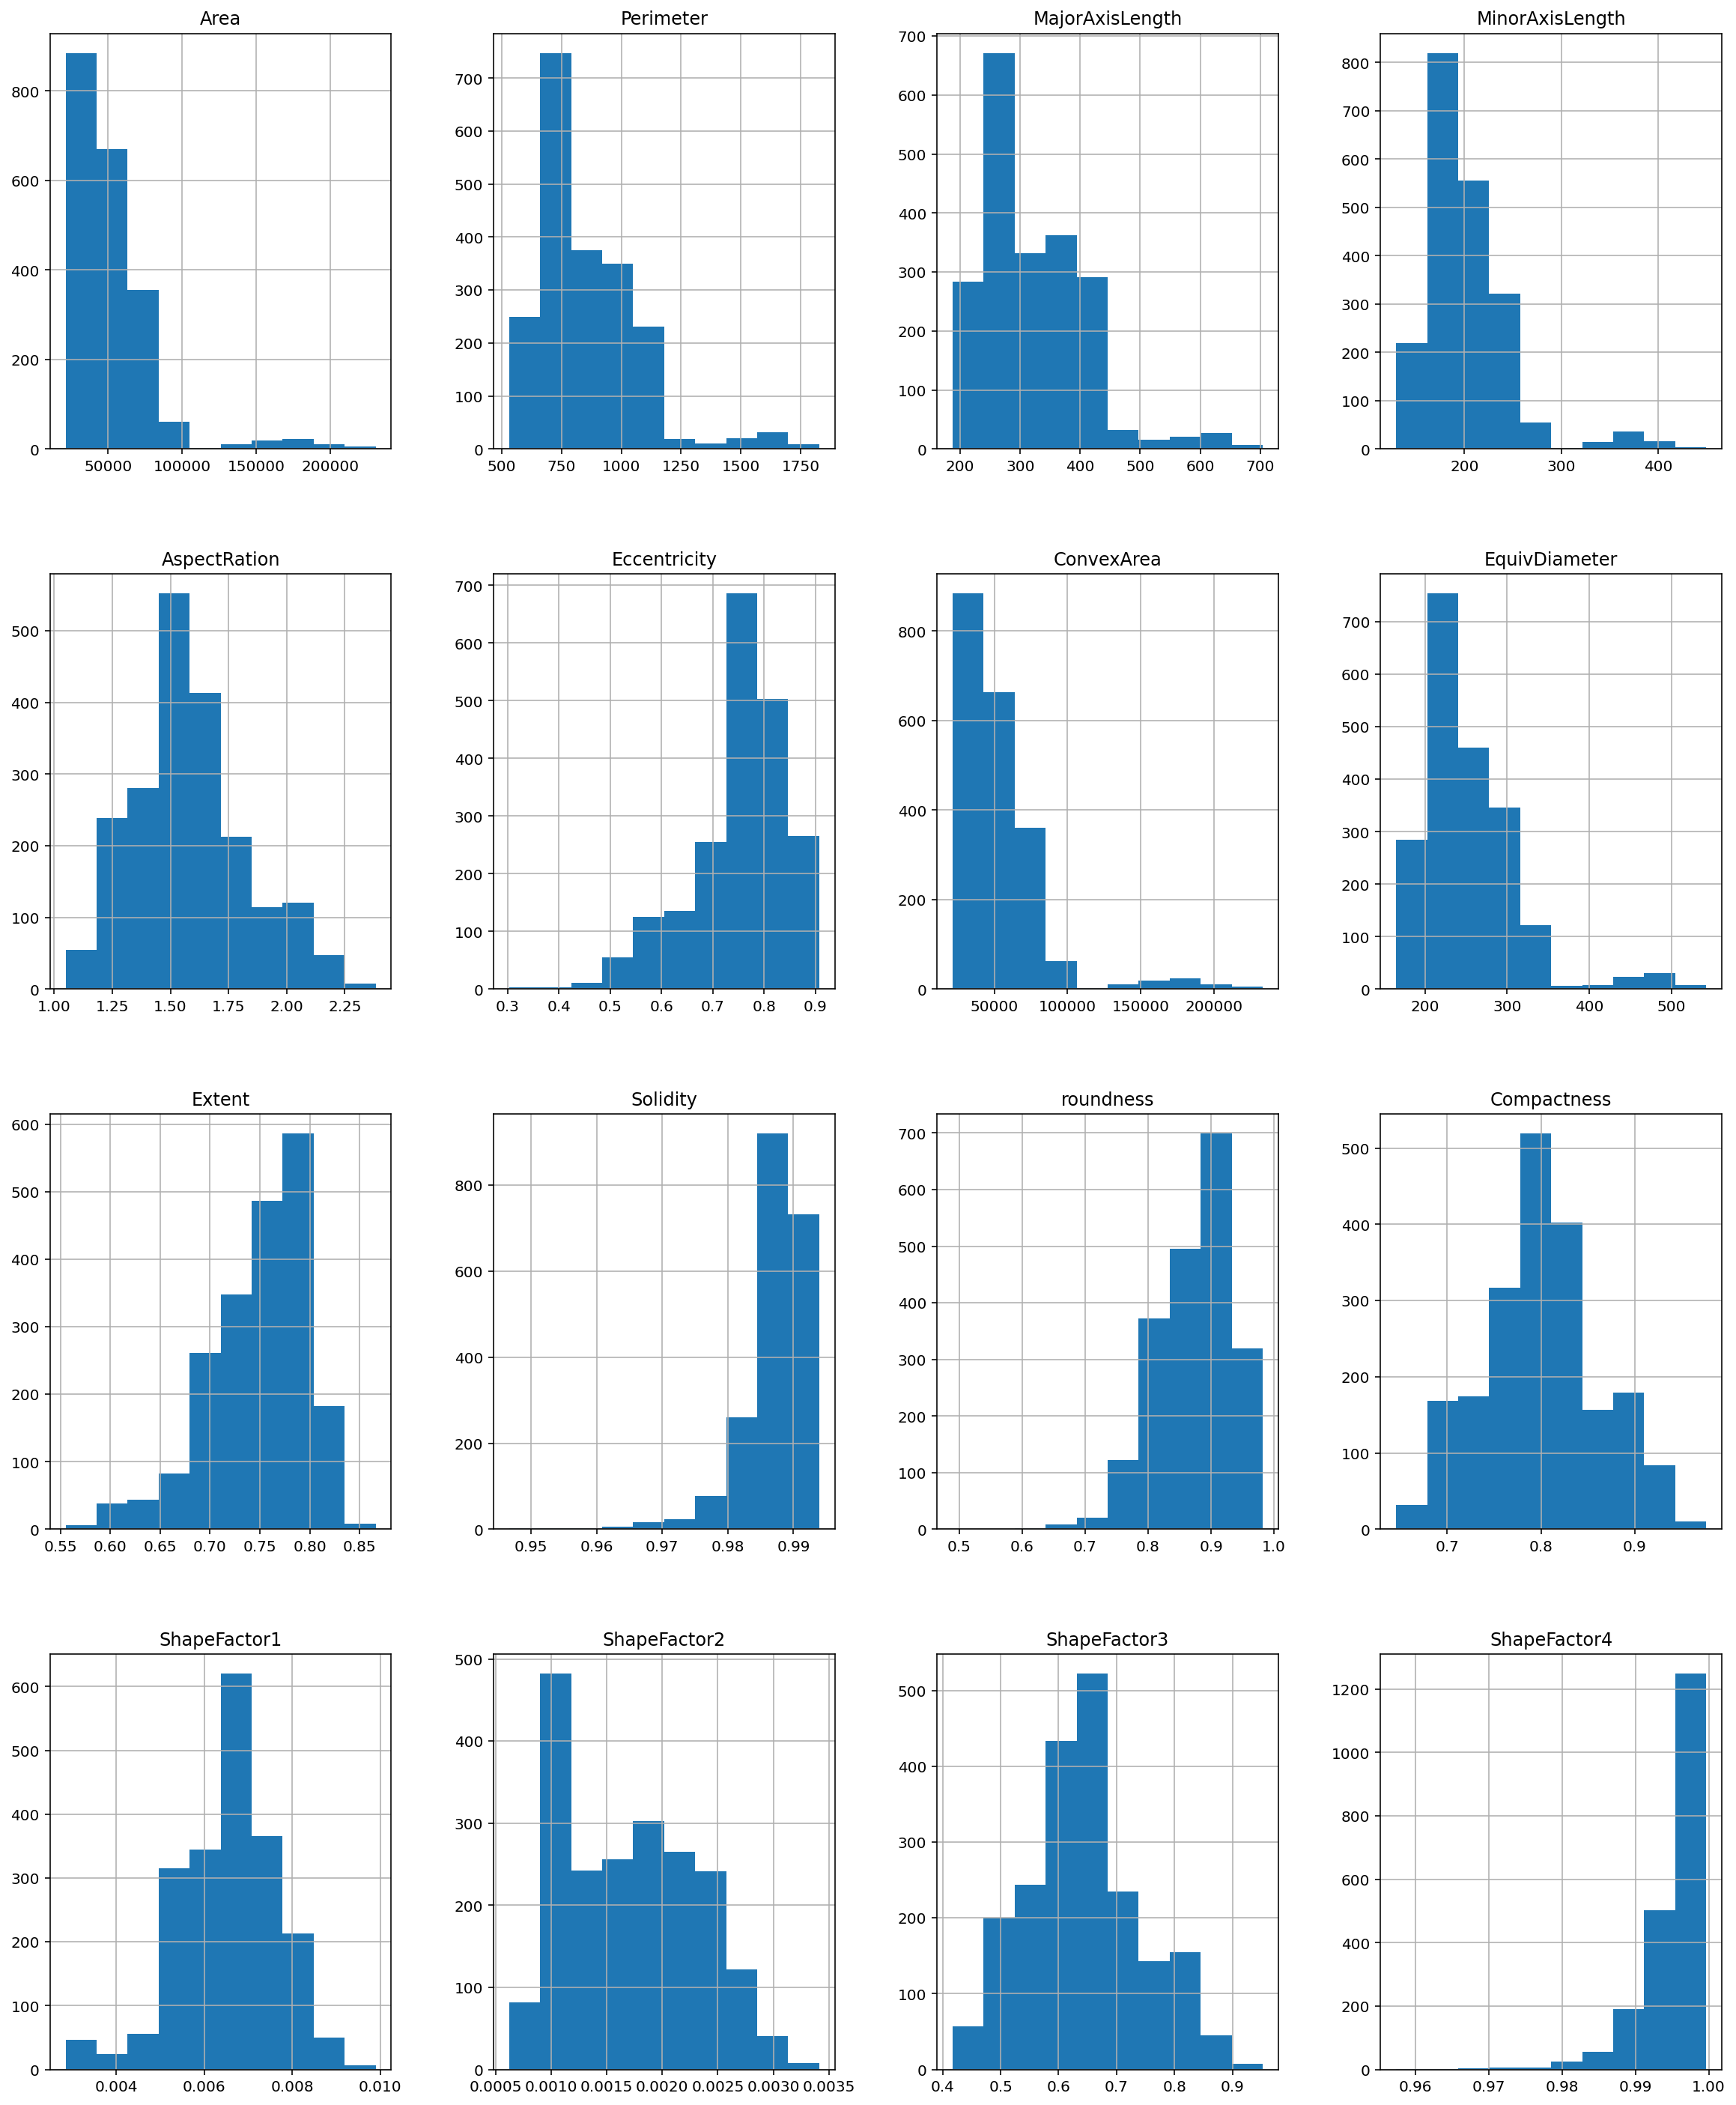

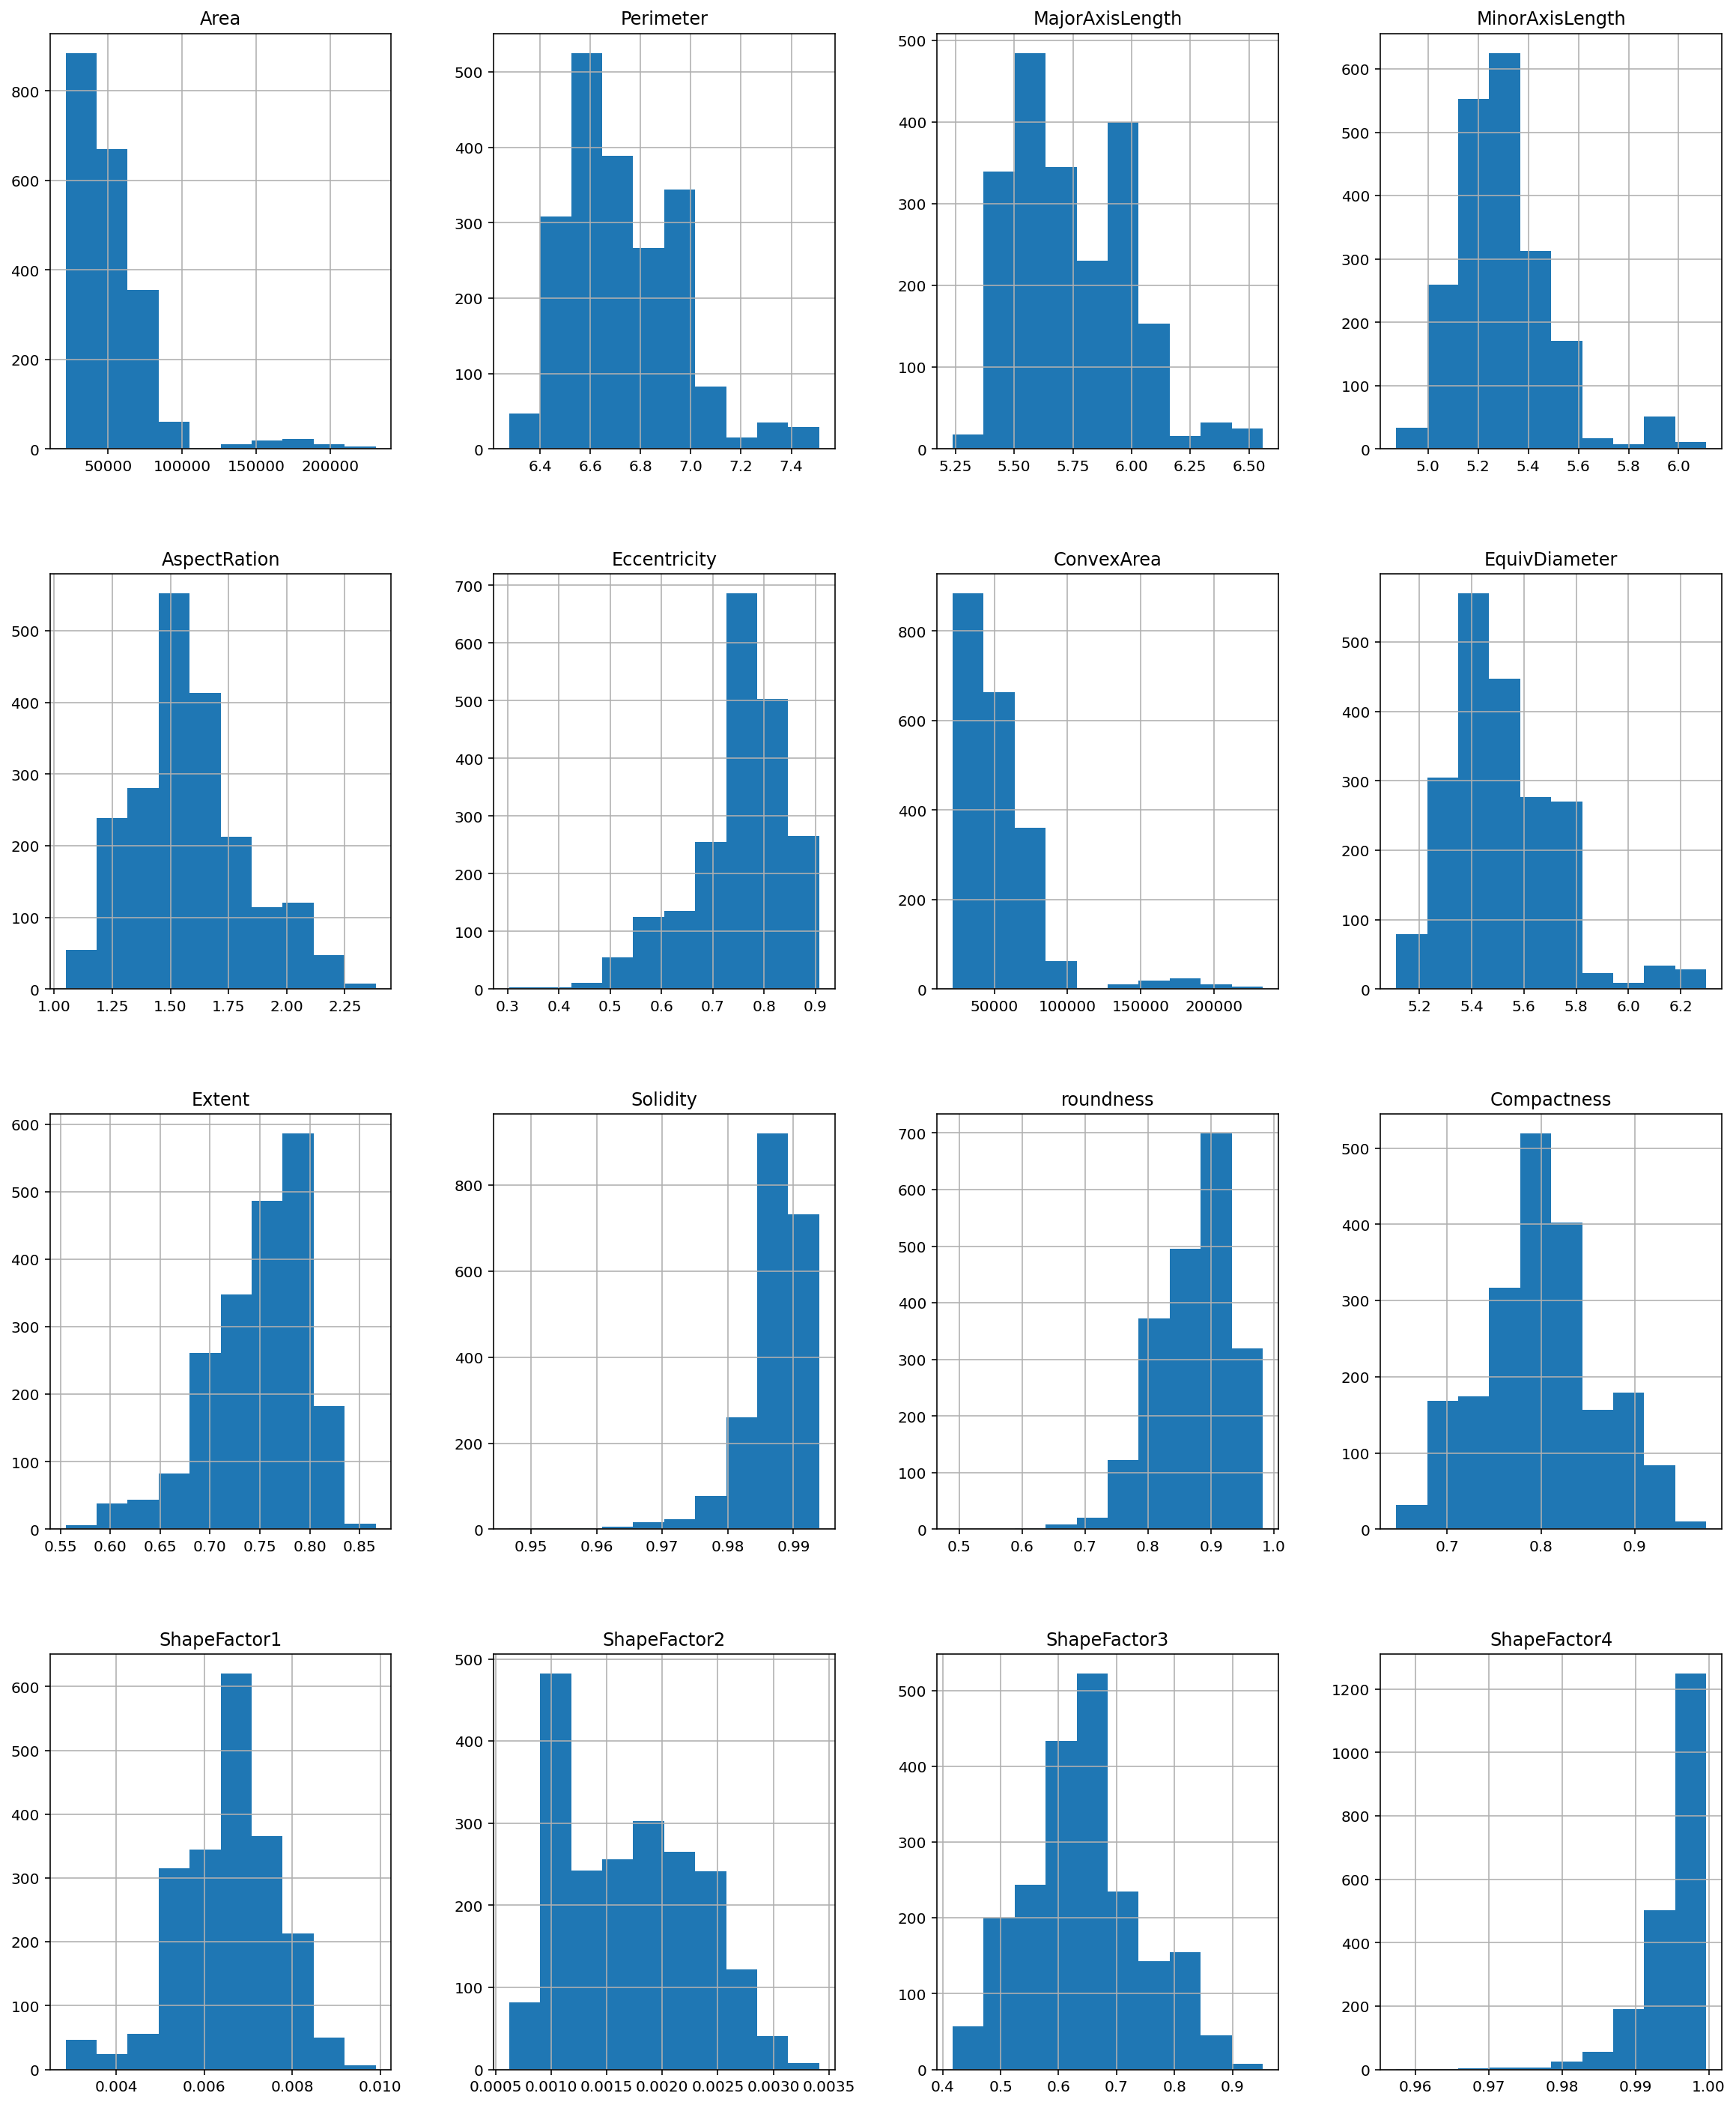

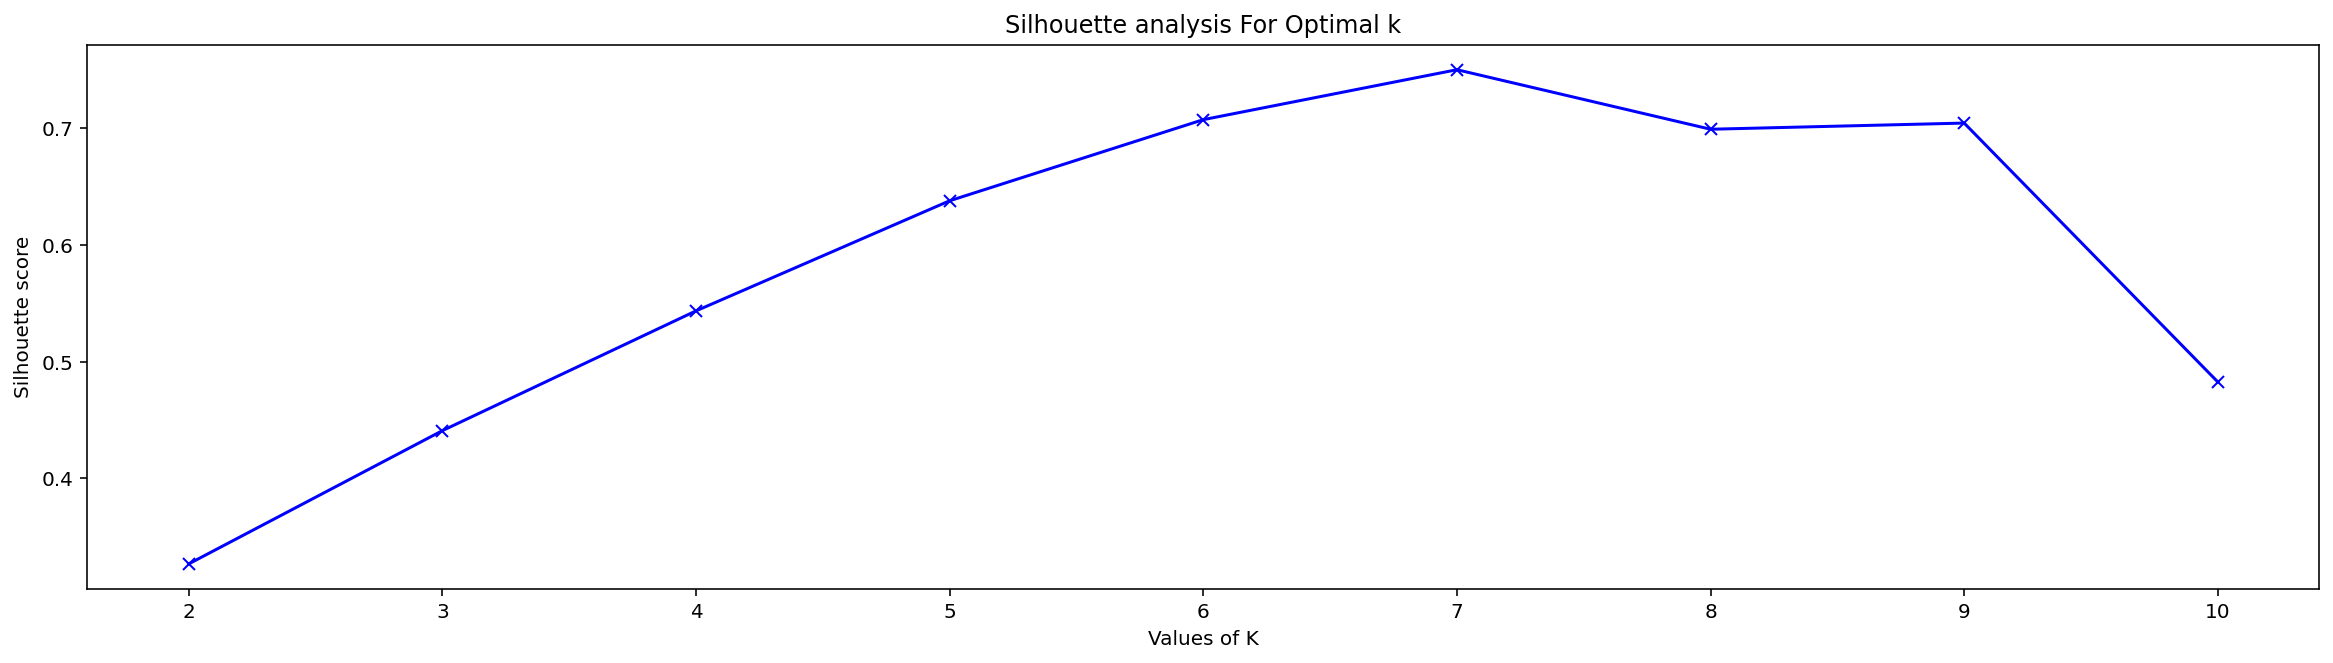

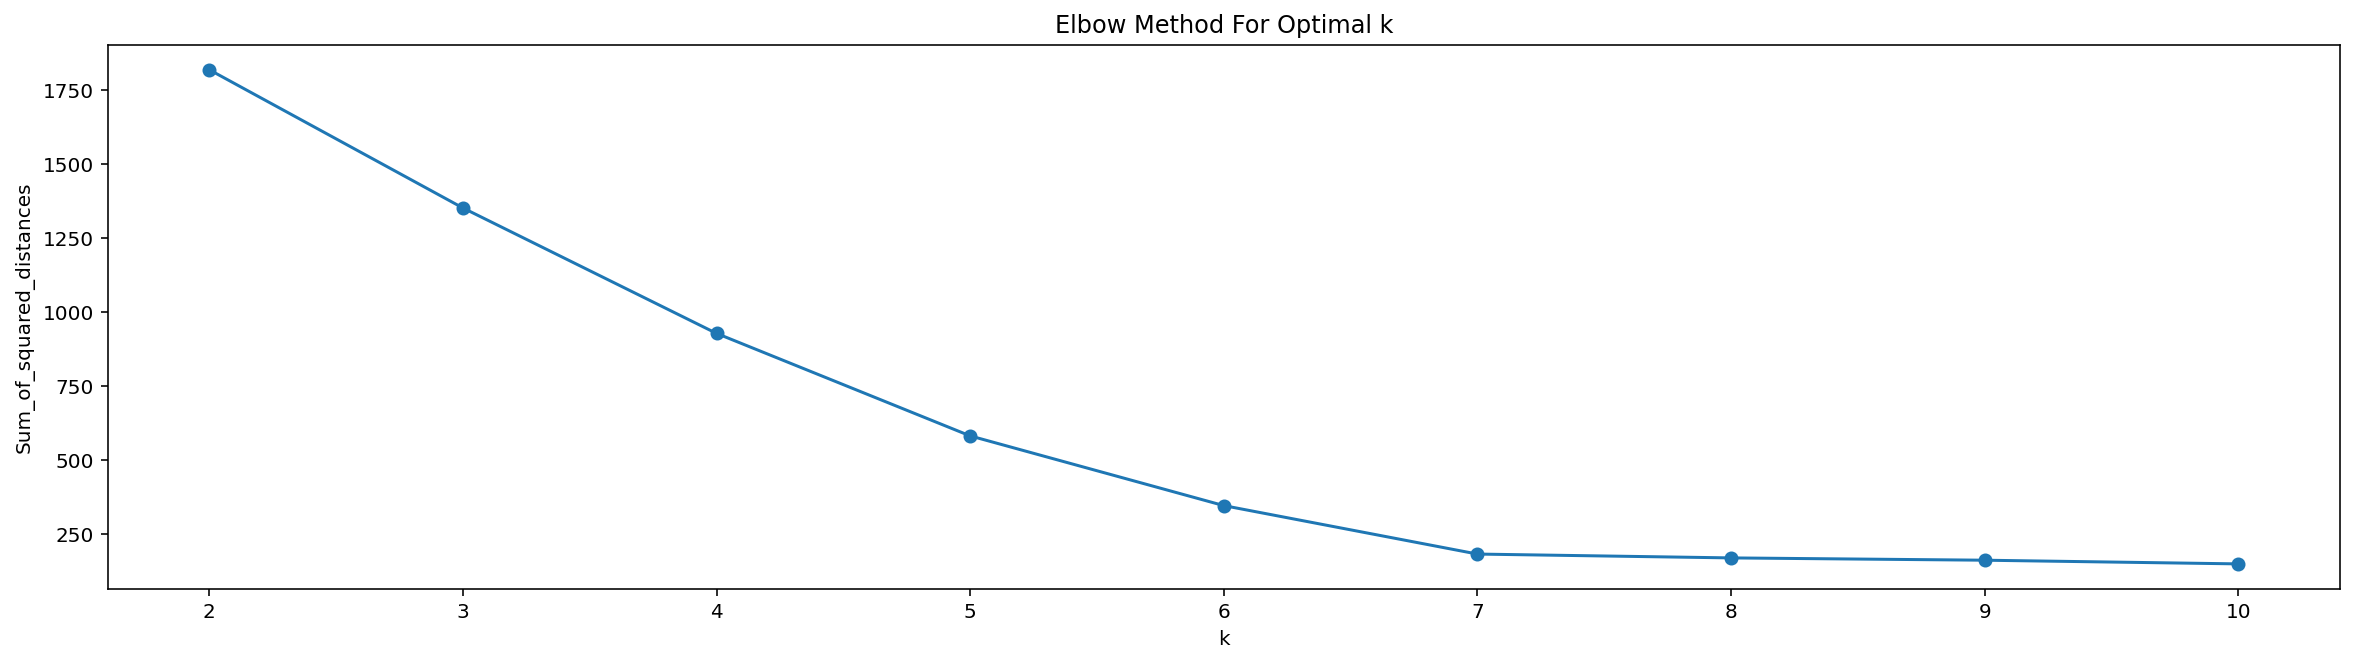

In [77]:
d8 = dataset('Dry_Bean-2.csv')
d8.data_preprocessing()
d8.normalization_scaling()

d8.make_X()

# d8.make_X('Class')

d8.Kmeans_find()


### For kmeans 7 clusters seems best observing the knee point on curves

centres of cluster [[ 2.57365526e-01  5.54014481e-01  5.87098759e-01  4.79628386e-01
   5.13662096e-01  8.46258914e-01  2.58912741e-01  5.25606881e-01
   6.63958903e-01  8.19603786e-01  7.25351767e-01  3.36052153e-01
   3.70989548e-01  1.75167967e-01  2.91544355e-01  7.90951677e-01
  -1.38777878e-17  0.00000000e+00  1.00000000e+00  5.55111512e-17
  -2.77555756e-17 -5.55111512e-17 -1.38777878e-16]
 [ 5.10527797e-02  1.80642013e-01  2.05674201e-01  1.92704640e-01
   3.34780027e-01  7.20768617e-01  5.12129892e-02  1.66021960e-01
   6.27960236e-01  8.75140219e-01  8.45154112e-01  5.20567879e-01
   6.98402494e-01  5.48202548e-01  4.71091324e-01  9.33118040e-01
   1.38777878e-16  6.93889390e-18  5.55111512e-17  1.00000000e+00
  -2.77555756e-17 -1.66533454e-16  5.55111512e-17]
 [ 8.98640889e-02  2.56249137e-01  2.23844332e-01  3.56333063e-01
   1.50360580e-01  4.74399705e-01  8.96403712e-02  2.62234980e-01
   6.97432087e-01  9.26408440e-01  9.23775286e-01  7.55258233e-01
   4.92529980e-01  6.

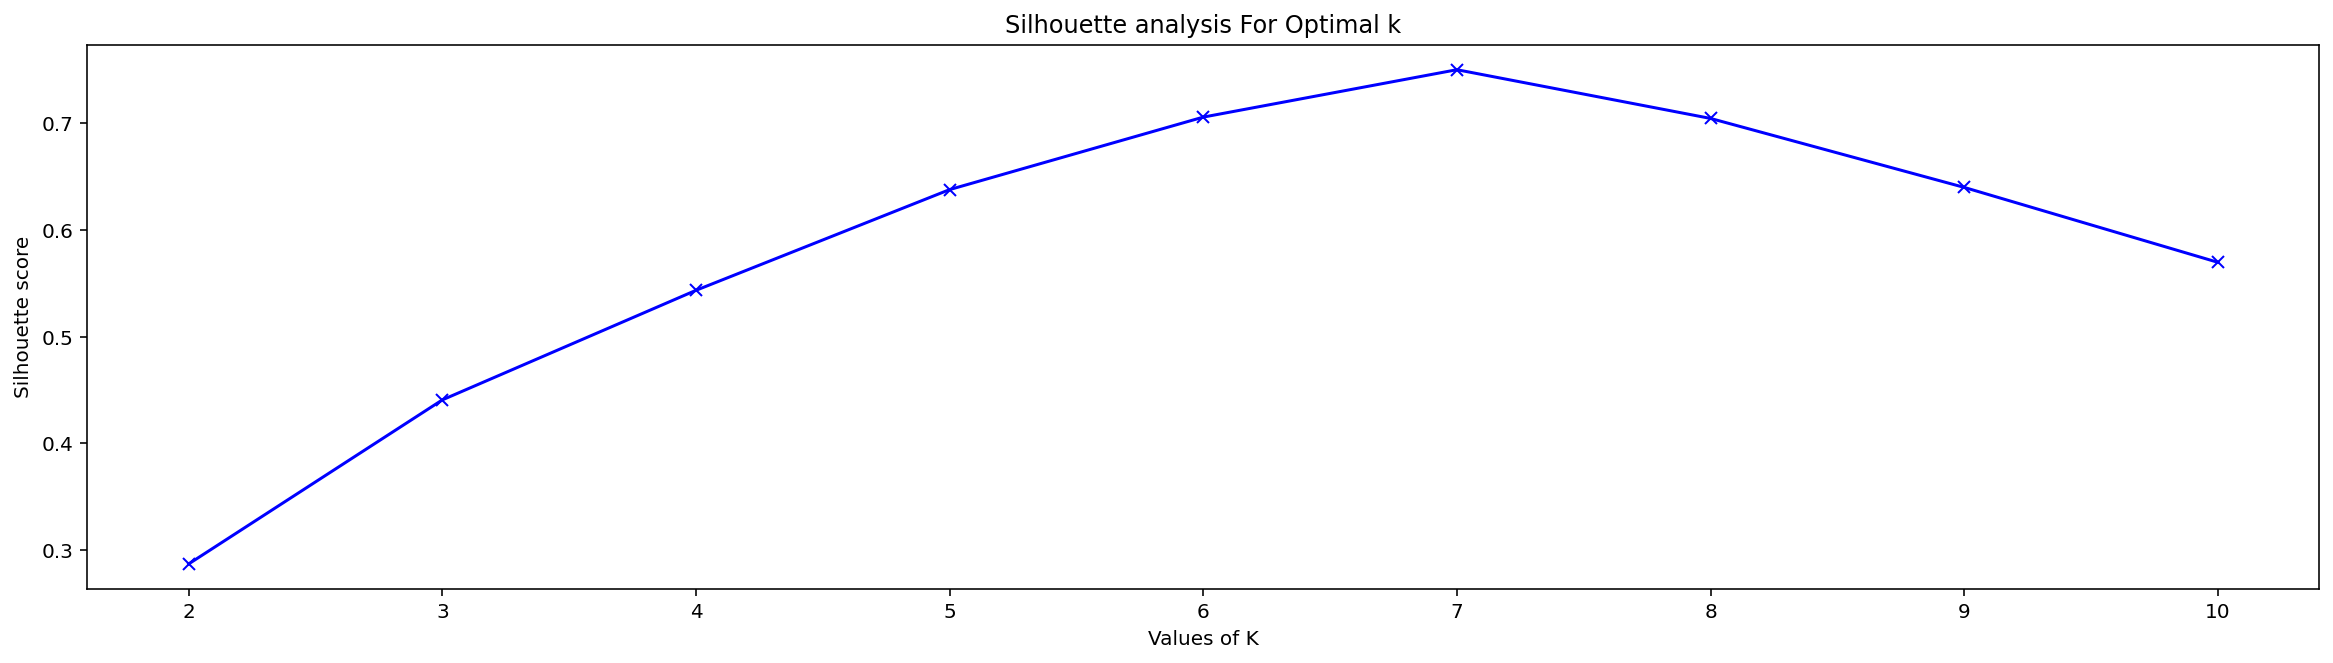

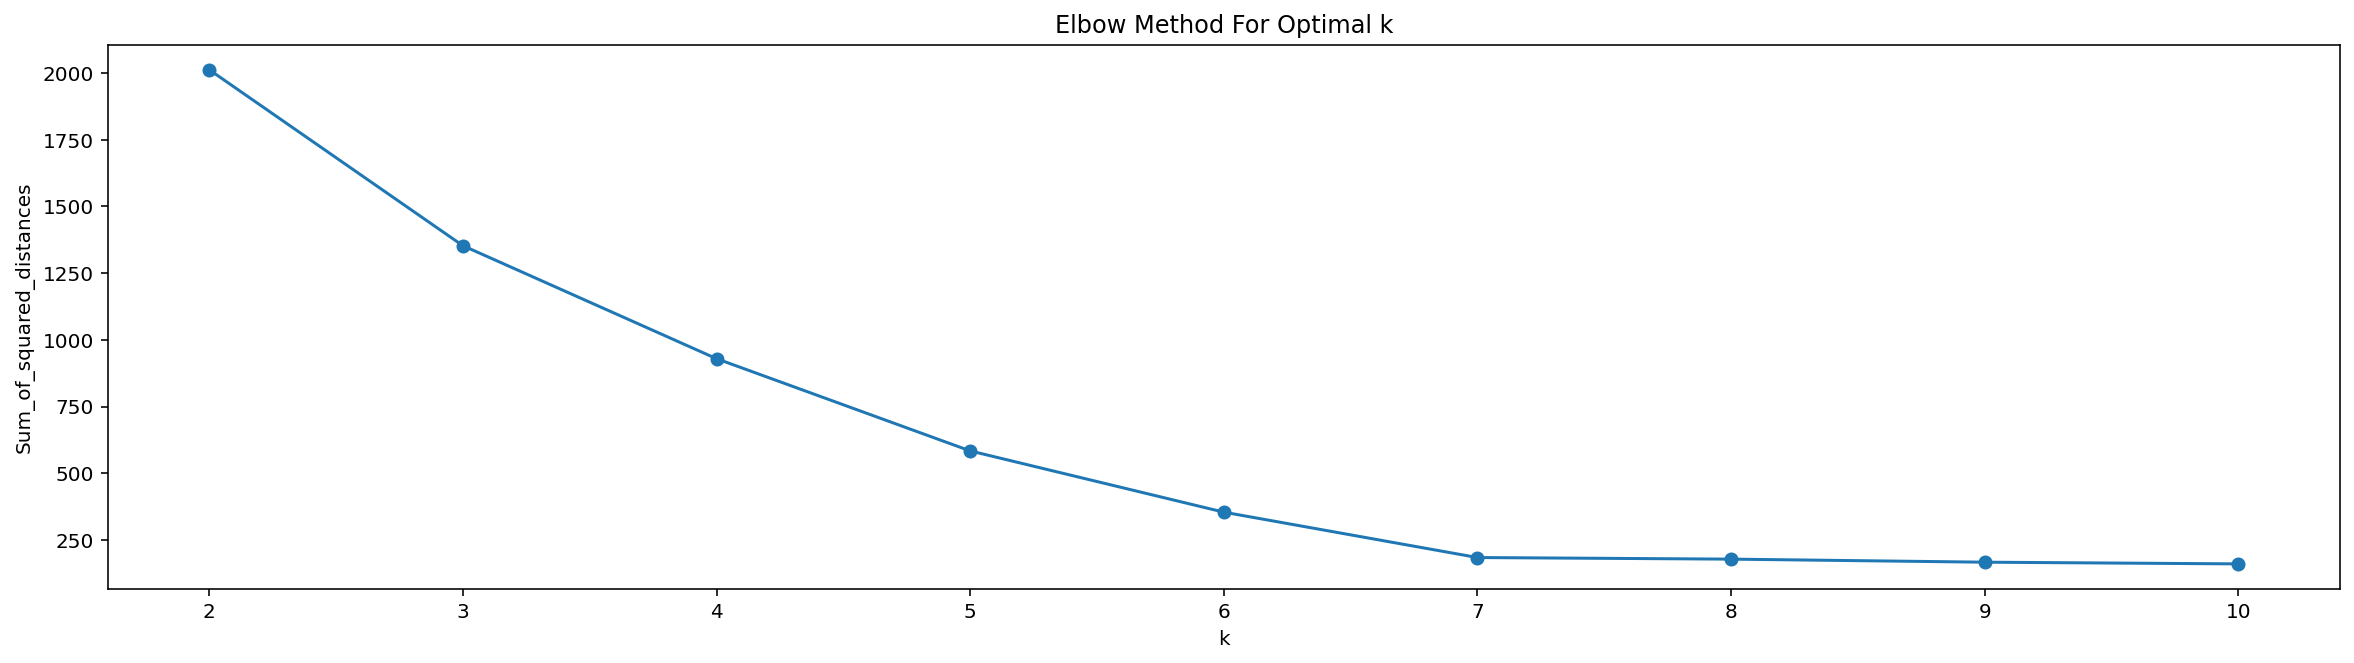

In [78]:
d8.kmean(7)
# d8.kmeans_classification(2)
# d8.df1_knn
d8.minibatch_Kmeans_find()

### for Minibatch Kmeans 3 clusters look good observing the knee points of curve

Centere of clusters [[0.05119845 0.18089833 0.20612032 0.19296125 0.33507538 0.72106816
  0.05135181 0.16641298 0.62809446 0.8760622  0.8455855  0.52025101
  0.69806522 0.54746826 0.47076634 0.93360628 0.         0.
  0.         1.         0.         0.         0.        ]
 [0.15547791 0.44303159 0.51643179 0.28518001 0.72238016 0.93050084
  0.15660371 0.38505502 0.47877996 0.81632835 0.62529031 0.17339718
  0.58328691 0.15445332 0.14521872 0.8117603  0.         0.
  0.         0.         1.         0.         0.        ]
 [0.11024729 0.32452732 0.3505412  0.30635778 0.39279598 0.76949902
  0.11056387 0.30536263 0.61782172 0.87193528 0.80076364 0.4567293
  0.55285368 0.38023933 0.40737812 0.89721489 0.         0.
  0.         0.         0.         0.         1.        ]
 [0.08987953 0.25634842 0.22414703 0.35595365 0.1511687  0.47613582
  0.08966412 0.26221117 0.69785474 0.92565659 0.92316638 0.75408592
  0.49294938 0.67750591 0.71778028 0.96966877 0.         0.
  0.         0.        

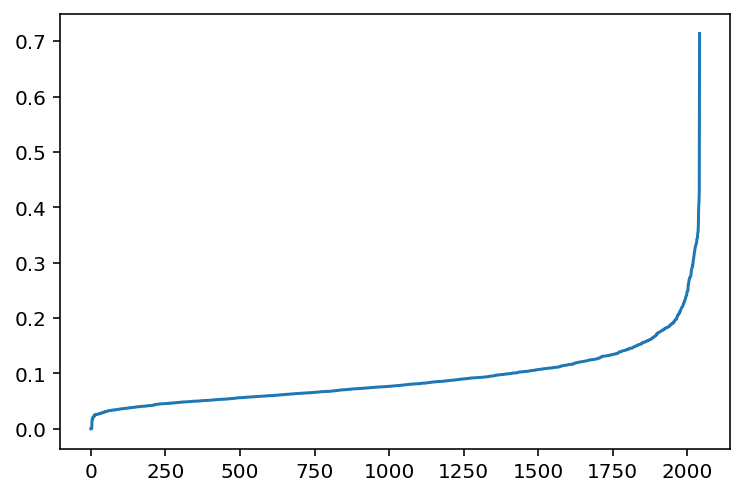

In [79]:
d8.minibatch_kmean(7)
# d8.minibatch_kmeans_classification(2)
d8.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.2

[ 0  1 -1 ...  2  3  0]
DBscan silhoutte score for espislon =  0.2  : 0.622178366547238
DBI score for espislon =  0.2  : 1.3273325376011886
agglomerative silhoutte score for  : 0.44087360793594543
agglomerative DBI score for  : 0.9074404849868469
[0 3 5 ... 1 2 0]
optics silhoutte score for espislon =   : 0.7503424508793213
optI score for espislon =   : 0.3775317916905802
0.5408500055888472
[2 4 5 ... 1 0 2]
MeanShift silhoutte score for   =   : 0.7331894681020482
msI score for   =   : 0.4245259658714985


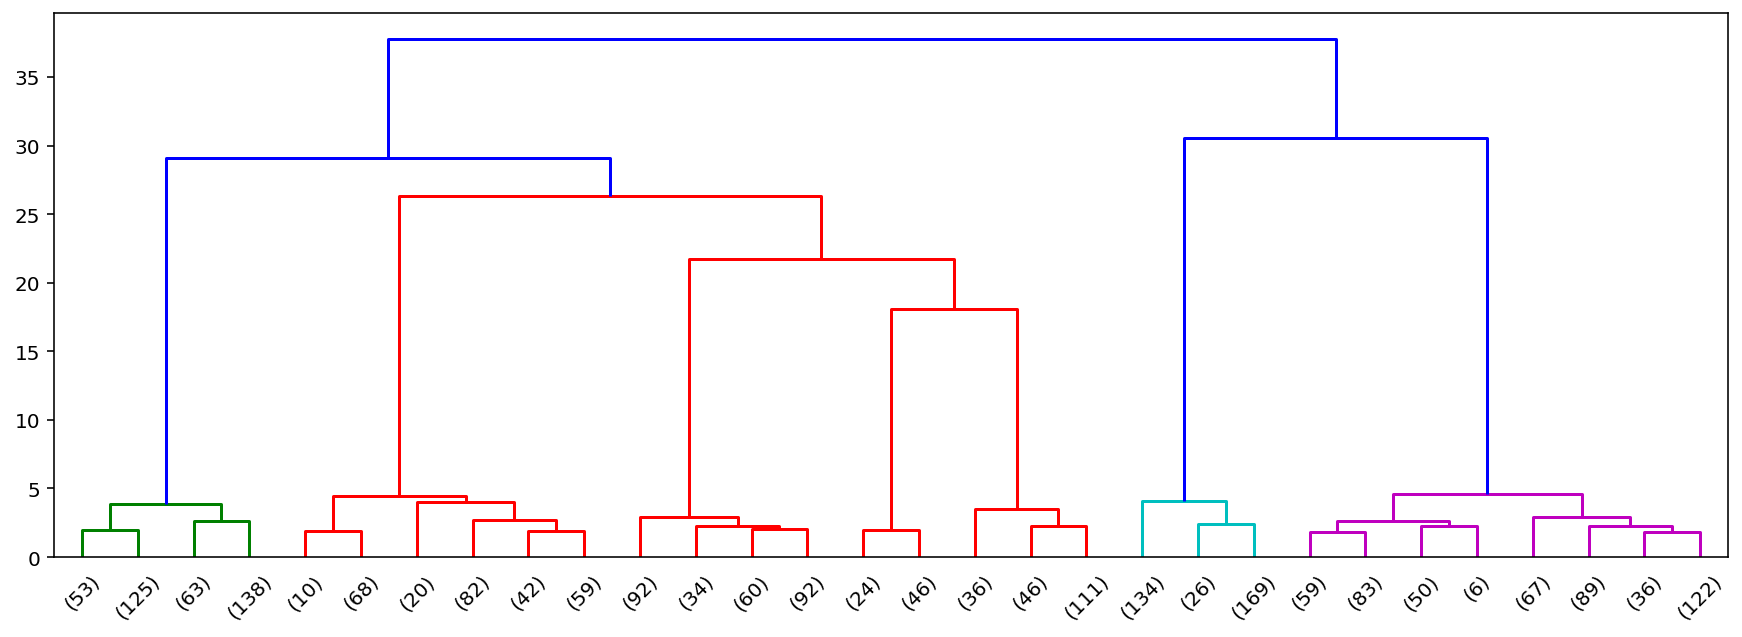

In [80]:
d8.dbscan(0.2)

# d8.dbscan_clustering(0.2)

d8.agglomerative(3)

# d8.agglomerative_classification(2)

d8.optics()

# d8.optics_clustering()

d8.MeanShift()
# d8.MeanShift_clustering(0.5)

# 9th Dataset

(1304, 9)
Index(['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'has_elevator',
       'building_floor_count', 'unit_floor', 'has_storage_area',
       'property_age'],
      dtype='object')
has_elevator
has_storage_area
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (1304, 9)
kmeans  2  : 0.4828133547711311
kmeans  3  : 0.6019870139320458
kmeans  4  : 0.6972425055053687
kmeans  5  : 0.5373791732813519
kmeans  6  : 0.4399842478088799
kmeans  7  : 0.357369229853984
kmeans  8  : 0.3211140247221068
kmeans  9  : 0.3214617045884846
kmeans  10  : 0.3050113310003191


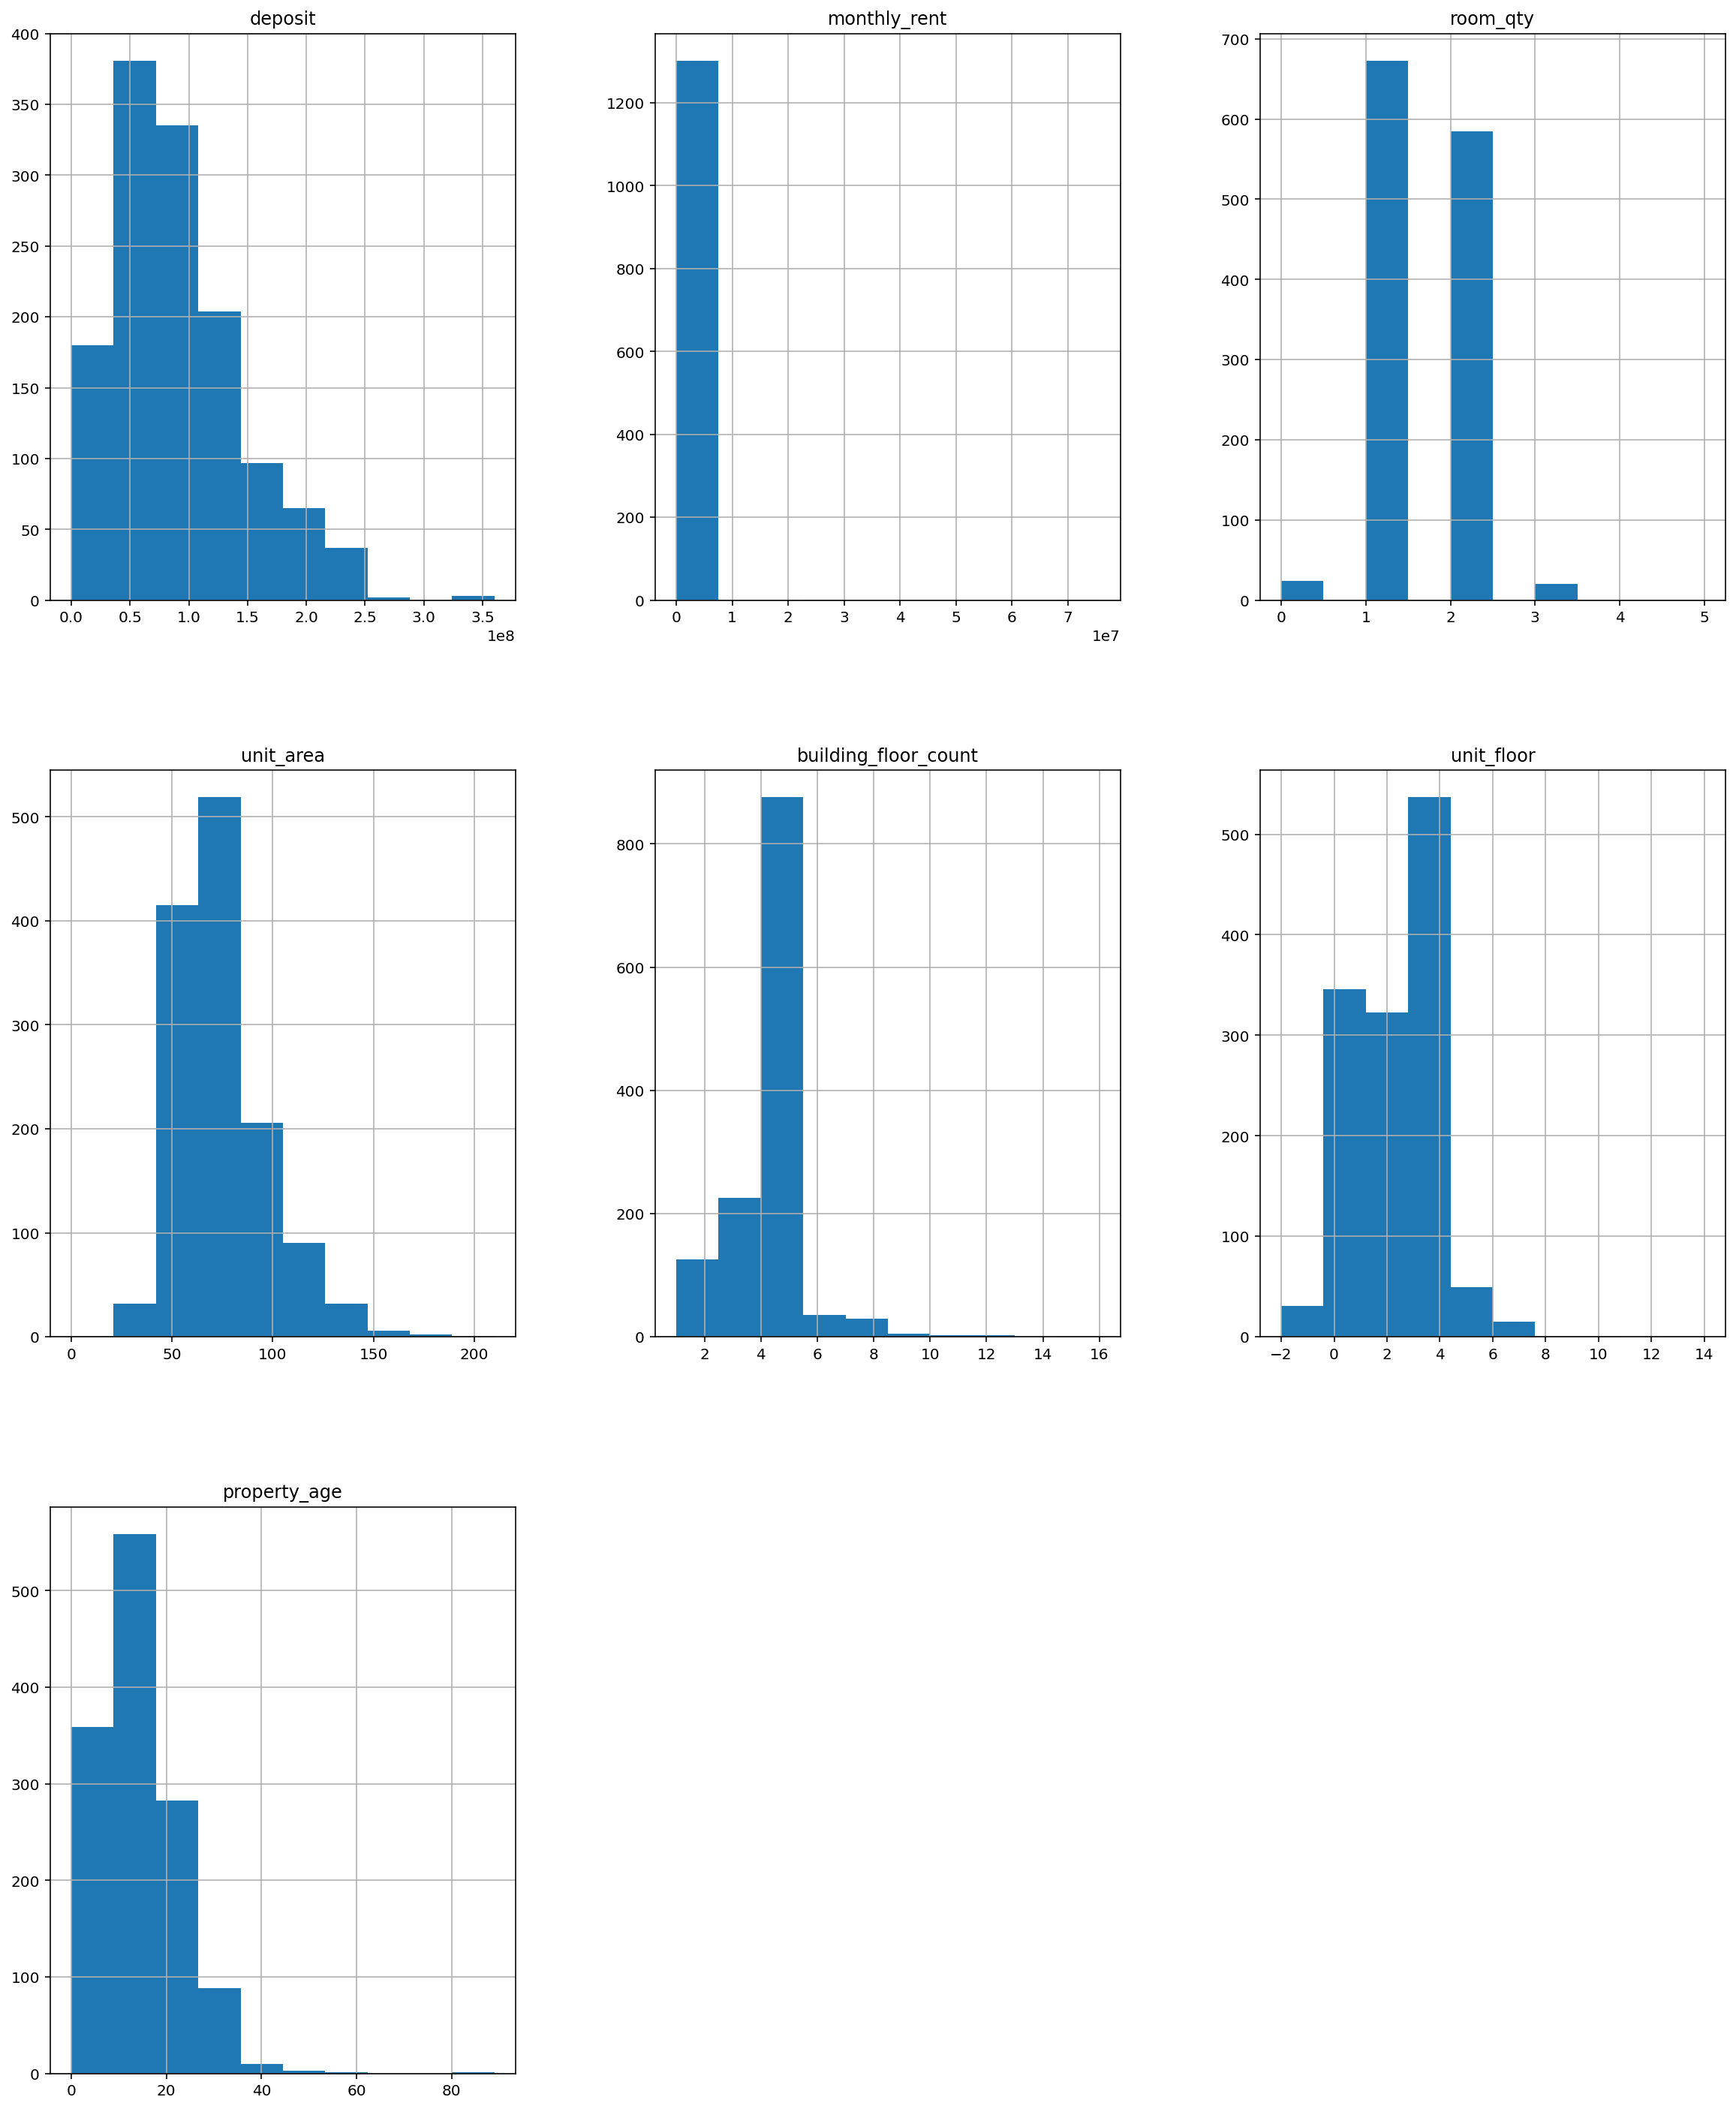

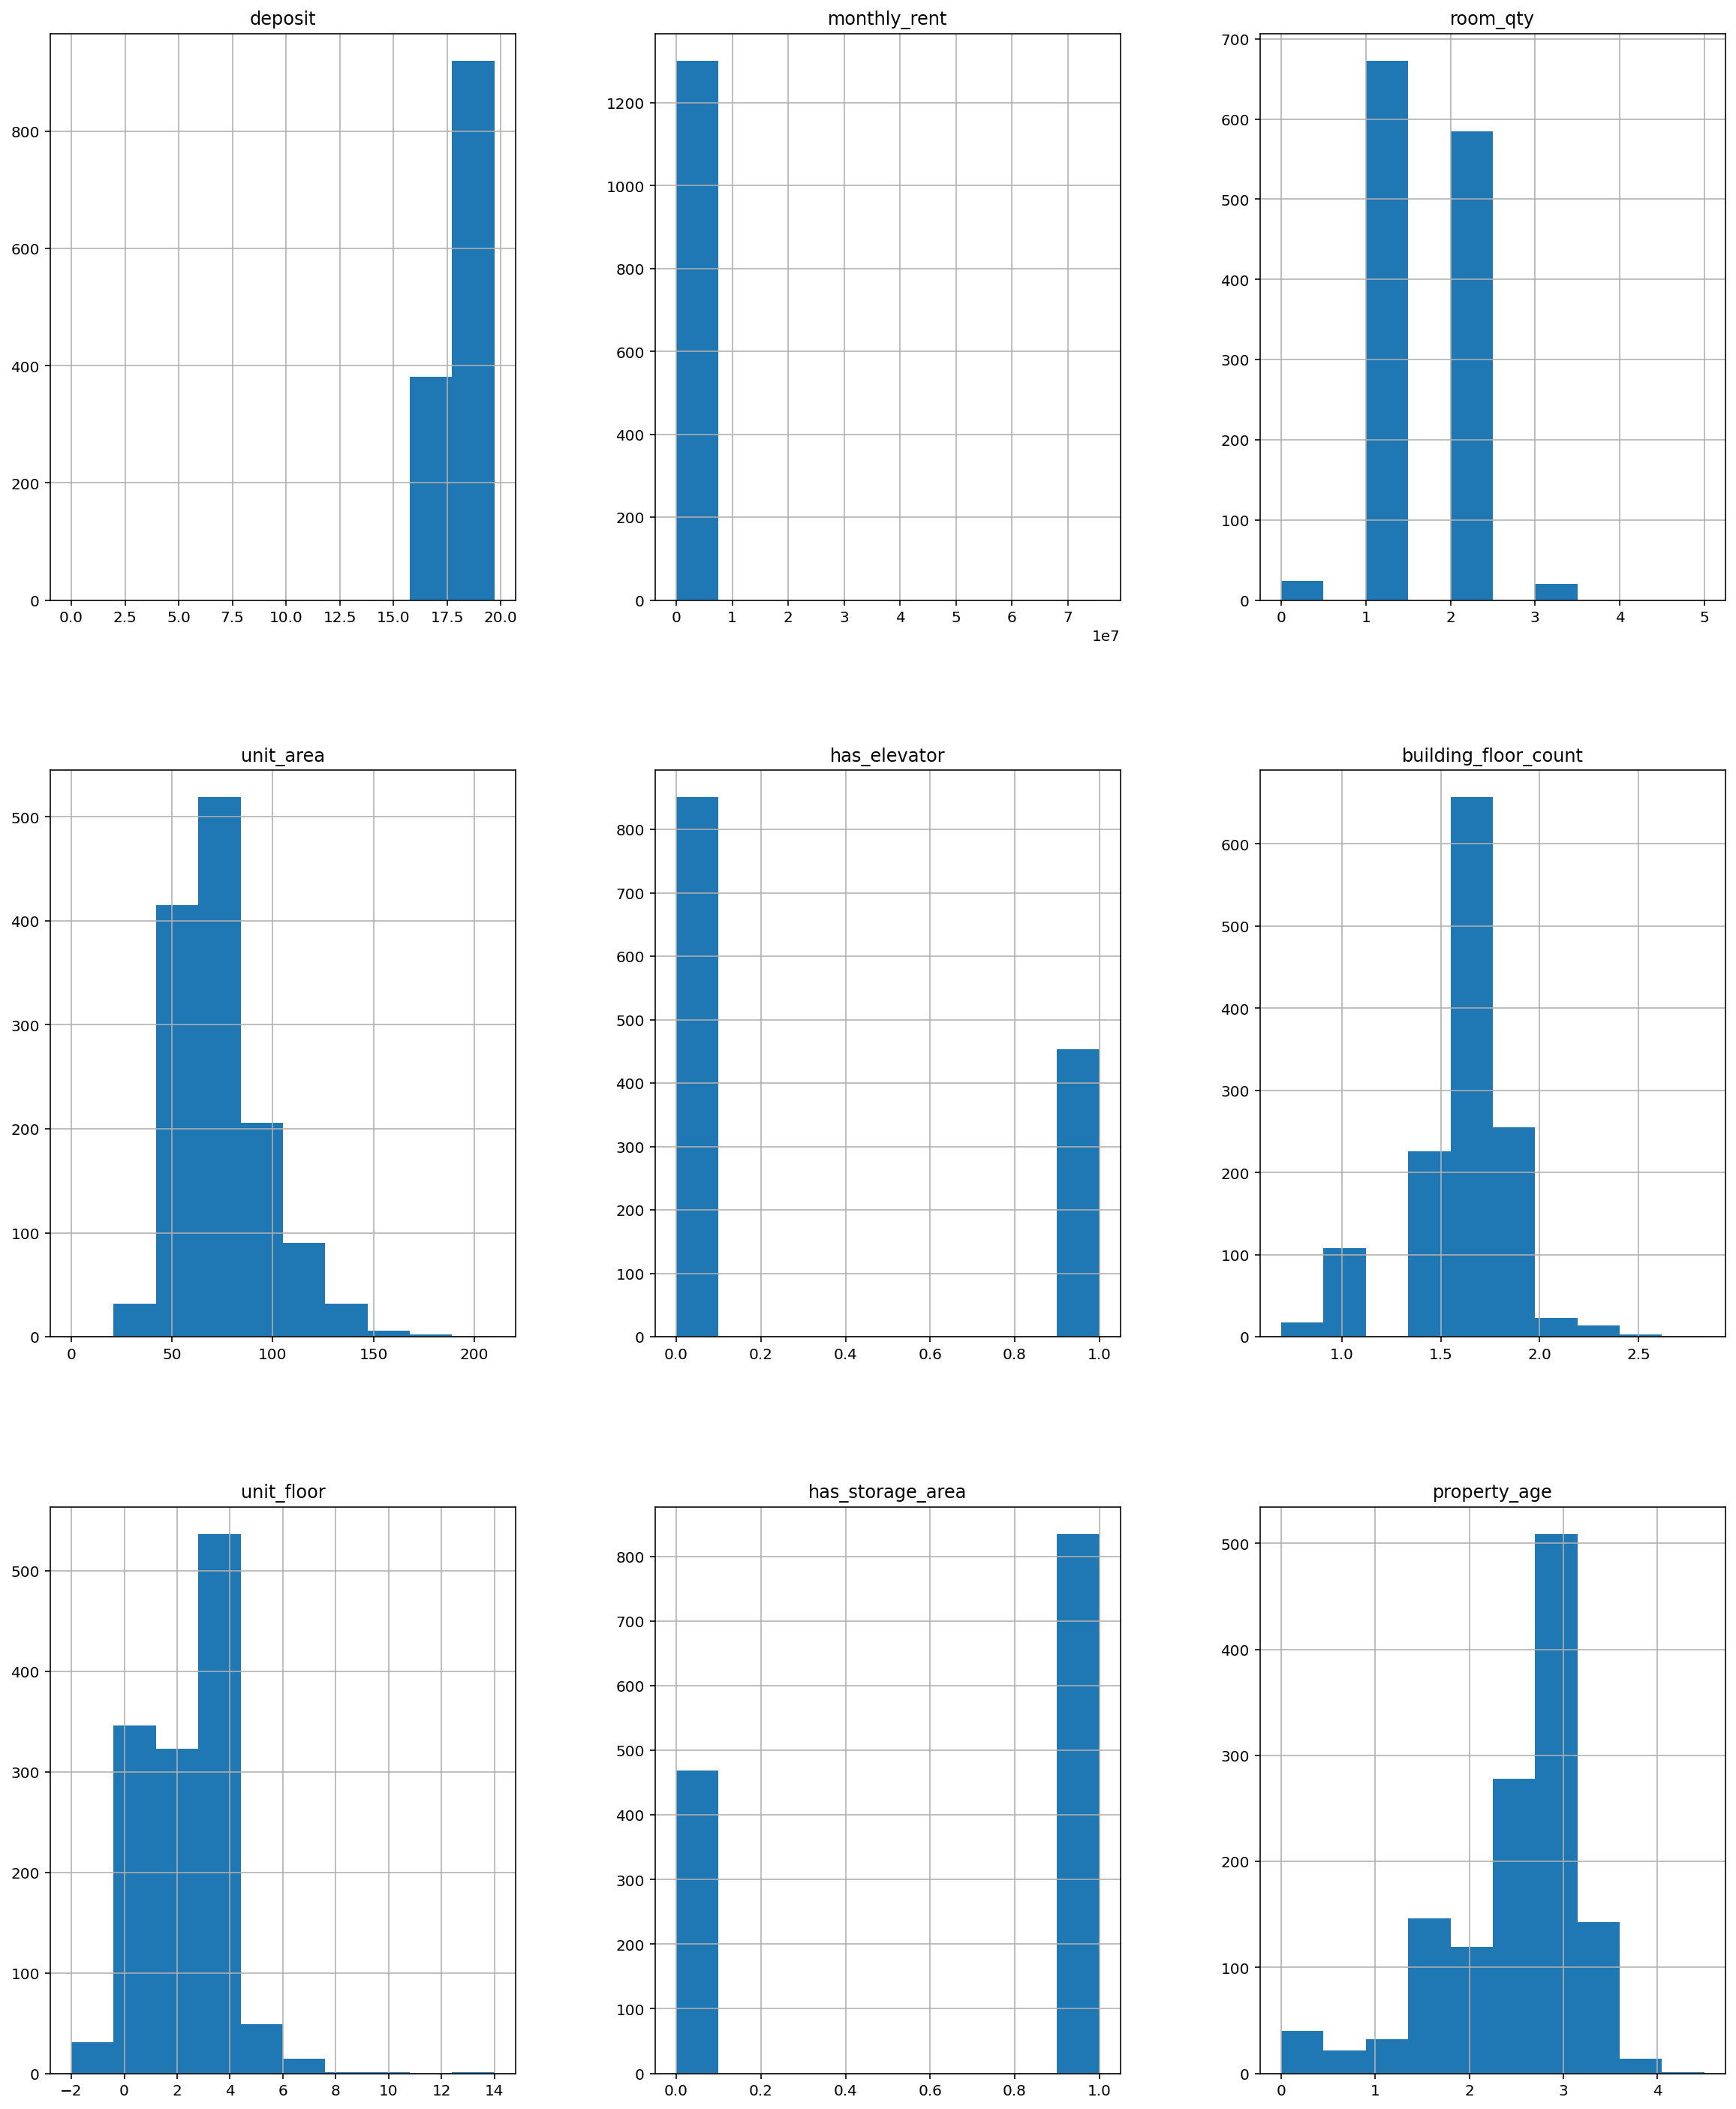

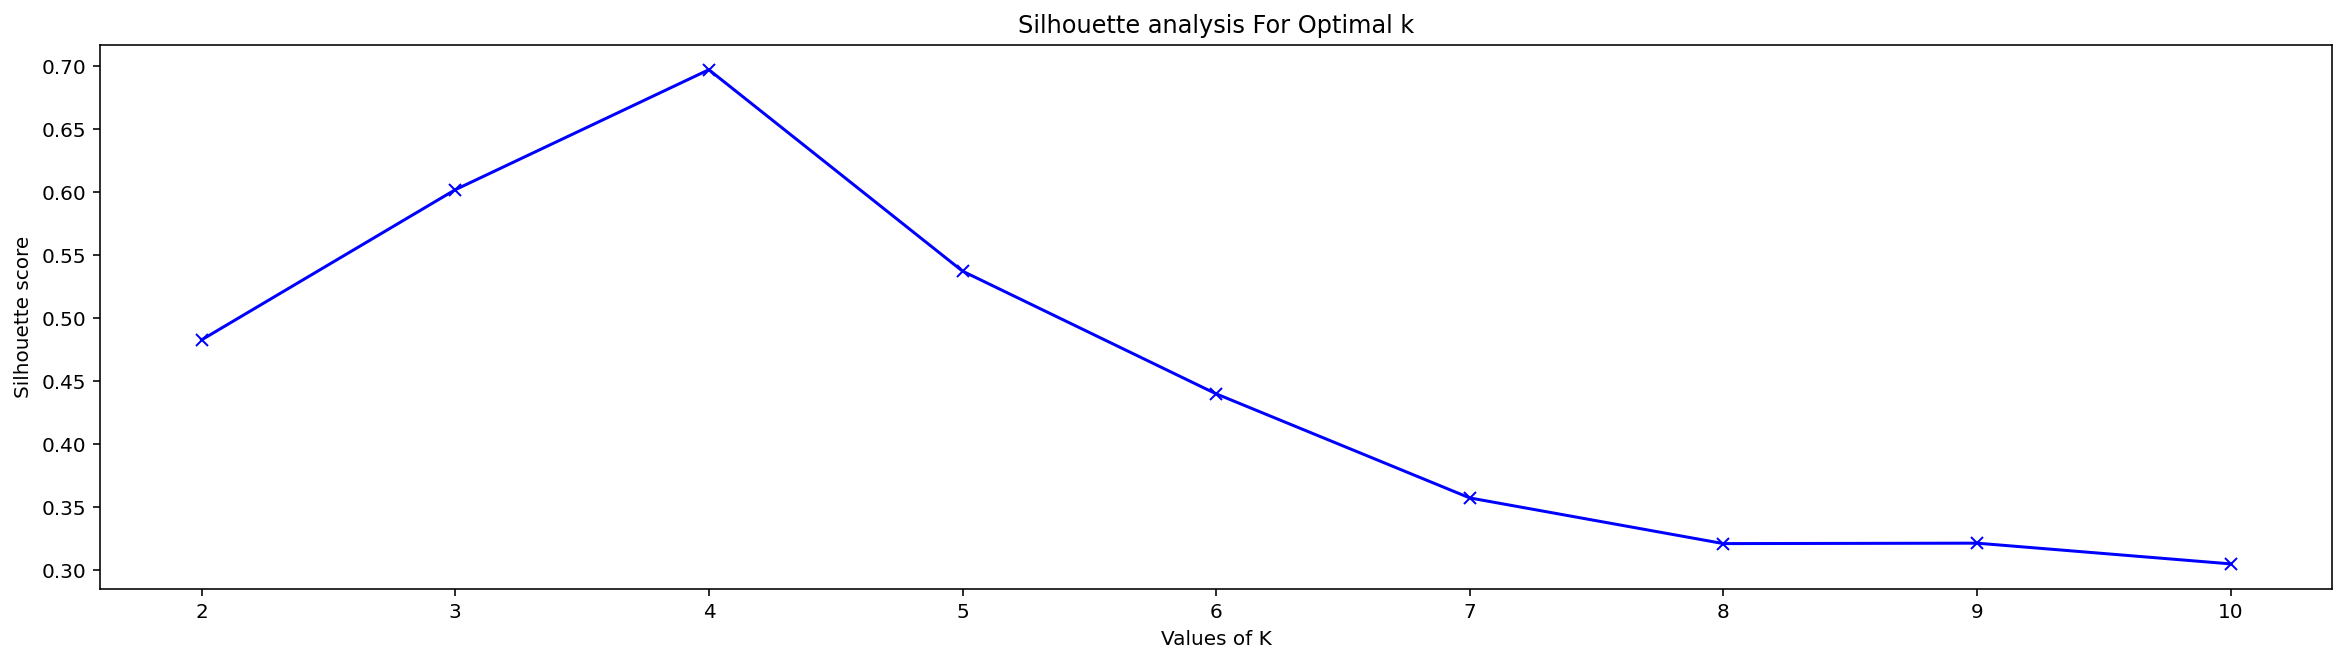

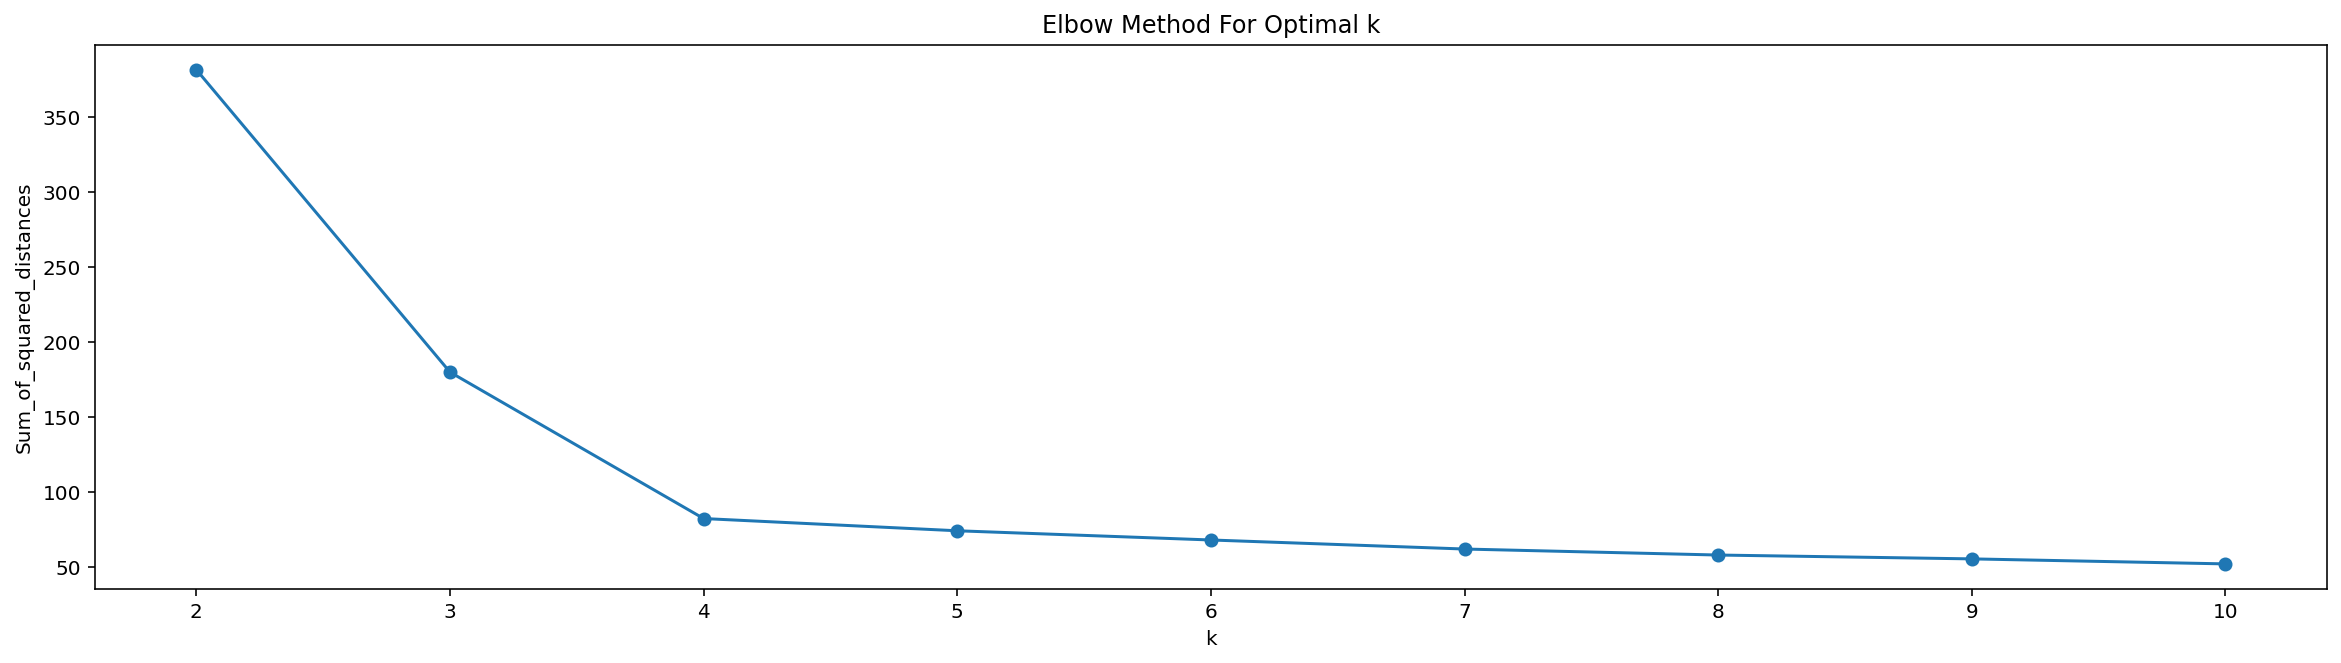

In [81]:
d9 = dataset('property-2.csv')
d9.data_preprocessing()
d9.normalization_scaling()

d9.make_X()

# d9.make_X('Class')

d9.Kmeans_find()


### For kmeans 4 clusters seems best observing the knee point on curves

centres of cluster [[ 9.31086159e-01  1.88577553e-02  3.11897106e-01  3.64124943e-01
   1.00000000e+00  5.03669320e-01  3.03858521e-01  1.00000000e+00
   4.34245787e-01]
 [ 9.14359334e-01  1.06334060e-02  2.88167939e-01  3.37604507e-01
   6.10622664e-16  3.78651696e-01  2.67652672e-01  1.00000000e+00
   6.10920718e-01]
 [ 9.00627992e-01  1.12276103e-02  2.76452599e-01  3.28047182e-01
   5.55111512e-17  3.43968586e-01  2.46941896e-01 -1.11022302e-16
   6.30137017e-01]
 [ 9.19843401e-01  1.44466801e-02  3.09859155e-01  3.48390342e-01
   1.00000000e+00  4.91678849e-01  2.94454225e-01  0.00000000e+00
   3.90288857e-01]]
kmeans silhoutte score for  4  : 0.6972425055053687
kmeans DBI score for k =  4  : 0.48741551039771014
kmeans  2  : 0.47212515353324913
kmeans  3  : 0.6019870139320458
kmeans  4  : 0.6972425055053687
kmeans  5  : 0.5970573761850242
kmeans  6  : 0.4426675517952332
kmeans  7  : 0.444775767701589
kmeans  8  : 0.3153205655781832
kmeans  9  : 0.3389378547126725
kmeans  10  : 0.2

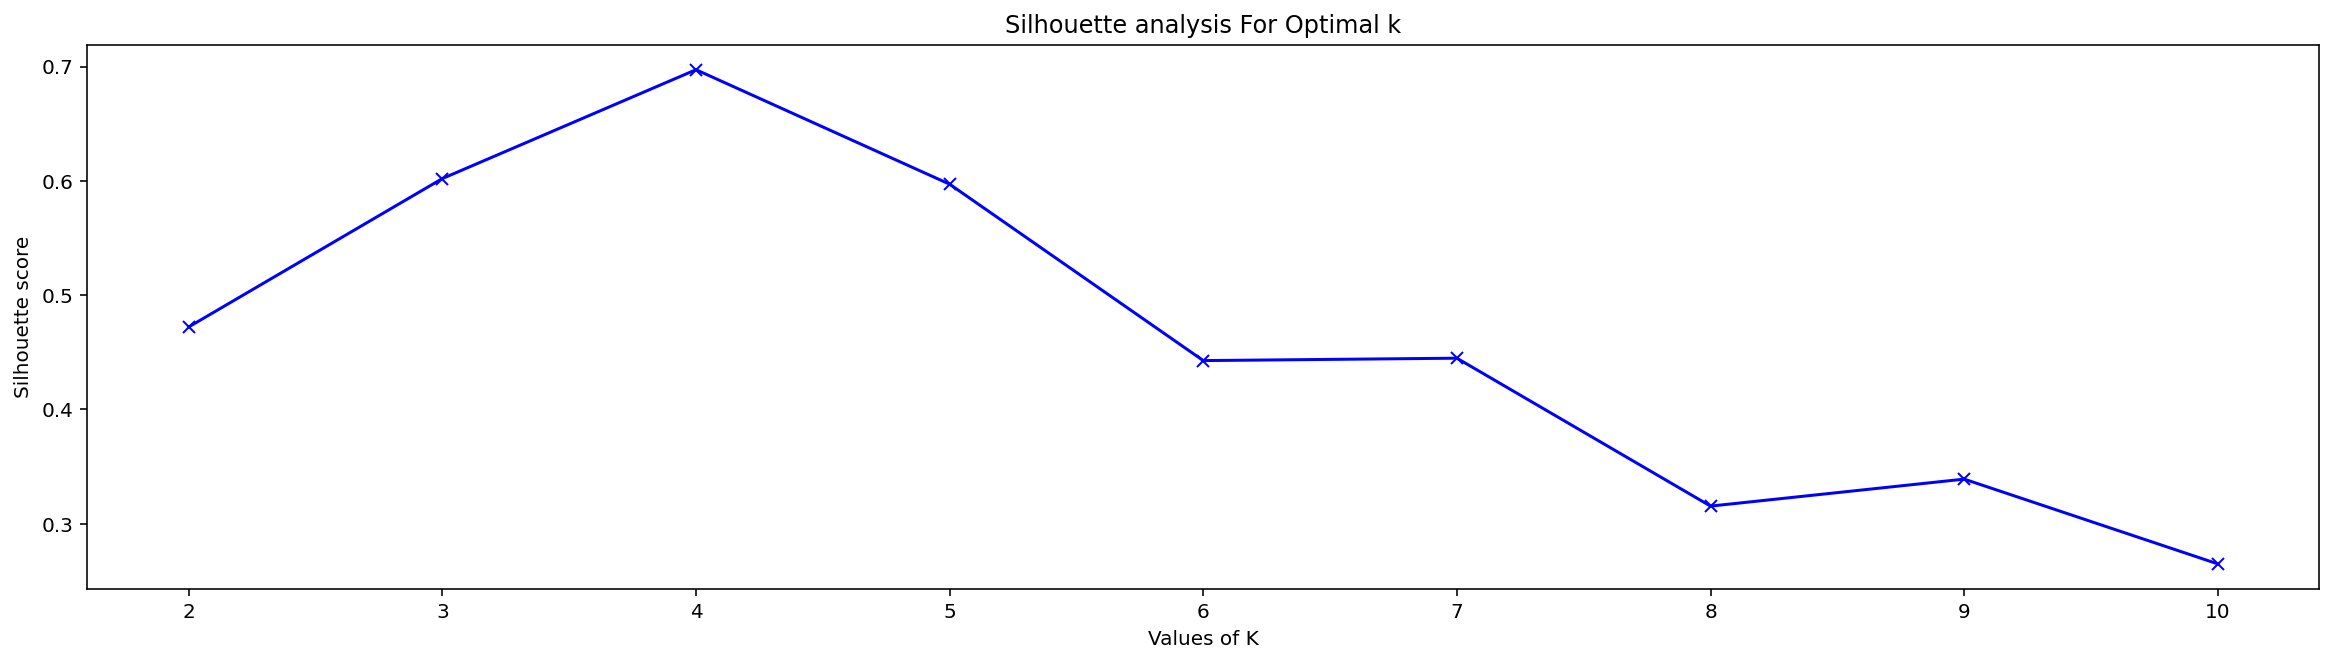

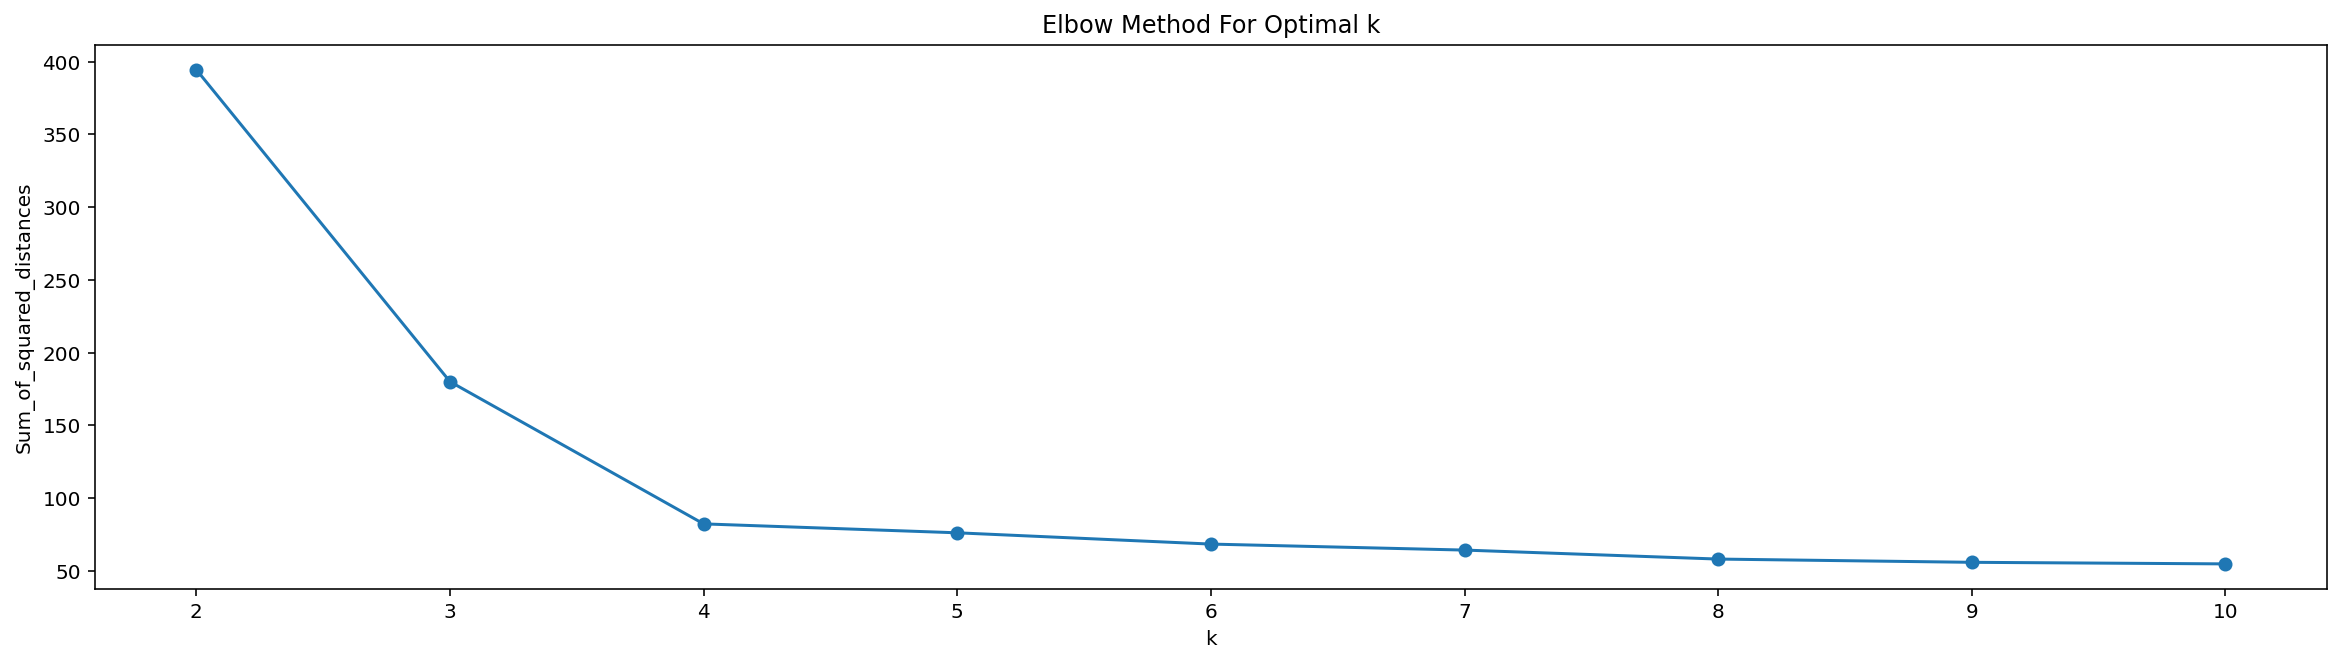

In [82]:
d9.kmean(4)
# d9.kmeans_classification(2)
# d9.df1_knn
d9.minibatch_Kmeans_find()

### for Minibatch Kmeans 4 clusters look good observing the knee points of curve

Centere of clusters [[0.9140251  0.01068023 0.2872197  0.33718759 0.         0.37858259
  0.26778854 1.         0.60997958]
 [0.90167588 0.01119981 0.27716715 0.32938795 0.         0.34348374
  0.24677941 0.         0.6302678 ]
 [0.93106308 0.01892275 0.31294766 0.36509686 1.         0.50428357
  0.30388299 1.         0.43054087]
 [0.92042697 0.01425349 0.30676606 0.34660059 1.         0.49274024
  0.29554903 0.         0.39469887]]
Mini Batch kmeans silhoutte score for  4  : 0.6972425055053687
Mini Batch kmeans DBI score for k =  4  : 0.48741551039771014


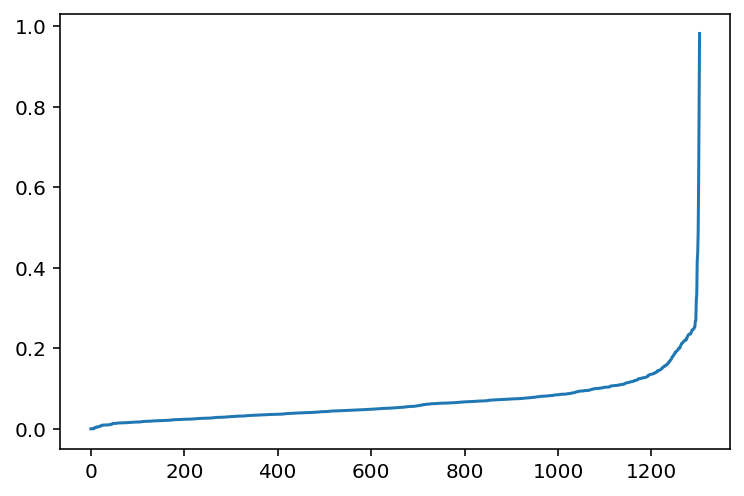

In [83]:
d9.minibatch_kmean(4)
# d9.minibatch_kmeans_classification(2)
d9.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.1

[-1  0  1 ...  4  3  1]
DBscan silhoutte score for espislon =  0.1  : -0.1581789997321886
DBI score for espislon =  0.1  : 1.477365501414939
agglomerative silhoutte score for  : 0.6019870139320458
agglomerative DBI score for  : 0.6455007807904086
[-1  2  5 ...  0  1  5]
optics silhoutte score for espislon =   : -0.06593539169687451
optI score for espislon =   : 1.4886268027541874
0.29758193760405033
[1 0 0 ... 1 1 0]
MeanShift silhoutte score for   =   : 0.4689923557232846
msI score for   =   : 0.6551768778347863


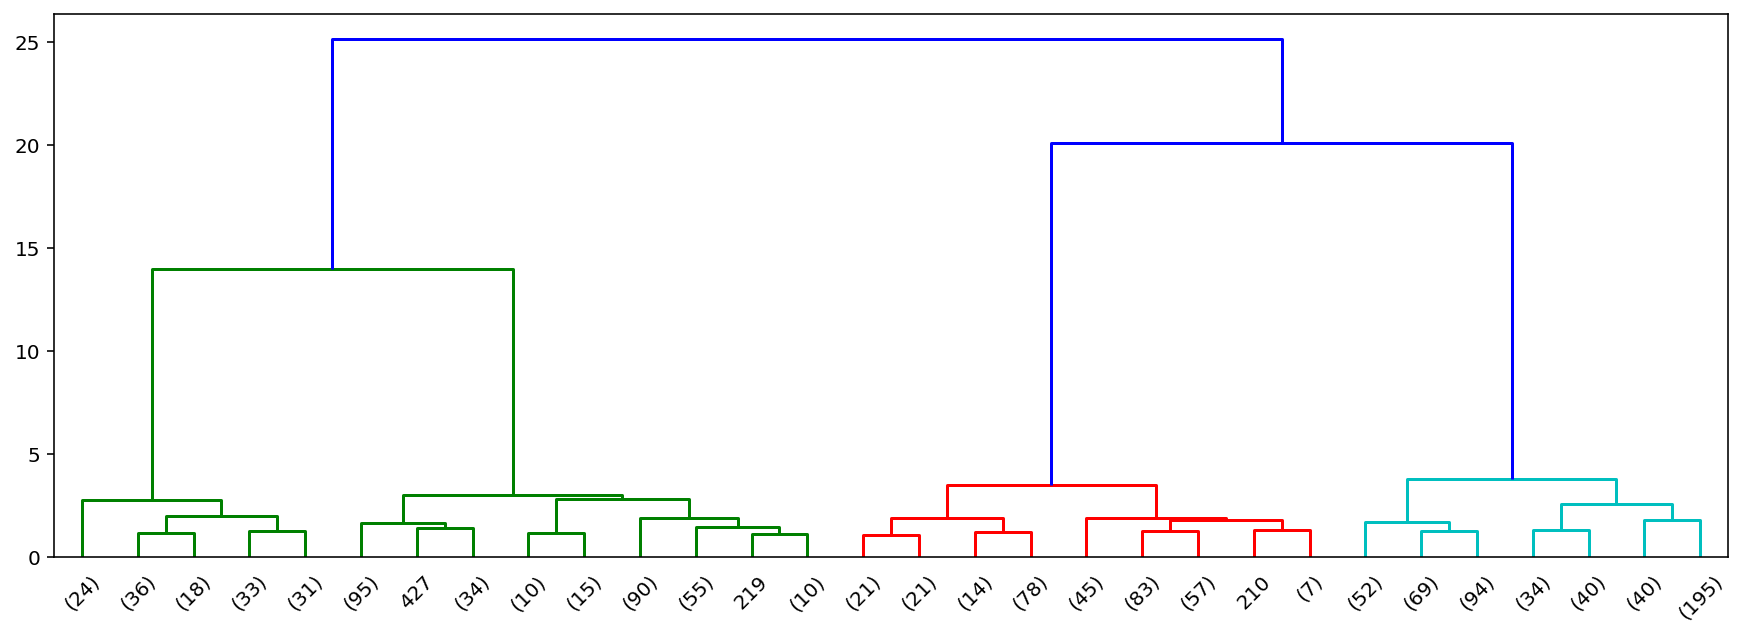

In [84]:
d9.dbscan(0.1)

# d9.dbscan_clustering(0.1)

d9.agglomerative(3)

# d9.agglomerative_classification(2)

d9.optics()

# d9.optics_clustering()

d9.MeanShift()
# d9.MeanShift_clustering(0.5)

# 10th Dataset

(1731, 17)
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
Histogram before any normalization(log transformation)
Histogram after normalization(log transformation)
Shape of X : (1731, 17)
kmeans  2  : 0.324154278913798
kmeans  3  : 0.2847516467530855
kmeans  4  : 0.2653290904185537
kmeans  5  : 0.26966372304767683
kmeans  6  : 0.27243146216580455
kmeans  7  : 0.26514854429150486
kmeans  8  : 0.25697511914012344
kmeans  9  : 0.24678577259972856
kmeans  10  : 0.2588218119246841


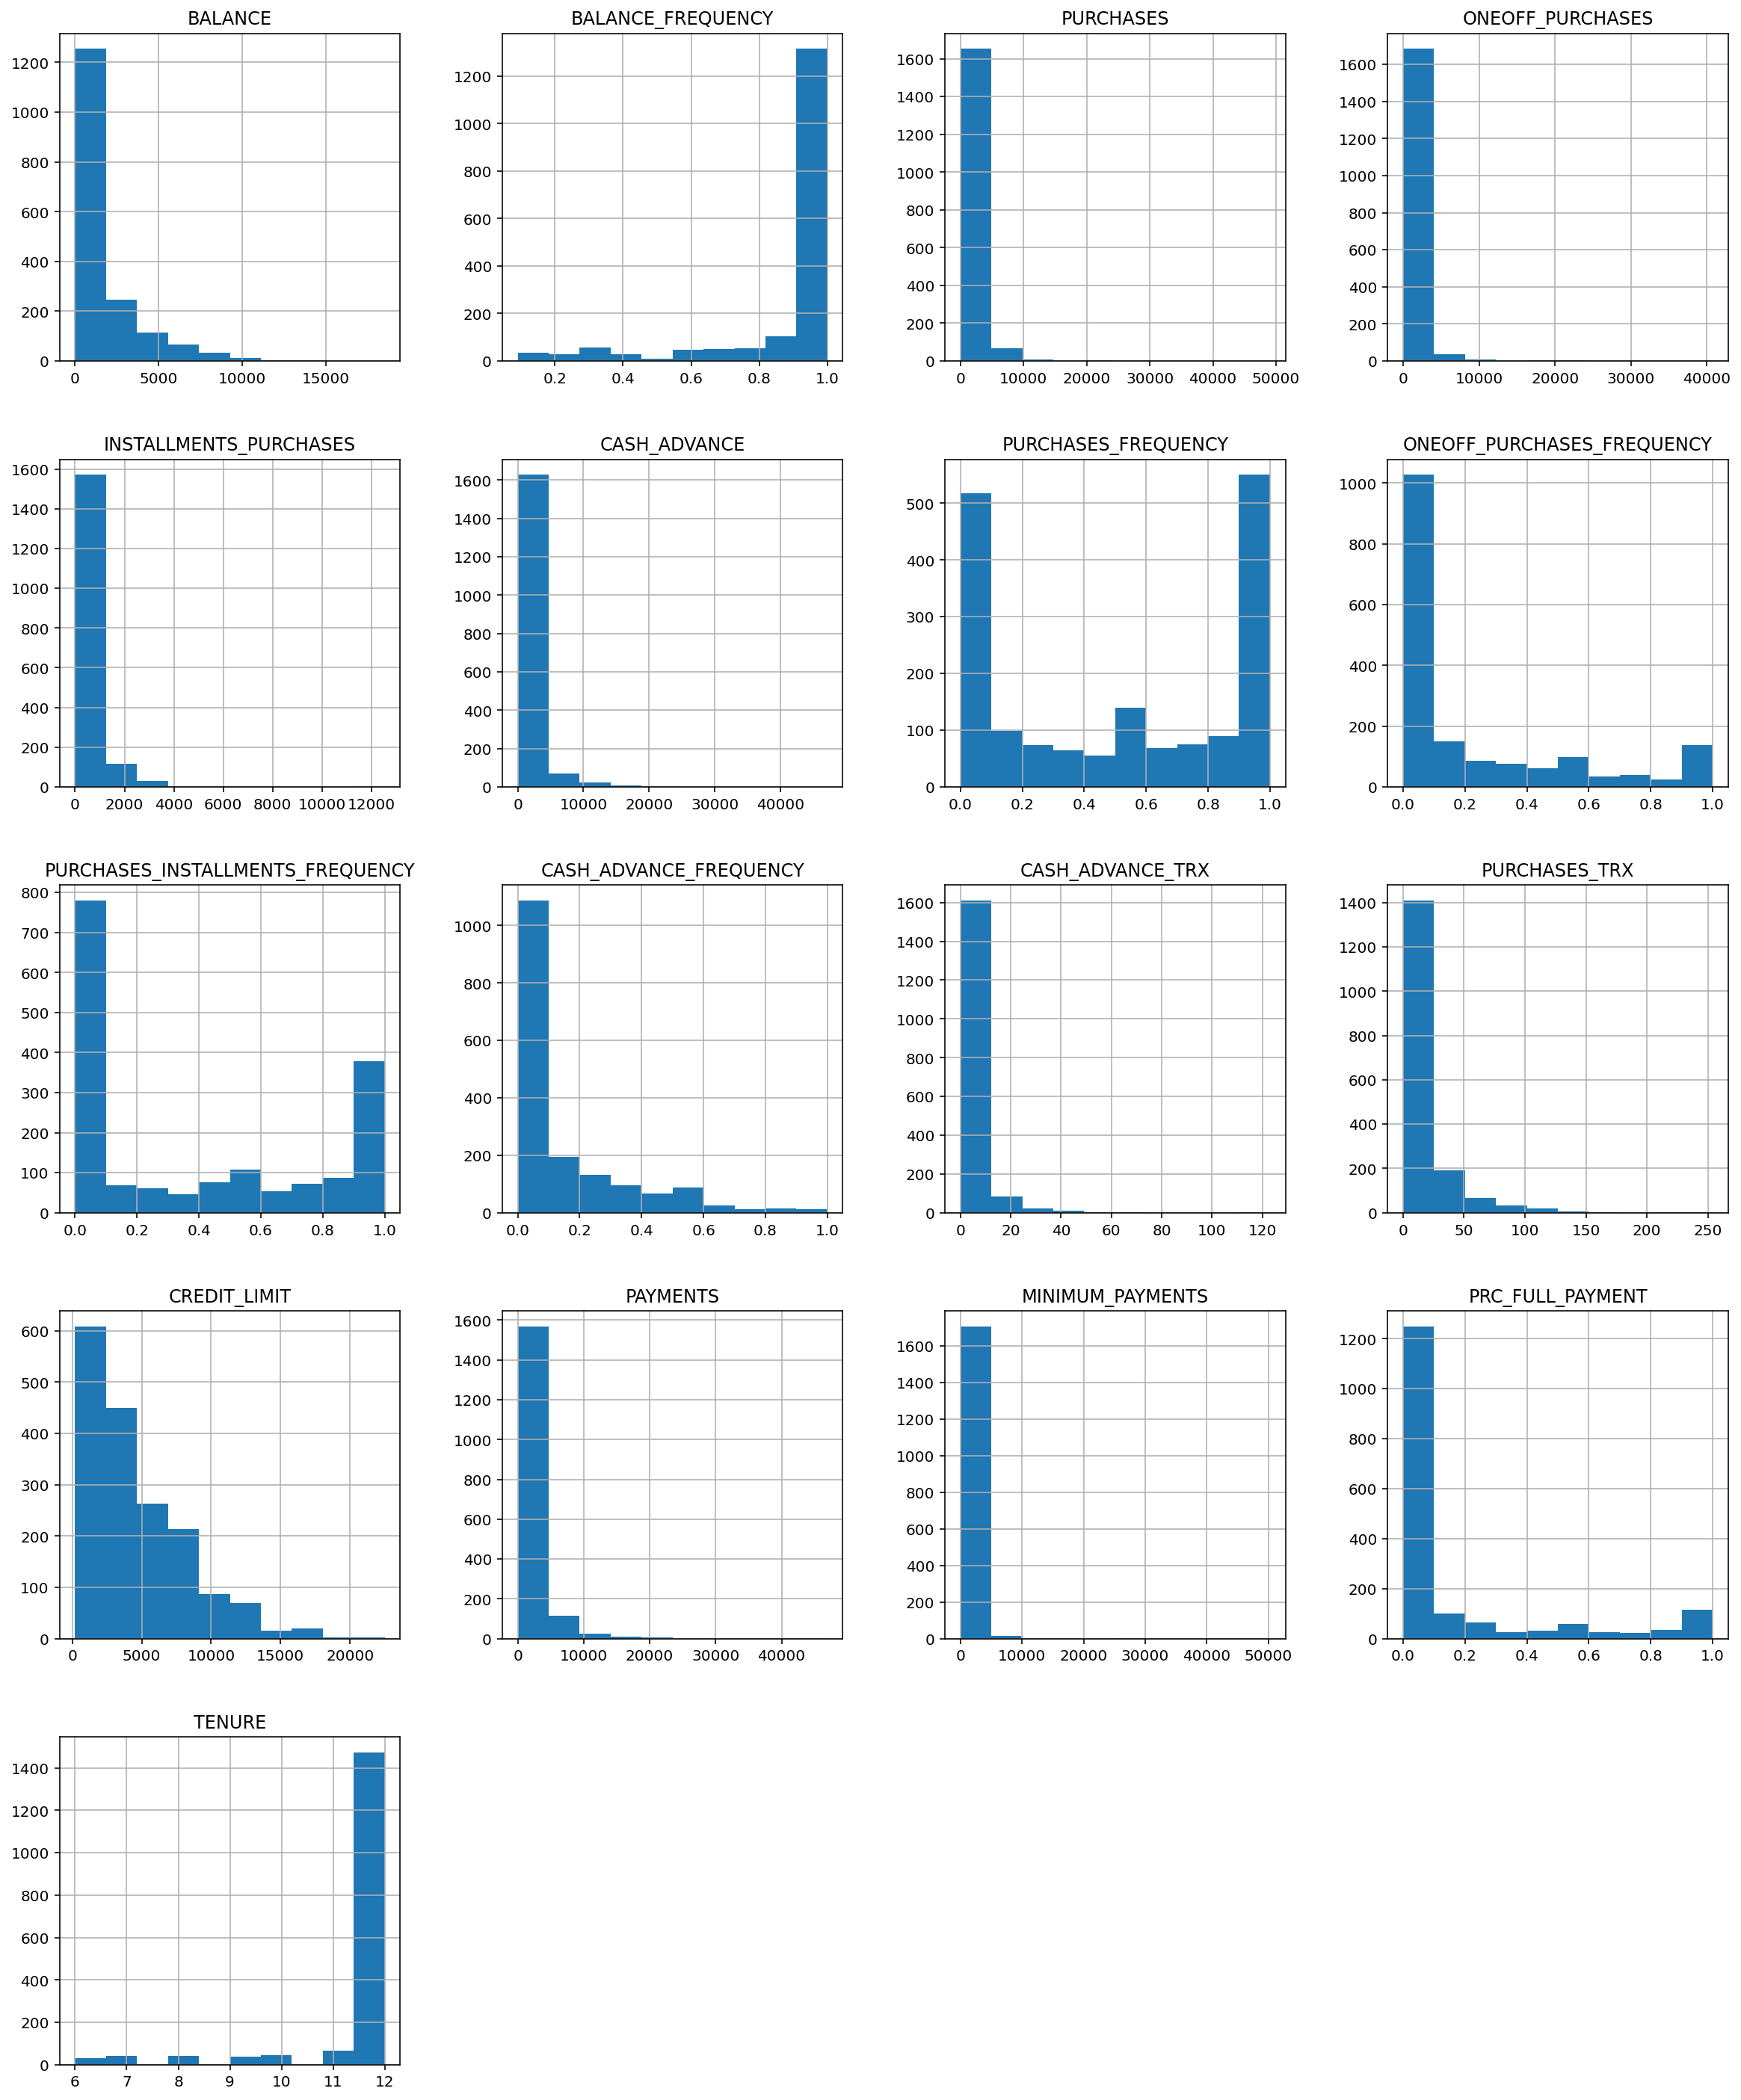

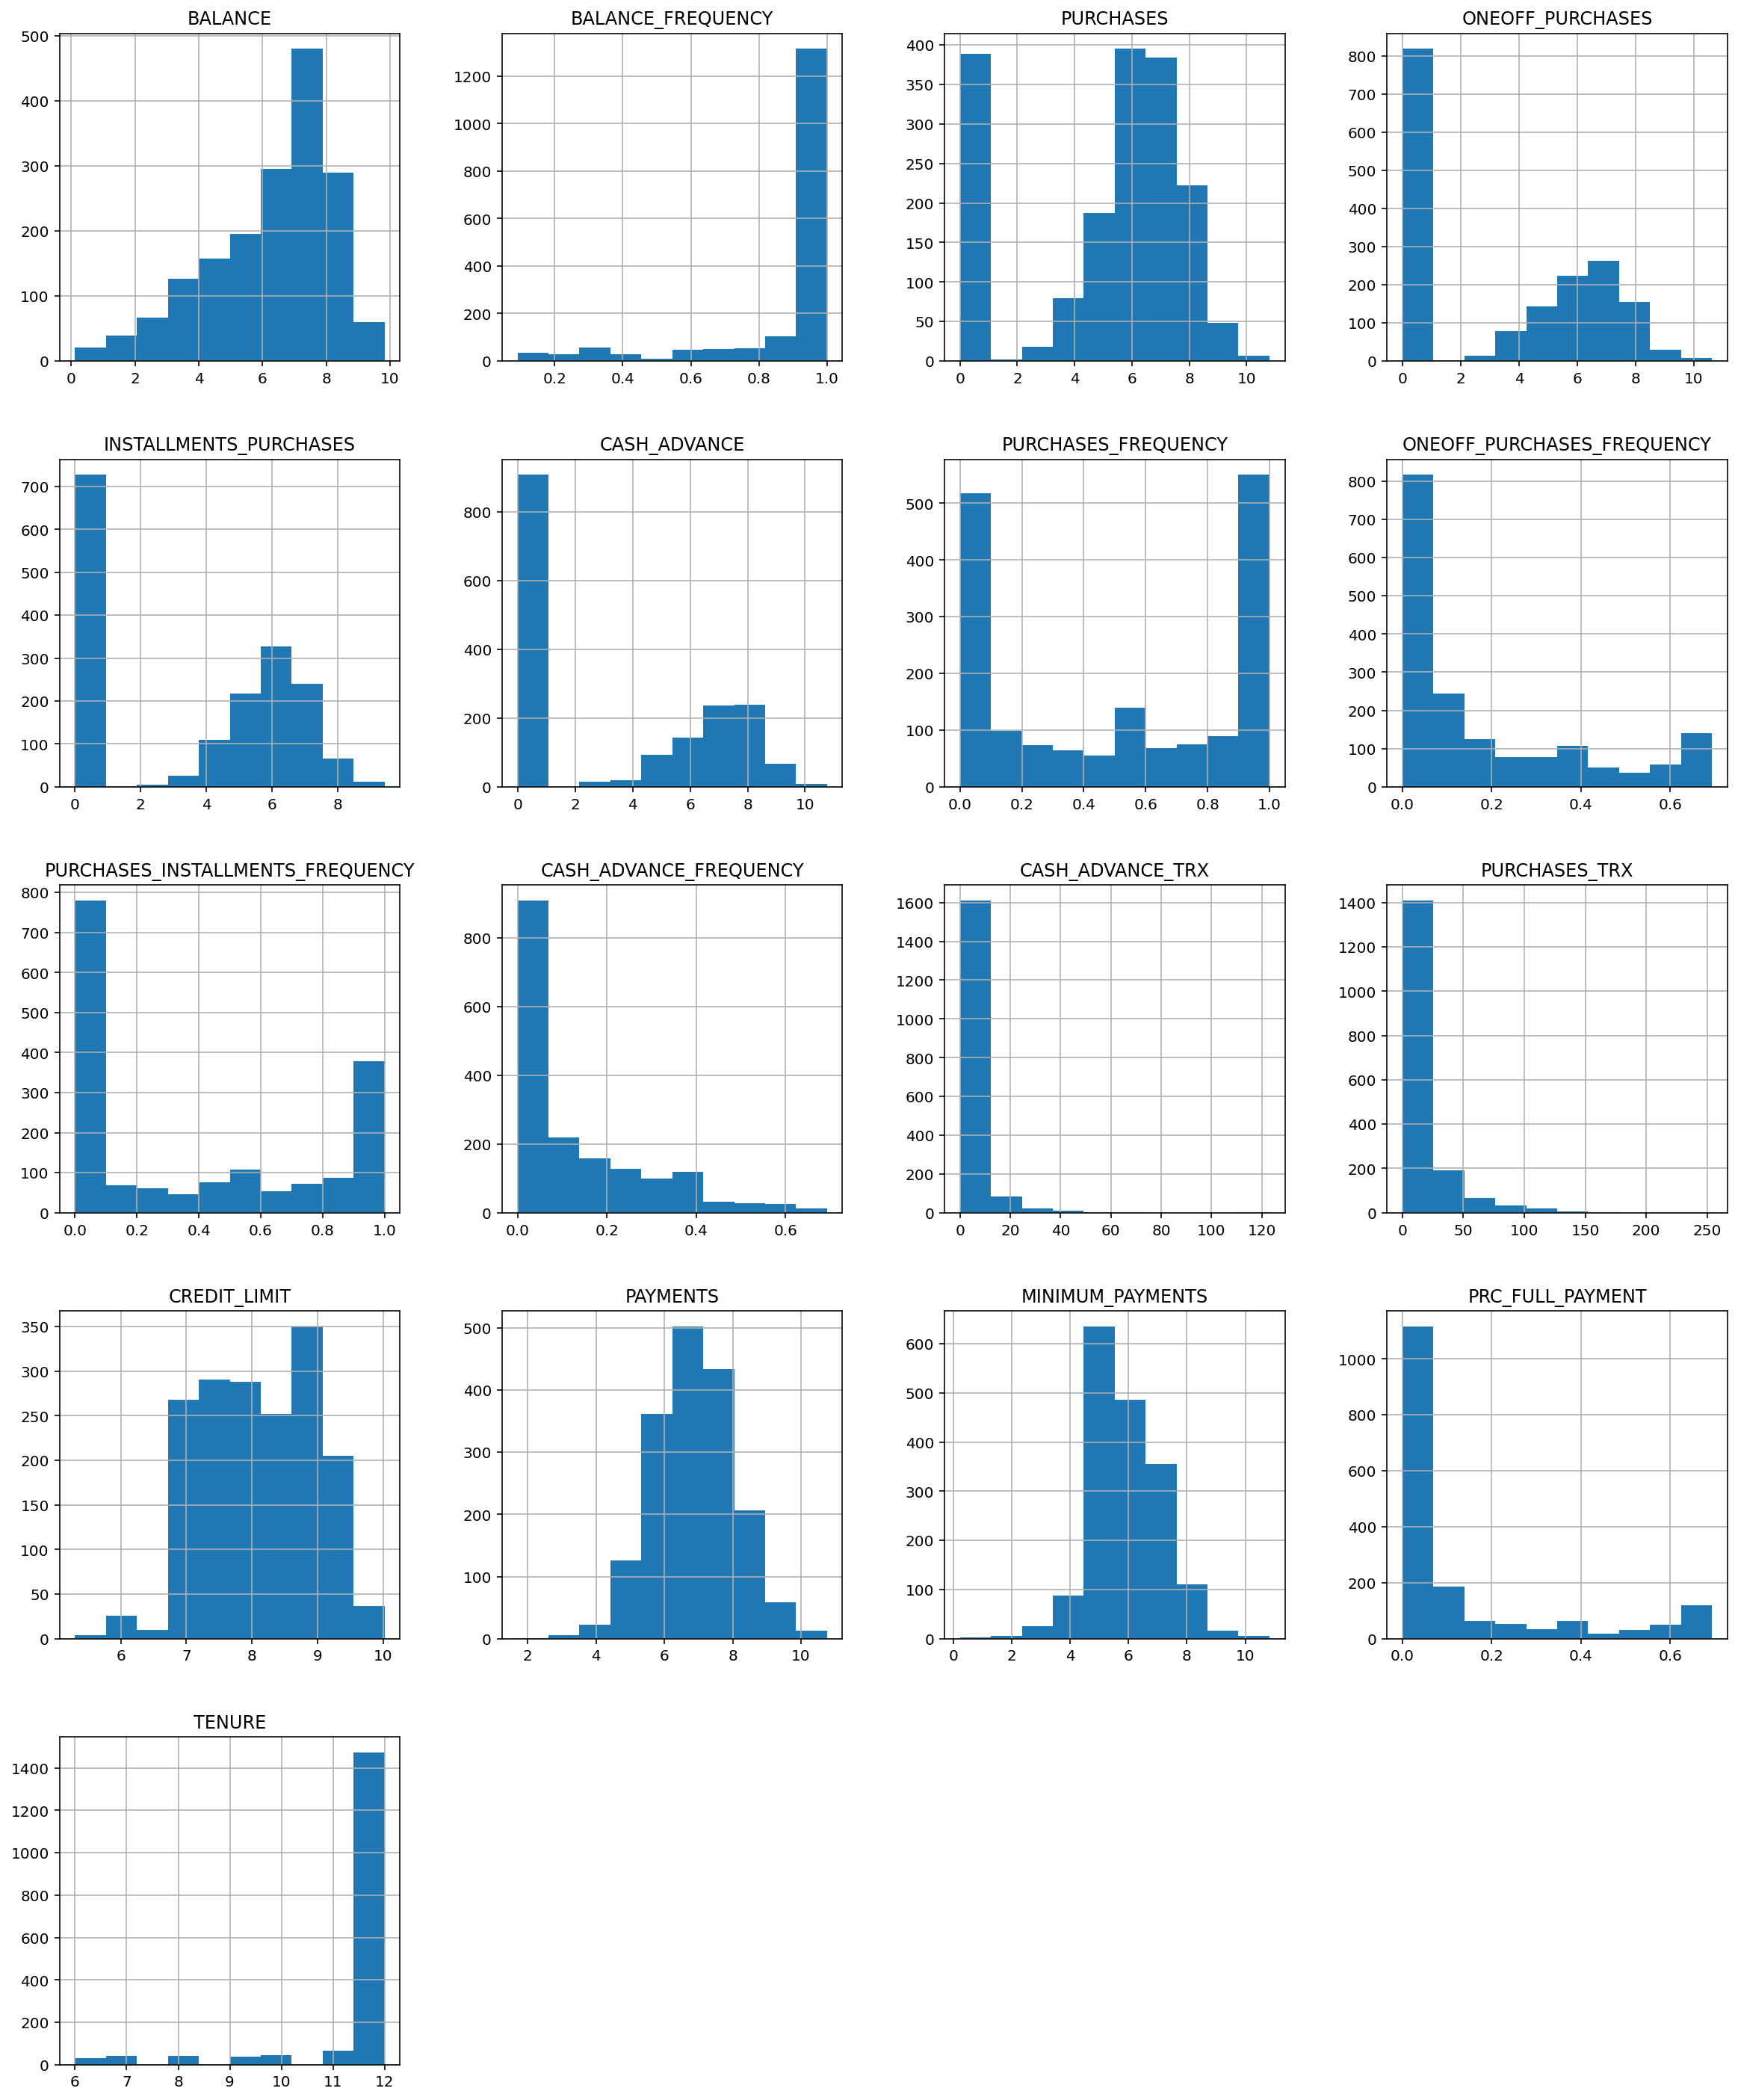

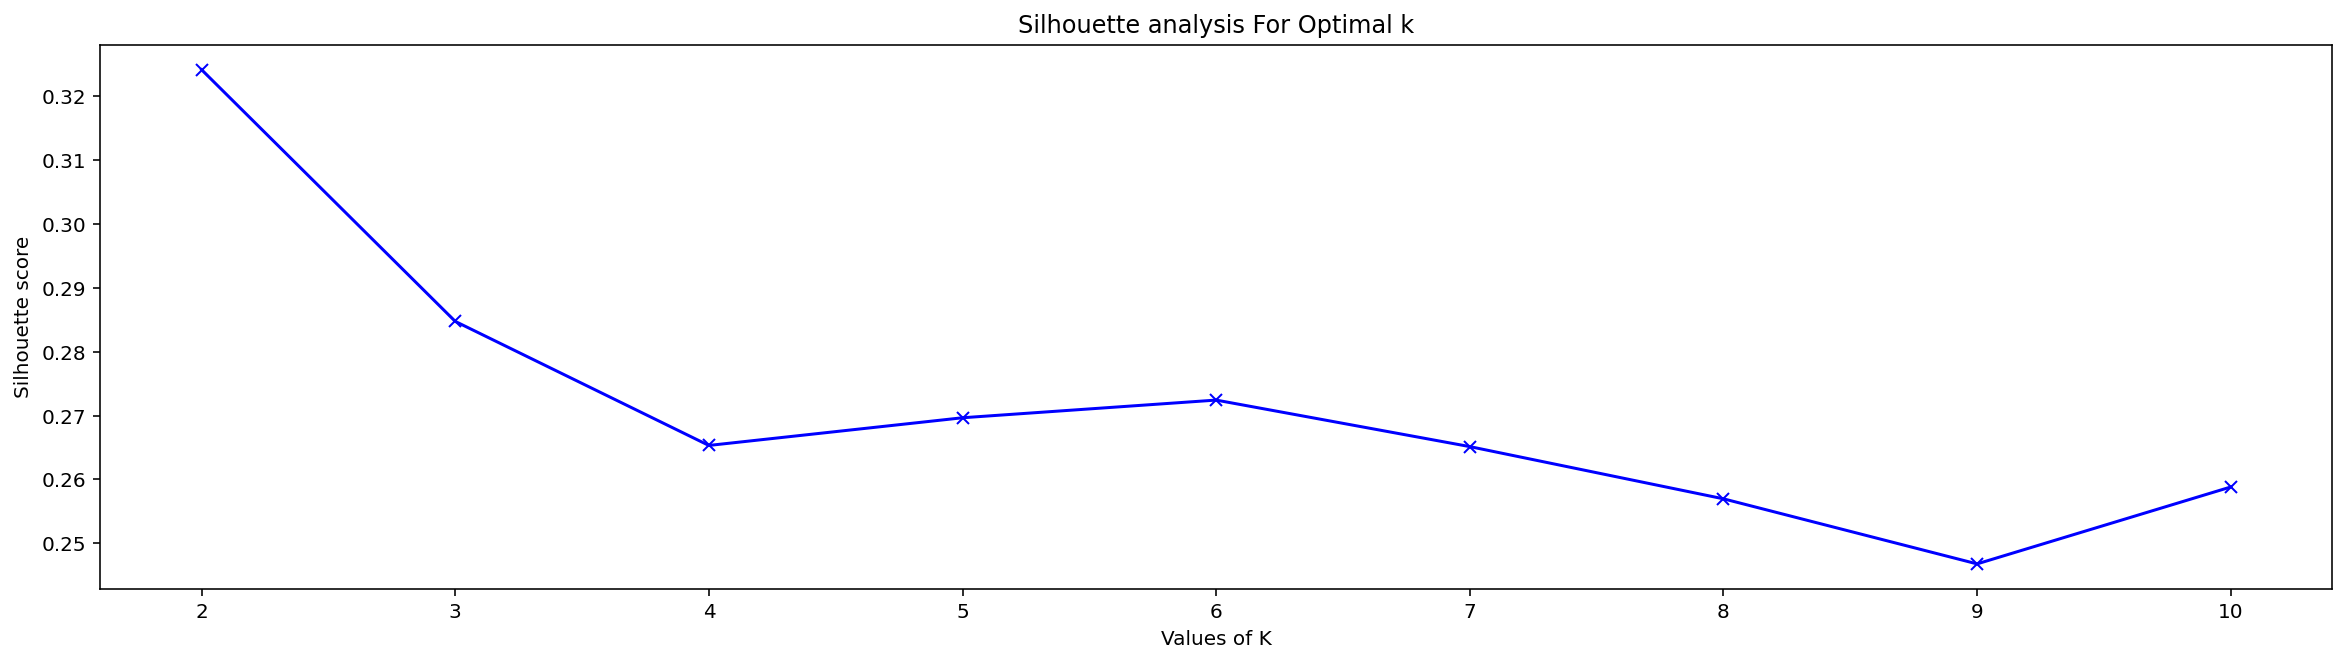

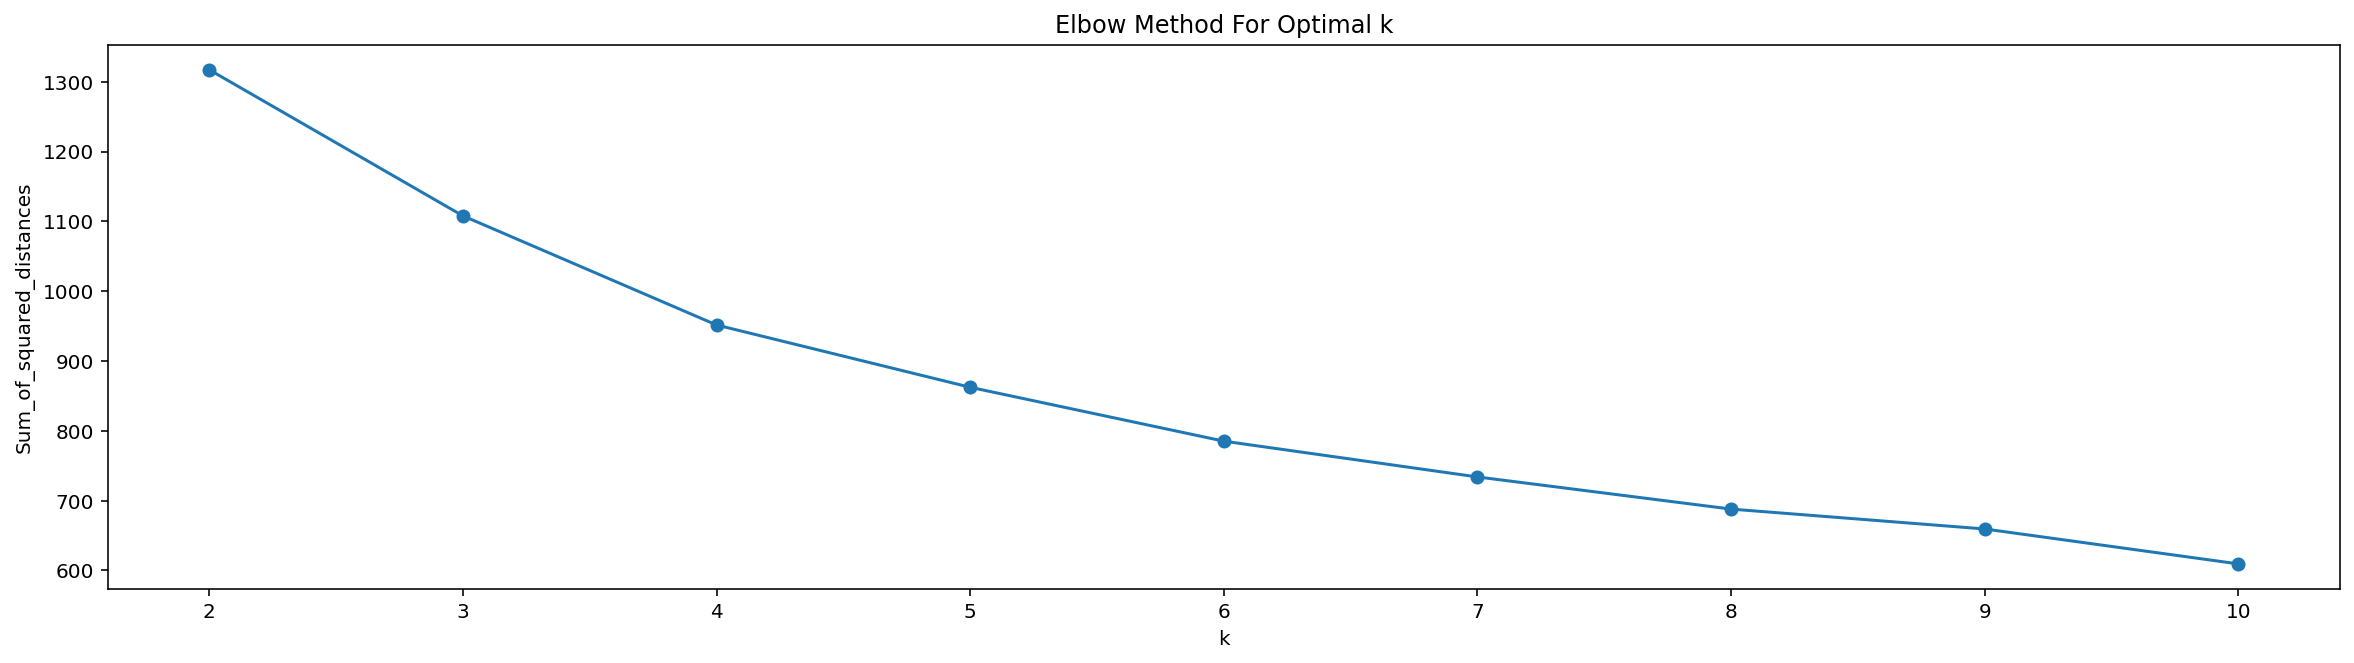

In [87]:
d10 = dataset('CC GENERAL-2.csv')
d10.data_preprocessing()
d10.normalization_scaling()

d10.make_X()

# d10.make_X('Class')

d10.Kmeans_find()


### For kmeans 6 clusters seems best observing the knee point on curves

centres of cluster [[3.05932062e-01 3.95698698e-01 4.35423048e-01 2.18644734e-01
  3.29056492e-01 5.74947495e-02 2.47927886e-01 9.11123165e-02
  1.61684006e-01 1.63560484e-02 2.03252033e-03 1.46071940e-02
  5.49287648e-01 4.67224115e-01 4.07913183e-01 3.25967905e-01
  8.98674242e-01]
 [6.92543265e-01 9.40876308e-01 5.76507960e-01 5.77909941e-01
  1.11387712e-01 2.72415314e-01 3.77222139e-01 3.97383556e-01
  4.57981088e-02 1.42688368e-01 2.30075770e-02 3.25405753e-02
  5.84126969e-01 5.63430859e-01 5.57245333e-01 6.10565212e-02
  9.33673469e-01]
 [7.48654245e-01 9.24949215e-01 6.50878644e-02 4.51320564e-02
  2.37235501e-02 6.46374547e-01 2.24029686e-02 1.57369204e-02
  8.57178027e-03 3.56364850e-01 5.79313865e-02 1.08576675e-03
  5.88036359e-01 5.71911315e-01 5.81226252e-01 4.12719591e-02
  9.00597907e-01]
 [7.70214251e-01 9.68861441e-01 6.42481685e-01 4.25882773e-01
  6.65302814e-01 6.69676361e-01 8.47731611e-01 3.23467456e-01
  7.46125418e-01 3.84756142e-01 7.68839900e-02 1.17182768e-

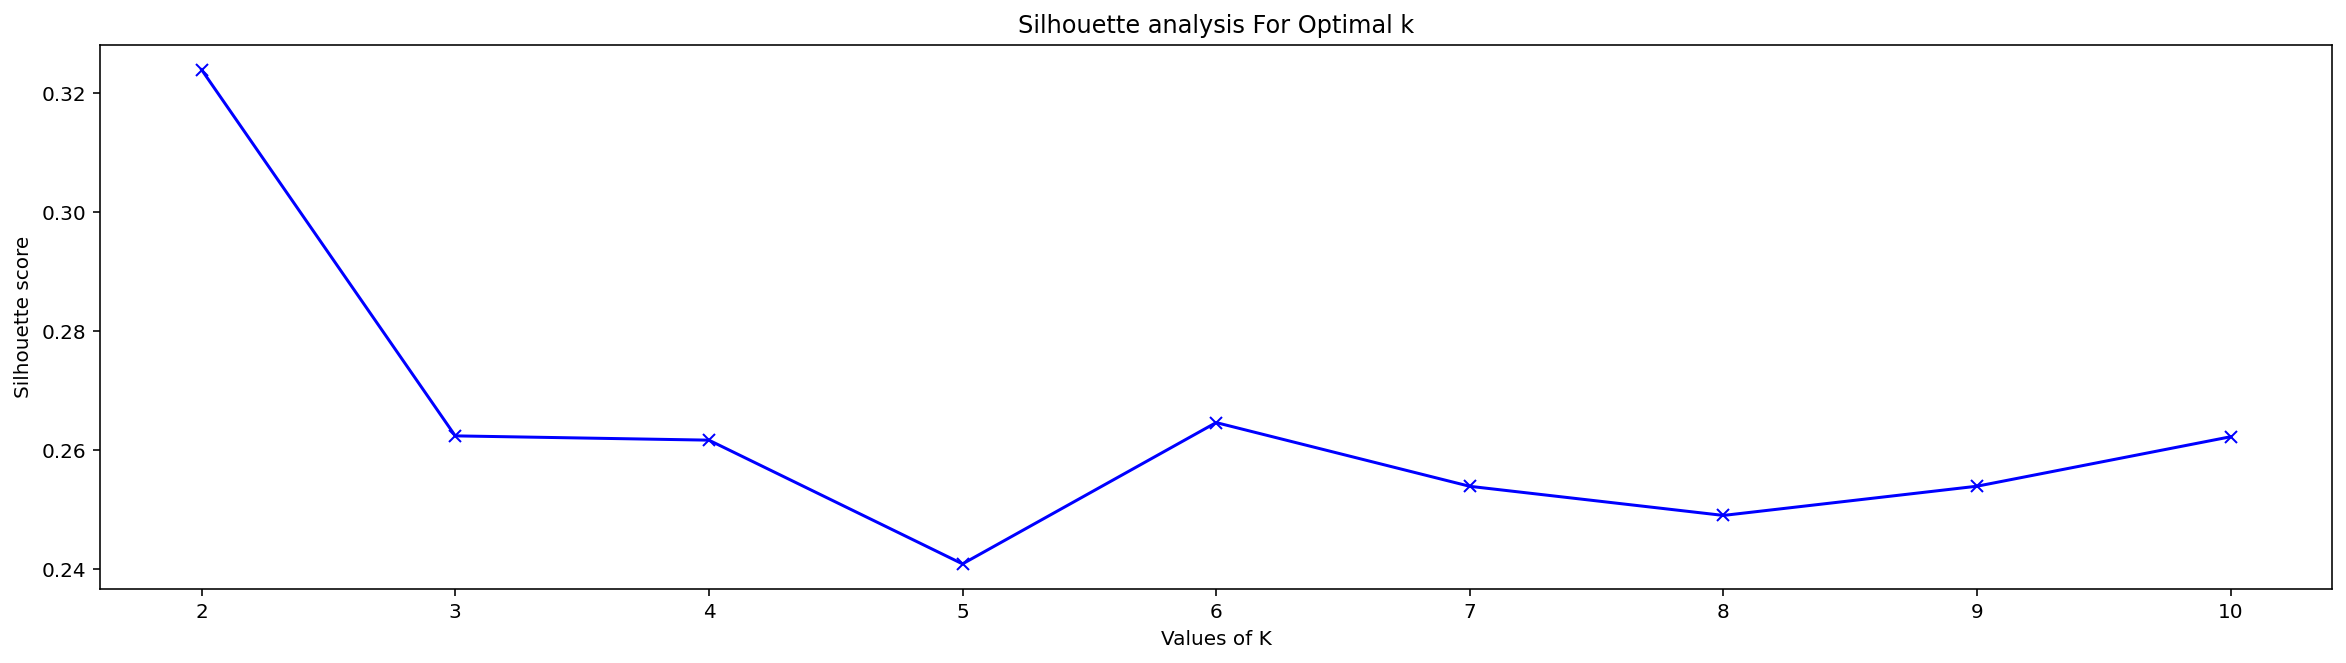

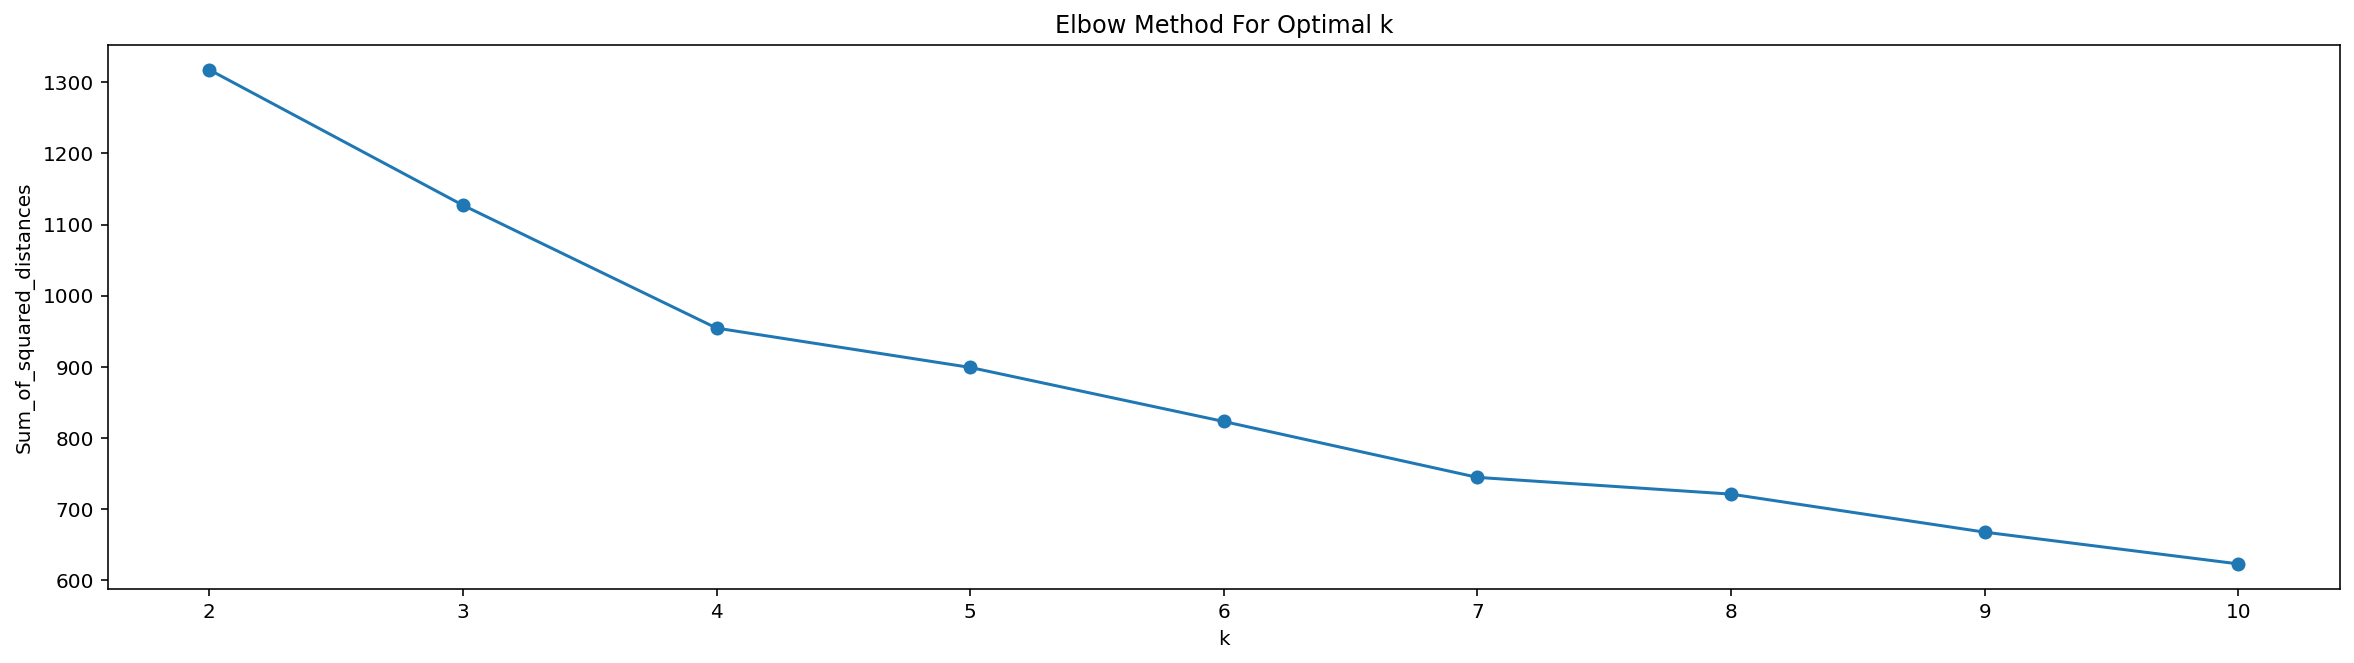

In [88]:
d10.kmean(6)
# d10.kmeans_classification(2)
# d10.df1_knn
d10.minibatch_Kmeans_find()

### for Minibatch Kmeans 5 clusters look good observing the knee points of curve

Centere of clusters [[0.66552053 0.92879549 0.64852286 0.6511388  0.22640248 0.18609133
  0.59917216 0.60907104 0.11519781 0.09440832 0.01599354 0.06547884
  0.61850351 0.5953849  0.53864543 0.16805183 0.94916143]
 [0.647409   0.97276618 0.65374811 0.3908704  0.69071463 0.20358157
  0.93907129 0.34349874 0.87610918 0.11225316 0.02133944 0.13537172
  0.61471884 0.60389372 0.54674403 0.2360365  0.95479607]
 [0.80206117 0.9427752  0.19180719 0.16076481 0.06736484 0.73490139
  0.0768417  0.06094277 0.02820308 0.48217821 0.09230355 0.00496298
  0.684723   0.62944611 0.62686874 0.04379801 0.89306197]
 [0.65815254 0.88781813 0.11558952 0.10633797 0.01282833 0.46487564
  0.03263384 0.03879377 0.00363976 0.17823597 0.01895215 0.00177034
  0.48064629 0.50935455 0.52406166 0.05519603 0.90938713]
 [0.37663986 0.57455892 0.49881056 0.15999891 0.48543518 0.03452878
  0.43037855 0.06002122 0.36196982 0.01355711 0.00138264 0.02450168
  0.54509443 0.47424635 0.43612054 0.3003644  0.87874187]]
Mini Batc

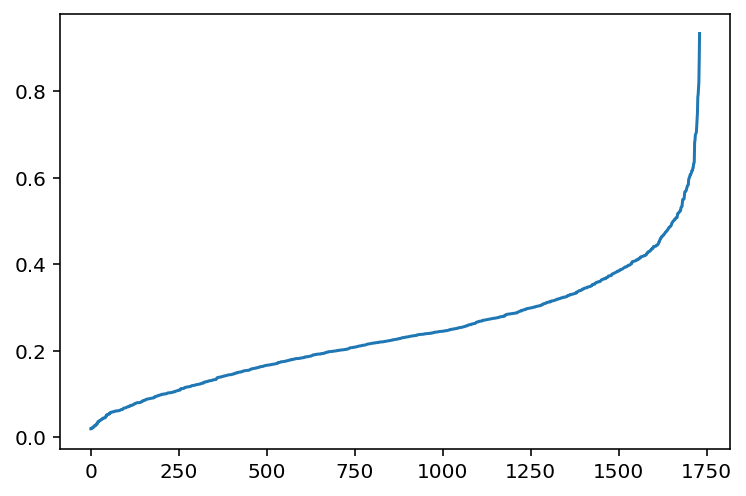

In [89]:
d10.minibatch_kmean(5)
# d10.minibatch_kmeans_classification(2)
d10.dbscan_find()


### From the above cure and knee value the opyimal value of epislon seems 0.4

[ 0 -1  0 ...  0  0  0]
DBscan silhoutte score for espislon =  0.4  : -0.10003499604762338
DBI score for espislon =  0.4  : 2.6226170455175906
agglomerative silhoutte score for  : 0.21919021089492052
agglomerative DBI score for  : 1.5548541999965282
[-1 -1 -1 ... -1 -1 -1]
optics silhoutte score for espislon =   : -0.2770286127501254
optI score for espislon =   : 1.1086406965864353
0.8444842119064294
[2 2 0 ... 1 0 2]
MeanShift silhoutte score for   =   : 0.22602687646211914
msI score for   =   : 1.5099404914339813


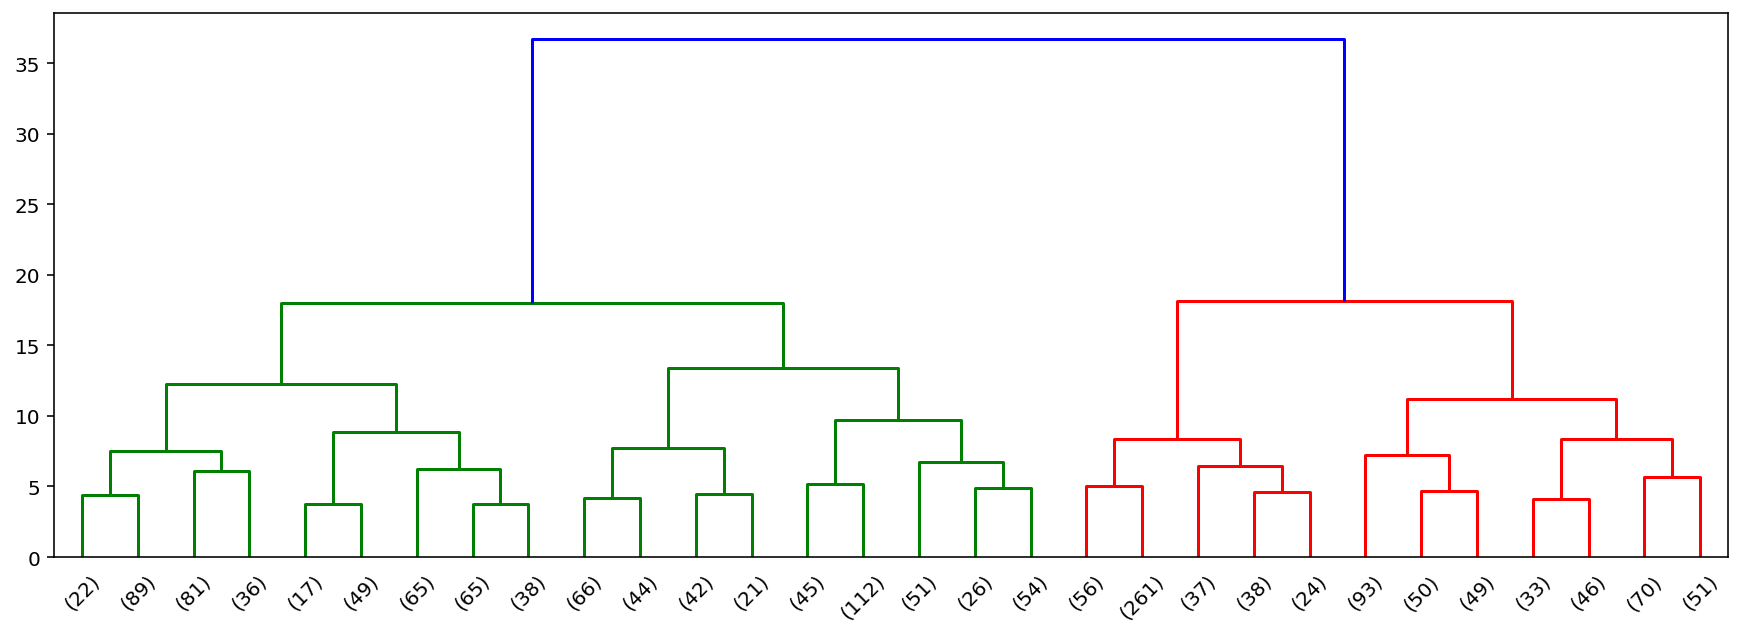

In [90]:
d10.dbscan(0.4)

# d10.dbscan_clustering(0.4)

d10.agglomerative(5)

# d10.agglomerative_classification(2)

d10.optics()

# d10.optics_clustering()

d10.MeanShift()
# d10.MeanShift_clustering(0.5)

# Clustering Datasets Results

In [91]:
df_km_clust

clusters_km  silhoutte_km    dbi_km
0          6.0      0.287469  1.831059
1          5.0      0.247596  1.483893
2          5.0      0.068977  2.955719
3          6.0      0.183641  1.839147
4          7.0      0.209232  1.813176
5          7.0      0.206799  1.808445
6          3.0      0.540444  0.750693
7          7.0      0.750342  0.377532
8          4.0      0.697243  0.487416
9          6.0      0.274511  1.404629

In [115]:
df_km_clust.to_csv('df_km_clust.csv',index=False)

In [92]:
df_mbkm_clust

clusters_mbkm  silhoutte_mbkm  dbi_mbkm
0            6.0        0.258728  1.872918
1            6.0        0.243951  1.387357
2            6.0        0.068033  3.149464
3            9.0        0.167981  1.973802
4            7.0        0.210231  1.808320
5            6.0        0.170079  1.965581
6            3.0        0.540444  0.750693
7            7.0        0.750342  0.377532
8            4.0        0.697243  0.487416
9            5.0        0.163687  1.788759

In [114]:
df_mbkm_clust.to_csv('df_mbkm_clust.csv',index=False)

In [93]:
df_agg_clust

clusters_agg  silhoutte_agg   dbi_agg
0           6.0       0.256054  1.697168
1           6.0       0.220313  1.437767
2           6.0       0.089712  2.950294
3           6.0       0.187401  1.800129
4           6.0       0.154017  1.989479
5           6.0       0.175081  1.935132
6           3.0       0.540444  0.750693
7           3.0       0.440874  0.907440
8           3.0       0.601987  0.645501
9           5.0       0.219190  1.554854

In [113]:
df_agg_clust.to_csv('df_agg_clust.csv',index=False)

In [94]:
df_db_clust

clusters_db  silhoutte_db    dbi_db
0  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...      0.037206  1.383806
1  ([-1, 0, 1, 2, 3, 4, 5], [1646, 1246, 1383, 19...      0.093367  1.695734
2  ([-1, 0, 1, 2, 3, 4, 5], [3147, 64, 25, 23, 21...     -0.095378  1.296743
3  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...      0.260738  1.561447
4  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...      0.160241  1.707554
5  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1183, 91...      0.139009  2.056119
6              ([-1, 0, 1, 2], [538, 1348, 594, 20])      0.296066  1.609113
7  ([-1, 0, 1, 2, 3, 4, 5], [257, 316, 230, 367, ...      0.622178  1.327333
8  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [669, 167, 1...     -0.158179  1.477366
9         ([-1, 0, 1, 2, 3], [663, 971, 38, 40, 19])     -0.100035  2.622617

In [112]:
df_db_clust.to_csv('df_db_clust.csv',index=False)

In [95]:
df_opt_clust

clusters_opt  silhoutte_opt   dbi_opt
0  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...      -0.268069  1.111666
1  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [6118, 23, 1...      -0.383322  1.171347
2  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...       0.244757  1.471613
3  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...       0.259411  1.801636
4  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...       0.019150  1.519820
5  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...       0.235727  1.858881
6  ([-1, 0, 1, 2, 3, 4], [2174, 20, 19, 20, 29, 2...      -0.234534  1.075175
7  ([0, 1, 2, 3, 4, 5, 6], [329, 379, 512, 281, 2...       0.750342  0.377532
8  ([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [512, 136...      -0.065935  1.488627
9                ([-1, 0, 1, 2], [1638, 48, 19, 26])      -0.277029  1.108641

In [111]:
df_opt_clust.to_csv('df_opt_clust.csv',index=False)

In [96]:
df_ms_clust

clusters_ms    silhoutte_ms  \
0        ([0, 1, 2, 3, 4], [10543, 1693, 60, 33, 1])        0.223649   
1                     ([0, 1, 2], [3085, 2327, 909])         0.23224   
2                                      ([0], [3309])  Not-Applicable   
3  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...         0.12967   
4            ([0, 1, 2, 3, 4], [2171, 5, 14, 23, 3])        0.120791   
5  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...        0.015129   
6  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...        0.318029   
7  ([0, 1, 2, 3, 4, 5, 6, 7], [510, 379, 329, 278...        0.733189   
8  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [522,...        0.468992   
9          ([0, 1, 2, 3, 4], [472, 752, 460, 38, 9])        0.226027   

           dbi_ms  
0        1.318673  
1        1.641883  
2  Not-Applicable  
3        0.757709  
4        1.726013  
5         0.30941  
6         0.59634  
7        0.424526  
8        0.655177  
9         1.50994

In [110]:
df_ms_clust.to_csv('df_ms_clust.csv',index=False)

# Classification + Clustering Datasets Results

In [97]:
df_km_classification_test

silhoutte_km    dbi_km   fowlkes       ARI  Mutual_Information  V-measure  \
0      0.147249  1.977953  0.665966 -0.032960            0.003158   0.006364   
1      0.253178  1.629049  0.636479  0.001273            0.000232   0.000449   
2      0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3      0.179662  2.087443  0.550929  0.096687            0.051600   0.074843   
4      0.153581  2.374335  0.607560  0.001075            0.000802   0.001427   
5      0.190709  2.020178  0.643390  0.280701            0.150007   0.217848   
6      0.461182  1.031717  0.708945  0.000843            0.000413   0.001160   

   Homogeneity  
0     0.007695  
1     0.000676  
2     0.002852  
3     0.075226  
4     0.001860  
5     0.219256  
6     0.015840

In [109]:
df_km_classification_test.to_csv('df_km_classification_test.csv',index=False)

In [98]:
df_mbkm_classification_test

silhoutte_mbkm  dbi_mbkm   fowlkes       ARI  Mutual_Information  \
0        0.147249  1.977953  0.665966 -0.032960            0.003158   
1        0.251196  1.629971  0.635890  0.000177            0.000021   
2        0.134115  2.522545  0.548869  0.003623            0.001976   
3        0.178279  2.094276  0.505301  0.004753            0.003520   
4        0.153581  2.374335  0.607560  0.001075            0.000802   
5        0.199156  1.837586  0.597871  0.142987            0.114275   
6        0.450267  0.913539  0.734017 -0.003656            0.001723   

   V-measure  Homogeneity  
0   0.006364     0.007695  
1   0.000041     0.000062  
2   0.003081     0.002852  
3   0.005106     0.005131  
4   0.001427     0.001860  
5   0.172823     0.167029  
6   0.005121     0.066085

In [108]:
df_mbkm_classification_test.to_csv('df_mbkm_classification_test.csv',index=False)

In [99]:
df_agg_classification_test

silhoutte_agg   dbi_agg   fowlkes       ARI  Mutual_Information  V-measure  \
0       0.232849  1.738363  0.776667  0.059964            0.003193   0.007968   
1       0.252580  1.642527  0.635731  0.001036            0.000305   0.000589   
2       0.134115  2.522545  0.548869  0.003623            0.001976   0.003081   
3       0.179662  2.087443  0.505531  0.005301            0.003772   0.005471   
4       0.110494  2.807480  0.608229 -0.002643            0.000300   0.000536   
5       0.199156  1.837586  0.597580  0.141994            0.113777   0.172127   
6       0.460886  1.031704  0.708945  0.000843            0.000413   0.001160   

   Homogeneity  
0     0.007780  
1     0.000889  
2     0.002852  
3     0.005499  
4     0.000696  
5     0.166301  
6     0.015840

In [107]:
df_agg_classification_test.to_csv('df_agg_classification_test.csv',index=False)

In [100]:
df_db_classification_test

silhoutte_db    dbi_db   fowlkes       ARI  Mutual_Information  \
0     -0.014021  1.402789  0.542066 -0.088732        3.828651e-02   
1      0.050993  1.728887  0.476126 -0.074477        7.953958e-02   
2     -0.079562  1.417798  0.706975  0.000000        9.436896e-16   
3      0.251257  1.503091  0.212594  0.010270        5.750782e-02   
4      0.117229  1.745240  0.540082 -0.081469        2.281667e-02   
5      0.094768  2.043521  0.529209  0.169491        2.255650e-01   
6      0.213206  1.641231  0.889574 -0.007067        4.641250e-04   

      V-measure   Homogeneity  
0  4.296538e-02  9.329231e-02  
1  9.458547e-02  2.315142e-01  
2  2.724158e-15  1.362079e-15  
3  3.498262e-02  8.383922e-02  
4  2.864376e-02  5.292742e-02  
5  2.243237e-01  3.296950e-01  
6  2.084176e-03  1.779768e-02

In [106]:
df_db_classification_test.to_csv('df_db_classification_test.csv',index=False)

In [101]:
df_opt_classification_test

silhoutte_opt   dbi_opt   fowlkes       ARI  Mutual_Information  V-measure  \
0      -0.245077  1.160955  0.596892 -0.049256            0.018422   0.018584   
1      -0.250278  1.231782  0.887113 -0.016195            0.001158   0.005793   
2       0.199442  1.465999  0.647745  0.005624            0.061488   0.108770   
3       0.200841  1.789074  0.321021  0.006069            0.040709   0.030886   
4       0.026327  1.551314  0.294114 -0.014307            0.046397   0.034602   
5       0.233344  1.737948  0.354198  0.098641            0.201100   0.140162   
6      -0.263381  1.154633  0.639484  0.004696            0.004701   0.008894   

   Homogeneity  
0     0.044889  
1     0.003369  
2     0.088750  
3     0.059348  
4     0.107626  
5     0.293936  
6     0.180259

In [104]:
df_opt_classification_test.to_csv('df_opt_classification_test.csv',index=False)

In [102]:
df_ms_classification_test

silhoutte_ms          dbi_ms   fowlkes       ARI  Mutual_Information  \
0        0.215053        1.508793  0.758382  0.044211        5.947549e-03   
1        0.228778        1.666236  0.620450  0.114783        1.093926e-01   
2  Not-Applicable  Not-Applicable  0.706975  0.000000        9.436896e-16   
3        0.131901        0.656243  0.033470  0.000519        5.247248e-01   
4        0.113212        1.769752  0.861077  0.166103        2.710509e-02   
5        0.012265        0.281499  0.012042  0.000143        6.841626e-01   
6        0.325452        0.605592  0.598376  0.008822        2.607783e-02   

      V-measure   Homogeneity  
0  1.275533e-02  1.449232e-02  
1  1.583364e-01  3.184066e-01  
2  2.724158e-15  1.362079e-15  
3  1.587164e-01  7.649832e-01  
4  8.986267e-02  6.287517e-02  
5  1.715329e-01  1.000000e+00  
6  3.693912e-02  1.000000e+00

In [103]:
df_ms_classification_test.to_csv('df_ms_classification_test.csv',index=False)

# Analysis

## Comparative analysis of denisty based models

### When we compare the density based Cluster models we can see that Mean Shift and DBScan both have performed better based on silhouette score and DBI. There are some instances where DBScan is working better than mean shift but overall, on 10 models mean shift is working better on more models. The performance of these models dependent on their hyperparameters which is epsilon and min_samples for dbScan and bandwidth for mean shift finding the best hyperparameters which takes time will give even better results. The model of Optics and Mean-Shift take high computing time and are slower as compared to rest of the models



## Comparing denisty based models with hirerarichal and Centroid based model

### When compared to centroid based model of Minibatch-Kmeans , it performs even better than mean-shit having higher silhouette score and lower DBI, Agglomerative Clustering also performs comparable and in few datasets gives good results

### A special comparison of Minibatch Kmean and Kmeans shows that Kmeans is performing at par and even better in most datasets as compared to MiniBatch K-mean, however mini bitahc k means is faster to compute.


# Conclusion

#### Kmeans MiniBatch-Kmeans have overall performed best

#### Mean Shift has performed 2nd best

# Future Work

#### Further timely hyperparameter tuning may make results better and in future other models can be compared to these results

# End